In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from fancyimpute import KNN

In [2]:
os.chdir("C:/Users/meet/Desktop/EDA")

# importing application_data.csv

In [457]:
application_data=pd.read_csv('application_data.csv')#,low_memory=False)

# check the structure of the data

In [162]:
#to check the rows and columns
application_data.shape

(307511, 122)

In [163]:
# to check the column names
list(application_data)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [328]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0                0   
1             ...                             0                0   
2             ...                             0                0   
3             ...                             0                0   
4             ...                             0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        NaN   
4                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 122 columns]

In [329]:
#provides descriptive statistics which summarize the central tendency, dispersion, and shape of a dataset’s distribution, 
#excluding NaN values. The three main numerical measures for the center of a distribution are the mode, mean(µ), 
#and the median (M).
#describe function with include=’all’ argument it displays the descriptive statistics for all the columns, which includes the categorical columns 
#as well.
application_data.describe(include='all')

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY             ...              \
count   3.075110e+05  307499.000000             ...               
unique           NaN            NaN             ...               
top              NaN            NaN             ...               
freq             NaN            NaN             ...               
mean    5.990260e+05   27108.573909             ...               
std     4.024908e+05   14493.737315             ...               
min     4.500000e+04    1615.500000             ...               
25%     2.700000e+05   16524.000000             ...               
50%     5.135310e+05   24903.000000             ...               
75%     8.086500e+05   34596.000000             ...               
max     4.050000e+06  258025.500000             ...               

        FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
count      307511.000000    307511.000000    307511.000000    307511.000000   
unique               NaN              NaN              NaN              NaN   
top                  NaN              NaN              NaN              NaN   
freq                 NaN              NaN              NaN              NaN   
mean            0.008130         0.000595         0.000507         0.000335   
std             0.089798         0.024387         0.022518         0.018299   
min             0.000000         0.000000         0.000000         0.000000   
25%             0.000000         0.000000         0.000000         0.000000   
50%             0.000000         0.000000         0.000000         0.000000   
75%             0.000000         0.000000         0.000000         0.000000   
max             1.000000         1.000000         1.000000         1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000             265992.000000   
unique                        NaN                       NaN   
top                           NaN                       NaN   
freq                          NaN                       NaN   
mean                     0.006402                  0.007000   
std                      0.083849                  0.110757   
min                      0.000000                  0.000000   
25%                      0.000000  

In [166]:
#print the number of unique elements in each column
print(application_data.nunique())

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
CNT_CHILDREN                      15
AMT_INCOME_TOTAL                2548
AMT_CREDIT                      5603
AMT_ANNUITY                    13672
AMT_GOODS_PRICE                 1002
NAME_TYPE_SUITE                    7
NAME_INCOME_TYPE                   8
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
REGION_POPULATION_RELATIVE        81
DAYS_BIRTH                     17460
DAYS_EMPLOYED                  12574
DAYS_REGISTRATION              15688
DAYS_ID_PUBLISH                 6168
OWN_CAR_AGE                       62
FLAG_MOBIL                         2
FLAG_EMP_PHONE                     2
FLAG_WORK_PHONE                    2
FLAG_CONT_MOBILE                   2
FLAG_PHONE                         2
F

# Data Quality check and missing values

In [167]:
application_data.loc[:,application_data.nunique()!=1].shape

(307511, 122)

# find percentage of all missing values

In [561]:
#checking for null values percentage in each column
#(application_data.isnull().sum(axis=0)/application_data.shape[0])*100
#Create dataframe with missing percentage
missing_val = pd.DataFrame(application_data.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(application_data))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
#missing_val.to_csv("Miising_perc.csv", index = False)

In [562]:
missing_val

Variables  Missing_percentage
0                COMMONAREA_MEDI           69.872297
1                 COMMONAREA_AVG           69.872297
2                COMMONAREA_MODE           69.872297
3       NONLIVINGAPARTMENTS_MODE           69.432963
4        NONLIVINGAPARTMENTS_AVG           69.432963
5       NONLIVINGAPARTMENTS_MEDI           69.432963
6             FONDKAPREMONT_MODE           68.386172
7          LIVINGAPARTMENTS_MODE           68.354953
8           LIVINGAPARTMENTS_AVG           68.354953
9          LIVINGAPARTMENTS_MEDI           68.354953
10                 FLOORSMIN_AVG           67.848630
11                FLOORSMIN_MODE           67.848630
12                FLOORSMIN_MEDI           67.848630
13              YEARS_BUILD_MEDI           66.497784
14              YEARS_BUILD_MODE           66.497784
15               YEARS_BUILD_AVG           66.497784
16                   OWN_CAR_AGE           65.990810
17                 LANDAREA_MEDI           59.376738
18                 LANDAREA_MODE           59.376738
19                  LANDAREA_AVG           59.376738
20             BASEMENTAREA_MEDI           58.515956
21              BASEMENTAREA_AVG           58.515956
22             BASEMENTAREA_MODE           58.515956
23                  EXT_SOURCE_1           56.381073
24            NONLIVINGAREA_MODE           55.179164
25             NONLIVINGAREA_AVG           55.179164
26            NONLIVINGAREA_MEDI           55.179164
27                ELEVATORS_MEDI           53.295980
28                 ELEVATORS_AVG           53.295980
29                ELEVATORS_MODE           53.295980
..                           ...                 ...
92                    AMT_CREDIT            0.000000
93              AMT_INCOME_TOTAL            0.000000
94                    FLAG_PHONE            0.000000
95       LIVE_CITY_NOT_WORK_CITY            0.000000
96        REG_CITY_NOT_WORK_CITY            0.000000
97                        TARGET            0.000000
98        REG_CITY_NOT_LIVE_CITY            0.000000
99   LIVE_REGION_NOT_WORK_REGION            0.000000
100   REG_REGION_NOT_WORK_REGION            0.000000
101   REG_REGION_NOT_LIVE_REGION            0.000000
102      HOUR_APPR_PROCESS_START            0.000000
103   WEEKDAY_APPR_PROCESS_START            0.000000
104  REGION_RATING_CLIENT_W_CITY            0.000000
105         REGION_RATING_CLIENT            0.000000
106                   FLAG_EMAIL            0.000000
107             FLAG_CONT_MOBILE            0.000000
108            ORGANIZATION_TYPE            0.000000
109              FLAG_WORK_PHONE            0.000000
110               FLAG_EMP_PHONE            0.000000
111                   FLAG_MOBIL            0.000000
112              DAYS_ID_PUBLISH            0.000000
113            DAYS_REGISTRATION            0.000000
114                DAYS_EMPLOYED            0.000000
115                   DAYS_BIRTH            0.000000
116   REGION_POPULATION_RELATIVE            0.000000
117            NAME_HOUSING_TYPE            0.000000
118           NAME_FAMILY_STATUS            0.000000
119          NAME_EDUCATION_TYPE            0.000000
120             NAME_INCOME_TYPE            0.000000
121                   SK_ID_CURR            0.000000

[122 rows x 2 columns]

# remove columns with high missing values

In [458]:
## Drop columns with more than 30% null values
application_data_new=application_data.loc[:,round(application_data.isnull().sum()/len(application_data)*100,2)<=30]

In [356]:
missing_perc=round(application_data_new.isnull().sum()/len(application_data)*100,2)

# imputing values for variable 

In [357]:
# columns having missing value percentage between 0 & 14
cols=application_data_new.columns[((missing_perc<14) & (missing_perc>0))]

In [358]:
application_data_new.loc[:,cols]

AMT_GOODS_PRICE  NAME_TYPE_SUITE  EXT_SOURCE_2  \
0              351000.0    Unaccompanied      0.262949   
1             1129500.0           Family      0.622246   
2              135000.0    Unaccompanied      0.555912   
3              297000.0    Unaccompanied      0.650442   
4              513000.0    Unaccompanied      0.322738   
5              454500.0  Spouse, partner      0.354225   
6             1395000.0    Unaccompanied      0.724000   
7             1530000.0    Unaccompanied      0.714279   
8              913500.0         Children      0.205747   
9              405000.0    Unaccompanied      0.746644   
10             652500.0    Unaccompanied      0.651862   
11             135000.0         Children      0.555183   
12              67500.0    Unaccompanied      0.715042   
13             697500.0    Unaccompanied      0.566907   
14             679500.0    Unaccompanied      0.642656   
15             247500.0           Family      0.346634   
16             387000.0    Unaccompanied      0.236378   
17             270000.0    Unaccompanied      0.683513   
18             157500.0          Other_A      0.706428   
19             454500.0    Unaccompanied      0.586617   
20             427500.0    Unaccompanied      0.113375   
21             927000.0    Unaccompanied      0.233767   
22             450000.0    Unaccompanied      0.457143   
23             225000.0    Unaccompanied      0.624305   
24             247500.0    Unaccompanied      0.786179   
25             225000.0    Unaccompanied      0.651406   
26             702000.0    Unaccompanied      0.548477   
27             270000.0           Family      0.541124   
28             675000.0    Unaccompanied      0.685011   
29             180000.0    Unaccompanied      0.502779   
...                 ...              ...           ...   
307481         297000.0           Family      0.713524   
307482         472500.0    Unaccompanied      0.737905   
307483         225000.0    Unaccompanied      0.589906   
307484         450000.0    Unaccompanied      0.739703   
307485         180000.0           Family      0.702403   
307486         270000.0    Unaccompanied      0.661025   
307487         936000.0    Unaccompanied      0.307082   
307488         135000.0    Unaccompanied      0.619662   
307489         450000.0    Unaccompanied      0.615261   
307490         135000.0    Unaccompanied      0.378421   
307491         900000.0    Unaccompanied      0.561158   
307492        1575000.0    Unaccompanied      0.599173   
307493         765000.0    Unaccompanied      0.424683   
307494         450000.0           Family      0.699727   
307495         675000.0    Unaccompanied      0.267834   
307496         337500.0           Family      0.512081   
307497         193500.0    Unaccompanied      0.651306   
307498        1125000.0    Unaccompanied      0.746259   
307499         225000.0    Unaccompanied      0.649123   
307500        1138500.0    Unaccompanied      0.789389   
307501         225000.0    Unaccompanied      0.575481   
307502         225000.0    Unaccompanied      0.313334   
307503         247500.0    Unaccompanied      0.501221   
307504         225000.0    Unaccompanied      0.530725   
307505         225000.0    Unaccompanied      0.346391   
307506         225000.0    Unaccompanied      0.681632   
307507         225000.0    Unaccompanied      0.115992   
307508         585000.0    Unaccompanied      0.535722   
307509         319500.0    Unaccompanied      0.514163   
307510         675000.0    Unaccompanied      0.708569   

        OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                            2.0                       2.0   
1                            1.0                       0.0   
2                            0.0                       0.0   
3                            2.0                       0.0   
4                            0.0                       0.0   
5                            0.0       

In [ ]:
#imputation method for application_data['AMT_GOODS_PRICE']

In [126]:
application_data_new['AMT_GOODS_PRICE'].loc[70]

450000.0

In [127]:
application_data_new['AMT_GOODS_PRICE'].mean()

538316.2943667056

In [128]:
application_data_new['AMT_GOODS_PRICE'].median()

450000.0

In [129]:
#imputation method for application_data['AMT_GOODS_PRICE']
# for imputing values for missing value variable, we select the statistical method which is equivalent to or nearest to 
#the actual value.
#Actual value = 450000.0
#Mean = 538396.20
#Median = 450000.0

#create missing value
#application_data_new['AMT_GOODS_PRICE'].loc[70] = np.nan

D:\anaconda\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [459]:
#Impute with mean
#application_data['AMT_GOODS_PRICE'] = application_data['AMT_GOODS_PRICE'].fillna(application_data['AMT_GOODS_PRICE'].mean())

#Impute with median
application_data_new['AMT_GOODS_PRICE'] =application_data_new['AMT_GOODS_PRICE'].fillna(application_data_new['AMT_GOODS_PRICE'].median())

D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [ ]:
#imputation method for application_data['EXT_SOURCE_2']

In [131]:
application_data_new['EXT_SOURCE_2'].loc[70]

0.5659614260608526

In [134]:
application_data_new['EXT_SOURCE_2'].mean()

0.5145029623251028

In [135]:
application_data_new['EXT_SOURCE_2'].median()

0.5659614260608526

In [136]:
#imputation method for application_data['EXT_SOURCE_2']
# for imputing values for missing value variable, we select the statistical method which is equivalent to or nearest to 
#the actual value.
#Actual value = 0.6865047975453018
#Mean = 0.5143926741308463
#Median = 0.5659614260608526

#create missing value
#application_data_new['EXT_SOURCE_2'].loc[70] = np.nan


D:\anaconda\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [460]:

#Impute with median
application_data_new['EXT_SOURCE_2'] = application_data_new['EXT_SOURCE_2'].fillna(application_data_new['EXT_SOURCE_2'].median())

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#imputation method for application_data['OBS_30_CNT_SOCIAL_CIRCLE']

In [170]:
application_data_new['OBS_30_CNT_SOCIAL_CIRCLE'].loc[54]

0.0

In [171]:
application_data_new['OBS_30_CNT_SOCIAL_CIRCLE'].mean()

1.4222454239942575

In [172]:
application_data_new['OBS_30_CNT_SOCIAL_CIRCLE'].median()

0.0

In [142]:
#imputation method for application_data['EXT_SOURCE_2']
# for imputing values for missing value variable, we select the statistical method which is equivalent to or nearest to 
#the actual value.
#Actual value = 0.6865047975453018
#Mean = 0.5143926741308463
#Median = 0.5659614260608526

#create missing value
#application_data_new['OBS_30_CNT_SOCIAL_CIRCLE'].loc[54] = np.nan

D:\anaconda\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [461]:

#Impute with median
application_data_new['OBS_30_CNT_SOCIAL_CIRCLE'] = application_data_new['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(application_data_new['OBS_30_CNT_SOCIAL_CIRCLE'].median())


D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [156]:
application_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307511 non-null float64
NAME_TYPE_SUITE                306219 non-null object
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELATI

In [101]:
#imputation method for application_data['DEF_30_CNT_SOCIAL_CIRCLE']

In [247]:
application_data_new['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()



0.0     271324
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
8.0          1
34.0         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [462]:
# since application_data['DEF_30_CNT_SOCIAL_CIRCLE'] has 10 distinct unique values with real number, thus imputing missing values
# with 0.
application_data_new['DEF_30_CNT_SOCIAL_CIRCLE']=application_data_new['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [363]:
NAME_TYPE_SUITE_names=application_data_new.NAME_TYPE_SUITE.value_counts()

In [470]:
# to impute missing value for categorical variable--NAME_TYPE_SUITE 
#we will change the data type

#KNN imputation
#Assigning levels to the categories
lis = []
for i in range(0, application_data_new.shape[1]):
    #print(i)
    if(application_data_new.iloc[:,i].dtypes == 'object'):
        application_data_new.iloc[:,i] = pd.Categorical(application_data_new.iloc[:,i]) 
        application_data_new.iloc[:,i] = application_data_new.iloc[:,i].cat.codes 
        application_data_new.iloc[:,i] = application_data_new.iloc[:,i].astype('object')
        
        lis.append(application_data_new.columns[i])
        

'''application_data_new.NAME_TYPE_SUITE = pd.Categorical(application_data_new.NAME_TYPE_SUITE) 
application_data_new.NAME_TYPE_SUITE = application_data_new.NAME_TYPE_SUITE.cat.codes 
application_data_new.NAME_TYPE_SUITE= application_data_new.NAME_TYPE_SUITE.astype('object')      '''  

D:\anaconda\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


"application_data_new.NAME_TYPE_SUITE = pd.Categorical(application_data_new.NAME_TYPE_SUITE) \napplication_data_new.NAME_TYPE_SUITE = application_data_new.NAME_TYPE_SUITE.cat.codes \napplication_data_new.NAME_TYPE_SUITE= application_data_new.NAME_TYPE_SUITE.astype('object')      "

In [466]:
application_data_new.NAME_TYPE_SUITE.value_counts()

 6    248526
 1     40149
 5     11370
 0      3267
 4      1770
-1      1292
 3       866
 2       271
Name: NAME_TYPE_SUITE, dtype: int64

In [340]:
NAME_TYPE_SUITE_names

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [471]:
#replace -1 with NA to impute
for i in range(0, application_data_new.shape[1]):
    application_data_new.iloc[:,i] = application_data_new.iloc[:,i].replace(-1, np.nan) 
application_data_new.NAME_TYPE_SUITE=application_data_new.NAME_TYPE_SUITE.replace(-1, np.nan) 

D:\anaconda\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\anaconda\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [472]:
#application_data_new[application_data_new['NAME_TYPE_SUITE'].isnull()]
application_data_new['NAME_TYPE_SUITE']=application_data_new['NAME_TYPE_SUITE'].fillna(application_data_new['NAME_TYPE_SUITE'].mode())
#df[df['Col2'].isnull()]

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [234]:
###### Apply KNN imputation algorithm
#pd.DataFrame(KNN(k=5).fit_transform(application_data_new),columns = application_data_new.columns)

MemoryError: 

In [473]:
application_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null int64
CODE_GENDER                    307511 non-null int64
FLAG_OWN_CAR                   307511 non-null int64
FLAG_OWN_REALTY                307511 non-null int64
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307511 non-null float64
NAME_TYPE_SUITE                306219 non-null float64
NAME_INCOME_TYPE               307511 non-null int64
NAME_EDUCATION_TYPE            307511 non-null int64
NAME_FAMILY_STATUS             307511 non-null int64
NAME_HOUSING_TYPE              307511 non-null int64
REGION_POPULATION_RELATIVE     

In [ ]:
application_data_new.head()

In [280]:
#application_data.loc[:,application_data.columns[((missing_perc<14) & (missing_perc>0))]].nunique()

# check the datatypes of all the columns and change the datatype wherever required

In [474]:
#Convert into proper datatypes
for i in lis:
    application_data_new.loc[:,i] = np.around(application_data_new.loc[:,i].astype(np.double),3)
    application_data_new.loc[:,i] = application_data_new.loc[:,i].astype('object')

D:\anaconda\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [475]:
application_data_new.TARGET=application_data_new.TARGET.astype('object')

D:\anaconda\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [291]:
application_data_new.nunique()

SK_ID_CURR                     307511
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
AMT_GOODS_PRICE                  1002
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL  

In [287]:
application_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307511 non-null float64
NAME_TYPE_SUITE                306219 non-null float64
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELAT

# Outlier Analysis

{'boxes': [<matplotlib.lines.Line2D at 0xd1356b07b8>],
 'caps': [<matplotlib.lines.Line2D at 0xd1356b80f0>,
 'fliers': [<matplotlib.lines.Line2D at 0xd1356b8b70>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xd1356b87f0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xd1356b0940>,
  <matplotlib.lines.Line2D at 0xd1356b0d30>]}

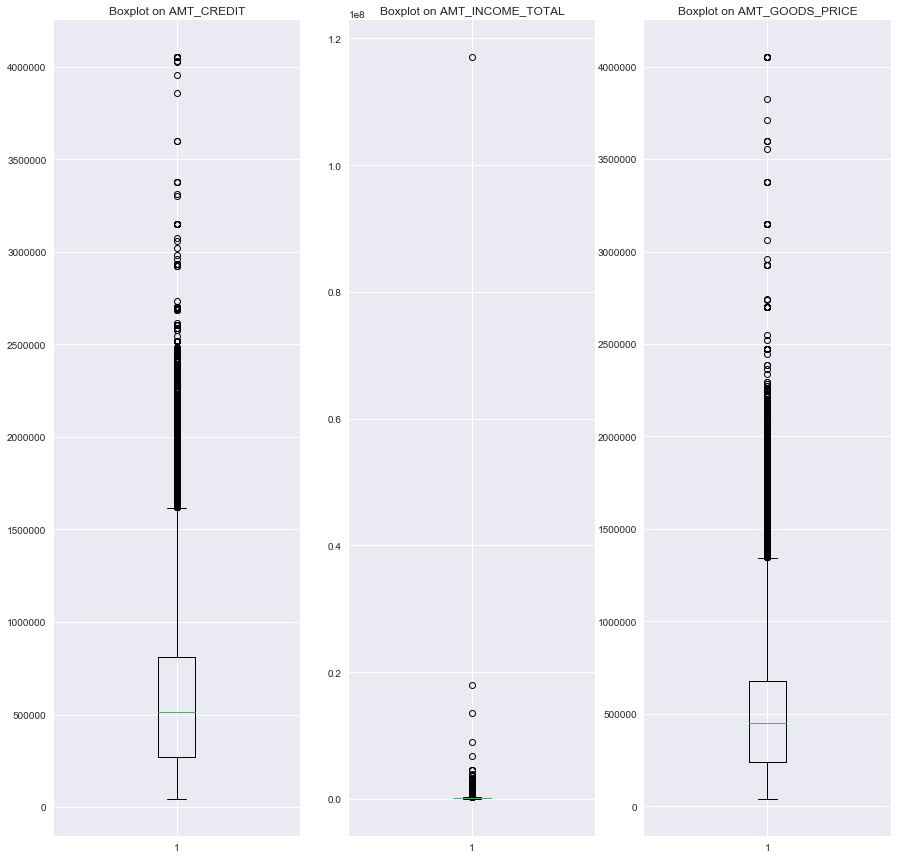

In [370]:
# #Plot boxplot to visualize Outliers
%matplotlib inline 
#plt.figure(figsize=(15,28))
plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.title("Boxplot on AMT_CREDIT")
plt.boxplot(application_data_new.AMT_CREDIT)

plt.subplot(1,3,2)
plt.title("Boxplot on AMT_INCOME_TOTAL")
plt.boxplot(application_data_new.AMT_INCOME_TOTAL)

plt.subplot(1,3,3)
plt.title("Boxplot on AMT_GOODS_PRICE")
plt.boxplot(application_data_new.AMT_GOODS_PRICE)
#plt.show()

In [371]:
cnames=["AMT_CREDIT","AMT_INCOME_TOTAL","AMT_GOODS_PRICE"]

In [373]:
#Detect and replace with NA
# #Extract quartiles
for i in cnames:
    q75, q25 = np.percentile(application_data_new.loc[:,i], [75 ,25])
    # #Calculate IQR
    iqr = q75 - q25
    
    # #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    # #Replace with NA
    application_data_new[application_data_new.loc[:,i] < minimum]=np.nan
    
    application_data_new[application_data_new.loc[:,i] > maximum] = np.nan
    
    # #Calculate missing value
    missing_val = pd.DataFrame(application_data_new.isnull().sum())
    
    # #Impute with median
    application_data_new.loc[:,i]=application_data_new.loc[:,i].fillna(application_data_new.loc[:,i].median())

#application_data_new= pd.DataFrame(KNN(k = 3).fit_transform(application_data_new), columns = application_data_new.columns)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
D:\anaconda\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\anaconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

{'boxes': [<matplotlib.lines.Line2D at 0xd0fef2a4e0>],
 'caps': [<matplotlib.lines.Line2D at 0xd0fef2add8>,
 'fliers': [<matplotlib.lines.Line2D at 0xd13571f898>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xd13571f518>],
 'whiskers': [<matplotlib.lines.Line2D at 0xd0fef2a668>,
  <matplotlib.lines.Line2D at 0xd0fef2aa58>]}

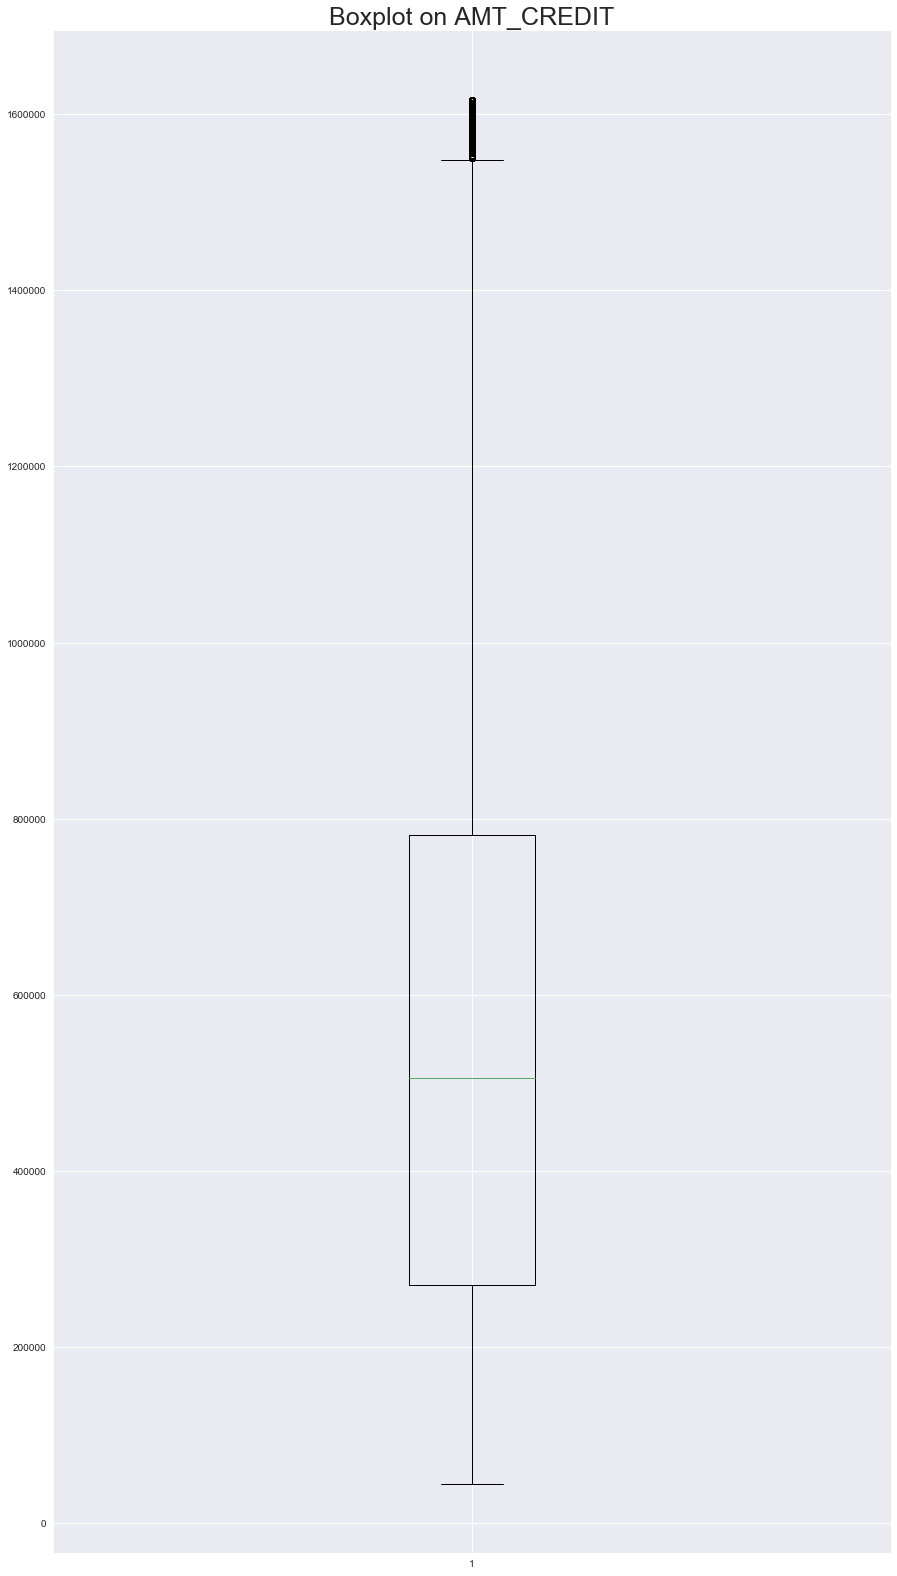

In [375]:
# #Plot boxplot to visualize Outliers
%matplotlib inline 
plt.figure(figsize=(15,28))
plt.title("Boxplot on AMT_CREDIT",fontsize=25)
plt.boxplot(application_data_new.AMT_CREDIT)

In [374]:
application_data_new.head()

SK_ID_CURR TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0    100002.0      1                  0           1            0   
1    100003.0      0                  0           0            0   
2    100004.0      0                  1           1            1   
3    100006.0      0                  0           0            0   
4    100007.0      0                  0           1            0   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               1           0.0          202500.0    406597.5      24700.5   
1               0           0.0          270000.0   1293502.5      35698.5   
2               1           0.0           67500.0    135000.0       6750.0   
3               1           0.0          135000.0    312682.5      29686.5   
4               1           0.0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                           0.0              0.0   
1             ...                           0.0              0.0   
2             ...                           0.0              0.0   
3             ...                           0.0              0.0   
4             ...                           0.0              0.0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0              0.0              0.0                        0.0   
1              0.0              0.0                        0.0   
2              0.0              0.0                        0.0   
3              0.0              0.0                        NaN   
4              0.0              0.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 72 columns]

# to convert categorical var in bins

In [476]:
application_data_new.AMT_GOODS_PRICE_bin=pd.cut(application_data_new.AMT_GOODS_PRICE, 10)
AMT_GOODS_PRICE_bin=pd.DataFrame(application_data_new.AMT_GOODS_PRICE_bin.value_counts().values)
AMT_GOODS_PRICE_bin['Cat']=application_data_new.AMT_GOODS_PRICE_bin.value_counts().index
AMT_GOODS_PRICE_bin.columns=['Value','Cat']

In [477]:
AMT_GOODS_PRICE_bin

Value                     Cat
0  131712     (36490.5, 441450.0]
1  115539    (441450.0, 842400.0]
2   43658   (842400.0, 1243350.0]
3   12429  (1243350.0, 1644300.0]
4    3175  (1644300.0, 2045250.0]
5     933  (2045250.0, 2446200.0]
6      30  (2446200.0, 2847150.0]
7      17  (2847150.0, 3248100.0]
8      10  (3649050.0, 4050000.0]
9       8  (3248100.0, 3649050.0]

Text(0.5, 1.0, 'AMT_GOODS_PRICE continuous')

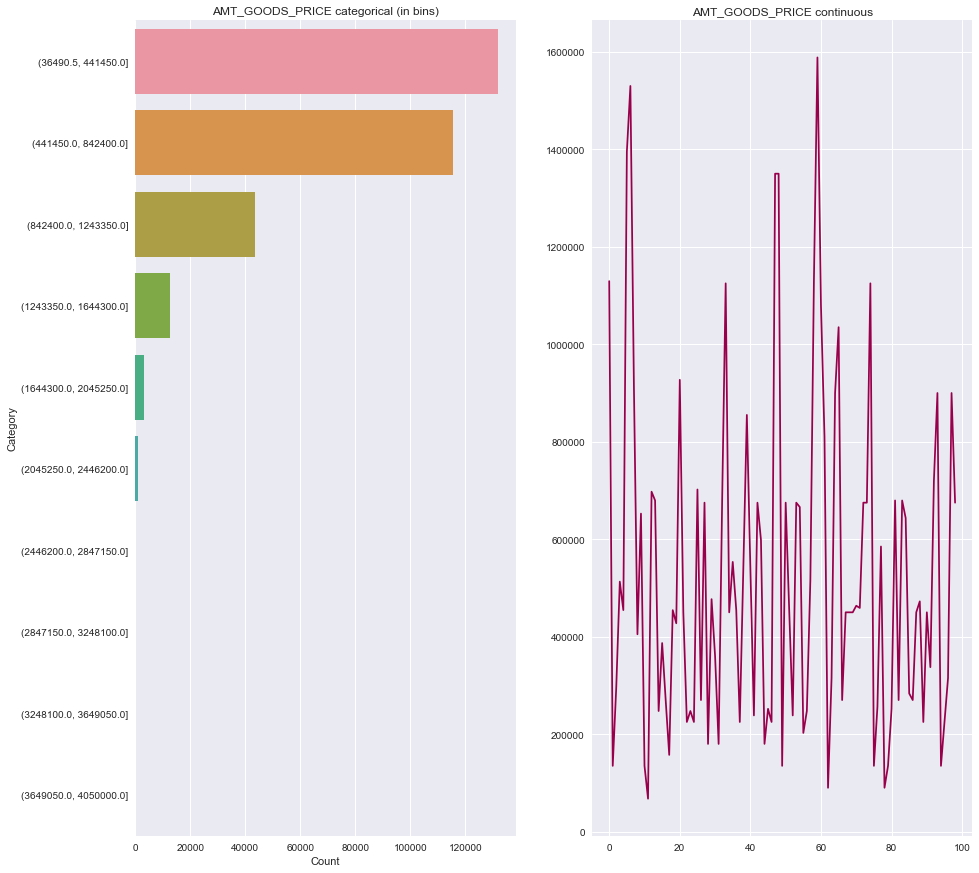

In [478]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
sns.barplot(x="Value",y="Cat",data=AMT_GOODS_PRICE_bin)
plt.ylabel("Category")
plt.xlabel("Count")
plt.title('AMT_GOODS_PRICE categorical (in bins)')


plt.subplot(1,2,2)
plt.plot(application_data_new.AMT_GOODS_PRICE[1:100].values, '#99004C', label='AMT_GOODS_PRICE')
plt.title('AMT_GOODS_PRICE continuous')
#NOTE for simpliciti only 100 data points of AMT_GOODS_PRICE is used

# 4. Analysis

 1. Data IMBALANCE Check

In [453]:
#Target variable (1 - client with payment difficulties: , 0 - all other cases)
application_data_new.TARGET.value_counts()

0    276394
1     24555
Name: TARGET, dtype: int64

In [455]:
my_tab = pd.crosstab(index = application_data_new.TARGET,  # Make a crosstab
                              columns="count") 

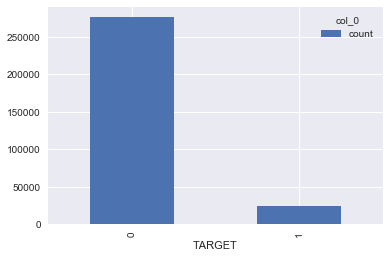

In [456]:
my_tab.plot.bar()

In [488]:
#imbalance percentage
print('Percentage for 1- client with payment difficulties:'+
      str(round(application_data_new.TARGET.value_counts()[0]/len(application_data_new)*100)))

Percentage for 1- client with payment difficulties:92.0


In [487]:
 print('Percentage for  0 - all other cases:'+
       str(round(application_data_new.TARGET.value_counts()[1]/len(application_data_new)*100)))

Percentage for  0 - all other cases:8.0


This shows that the data is imbalance and bias towards Percentage for 1- client with payment difficulties

2 Dividing the data into 2 SETS: target=1 and target=0 

In [489]:
application_data_new_Tar0=application_data_new.loc[application_data_new.TARGET==0,]

In [490]:
application_data_new_Tar1=application_data_new.loc[application_data_new.TARGET==1,]

3 Perform univariate analysis for all categorical variables

<Figure size 1080x1080 with 0 Axes>

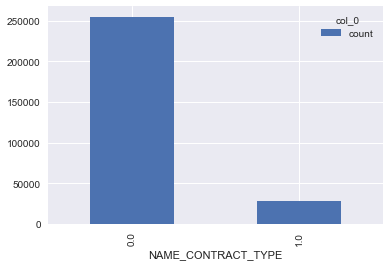

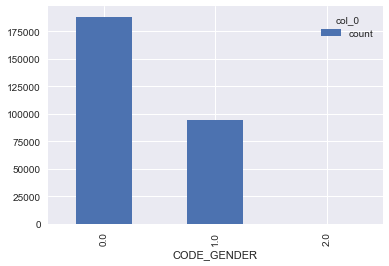

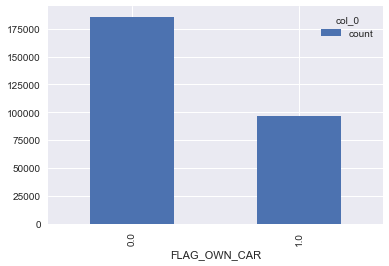

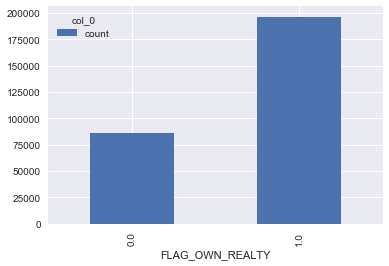

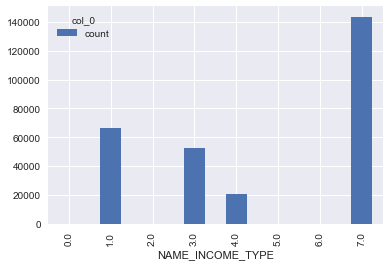

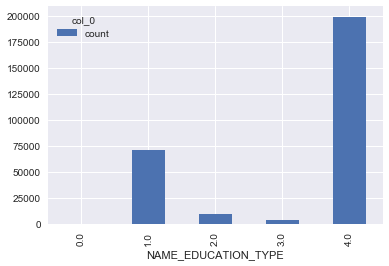

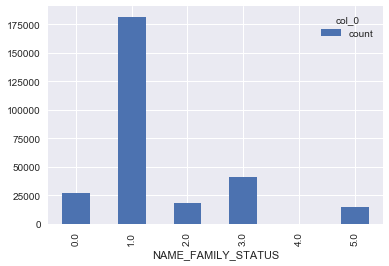

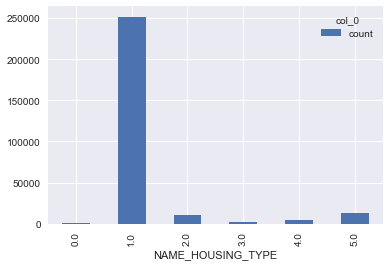

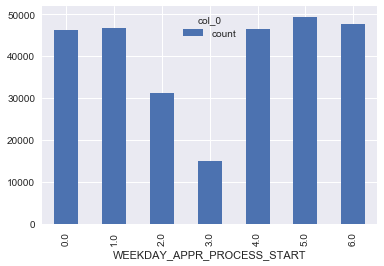

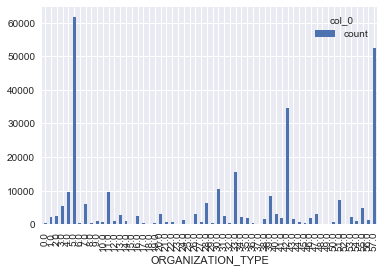

In [509]:
# target=0
plt.figure(figsize=(15,15))
for i in lis:
    #plt.subplot(4,1,k)
    my_tab = pd.crosstab(index = application_data_new_Tar0.loc[:,i],  # Make a crosstab
                              columns="count") 
    my_tab.plot.bar()

In [508]:
#application_data_new.ORGANIZATION_TYPE.value_counts()

In [512]:
application_data.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

<Figure size 1080x1080 with 0 Axes>

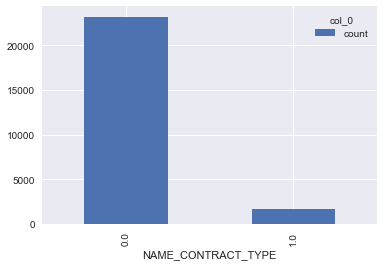

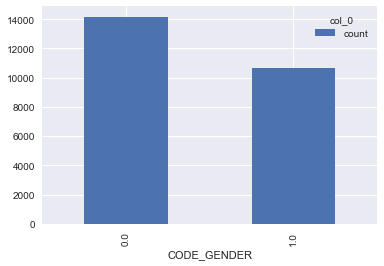

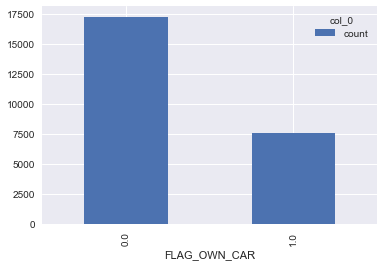

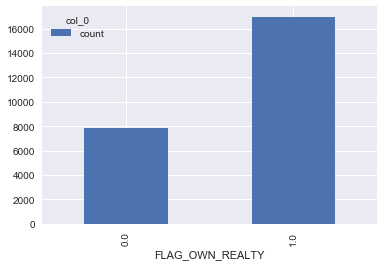

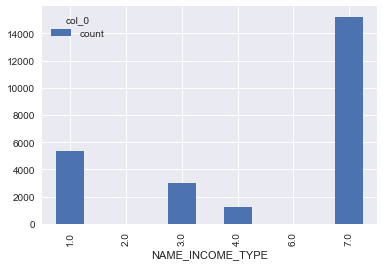

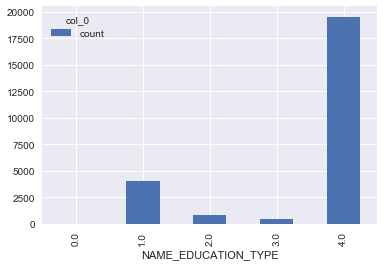

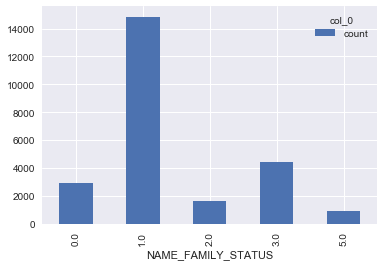

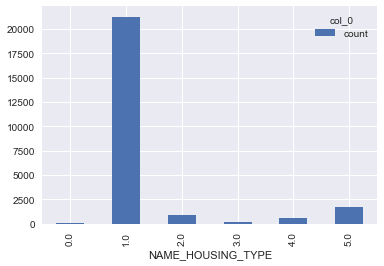

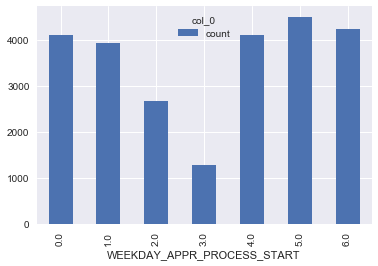

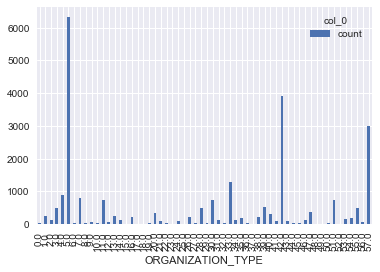

In [495]:
# target=1
plt.figure(figsize=(15,25))
for i in lis:
    my_tab = pd.crosstab(index = application_data_new_Tar1.loc[:,i],  # Make a crosstab
                              columns="count") 
    my_tab.plot.bar()

Analysis shows that:
  <p>  there's no data for Code_gender= XNA for where Target=1,i.e., there's no observation present for gender 'XNA' for data having clients payment difficulties. This creates biassness in the result.</p>
      <p> Similarly, for Variable name_income_type,  there's no data for name_income_type is Businessman or Student for where Target=1,i.e., there's no observation present for Businessman or Student for data having clients payment difficulties. This creates biassness in the result. </p>
      <p> Similarly there are no observations present for a particular  category of categorical variable in many categorical variable.
    <p>  Conclusion, For instance there's no data showing that a person who's a business man has ever had the payment difficulties, thus it would be difficlut to find	If the applicant is not likely to repay the loan, i.e. he/she is likely to default</p>

# 4 Correlations for numerical columns

In [533]:
#application_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null object
NAME_CONTRACT_TYPE             307511 non-null object
CODE_GENDER                    307511 non-null object
FLAG_OWN_CAR                   307511 non-null object
FLAG_OWN_REALTY                307511 non-null object
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
AMT_ANNUITY                    307499 non-null float64
AMT_GOODS_PRICE                307511 non-null float64
NAME_TYPE_SUITE                306219 non-null float64
NAME_INCOME_TYPE               307511 non-null object
NAME_EDUCATION_TYPE            307511 non-null object
NAME_FAMILY_STATUS             307511 non-null object
NAME_HOUSING_TYPE              307511 non-null object
REGION_POPULATION_RELA

In [543]:
# target=0
cordf = application_data_new_Tar0.drop(lis,axis=1)
cordf = application_data_new_Tar0.drop('TARGET',axis=1)
#cordf = application_data_new_Tar0.drop(col_corr_num,axis=1)
cordf = cordf.corr()
cordf=round(cordf, 3)

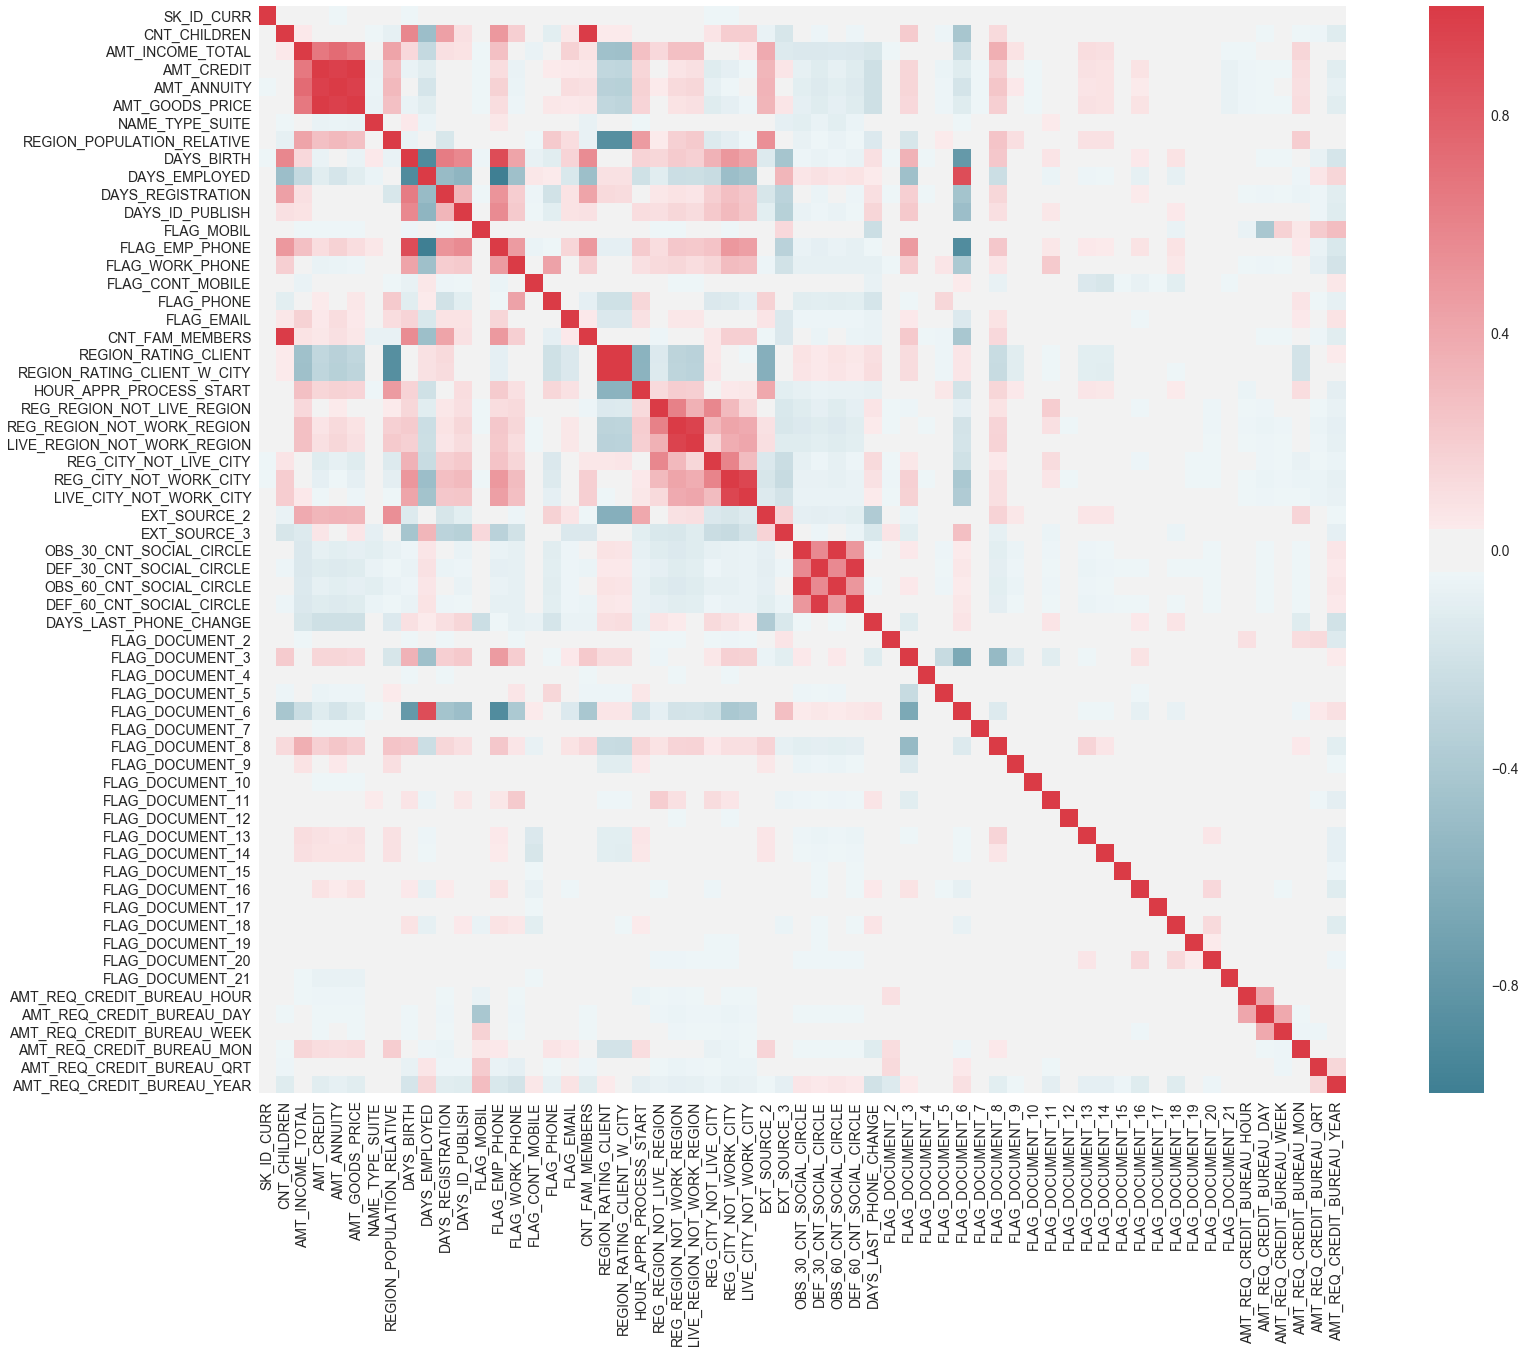

In [544]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(30, 20))

#Generate correlation matrix
corr = cordf.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


In [550]:
application_data_new_Tar0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 72 columns):
SK_ID_CURR                     282686 non-null int64
TARGET                         282686 non-null object
NAME_CONTRACT_TYPE             282686 non-null object
CODE_GENDER                    282686 non-null object
FLAG_OWN_CAR                   282686 non-null object
FLAG_OWN_REALTY                282686 non-null object
CNT_CHILDREN                   282686 non-null int64
AMT_INCOME_TOTAL               282686 non-null float64
AMT_CREDIT                     282686 non-null float64
AMT_ANNUITY                    282674 non-null float64
AMT_GOODS_PRICE                282686 non-null float64
NAME_TYPE_SUITE                281464 non-null float64
NAME_INCOME_TYPE               282686 non-null object
NAME_EDUCATION_TYPE            282686 non-null object
NAME_FAMILY_STATUS             282686 non-null object
NAME_HOUSING_TYPE              282686 non-null object
REGION_POPULATION_RELA

In [551]:
    # target=1
cordf = application_data_new_Tar1.drop(lis,axis=1)
cordf = application_data_new_Tar1.drop('TARGET',axis=1)
#cordf = application_data_new_Tar0.drop(col_corr_num,axis=1)
cordf = cordf.corr()
cordf=round(cordf, 3)

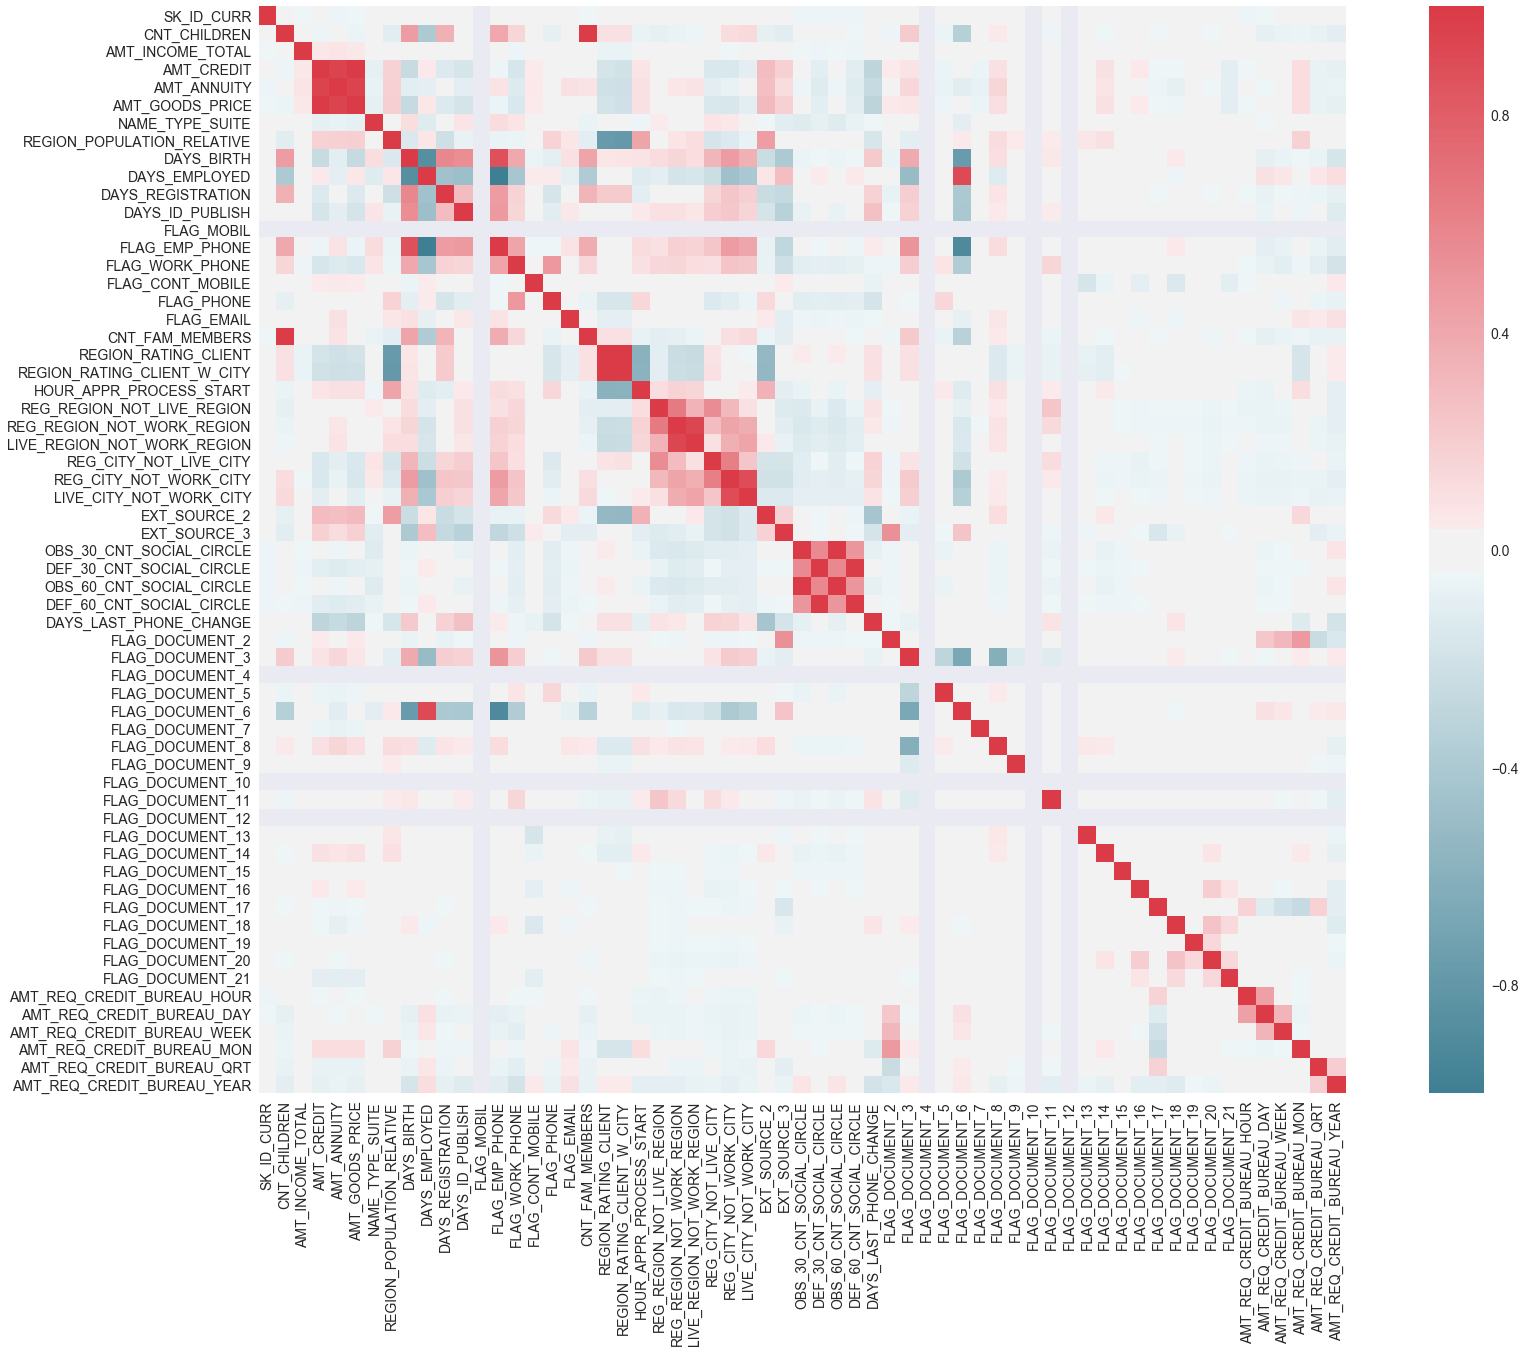

In [552]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(30, 20))

#Generate correlation matrix
corr = cordf.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

<p> correlation value lies between -1 to +1. Highly correlated variables will have correlation value close to +1 and less correlated variables will have correlation value close to -1. </p>

<p> CONCLUSION , HIGHLY CORRELATED VARIABLES</p>
<p>#For target=1 - client with payment difficulties:
<li>AMT_CREDIT</li>,
<li>AMT_ANNUITY</li>
AMT_GOODS_PRICE,
DAYS_BIRTH,
FLAG_EMP_PHONE,,
FLAG_work_PHONE,
REG_REGION_NOT_LIVE_REGION,
REG_REGION_NOT_WORK_REGION , 
LIVE_REGION_NOT_WORK_REGION,
<li>REG_CITY_NOT_LIVE_CITY </li> </p>
<p> Here , AMT_CREDIT is highly correlated with AMT_ANNUITY
AMT_GOODS_PRICE and AMT_ANNUITY is highly correlated with AMT_GOODS_PRICE </p>

<p> HIGHLY CORRELATED VARIABLES</p>
<p># for target=0  - other client 
AMT_INCOME_TOTAL,
AMT_CREDIT,
AMT_ANNUITY,,
AMT_GOODS_PRICE,
DAYS_BIRTH,
FLAG_EMP_PHONE,
FLAG_work_PHONE,
REG_REGION_NOT_LIVE_REGION,
REG_REGION_NOT_WORK_REGION,
LIVE_CITY_NOT_WORK_CITY</p>
<p> Here , AMT_INCOME_TOTAL is highly correlated with AMT_CREDIT , and
AMT_GOODS_PRICE </p>


# CONCLUSION: no not all variables with highest correlation are same in both the cases.

In [553]:
# performing univariate for numerical values

 performing univariate for numerical values
 <p> Choosing few variables 
 AMT_INCOME_TOTAL,
AMT_CREDIT,
AMT_ANNUITY,,
AMT_GOODS_PRICE

In [567]:
missing_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
Variables             122 non-null object
Missing_percentage    122 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [592]:
missing_val_new=missing_val.loc[missing_val.Missing_percentage==0,]
val_o=pd.DataFrame(missing_val_new.Variables)
#val_o=val_o not in lis

In [664]:
#checking for null values percentage in each column
#(application_data.isnull().sum(axis=0)/application_data.shape[0])*100
#Create dataframe with missing percentage
cont = pd.DataFrame(application_data_new.drop(lis,axis=1).isnull().sum())
#cont=cont.drop('TARGET',axis=1)
#Reset index
cont = cont.reset_index()

#Rename variable
cont = cont.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
#missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(application_data))*100

#descending order
#missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
cont_name=cont.loc[cont.Missing_percentage==0,].Variables

In [652]:
cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
Variables             62 non-null object
Missing_percentage    62 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


D:\anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\anaconda\lib\site-packages\seaborn\distributions.py:215: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


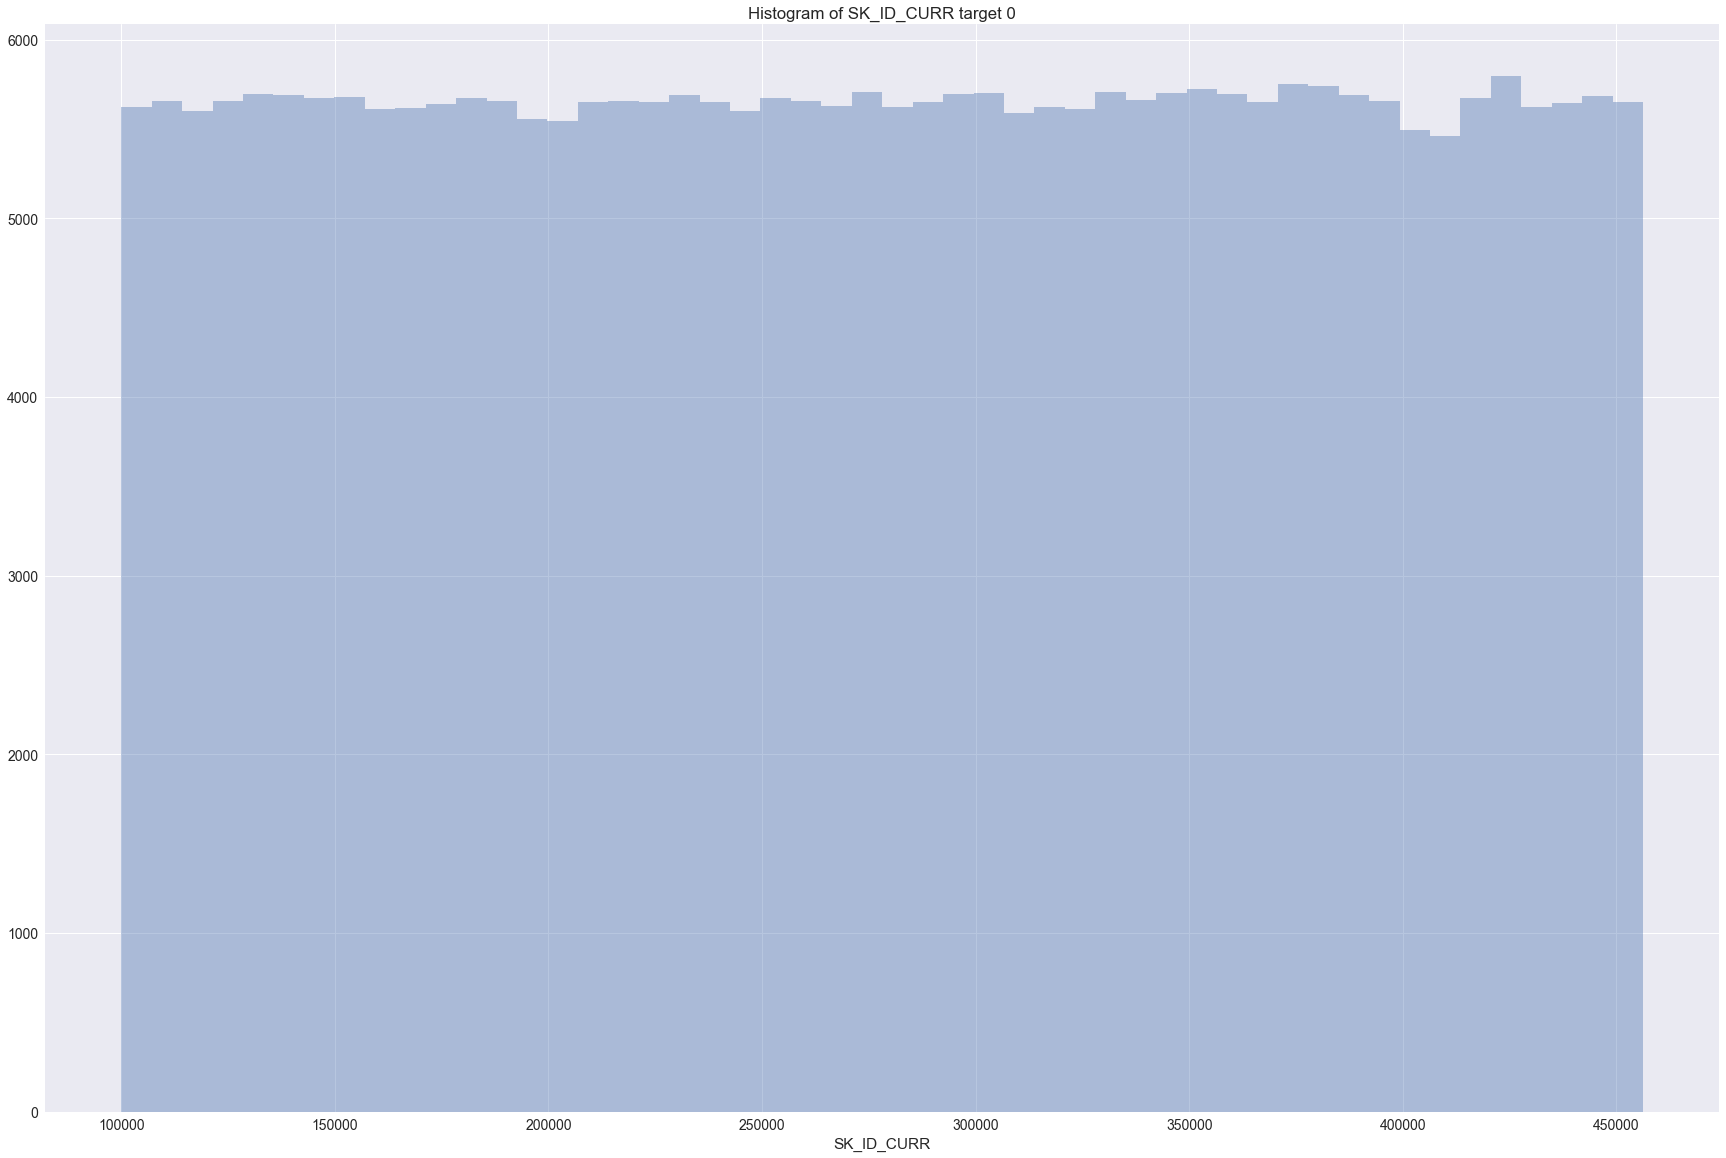

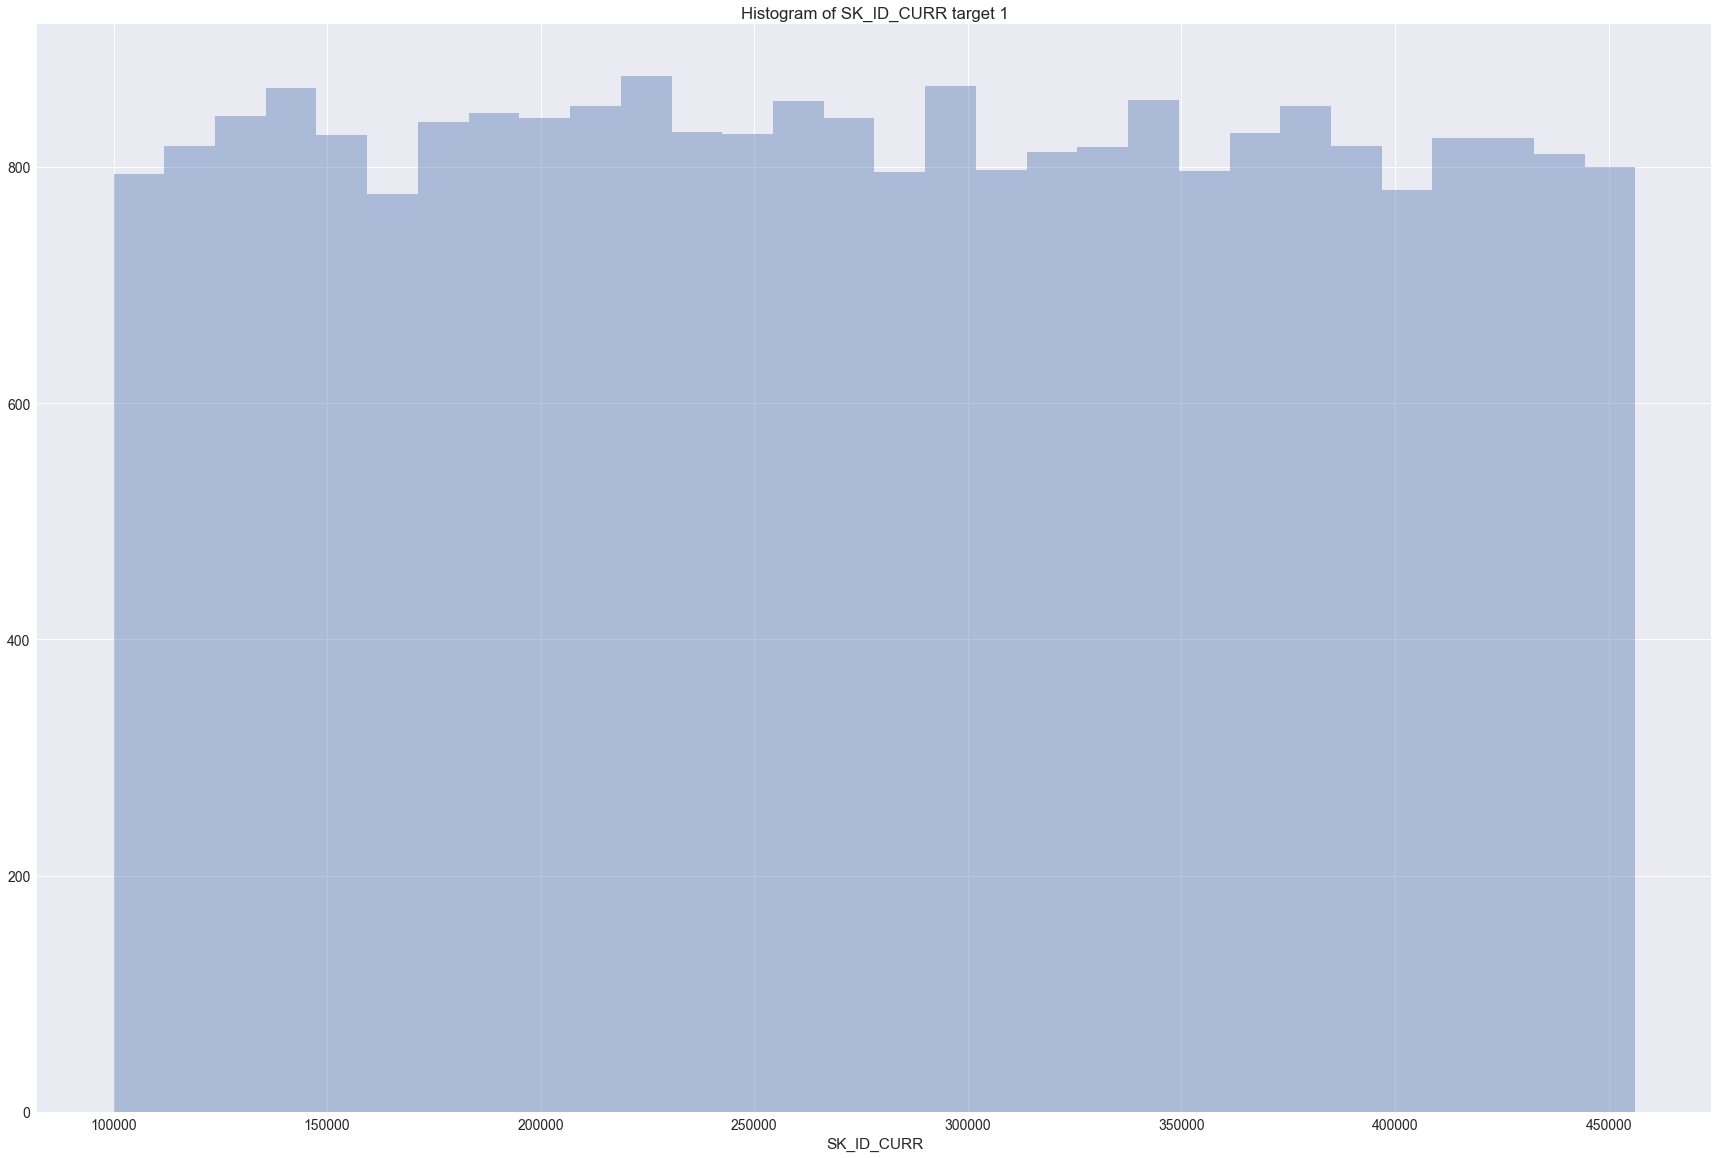

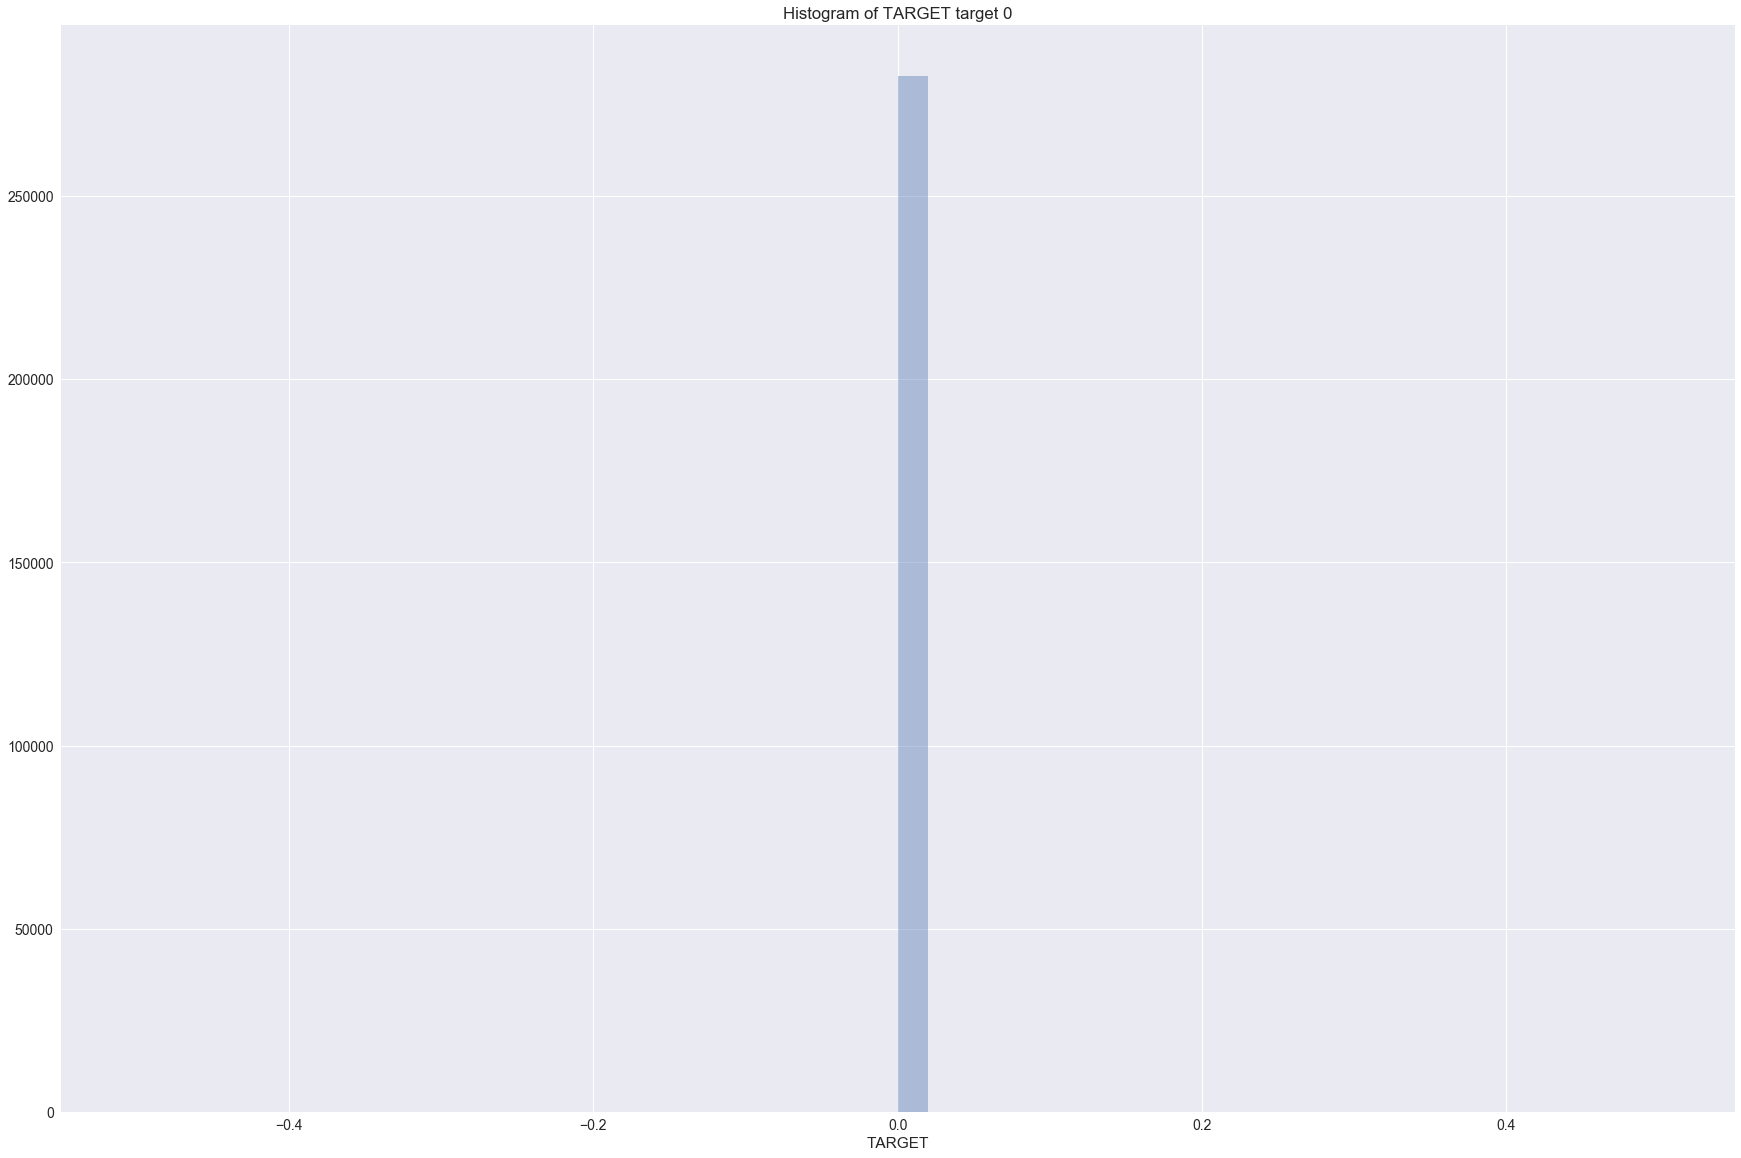

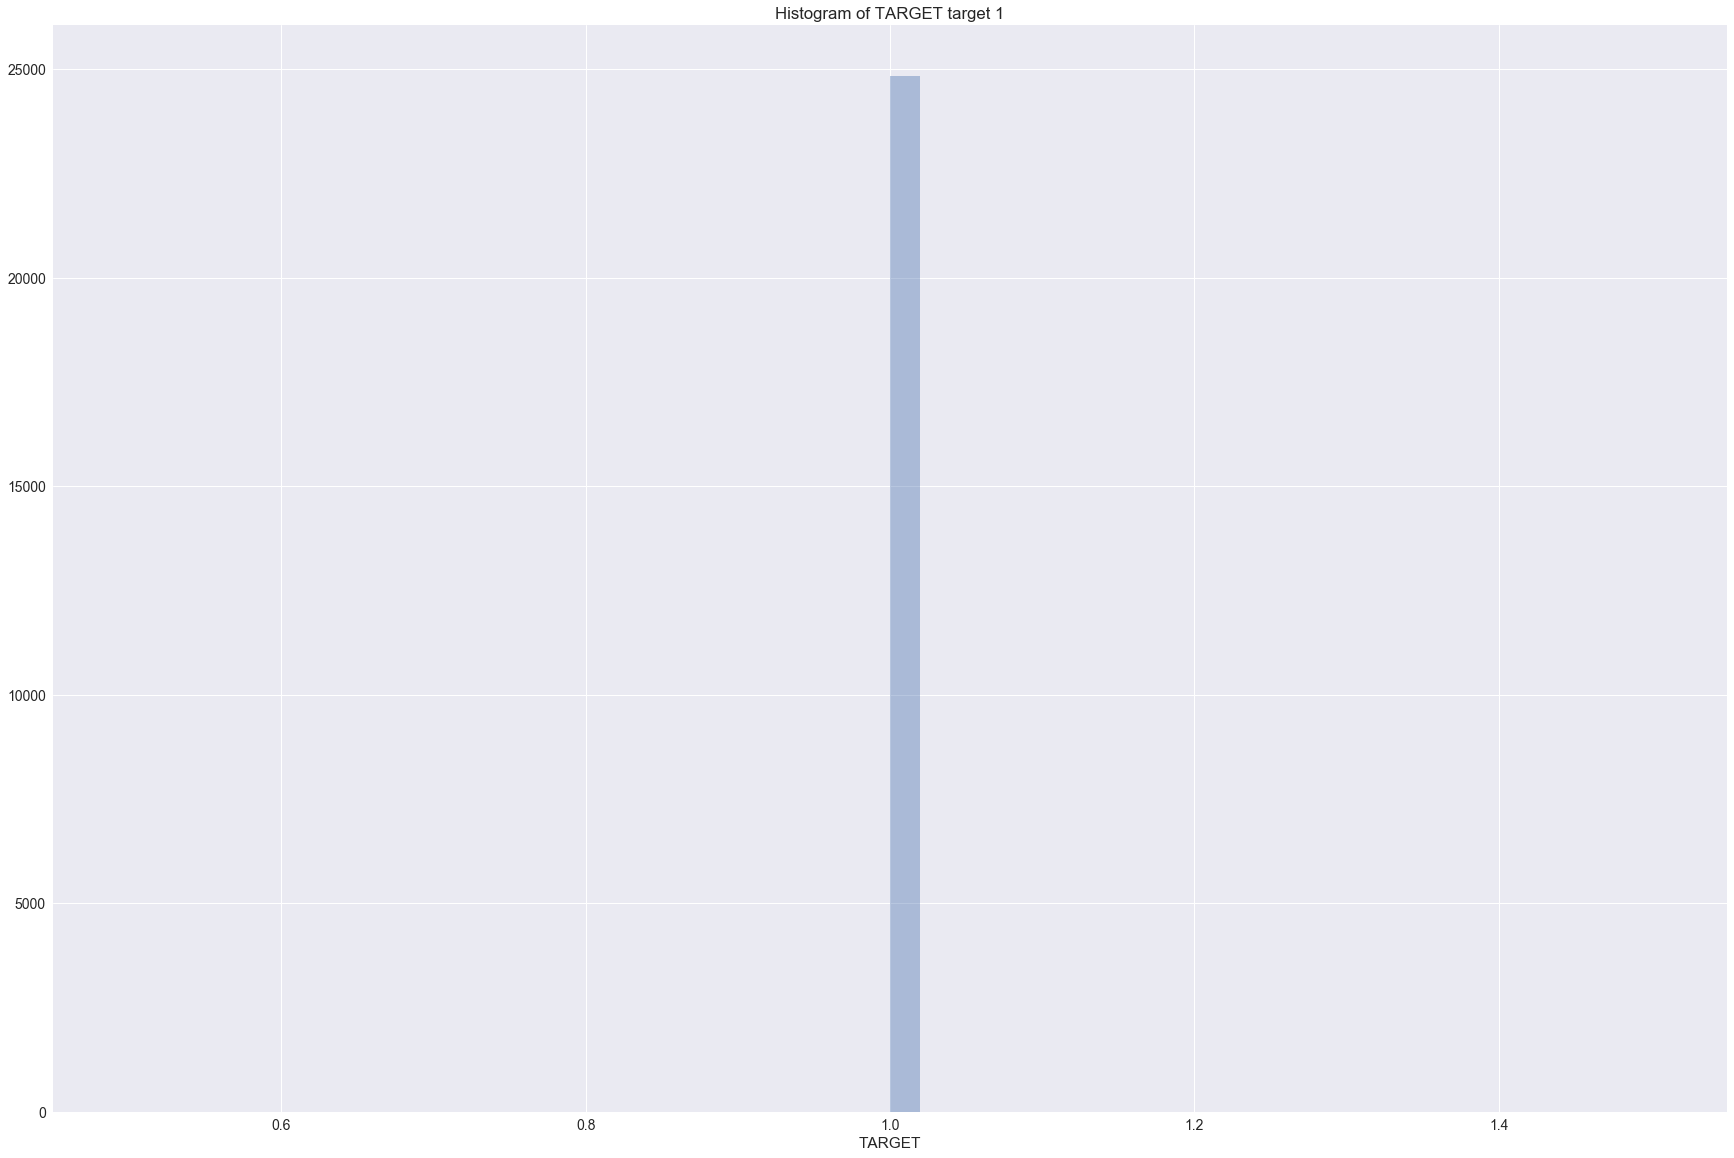

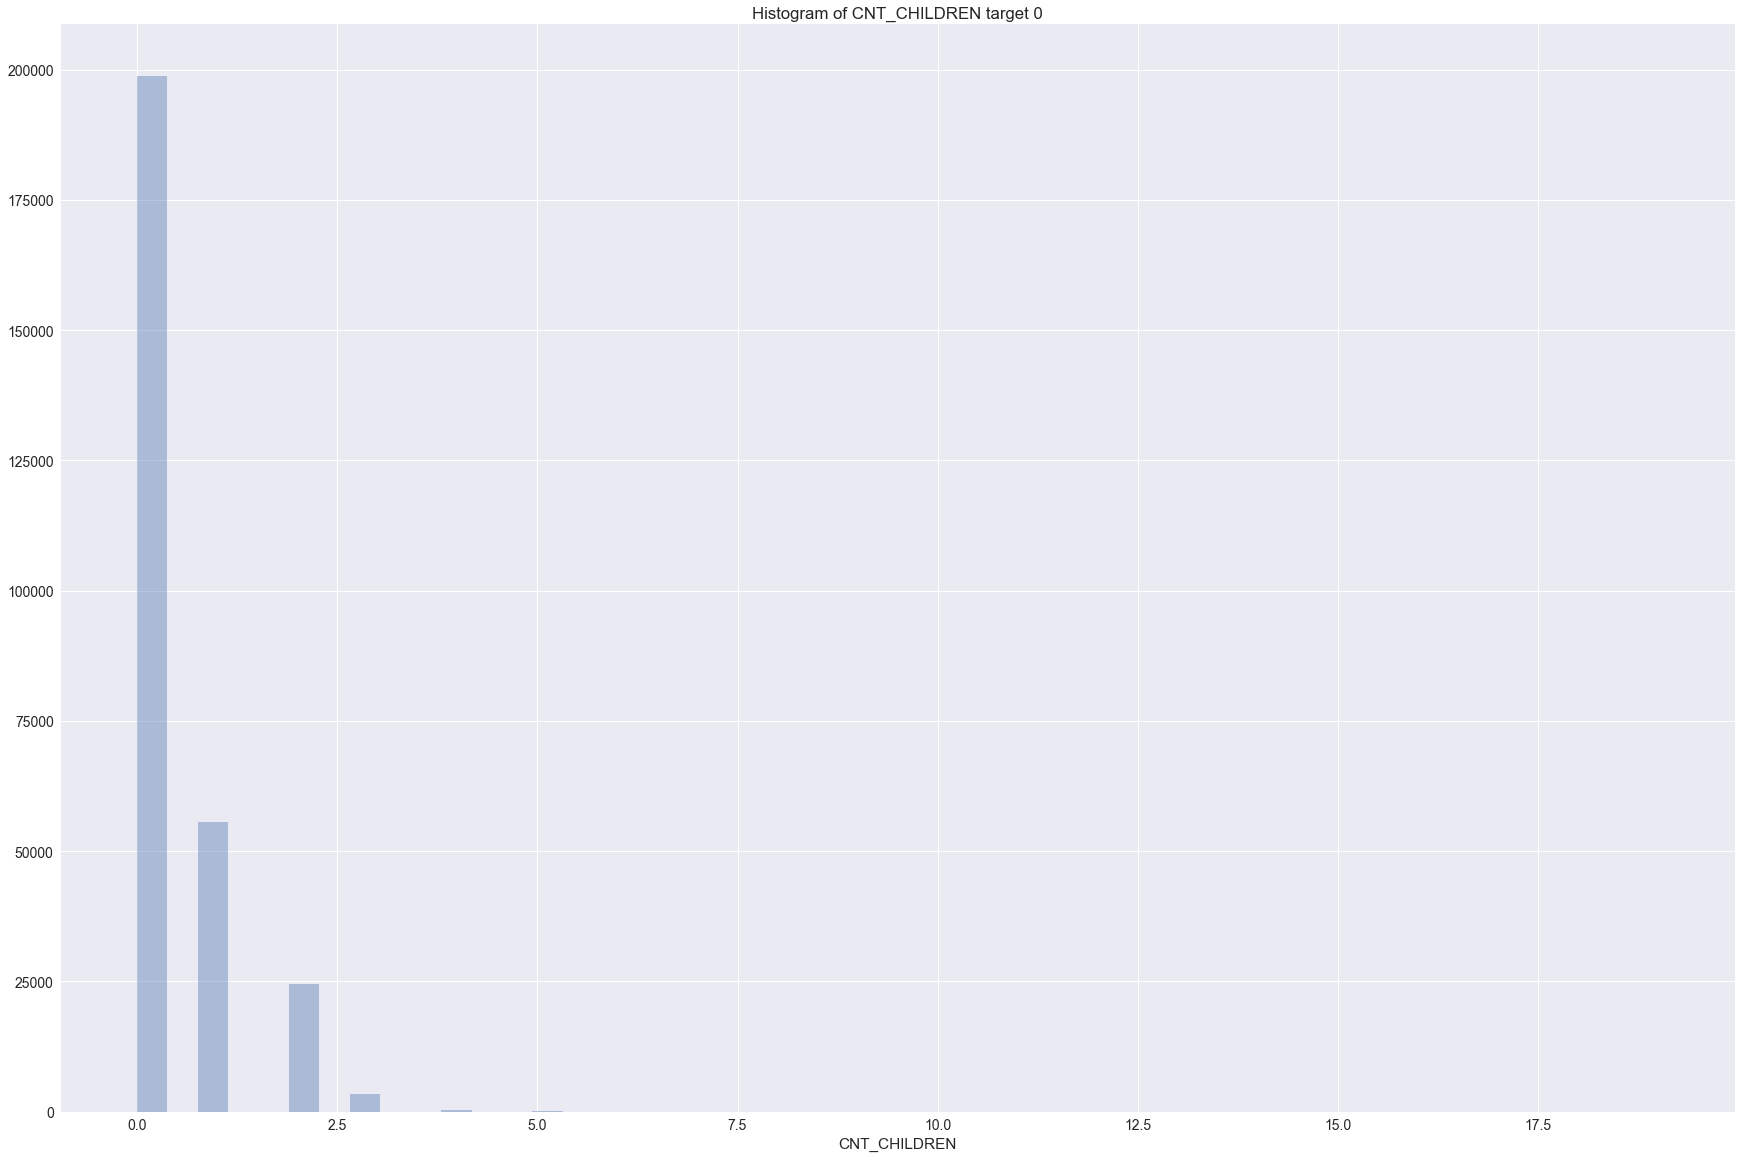

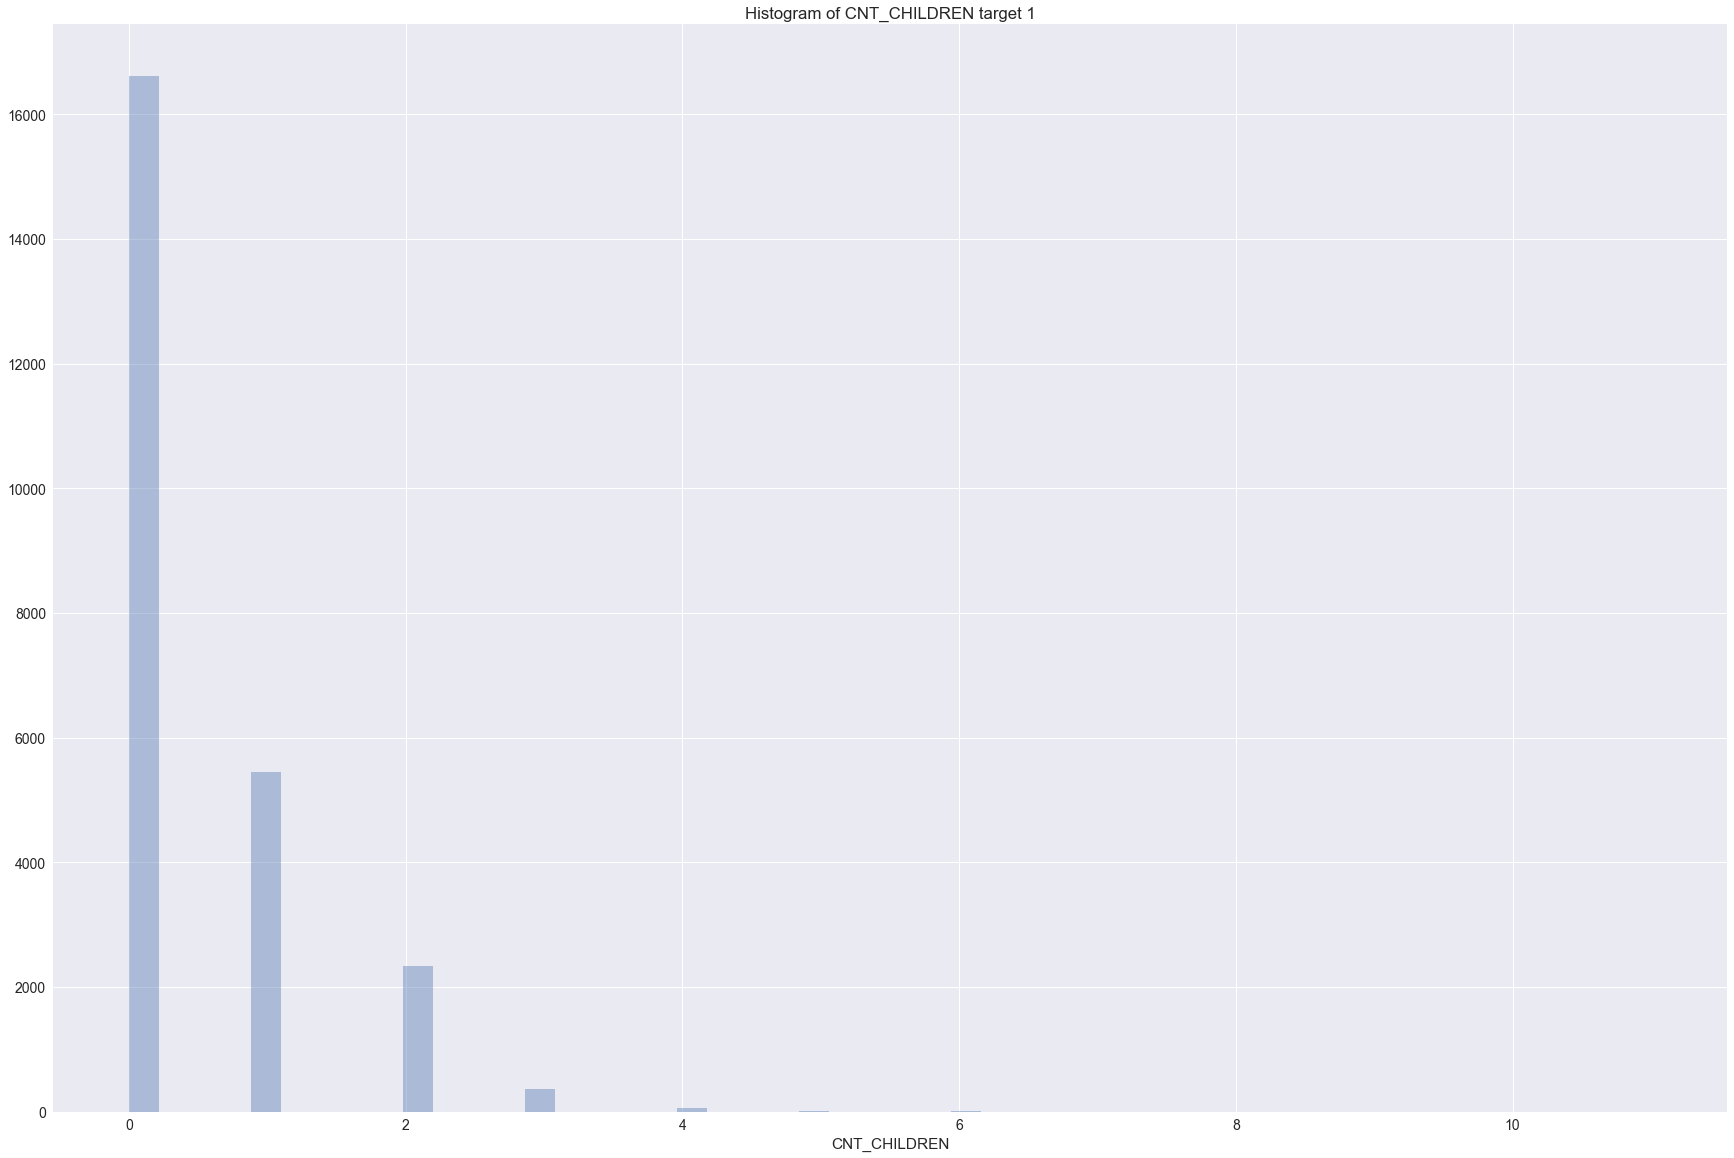

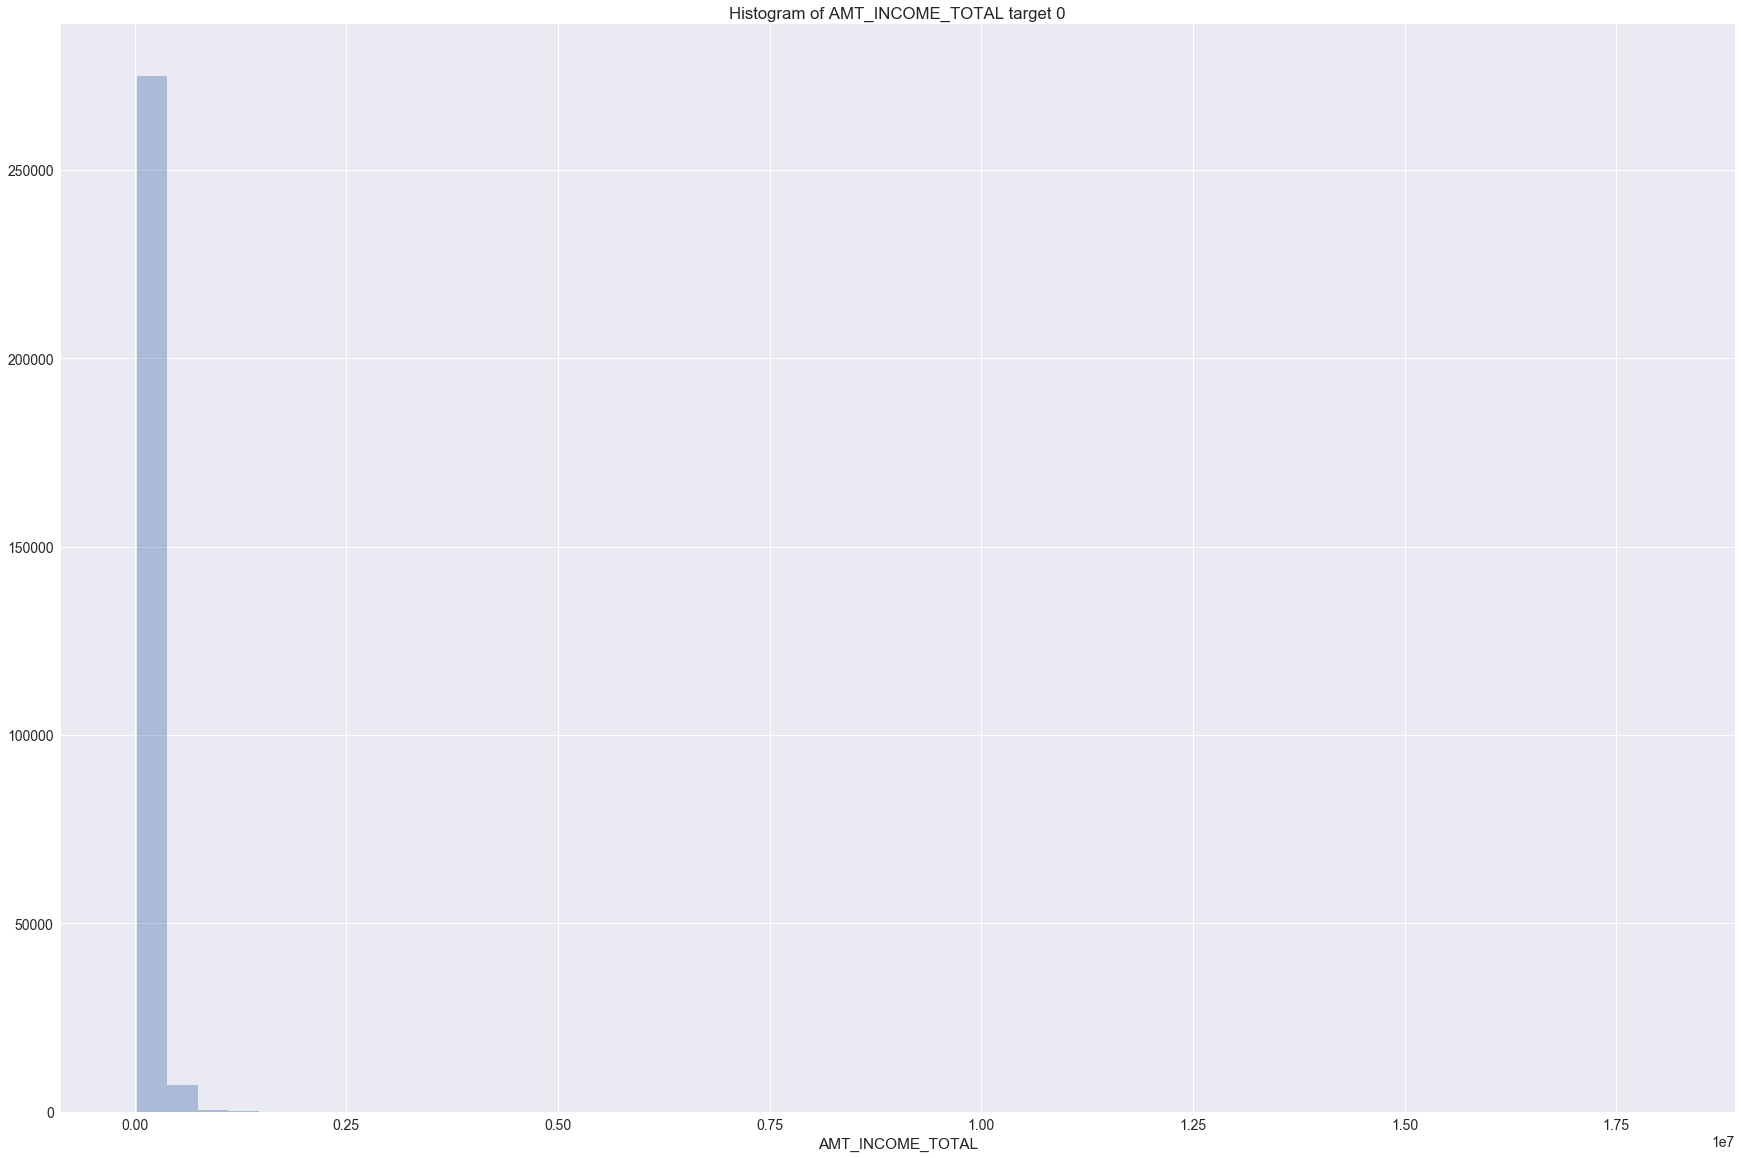

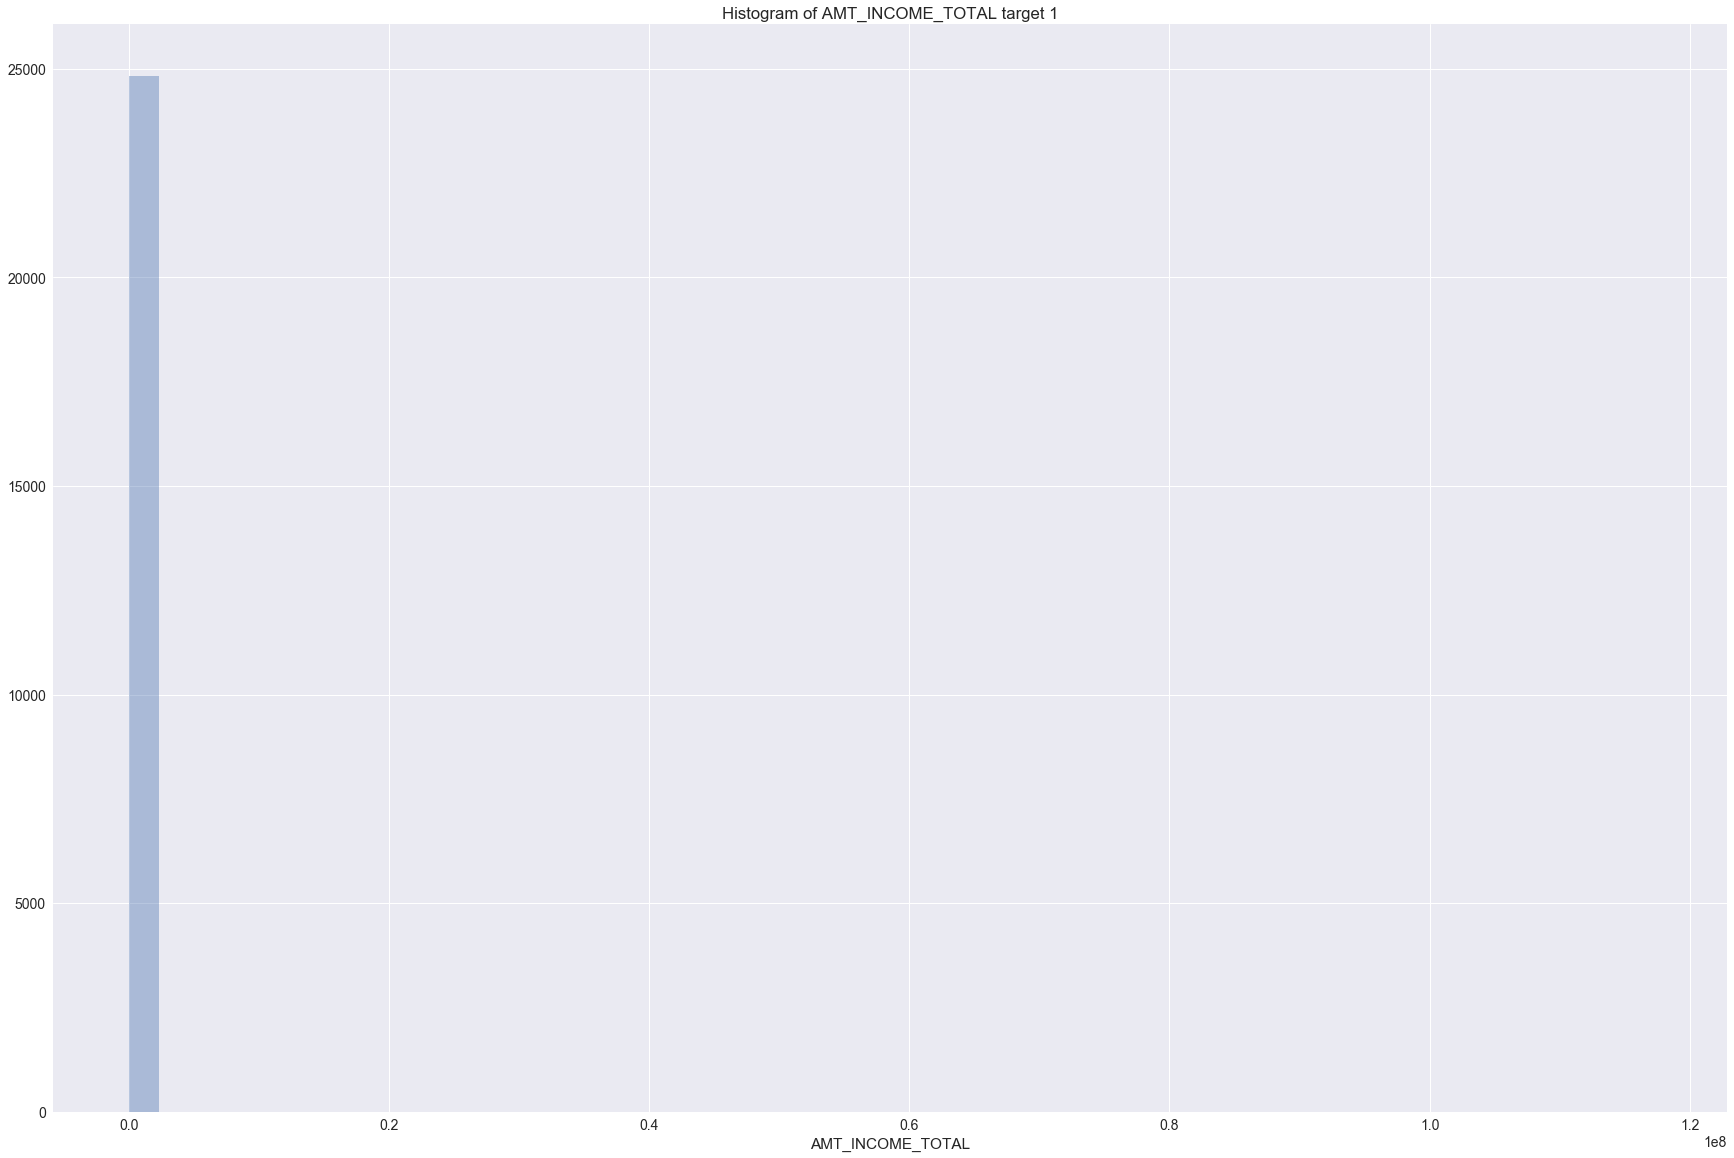

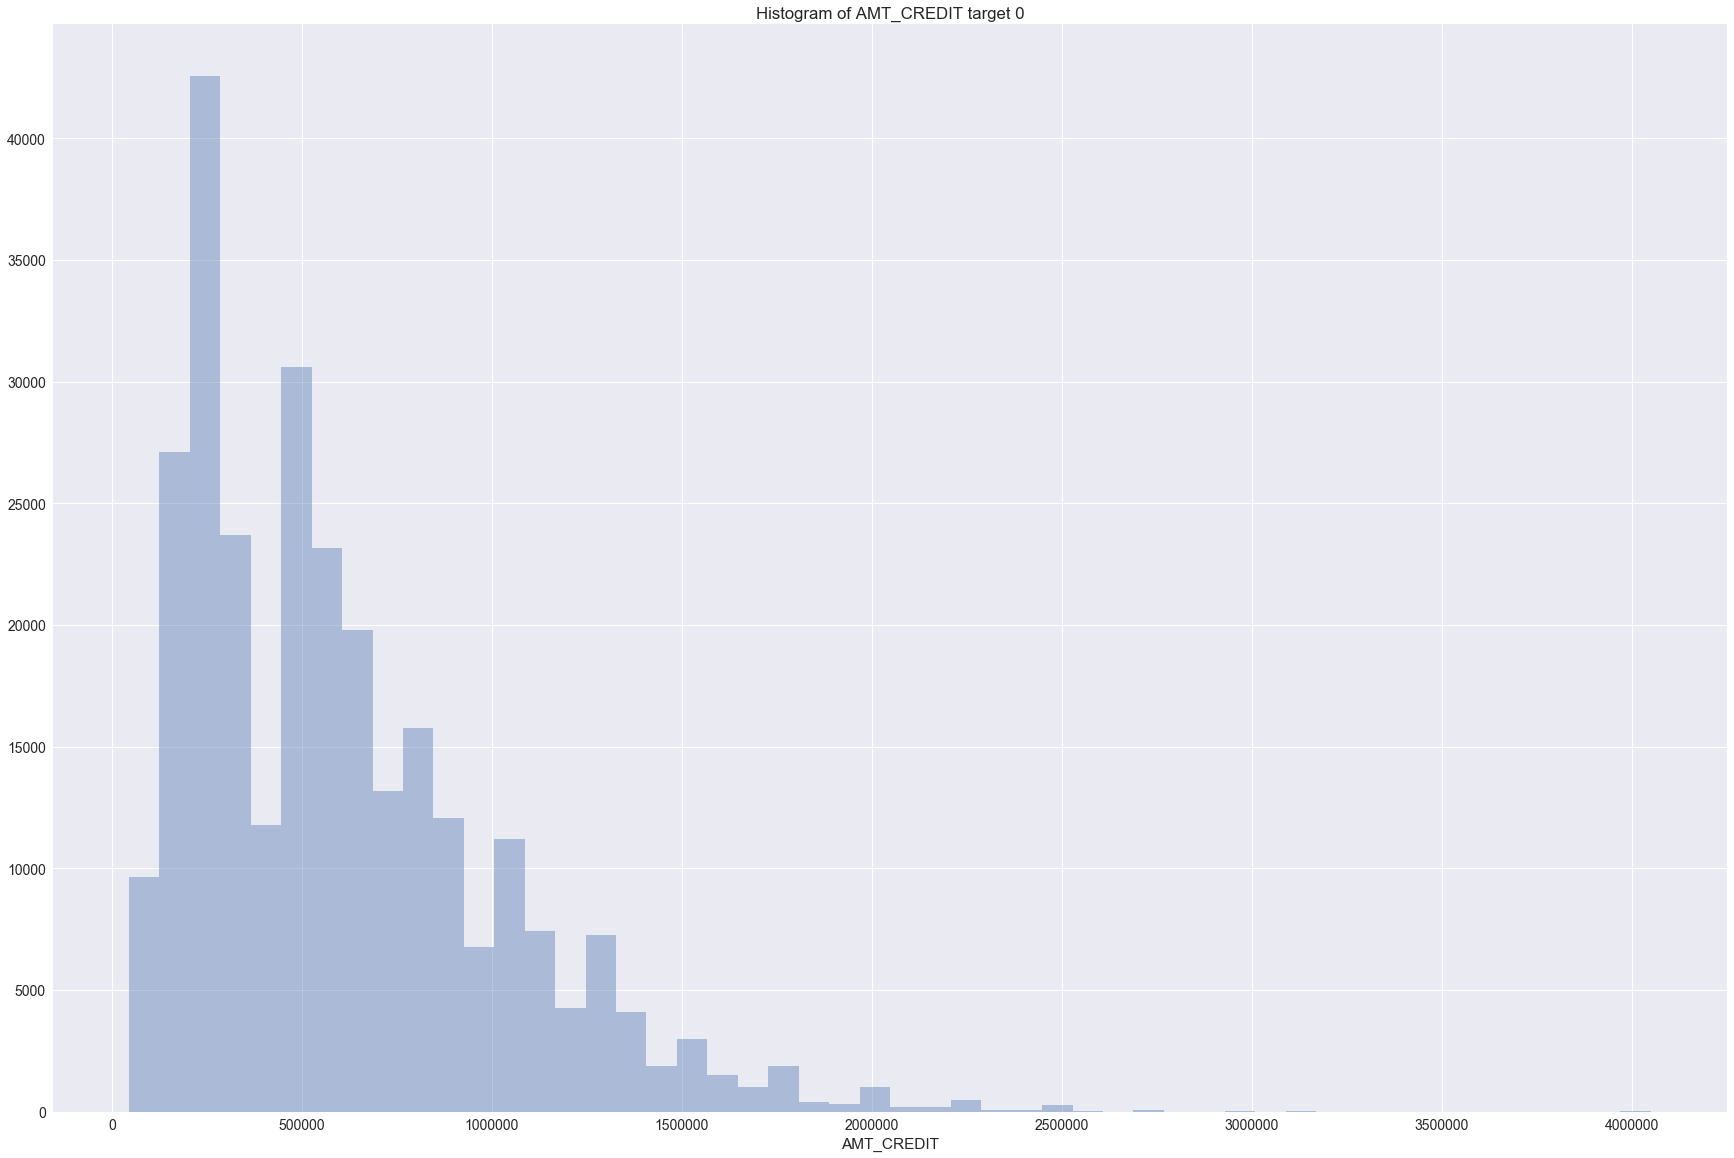

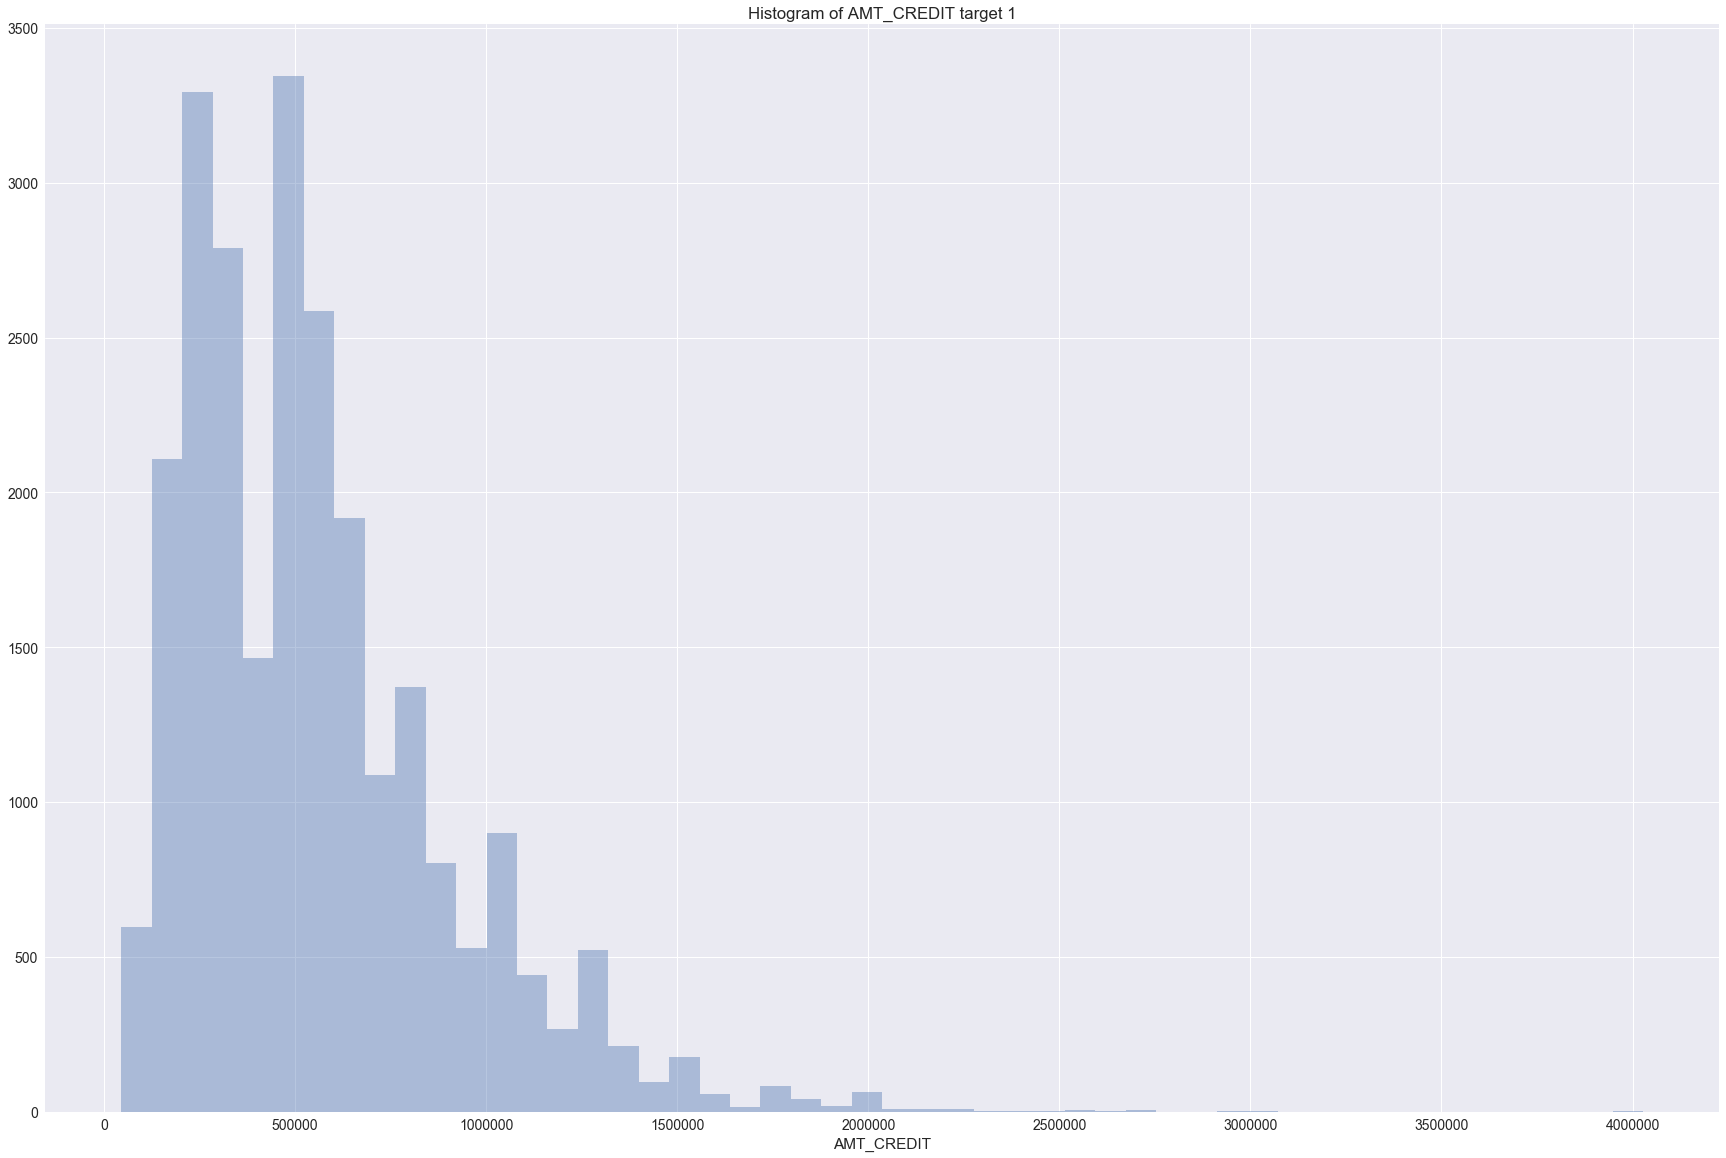

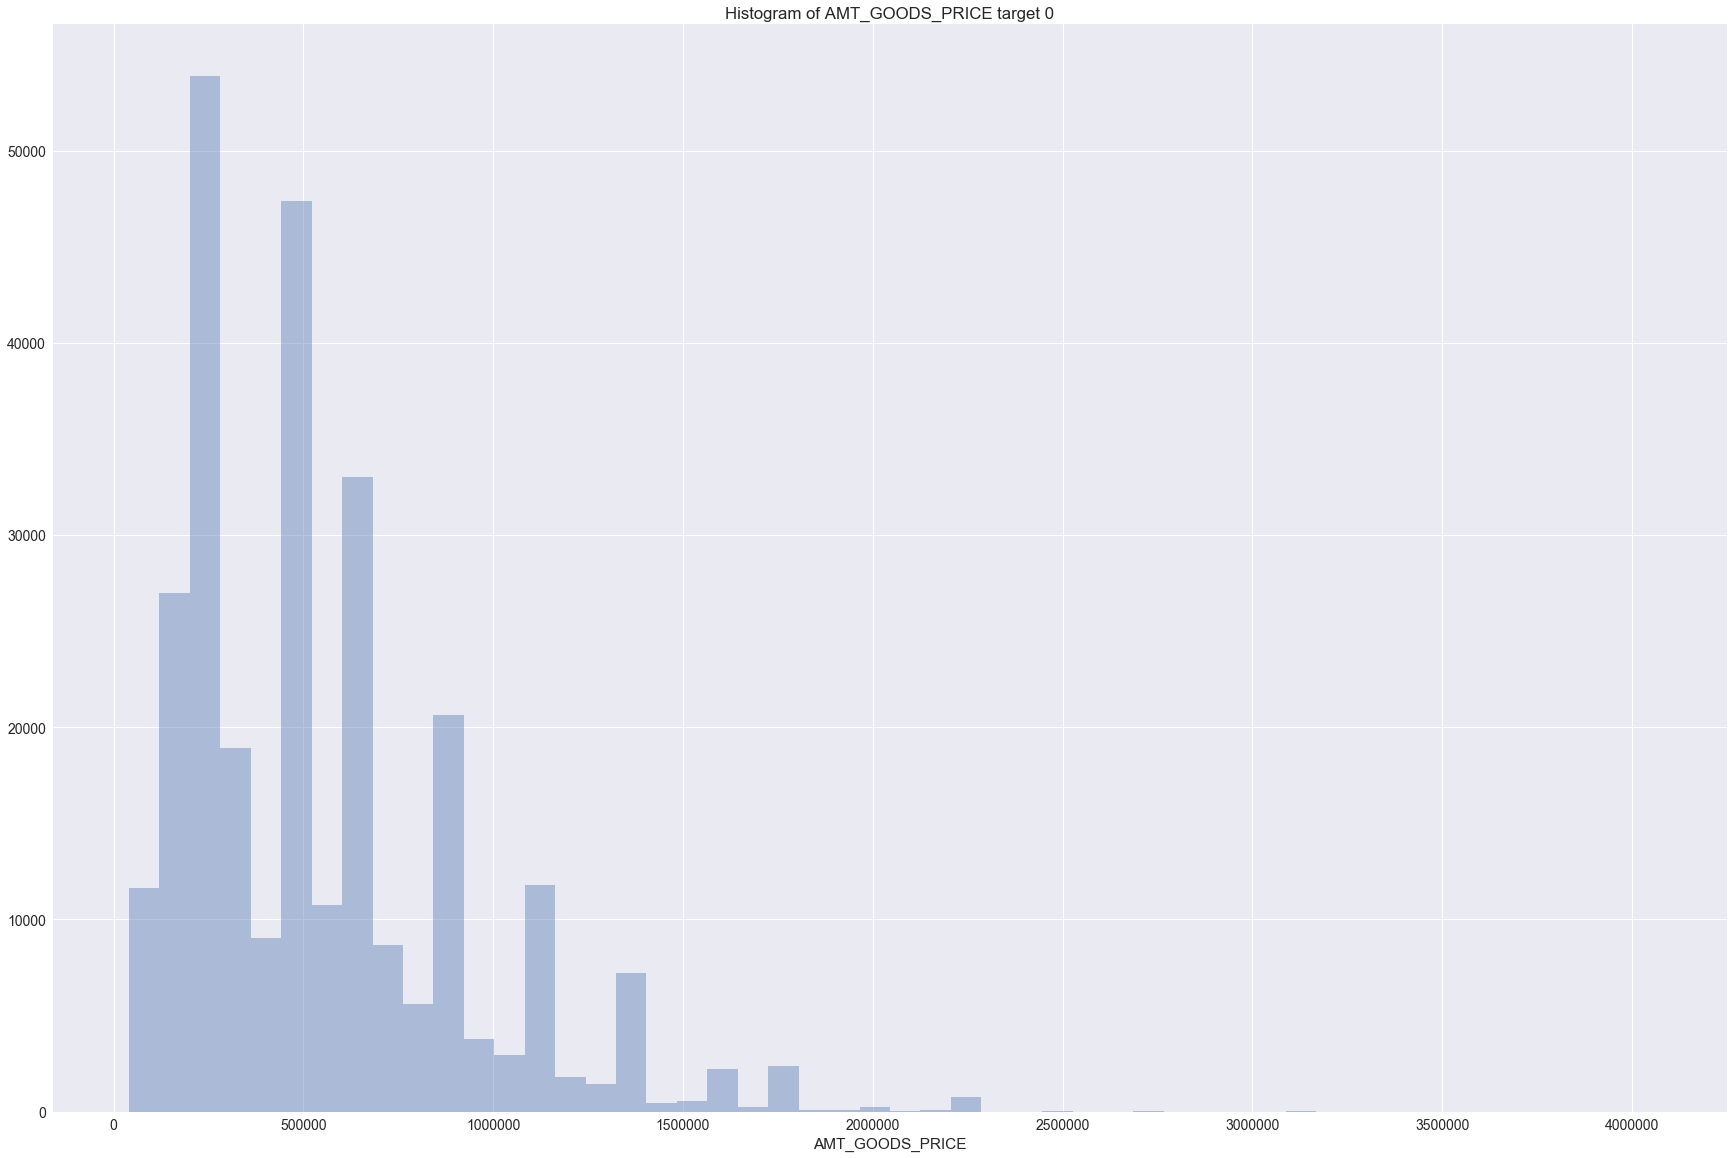

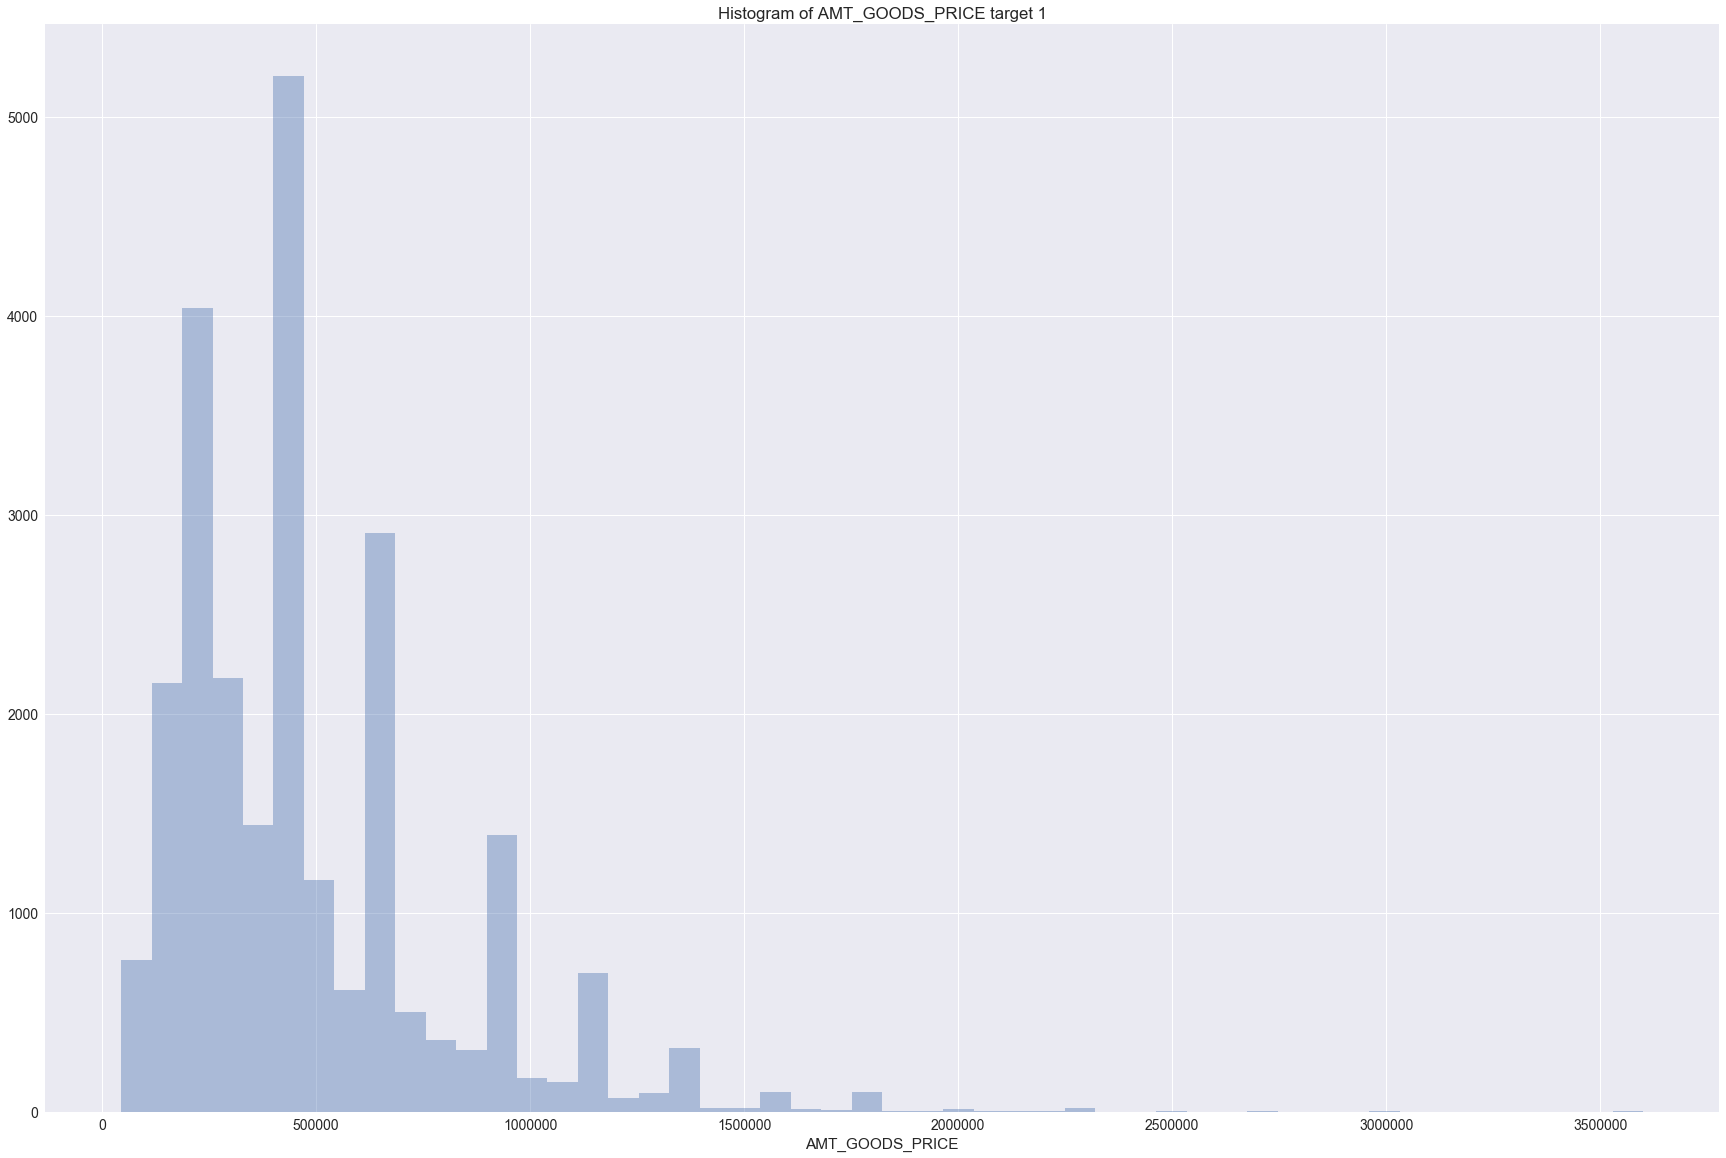

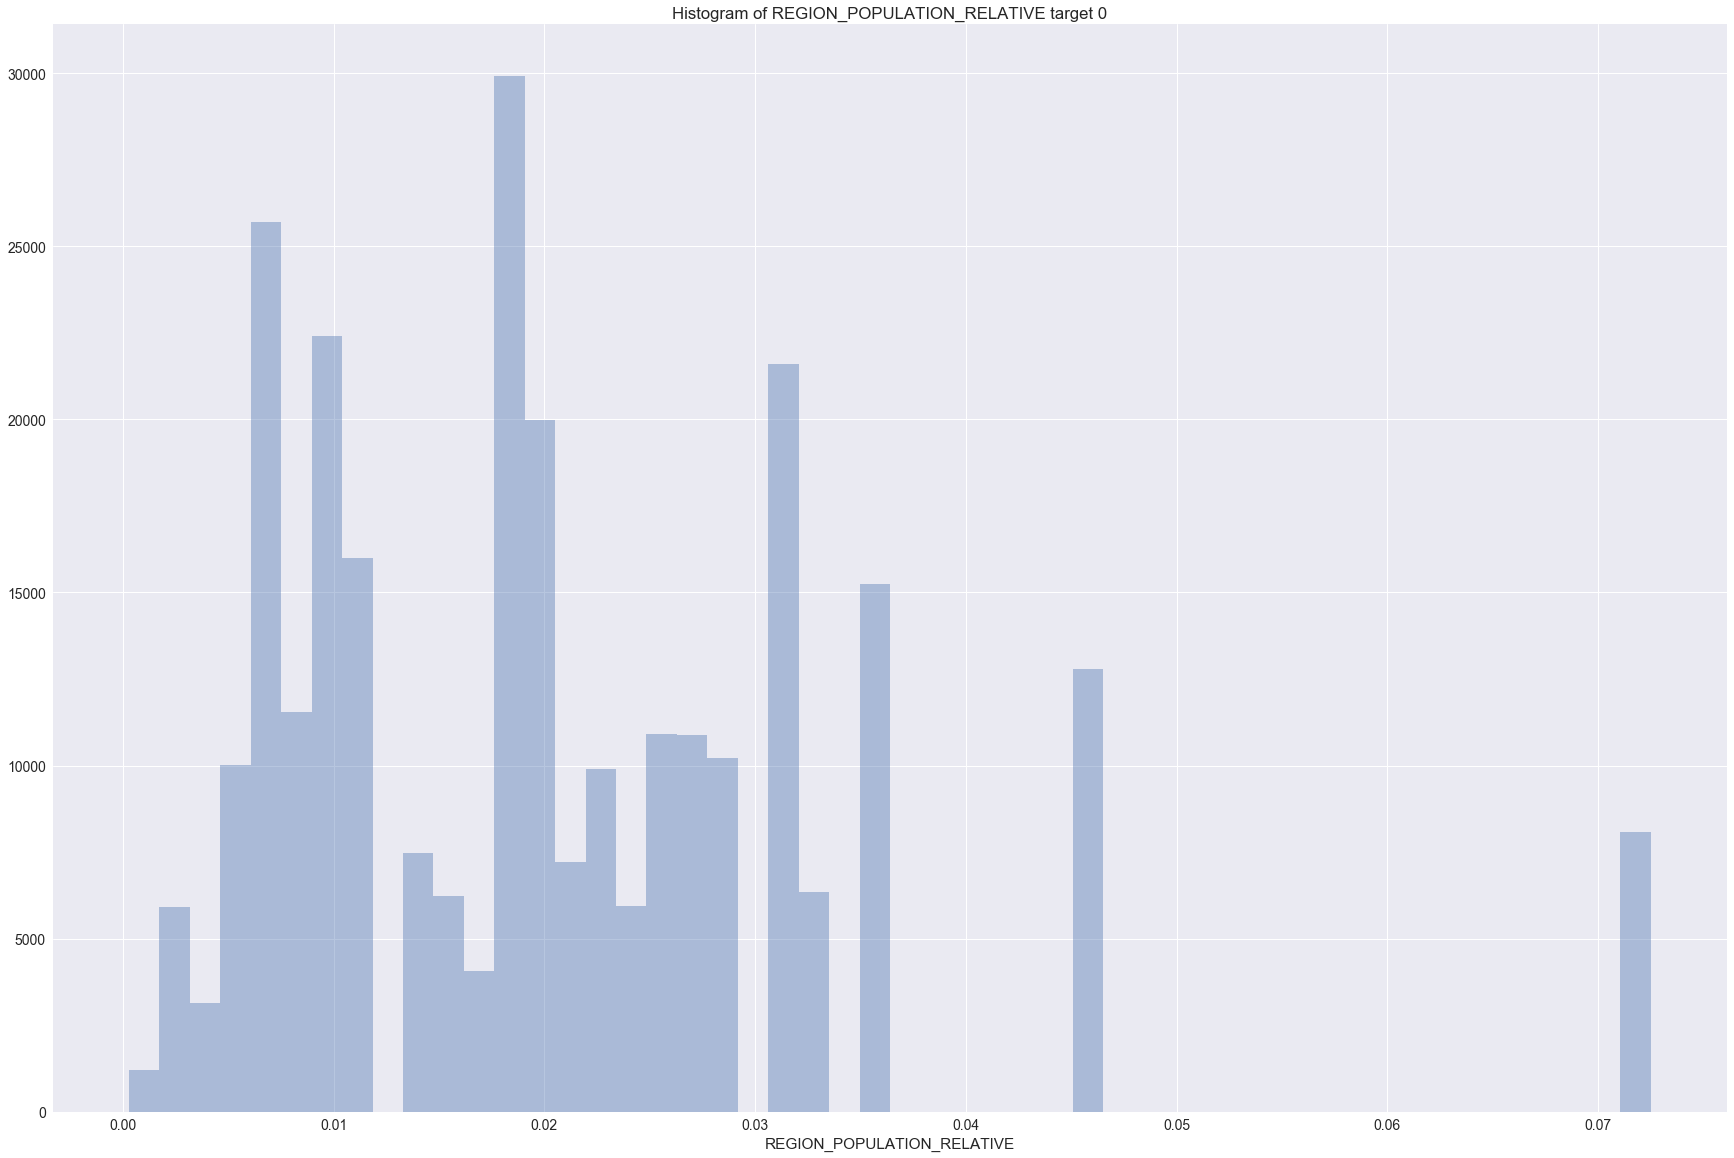

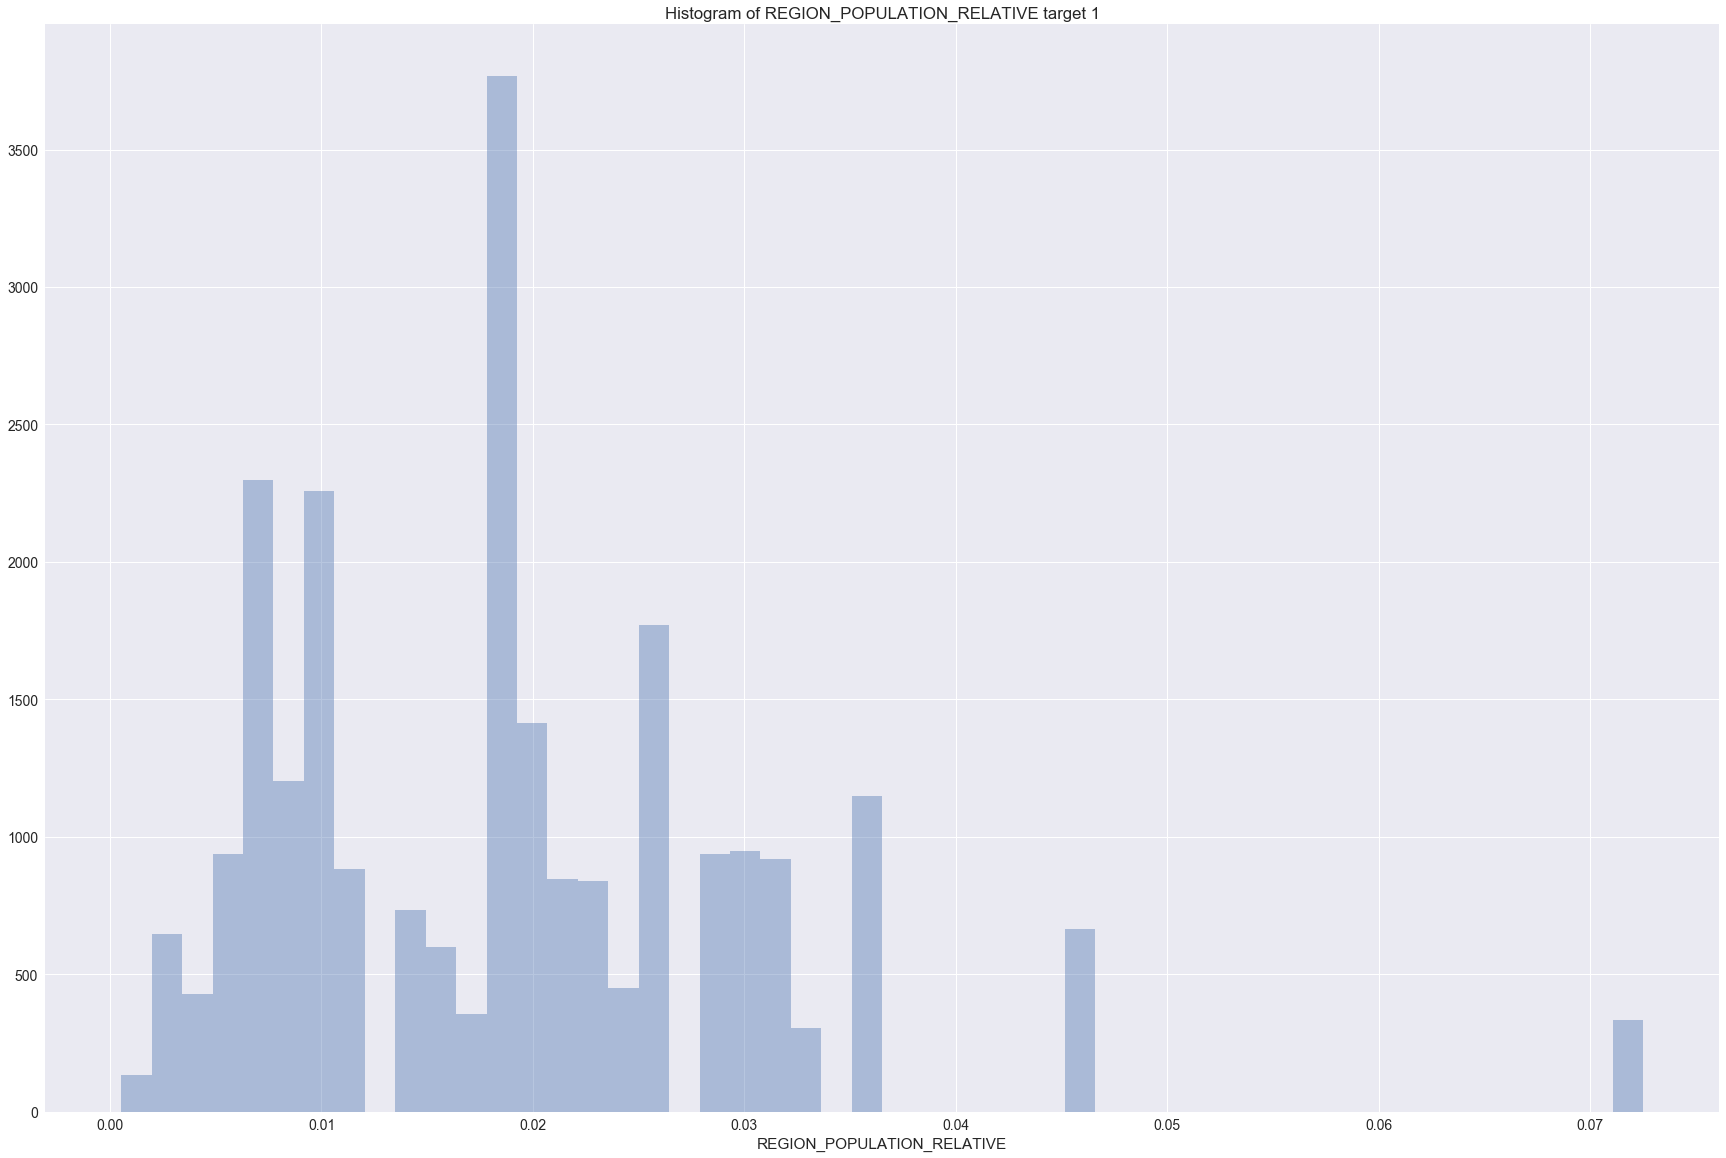

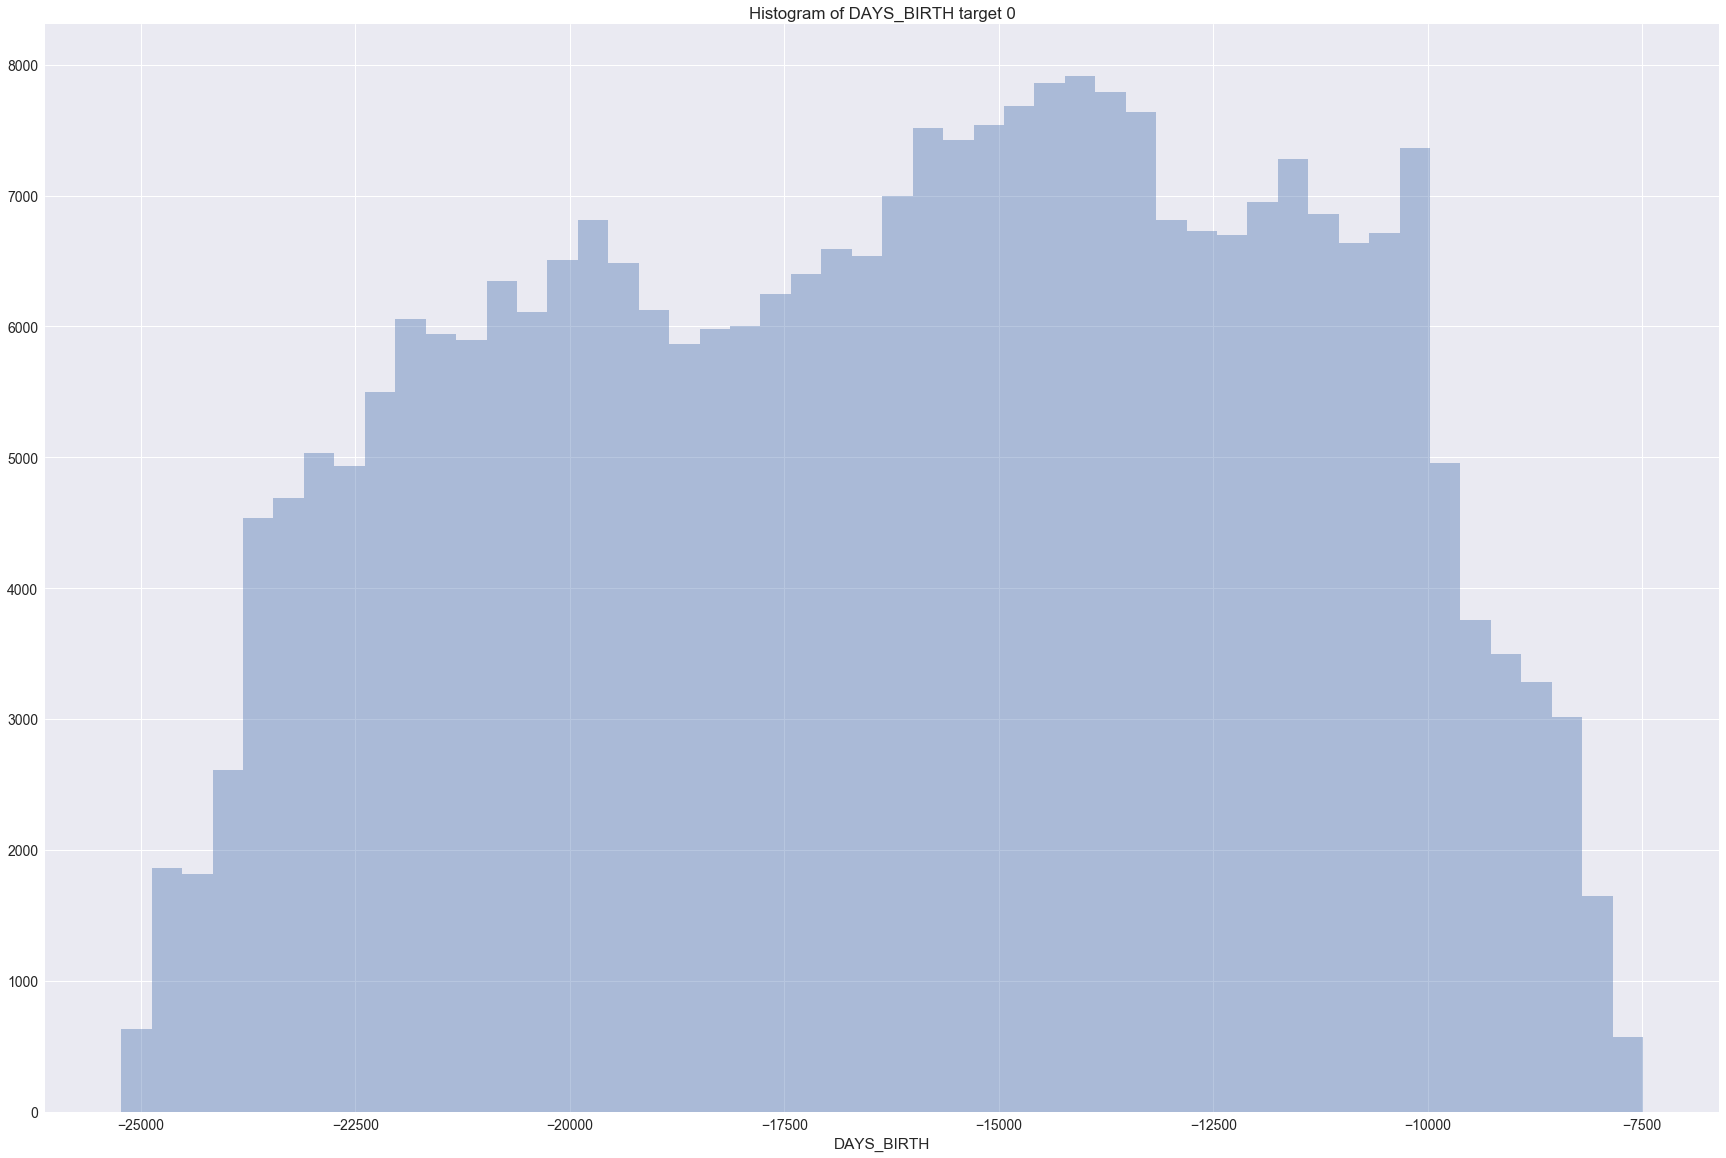

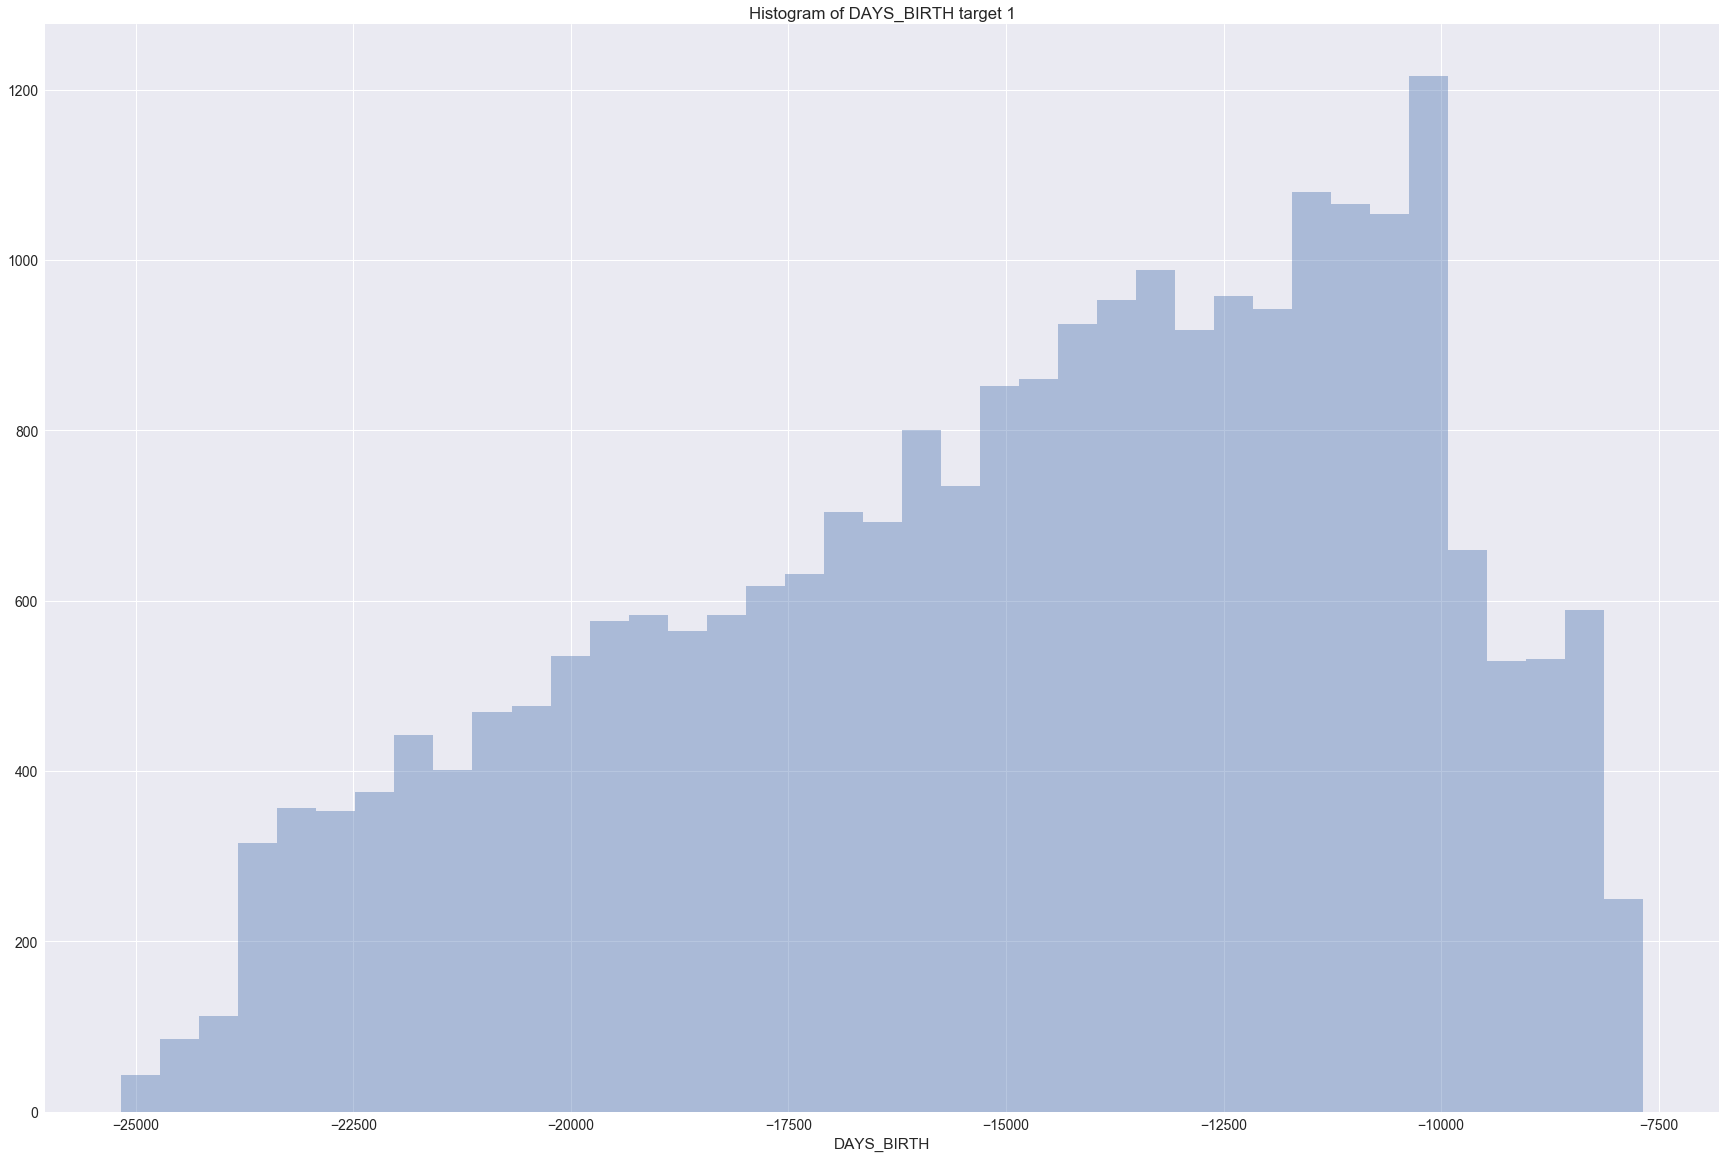

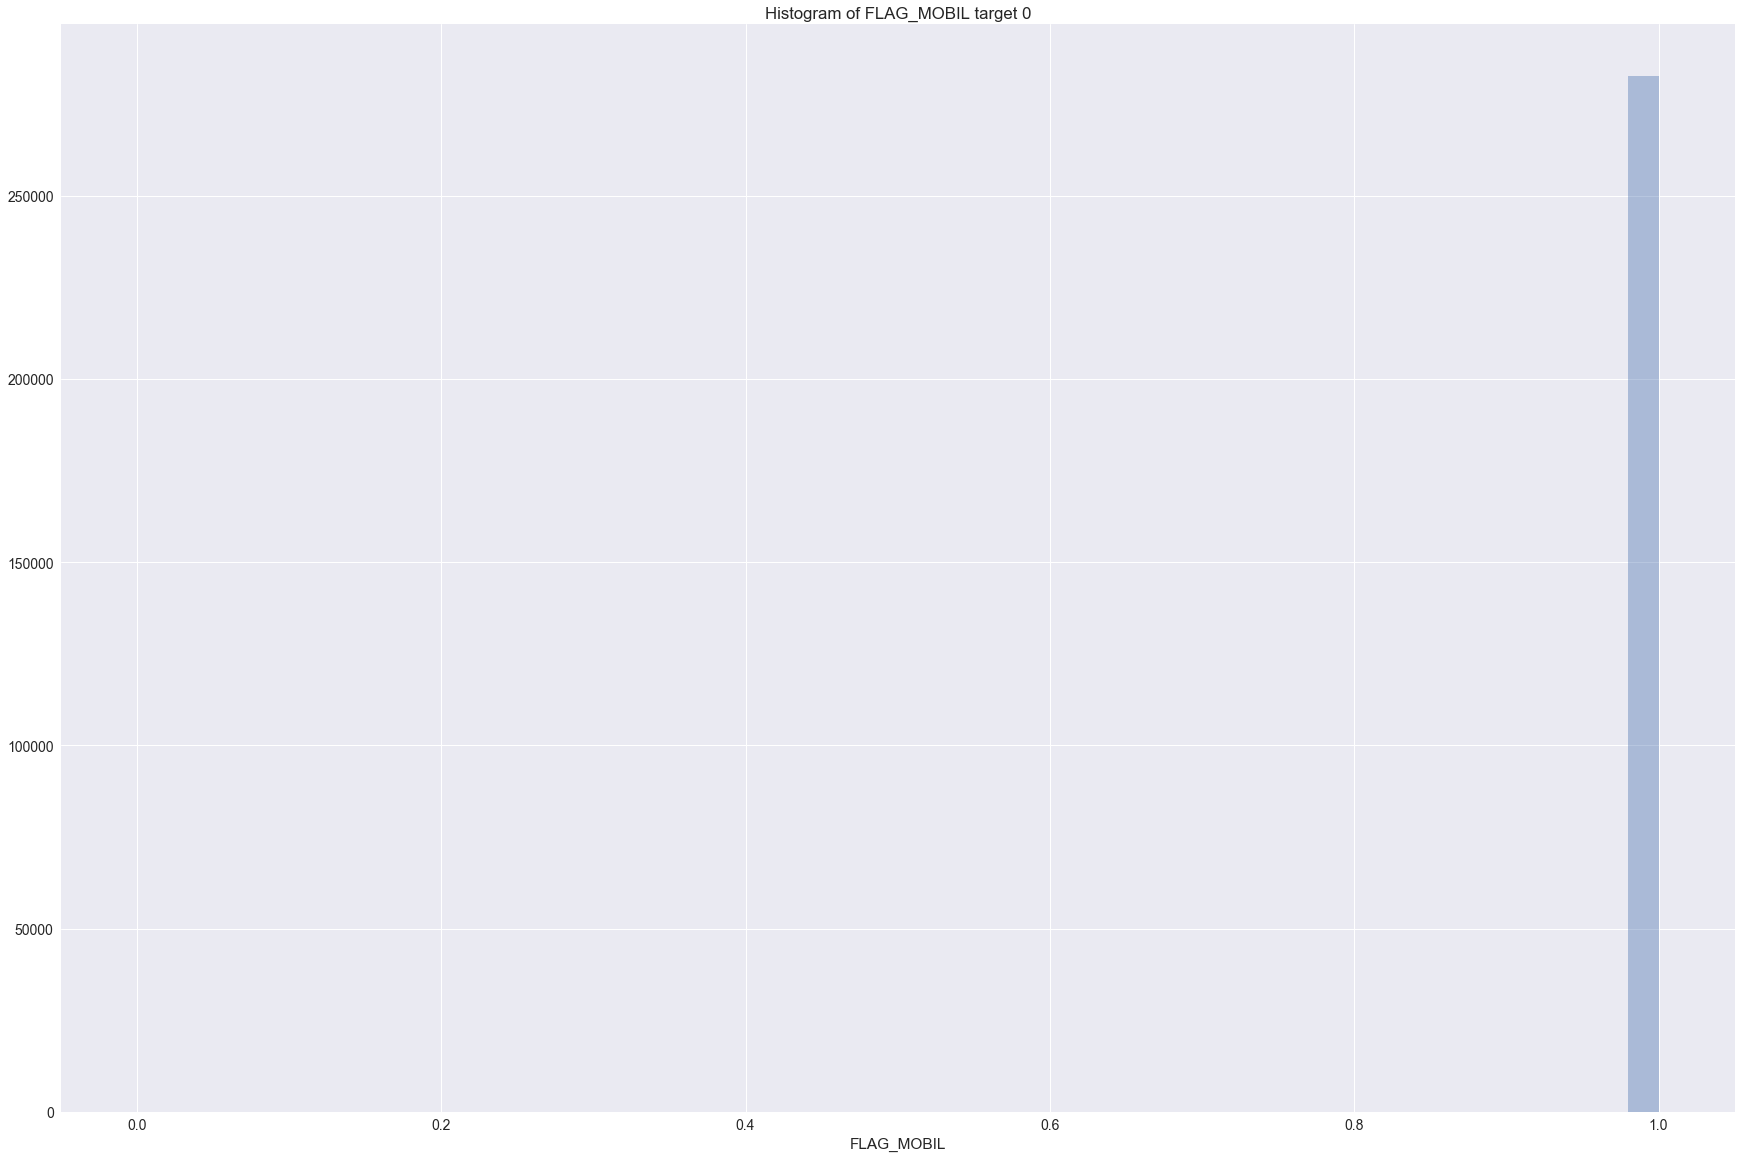

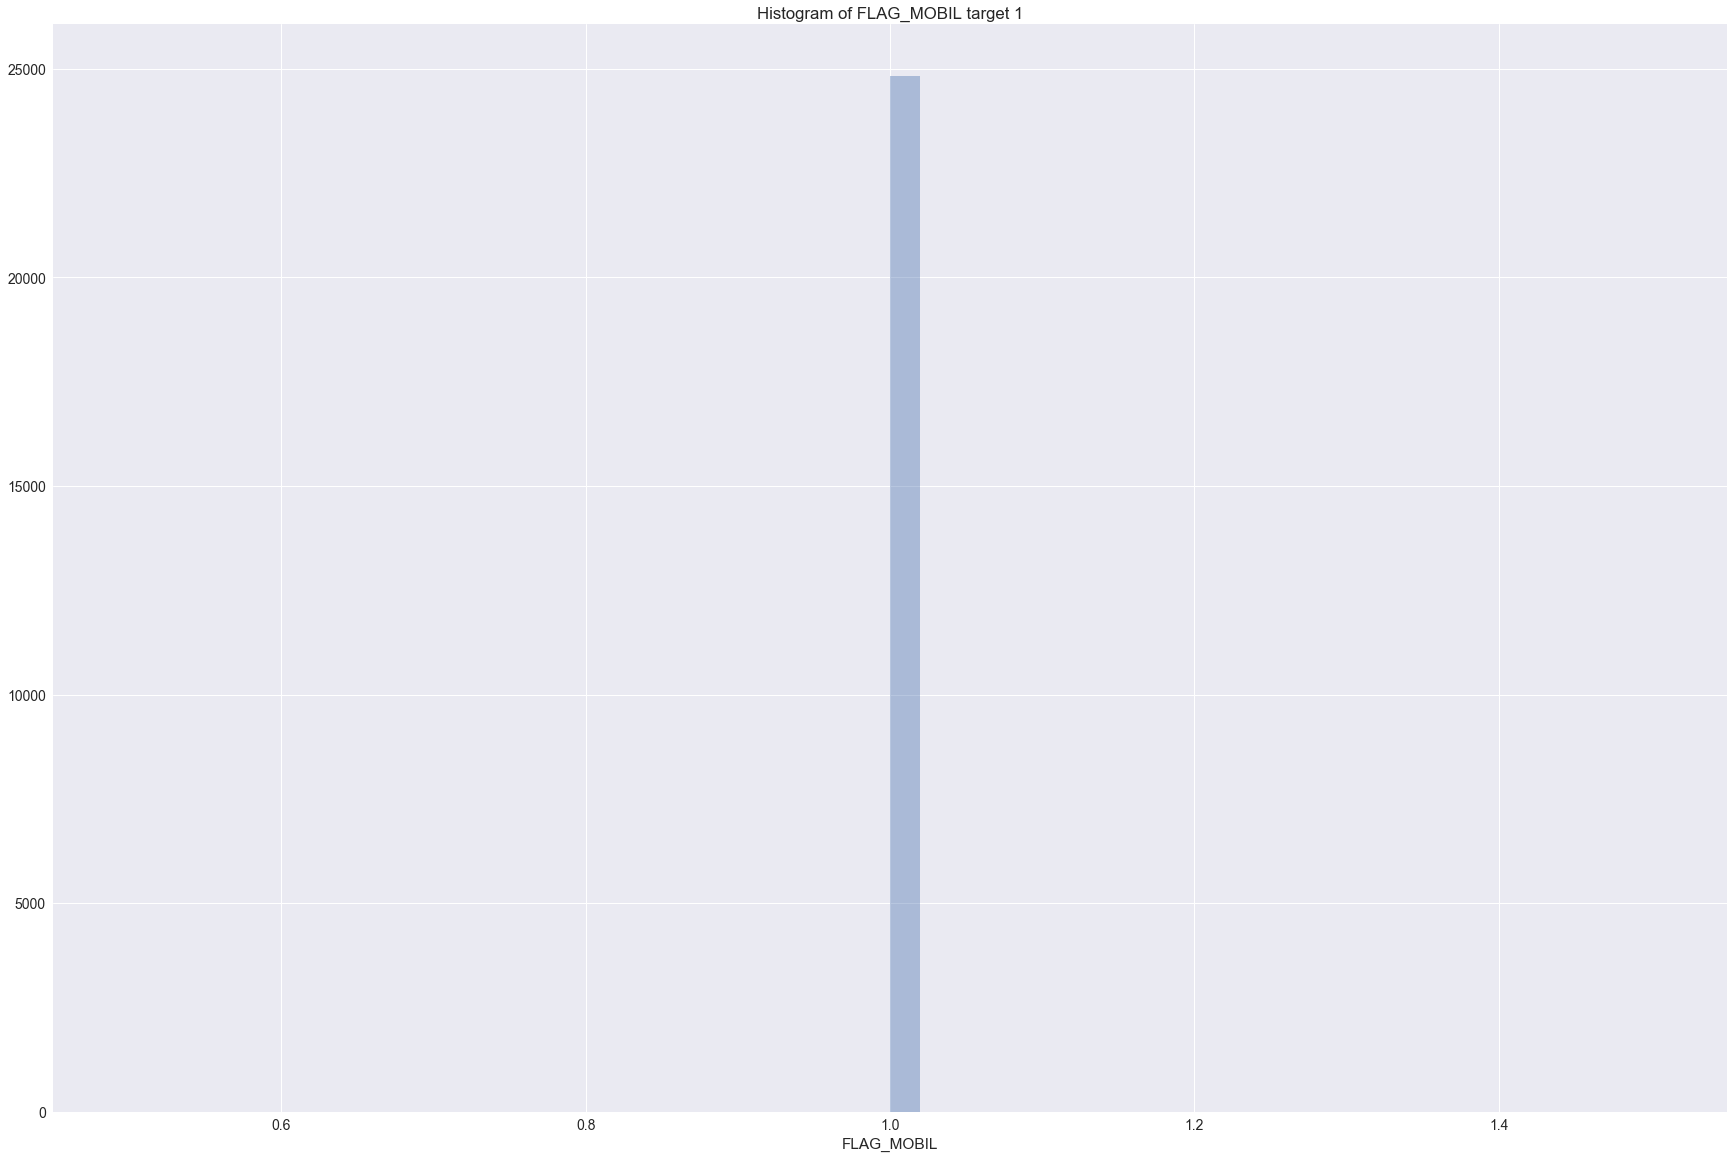

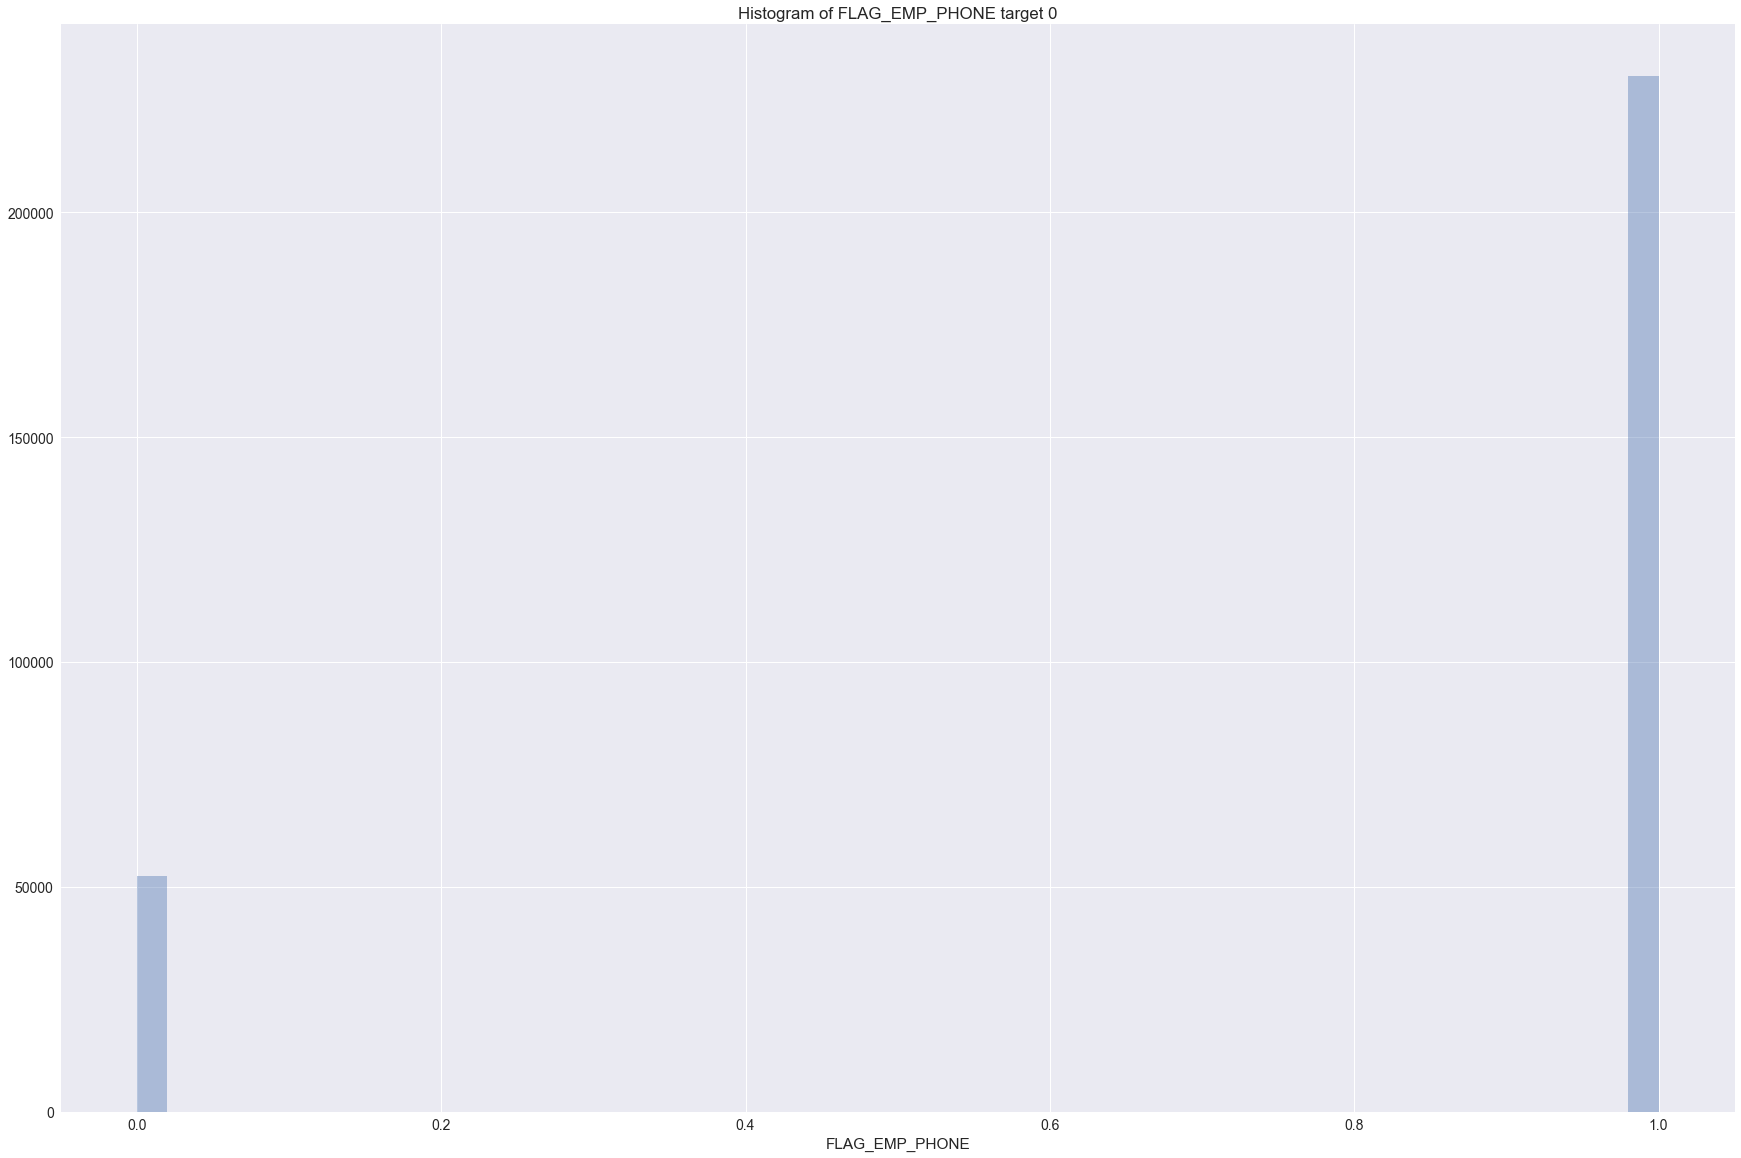

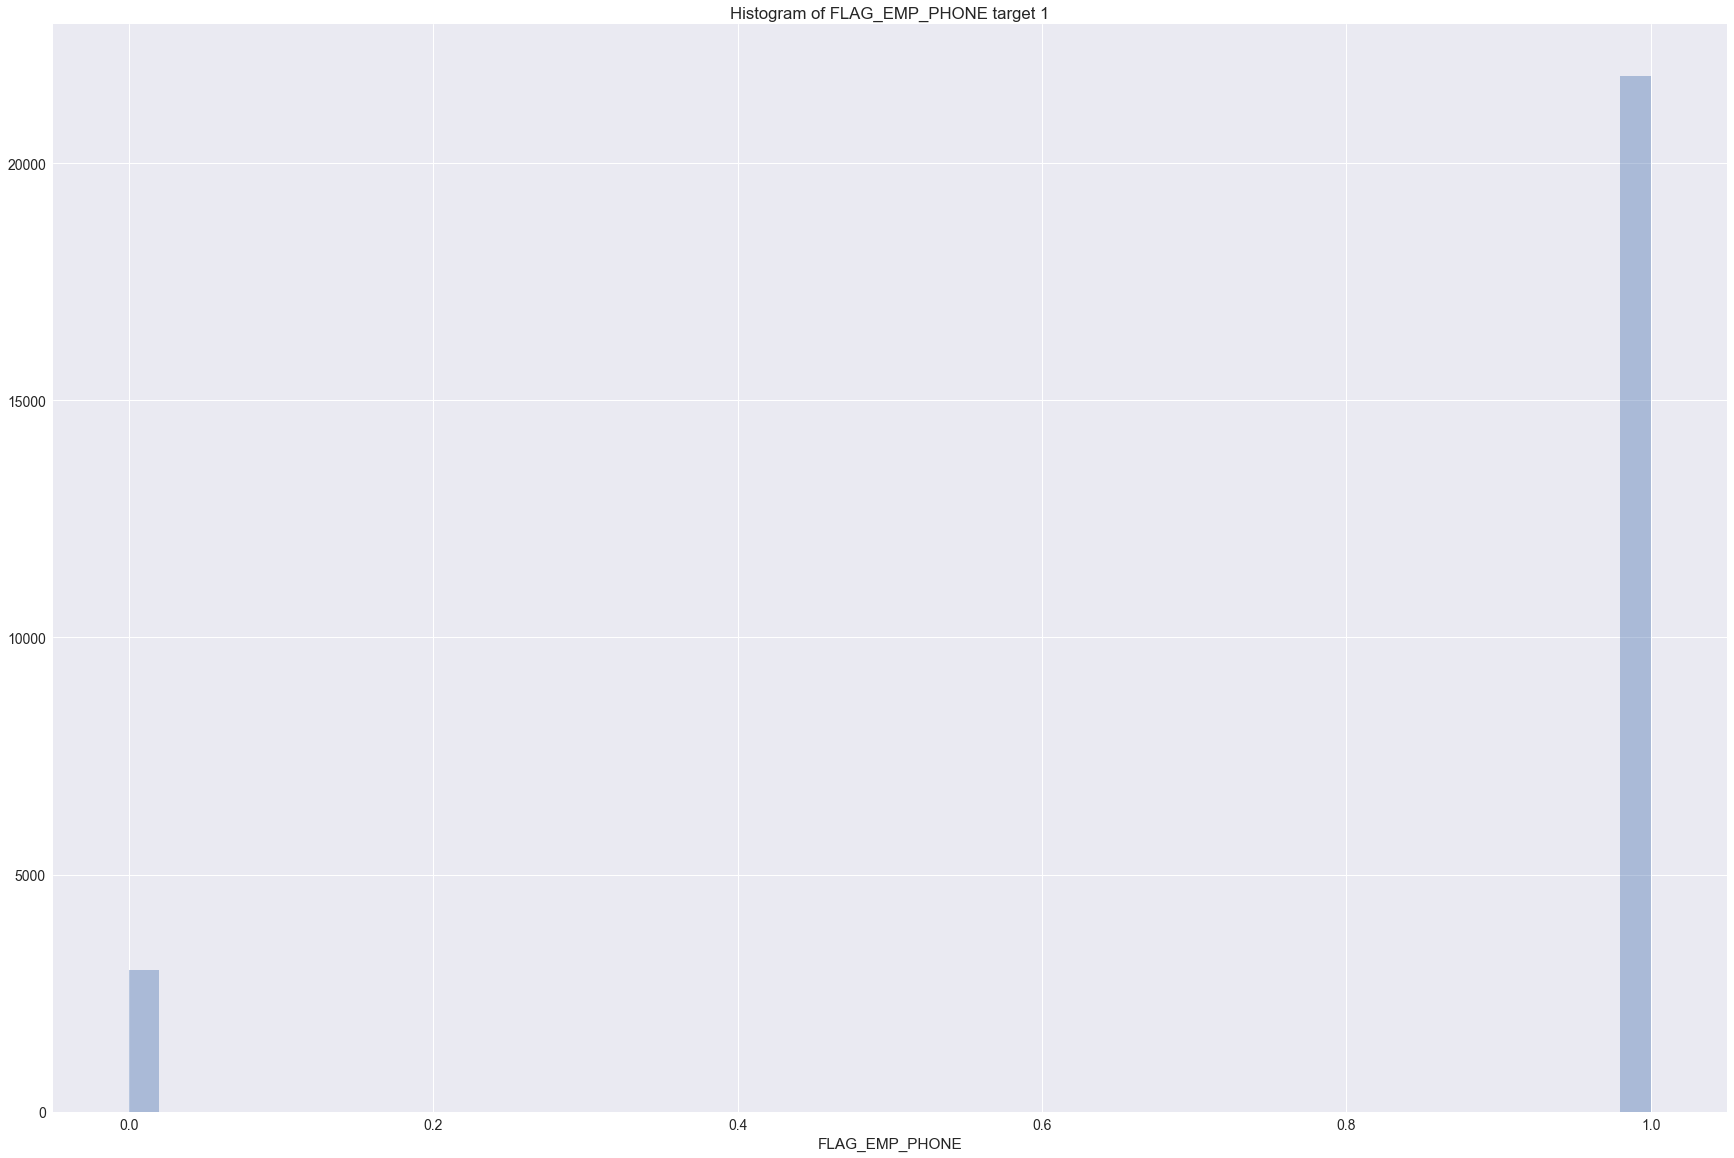

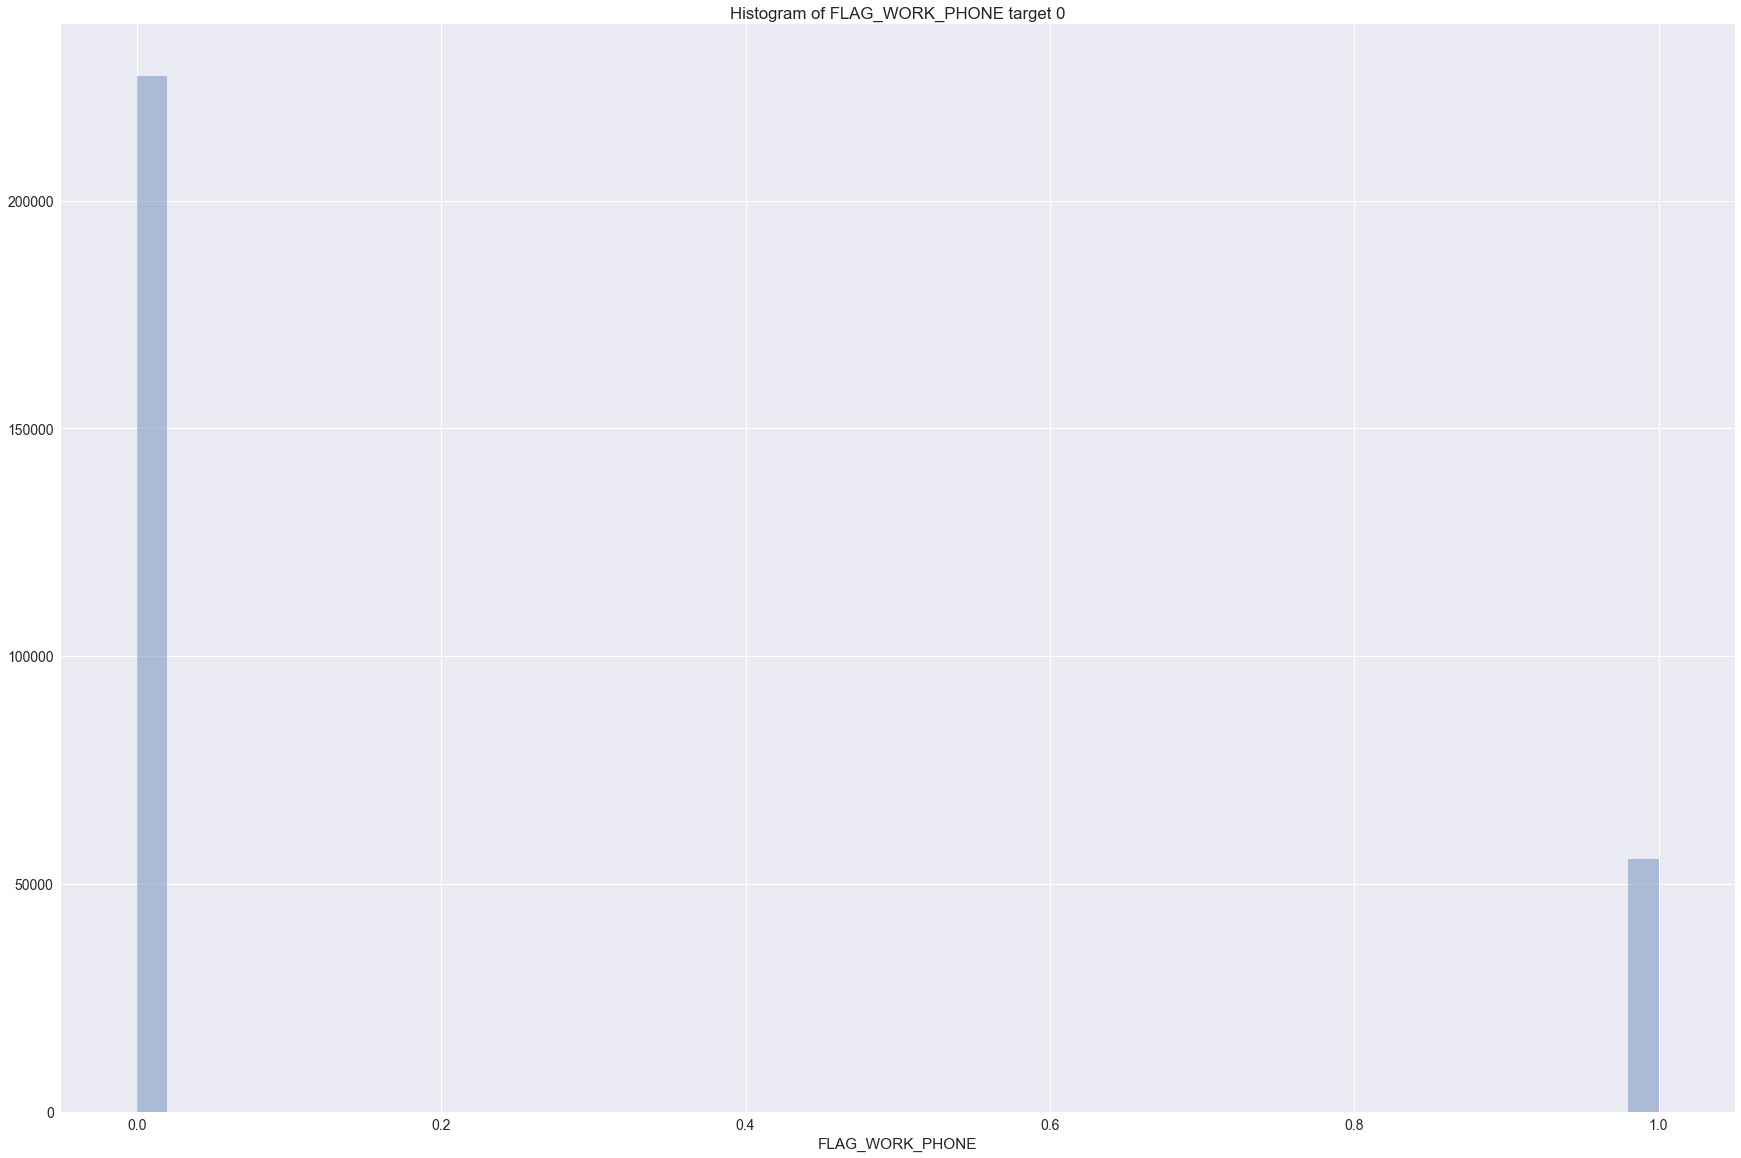

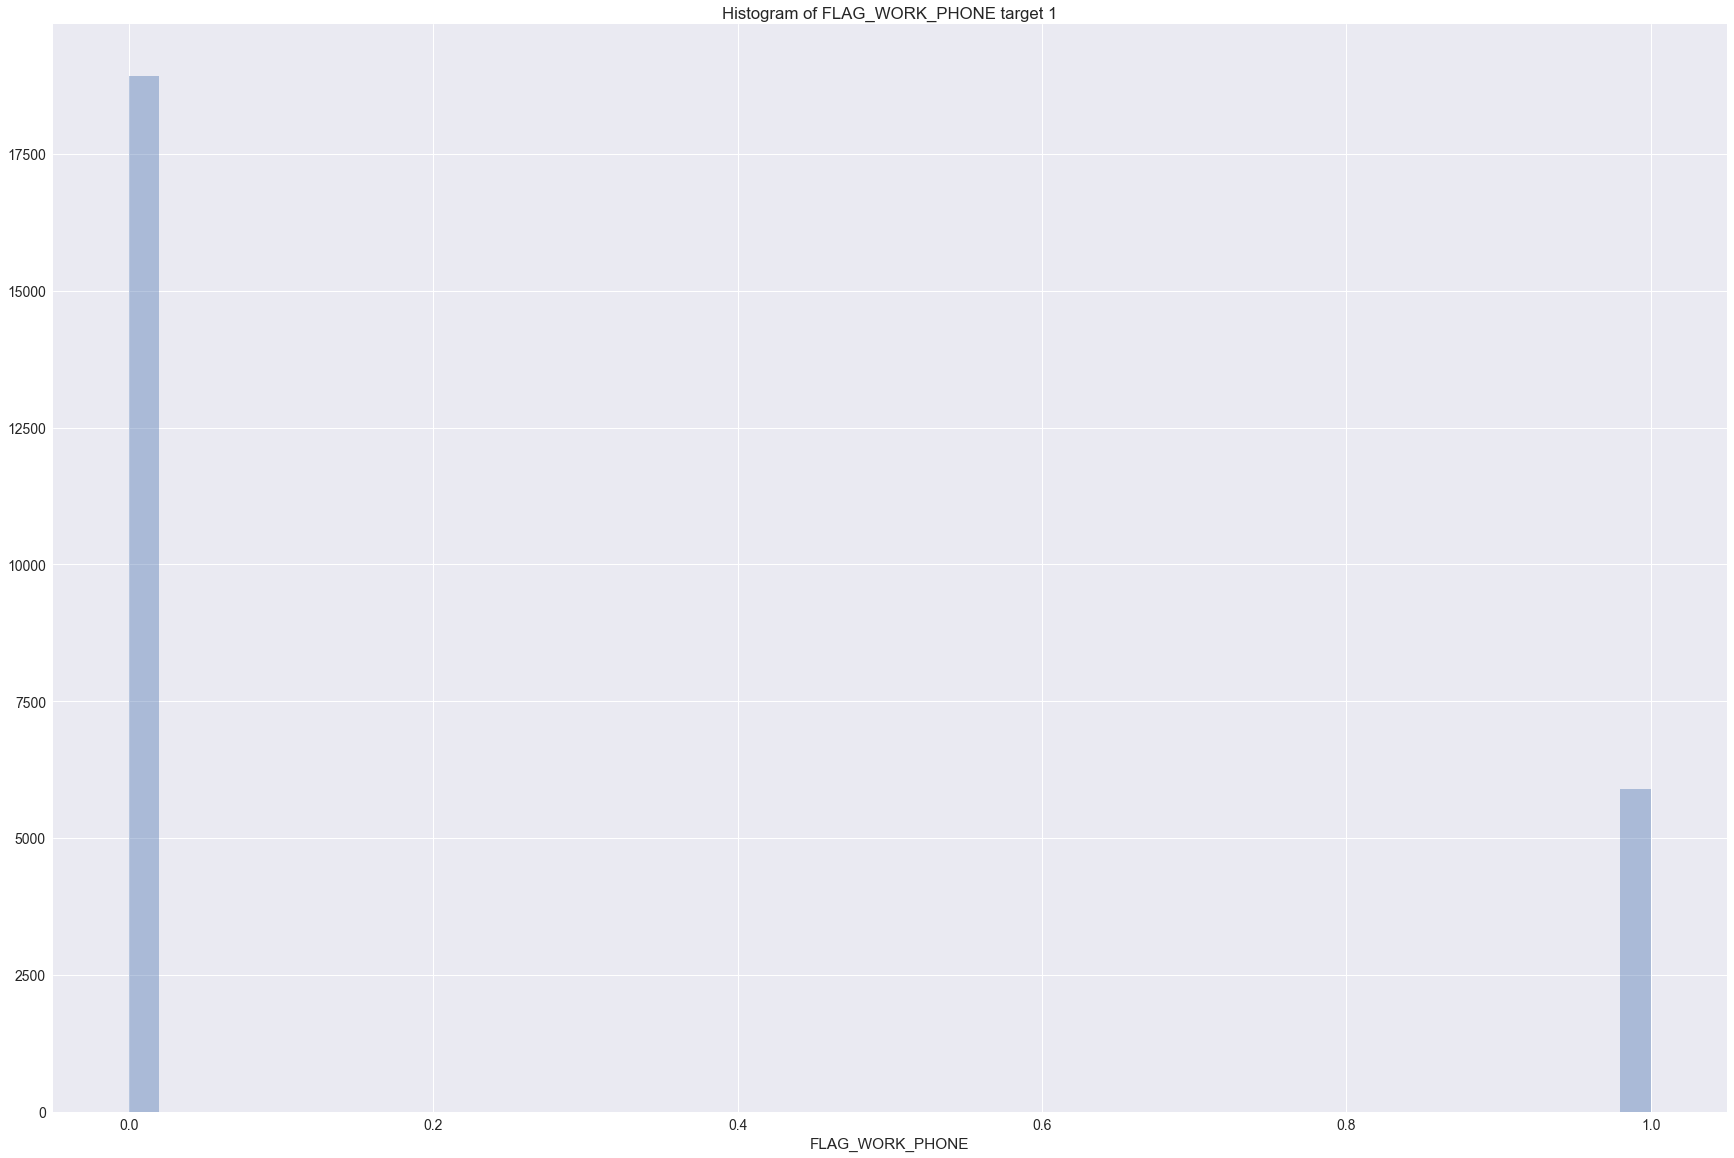

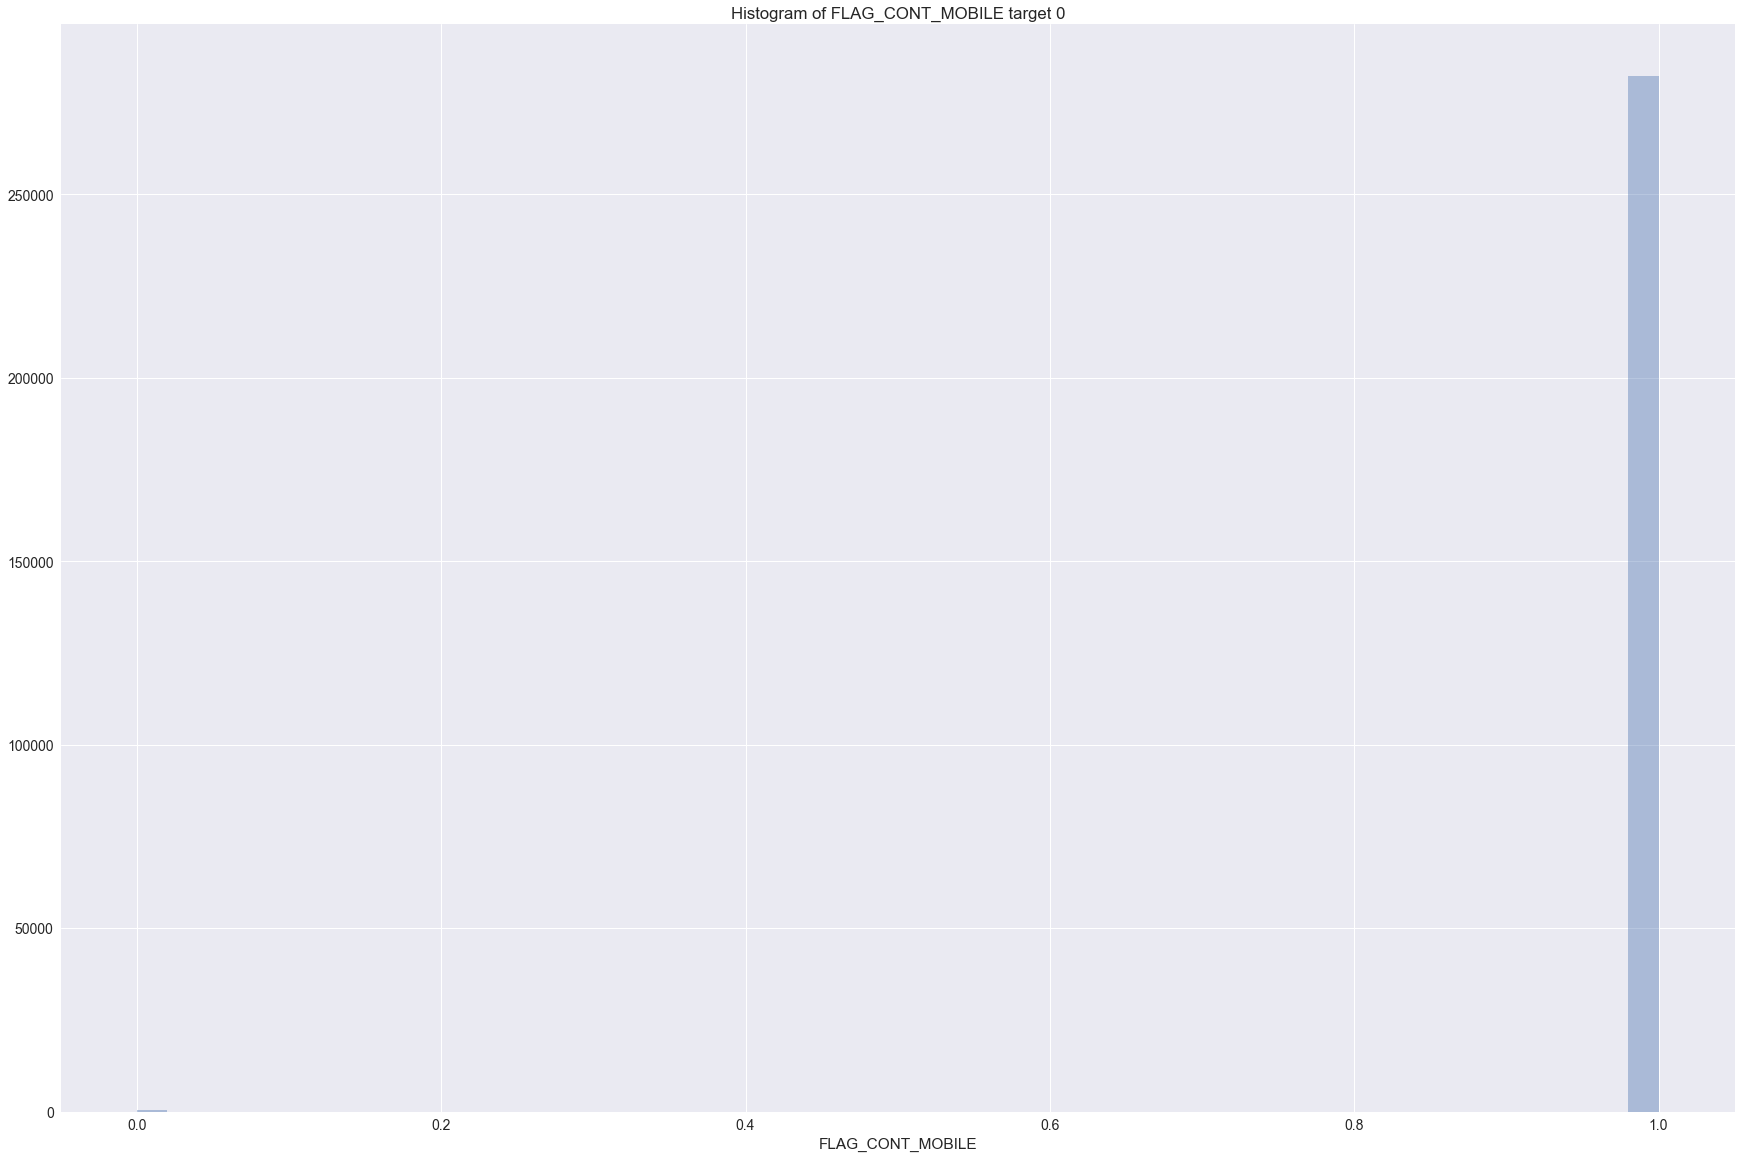

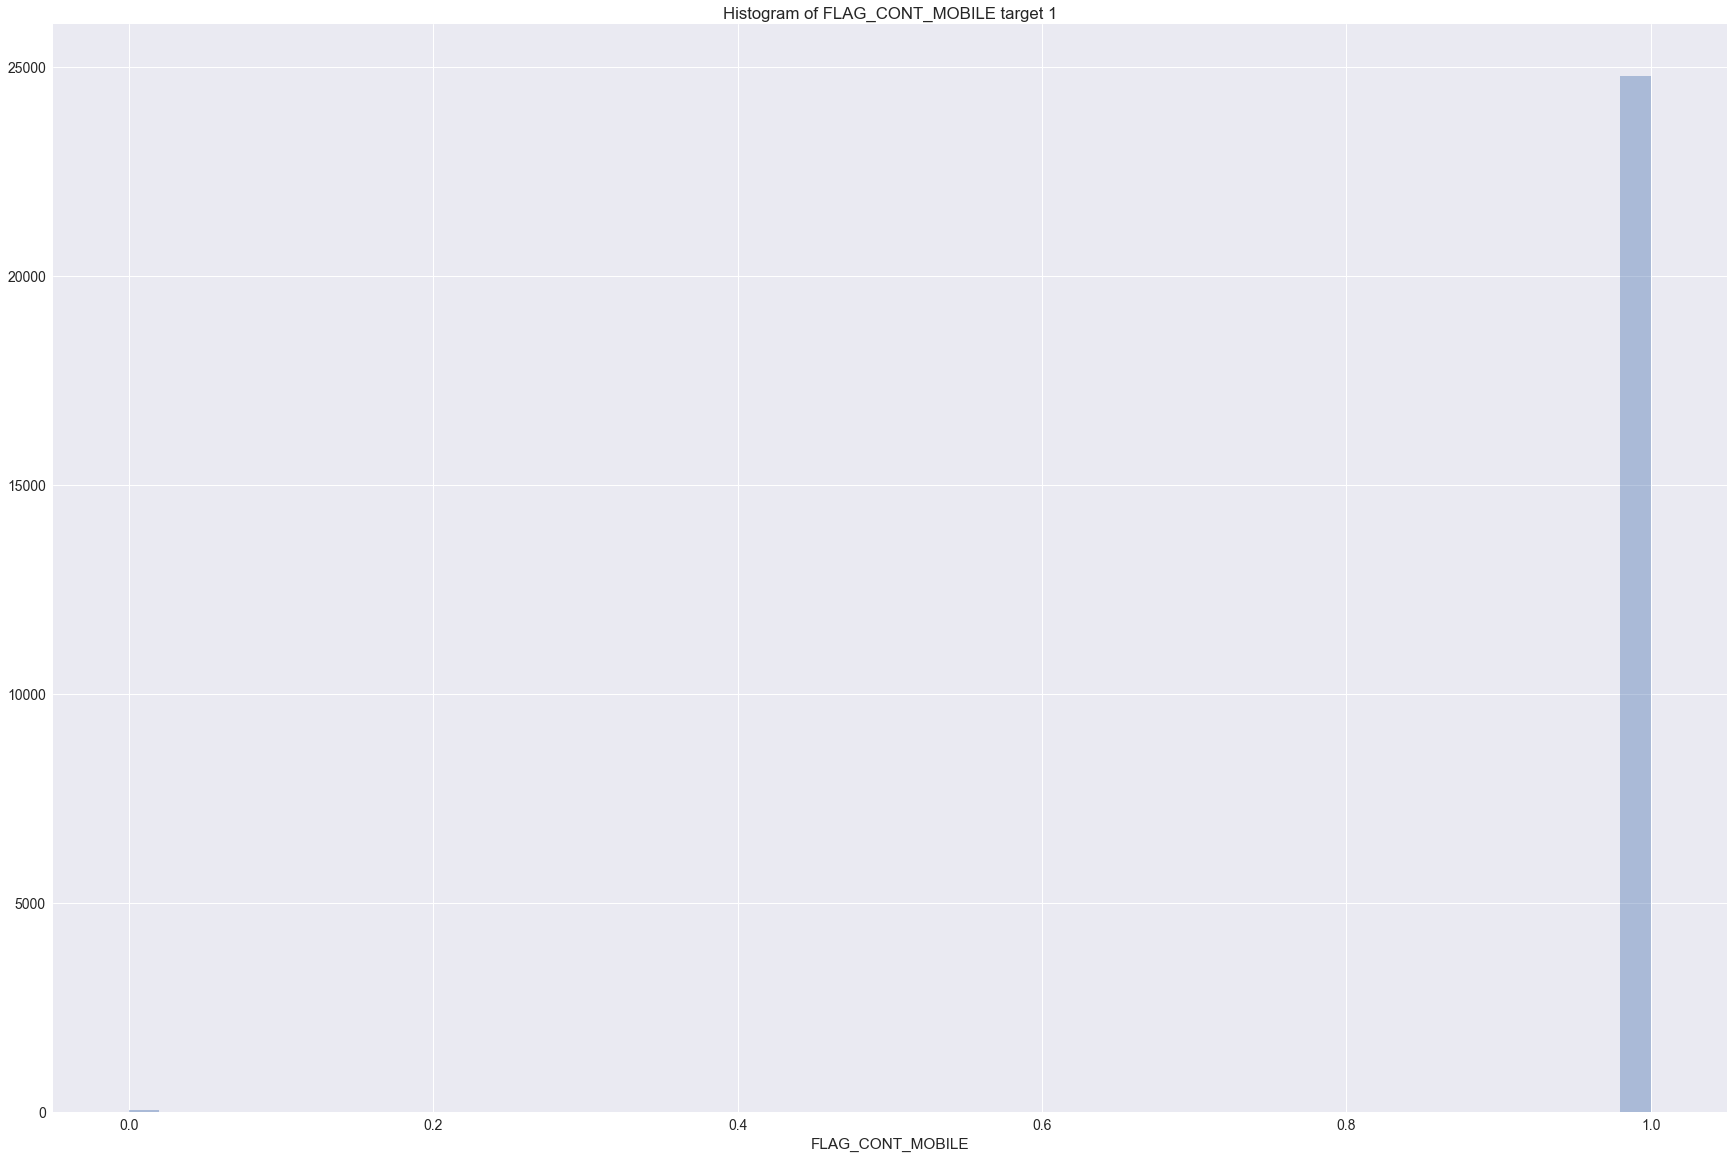

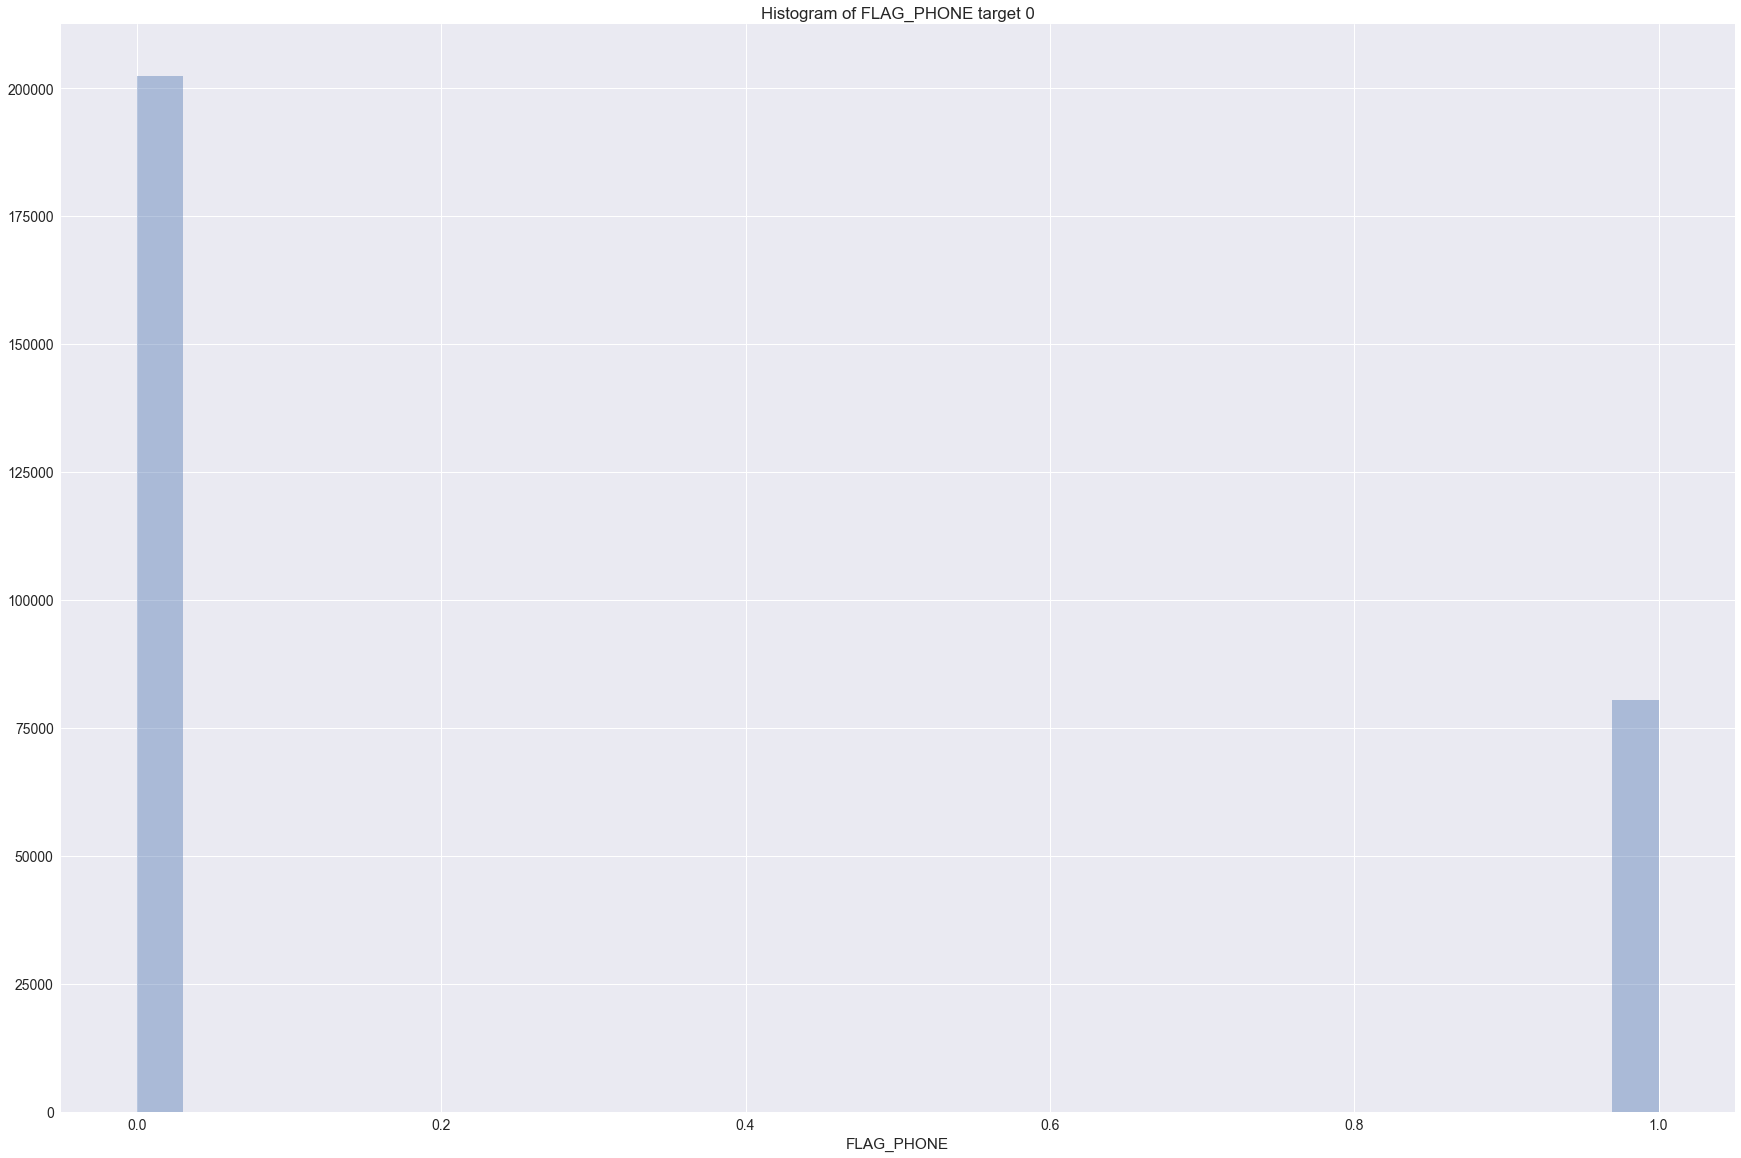

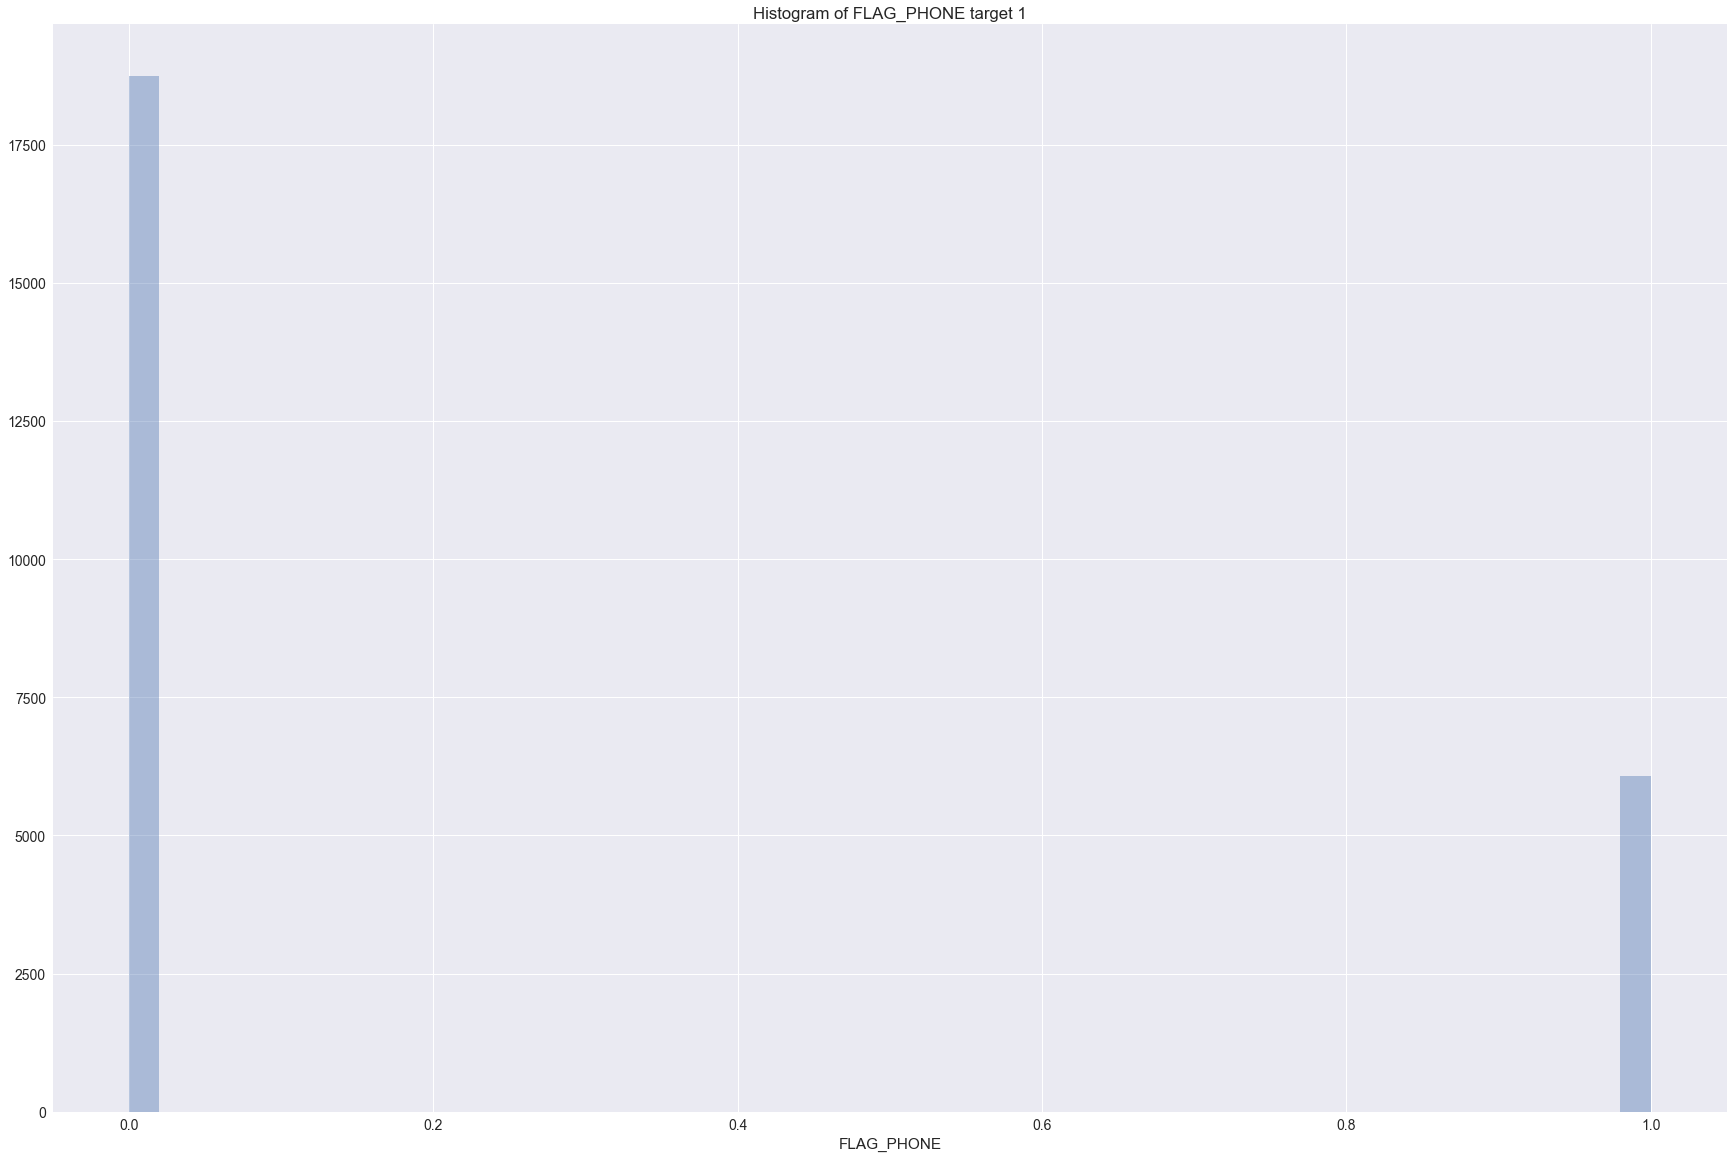

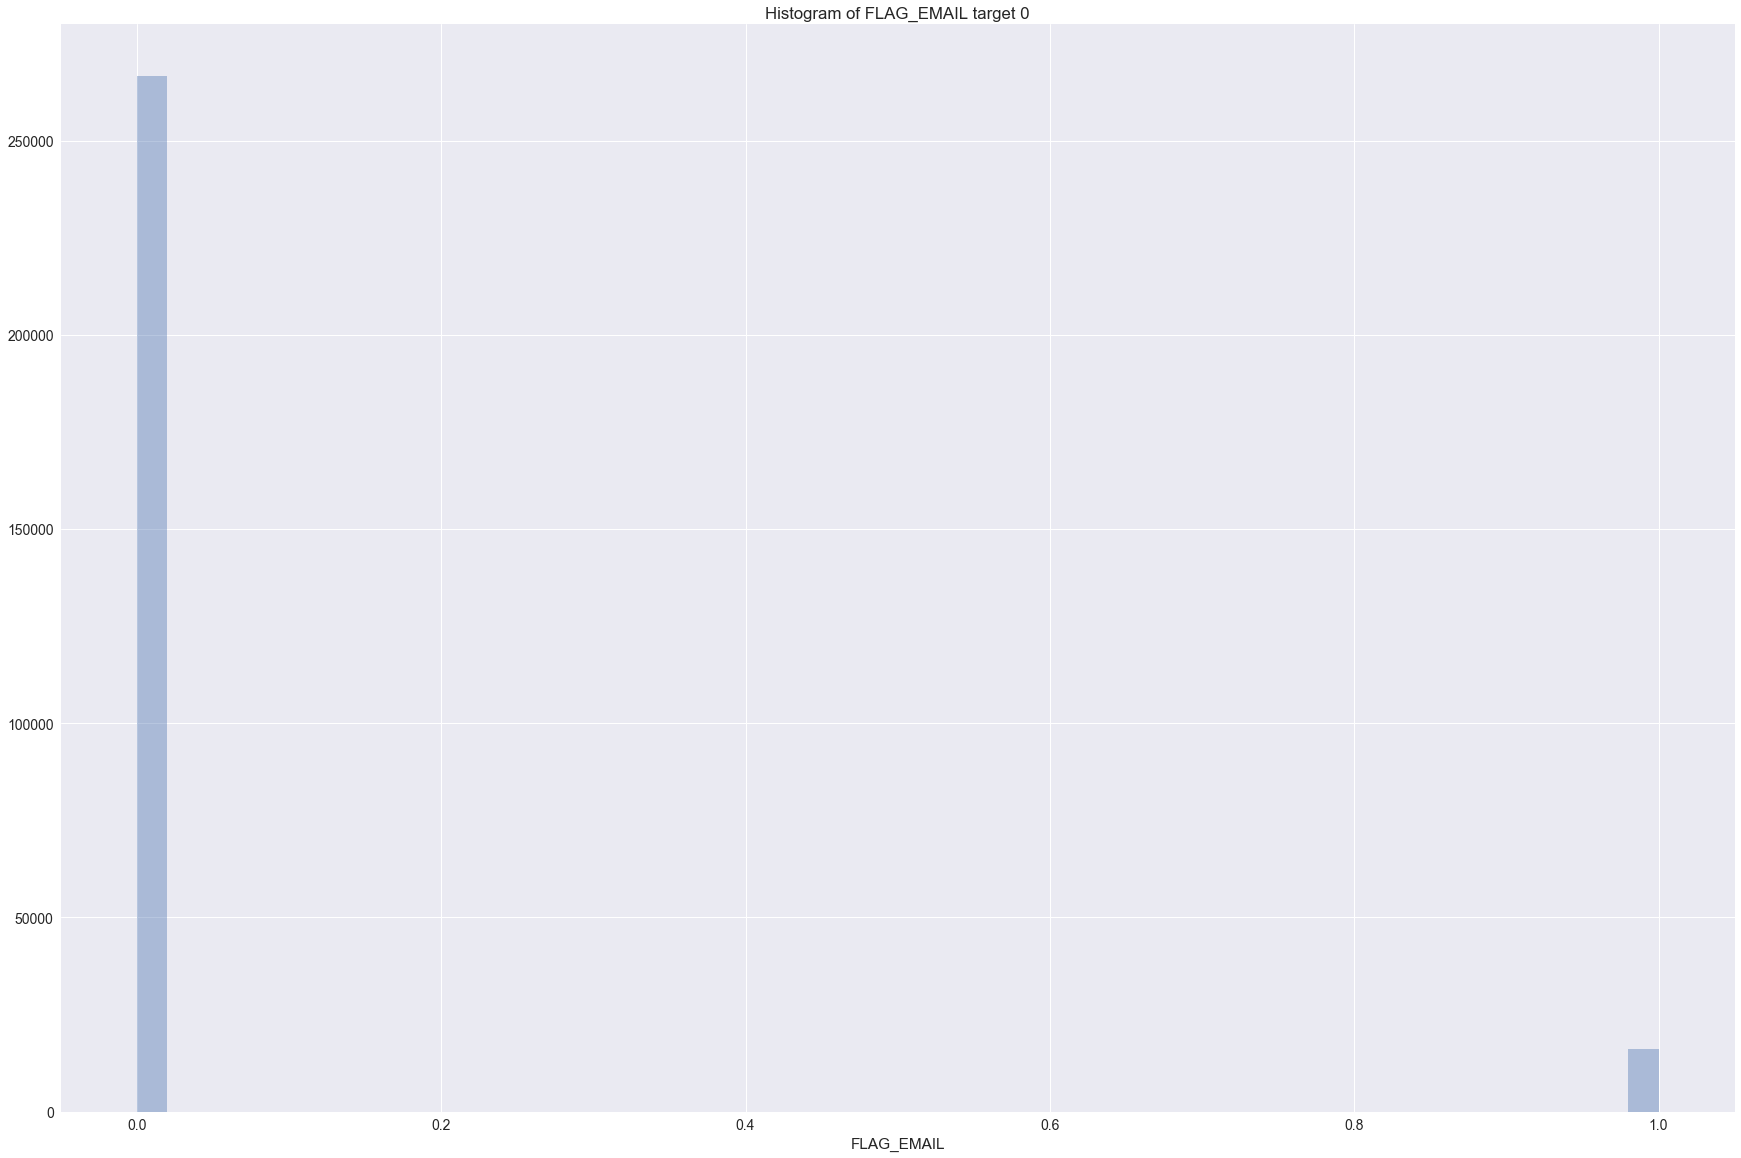

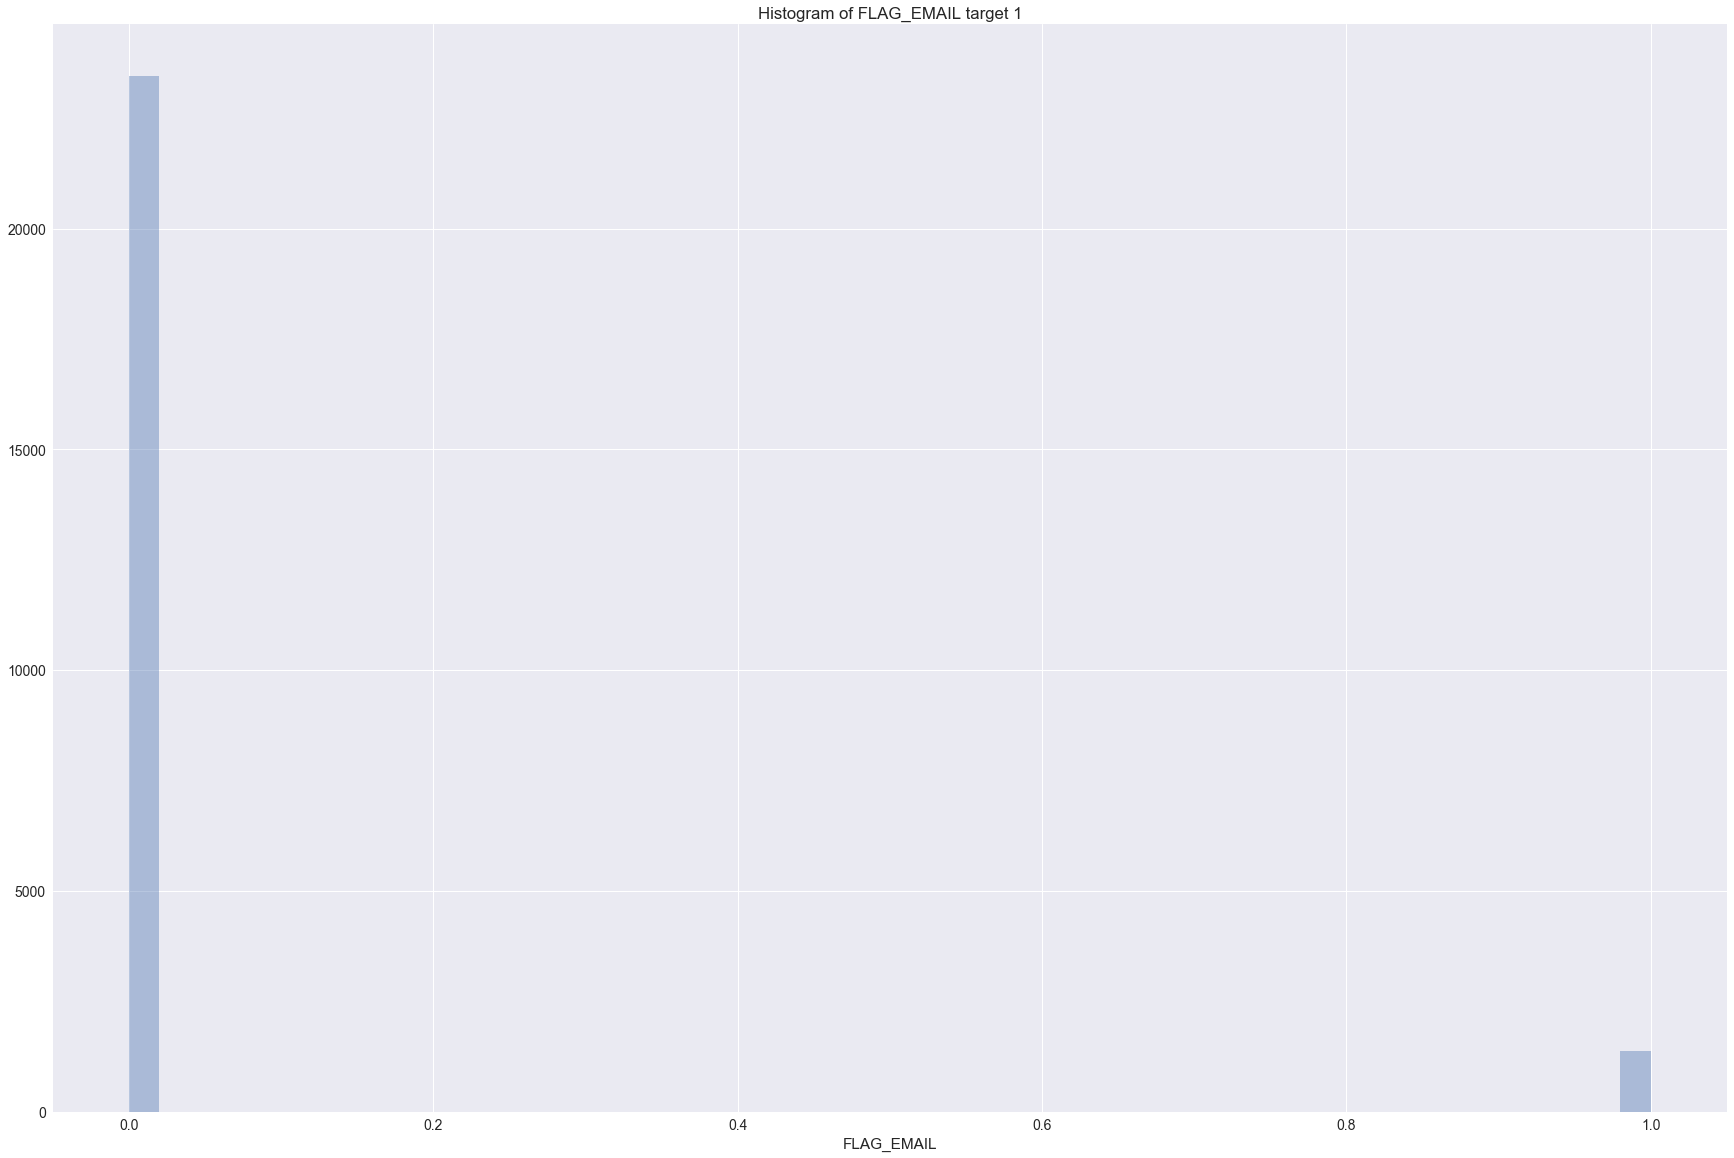

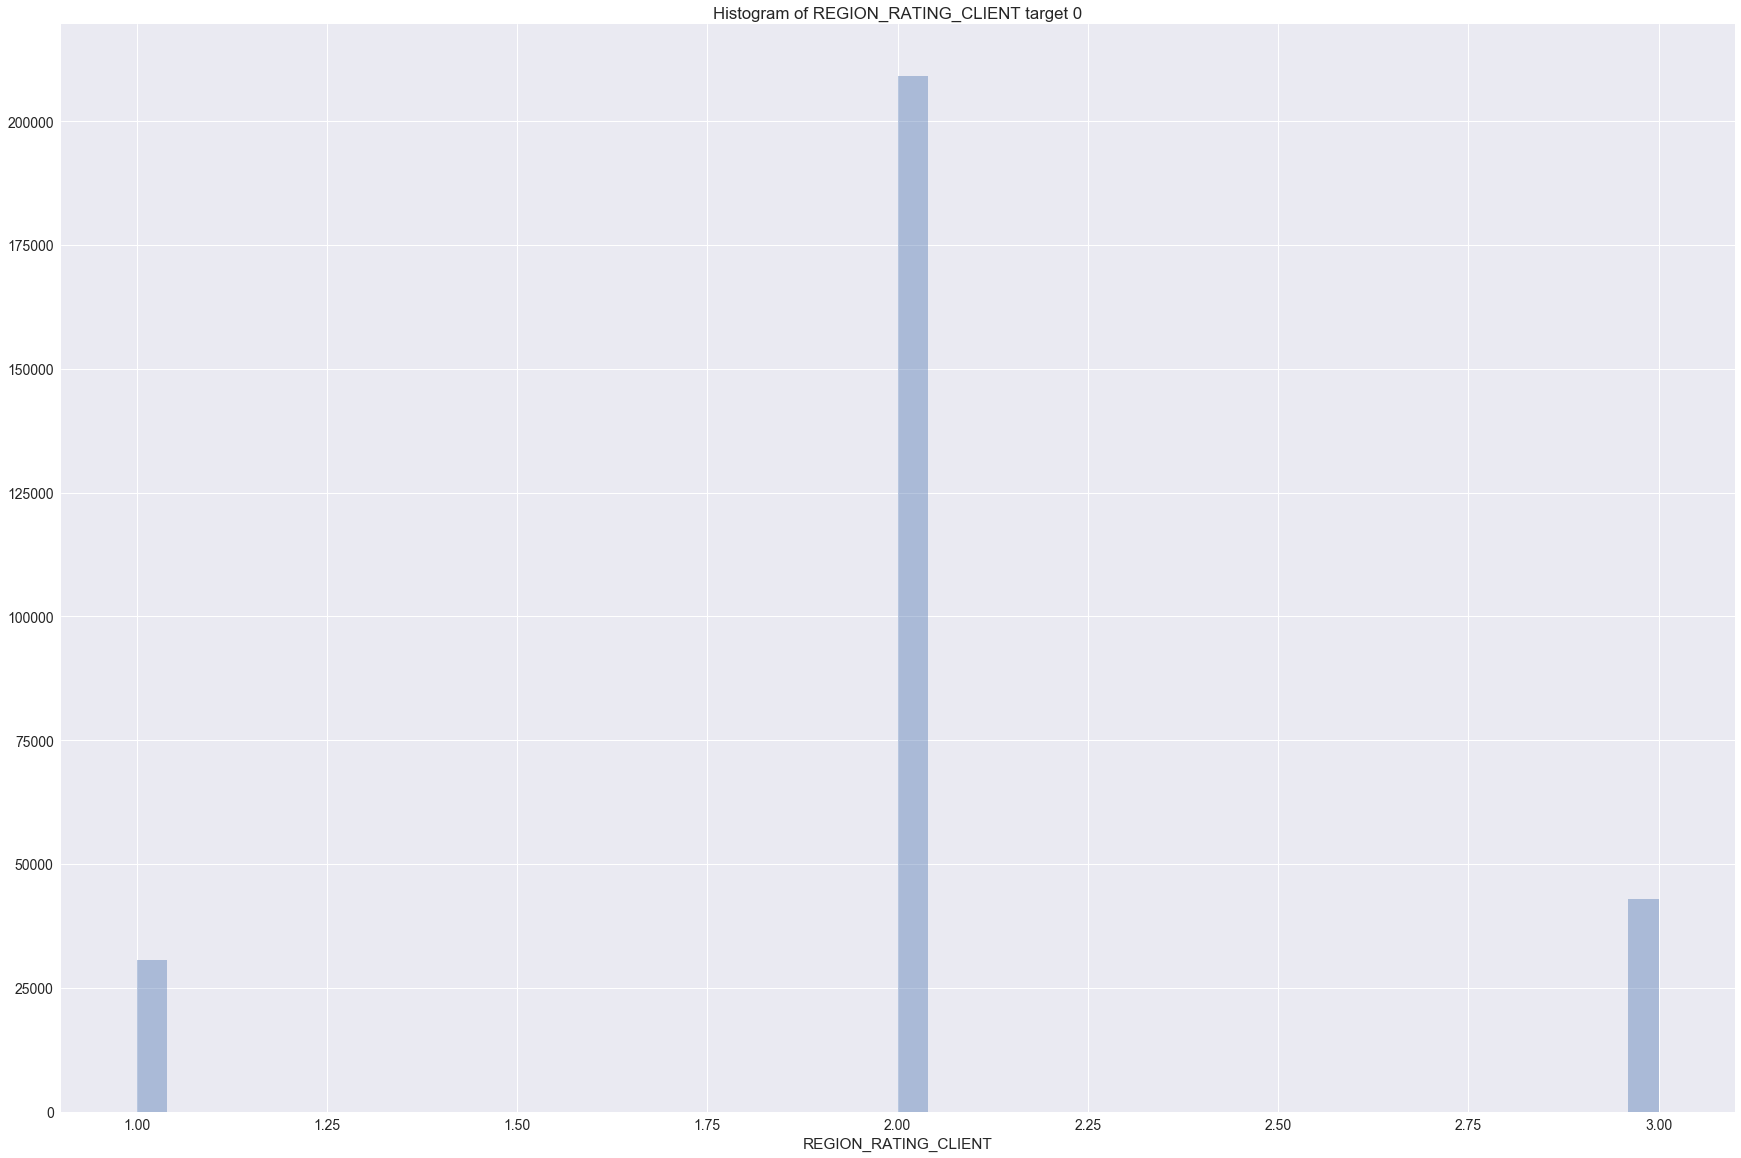

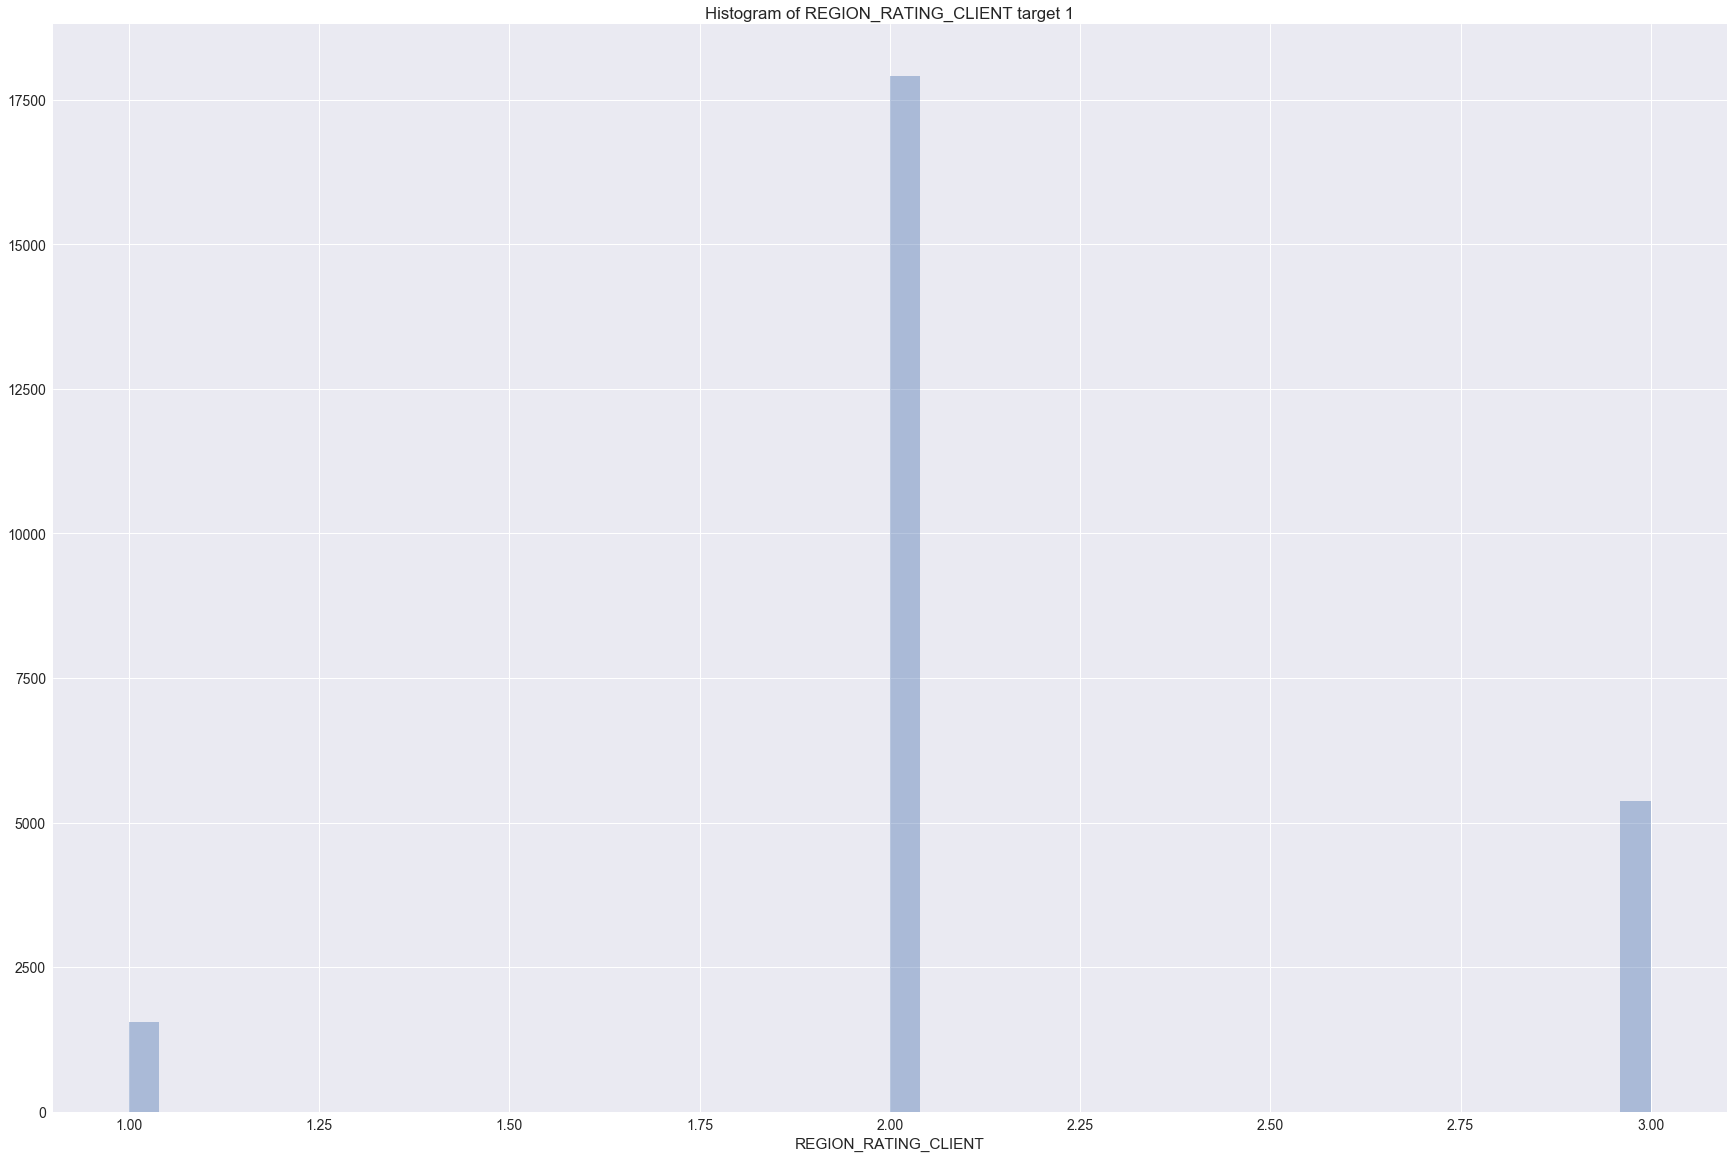

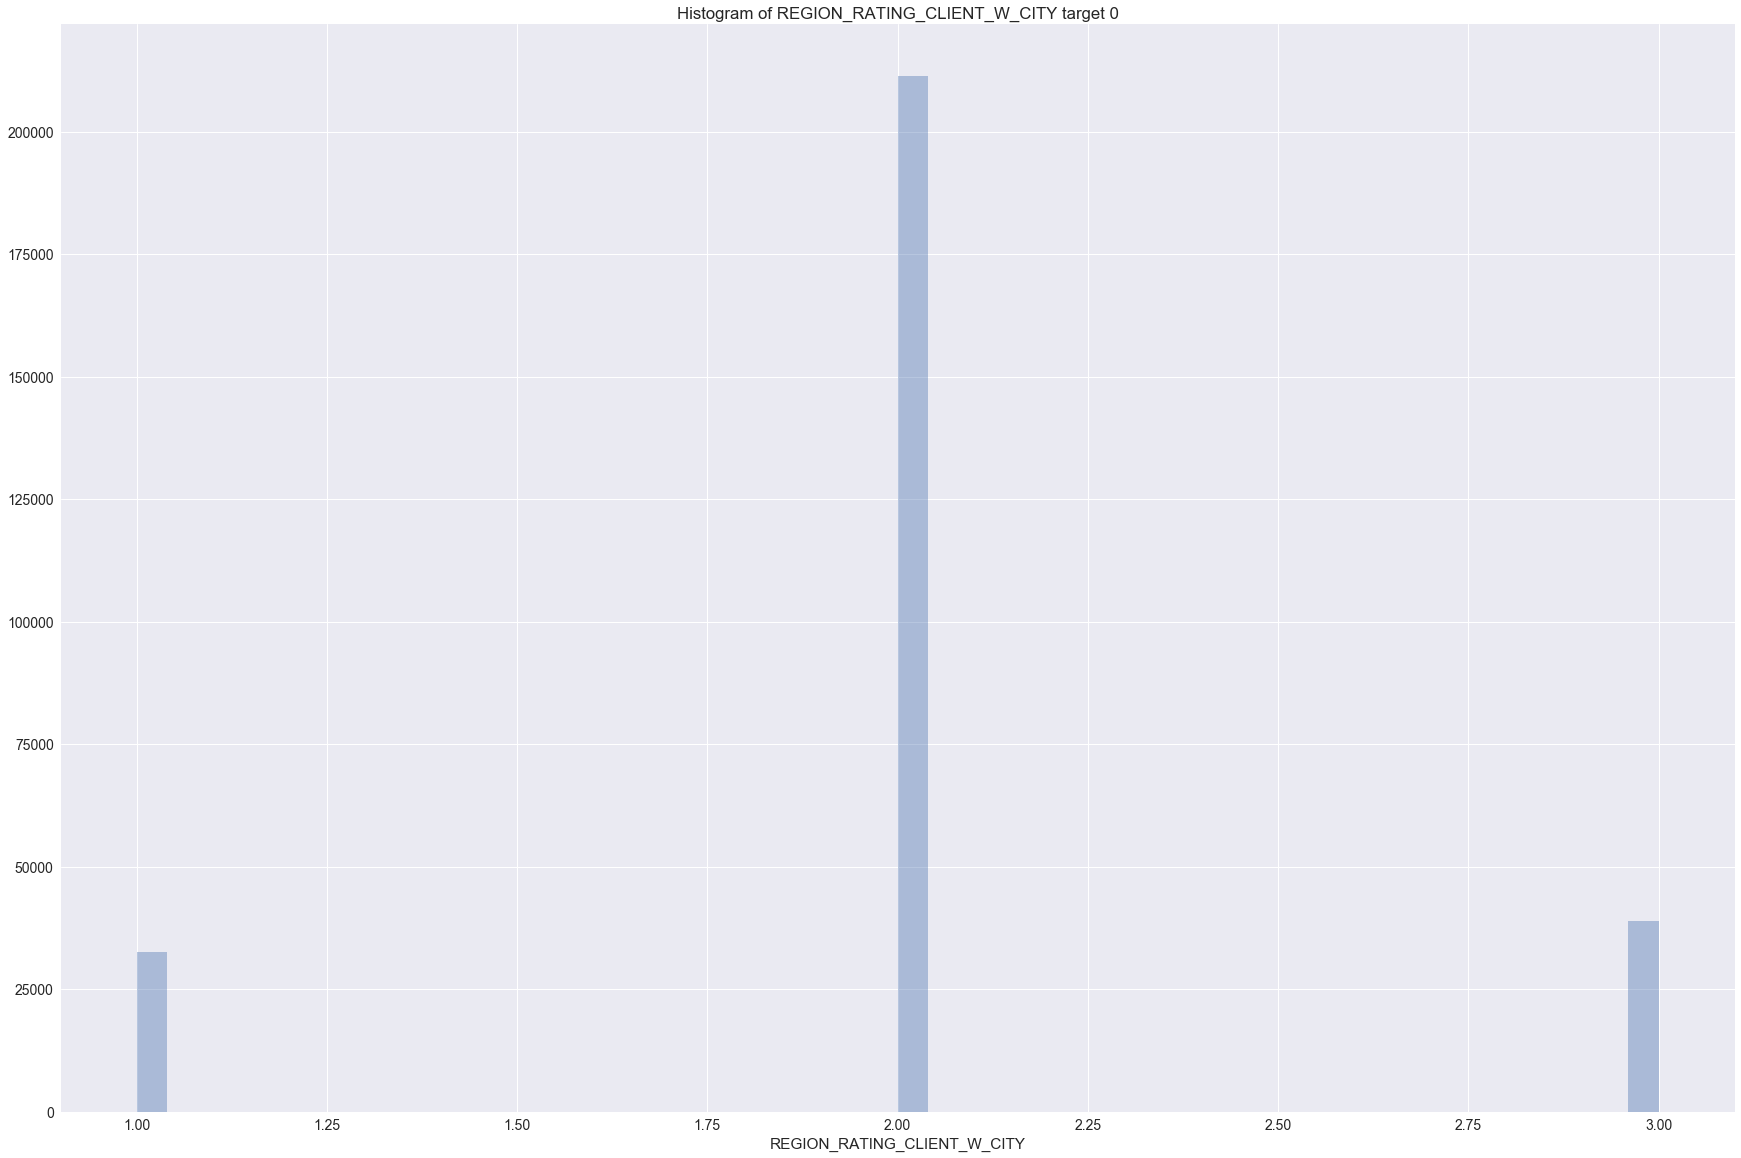

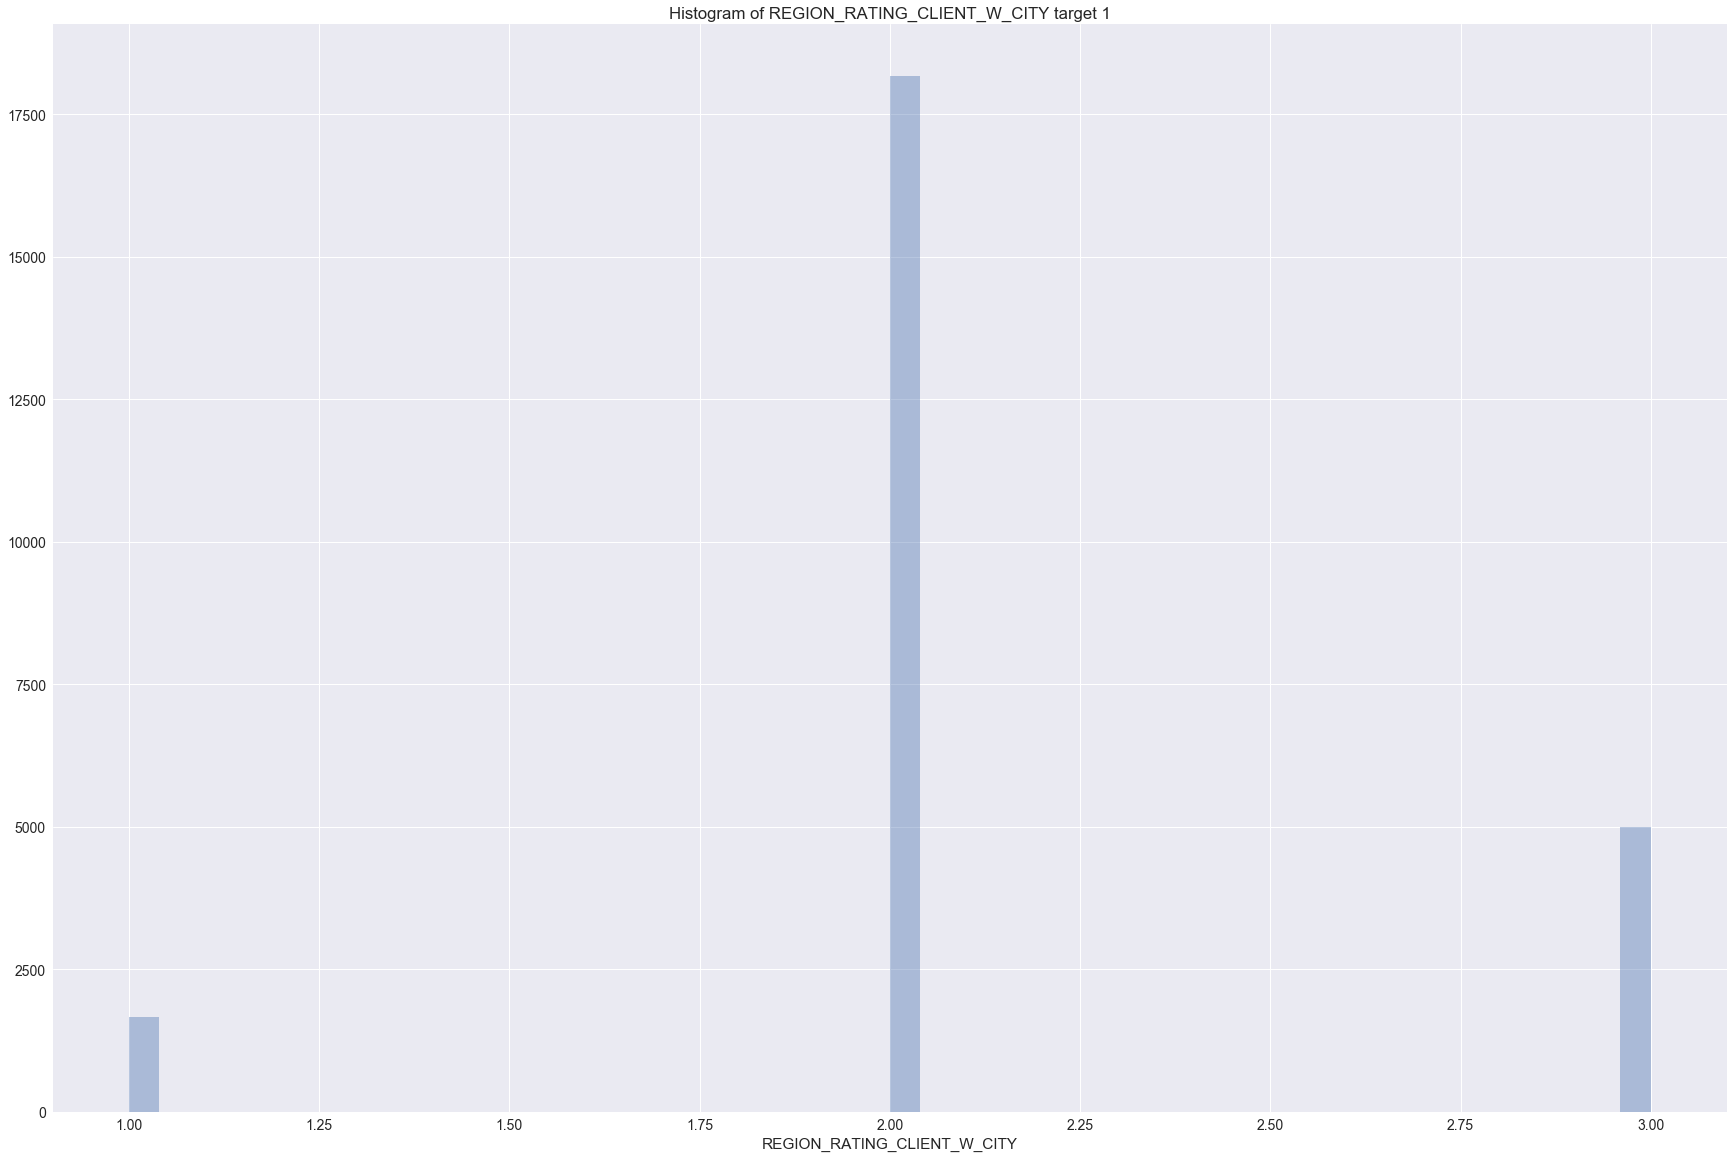

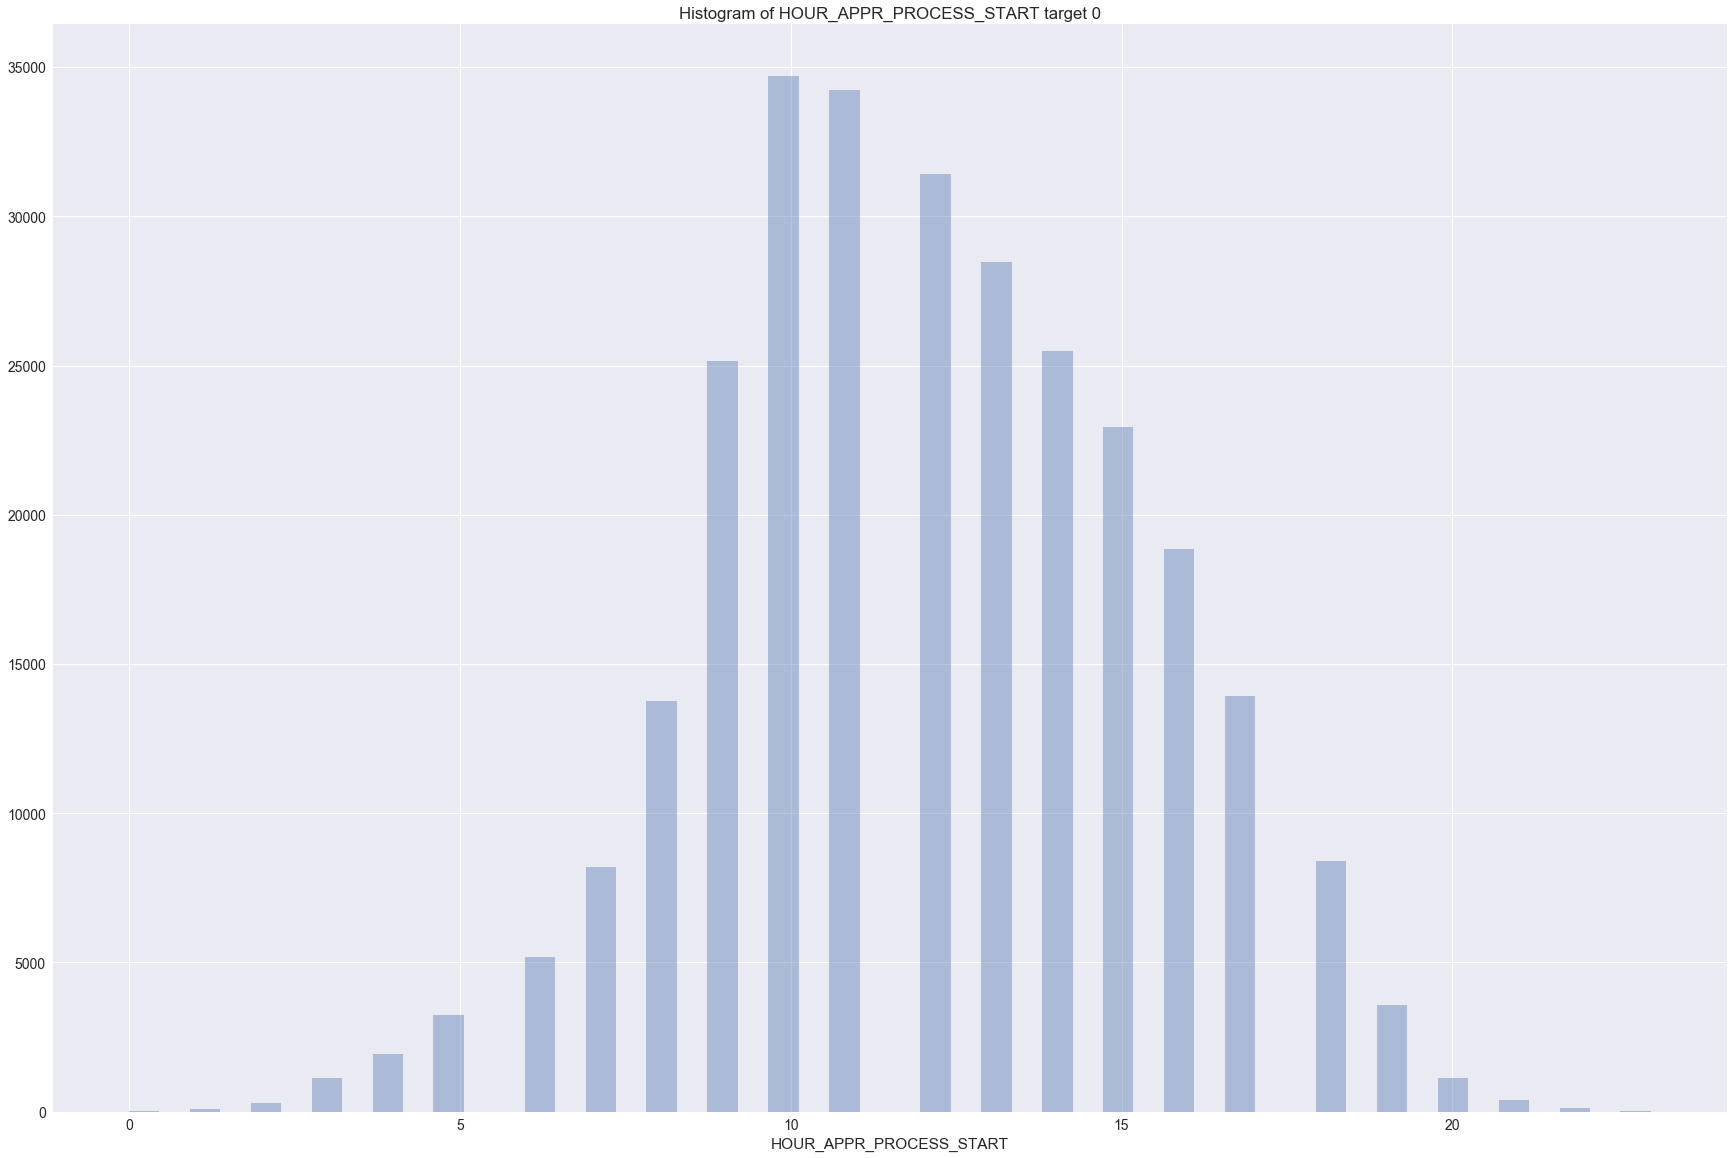

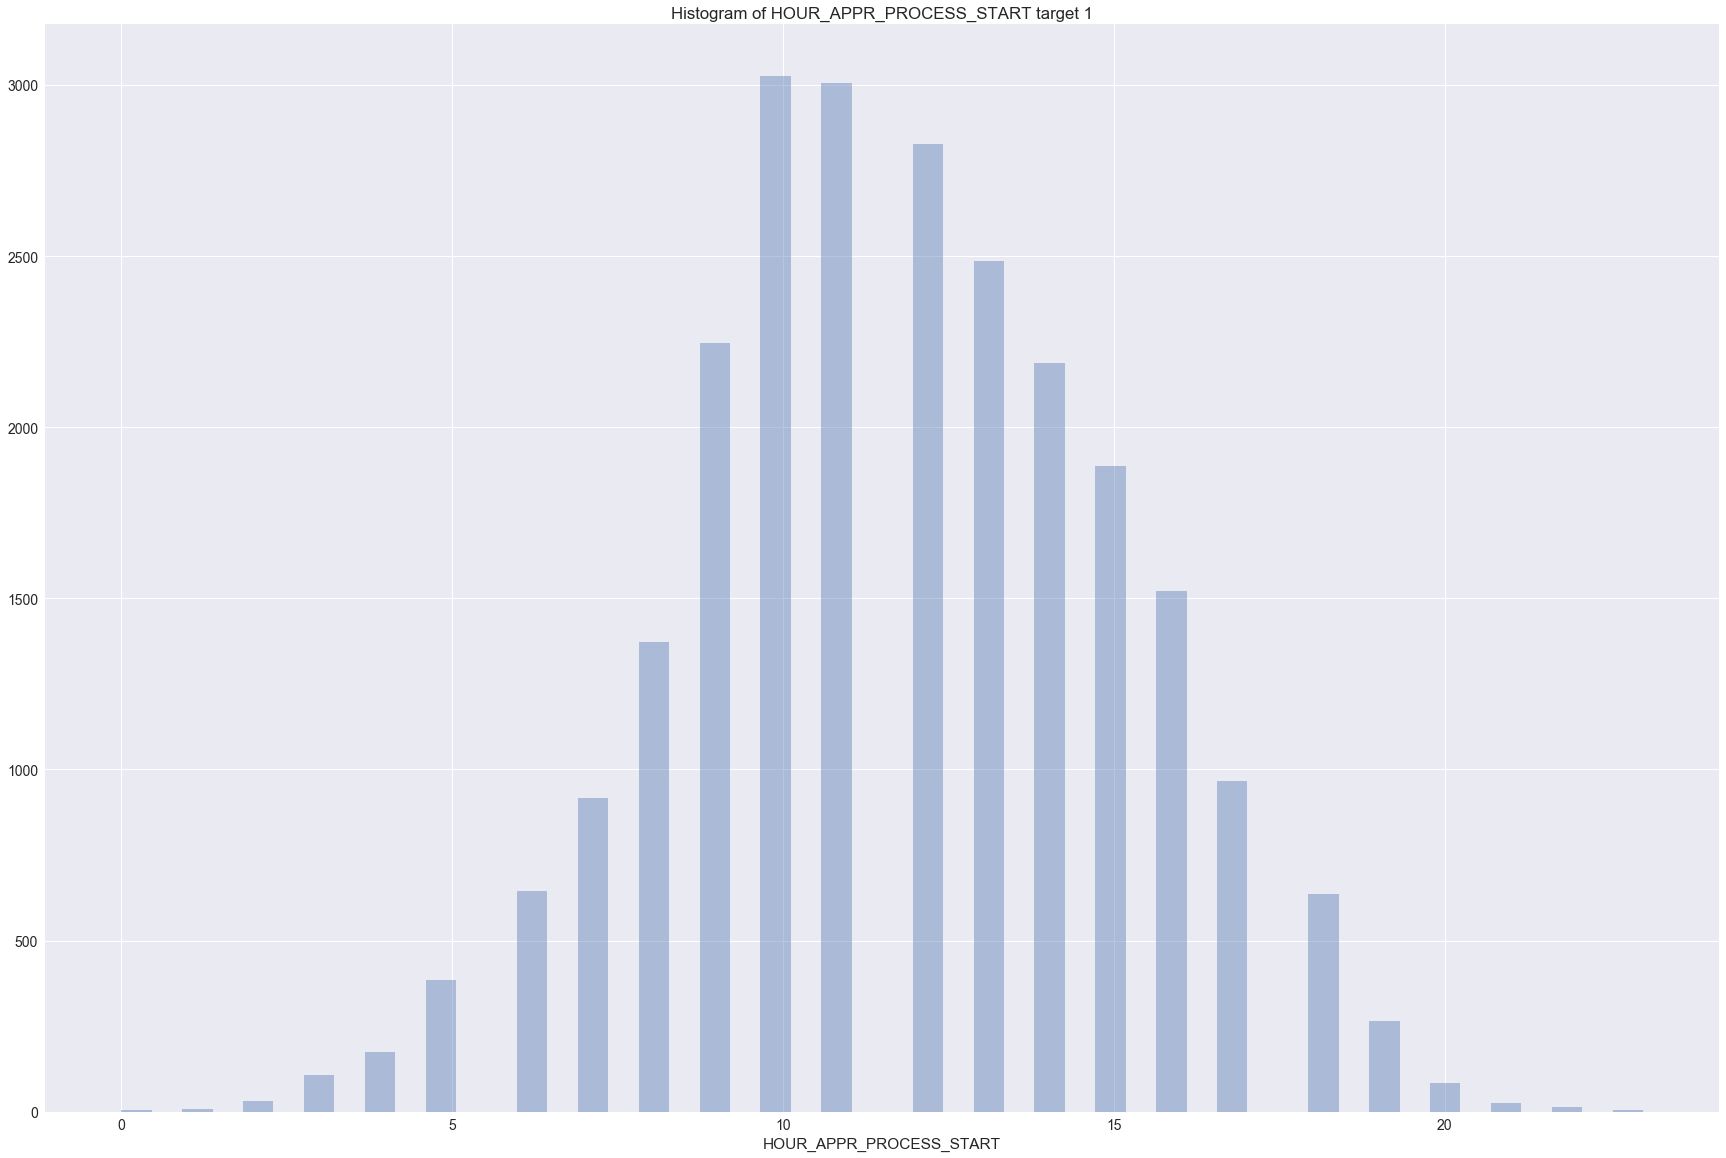

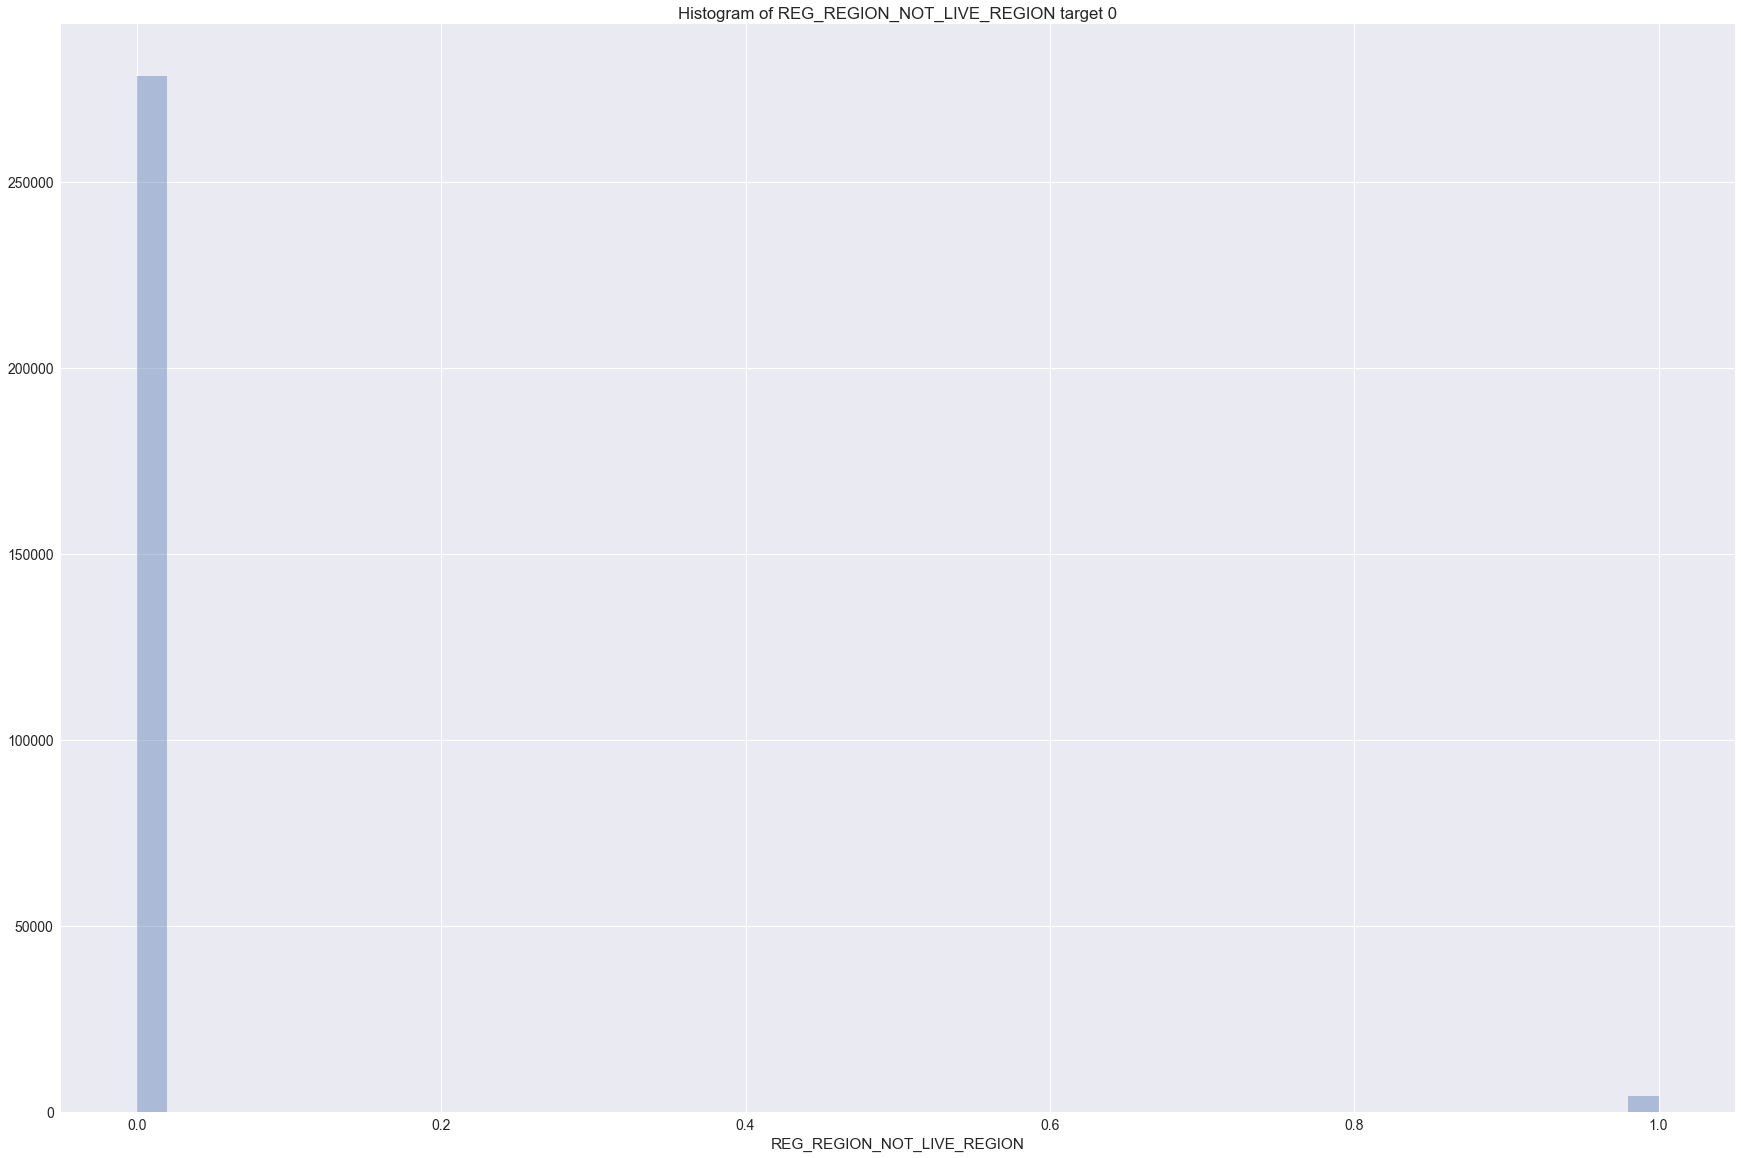

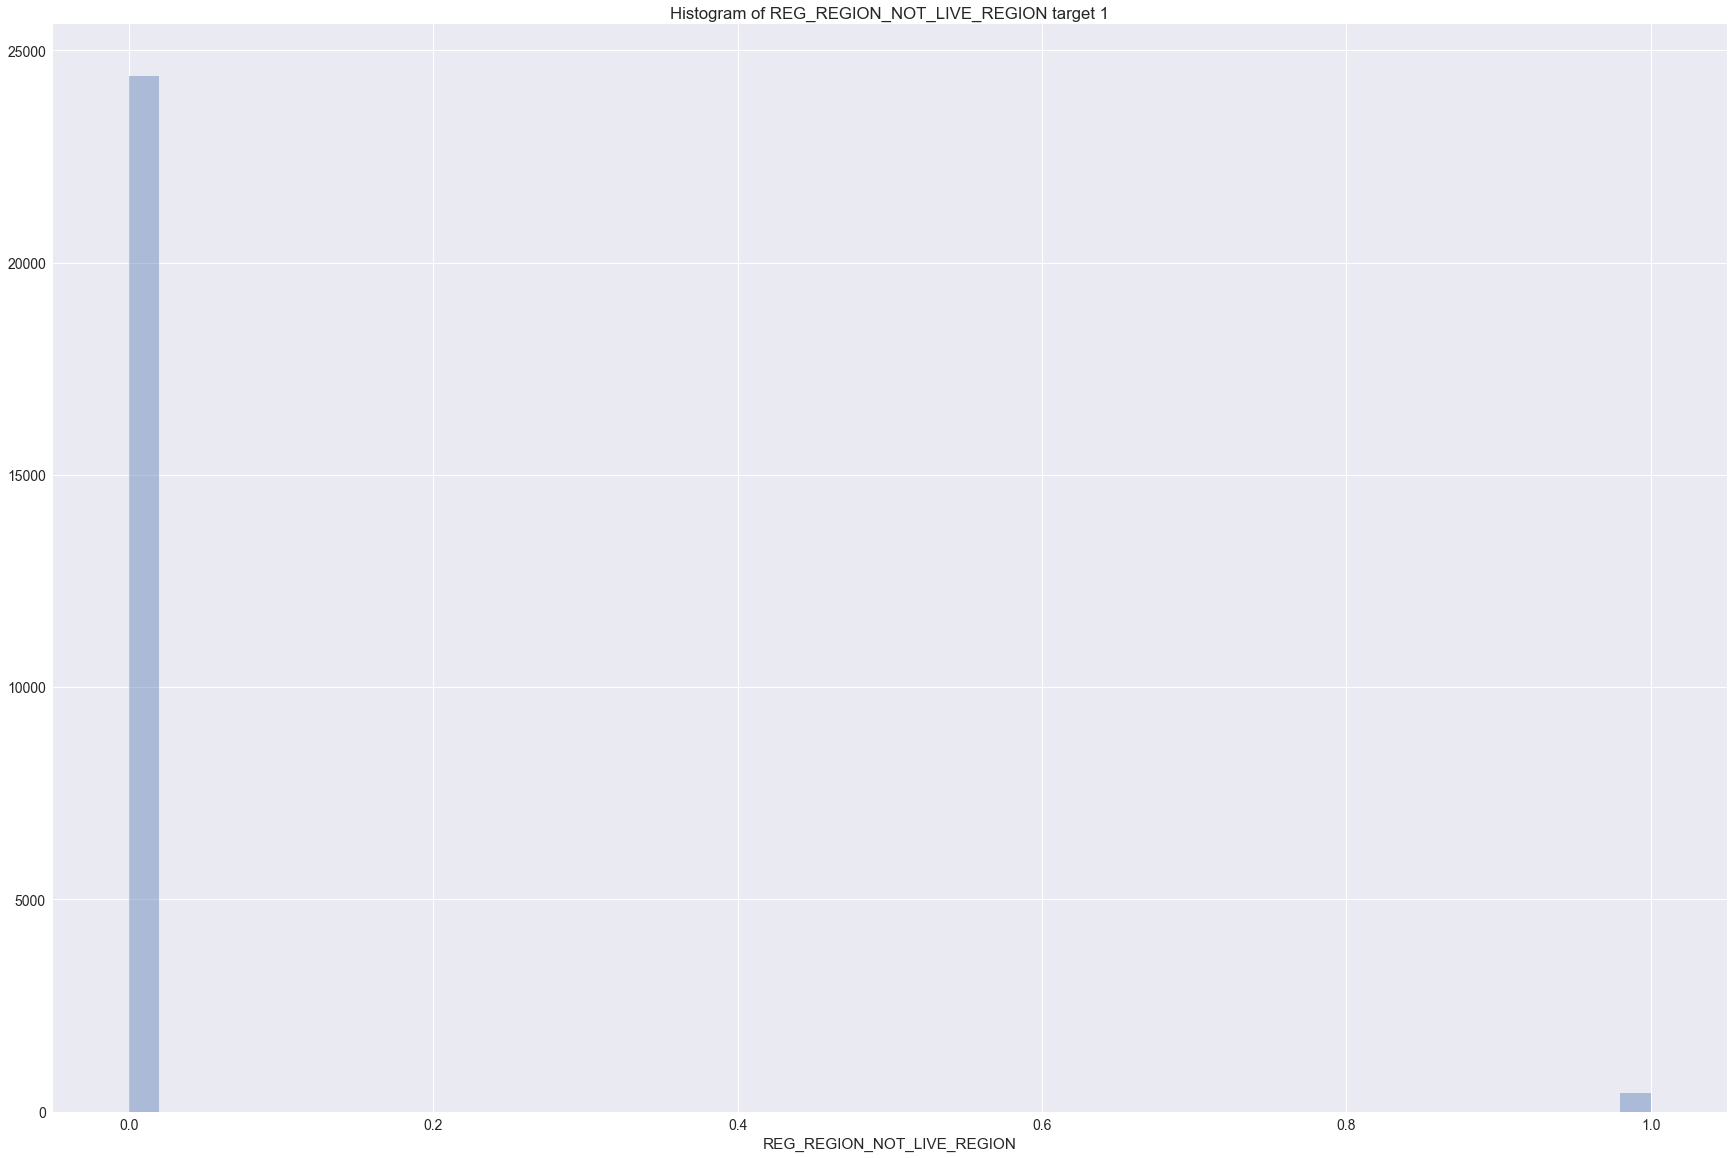

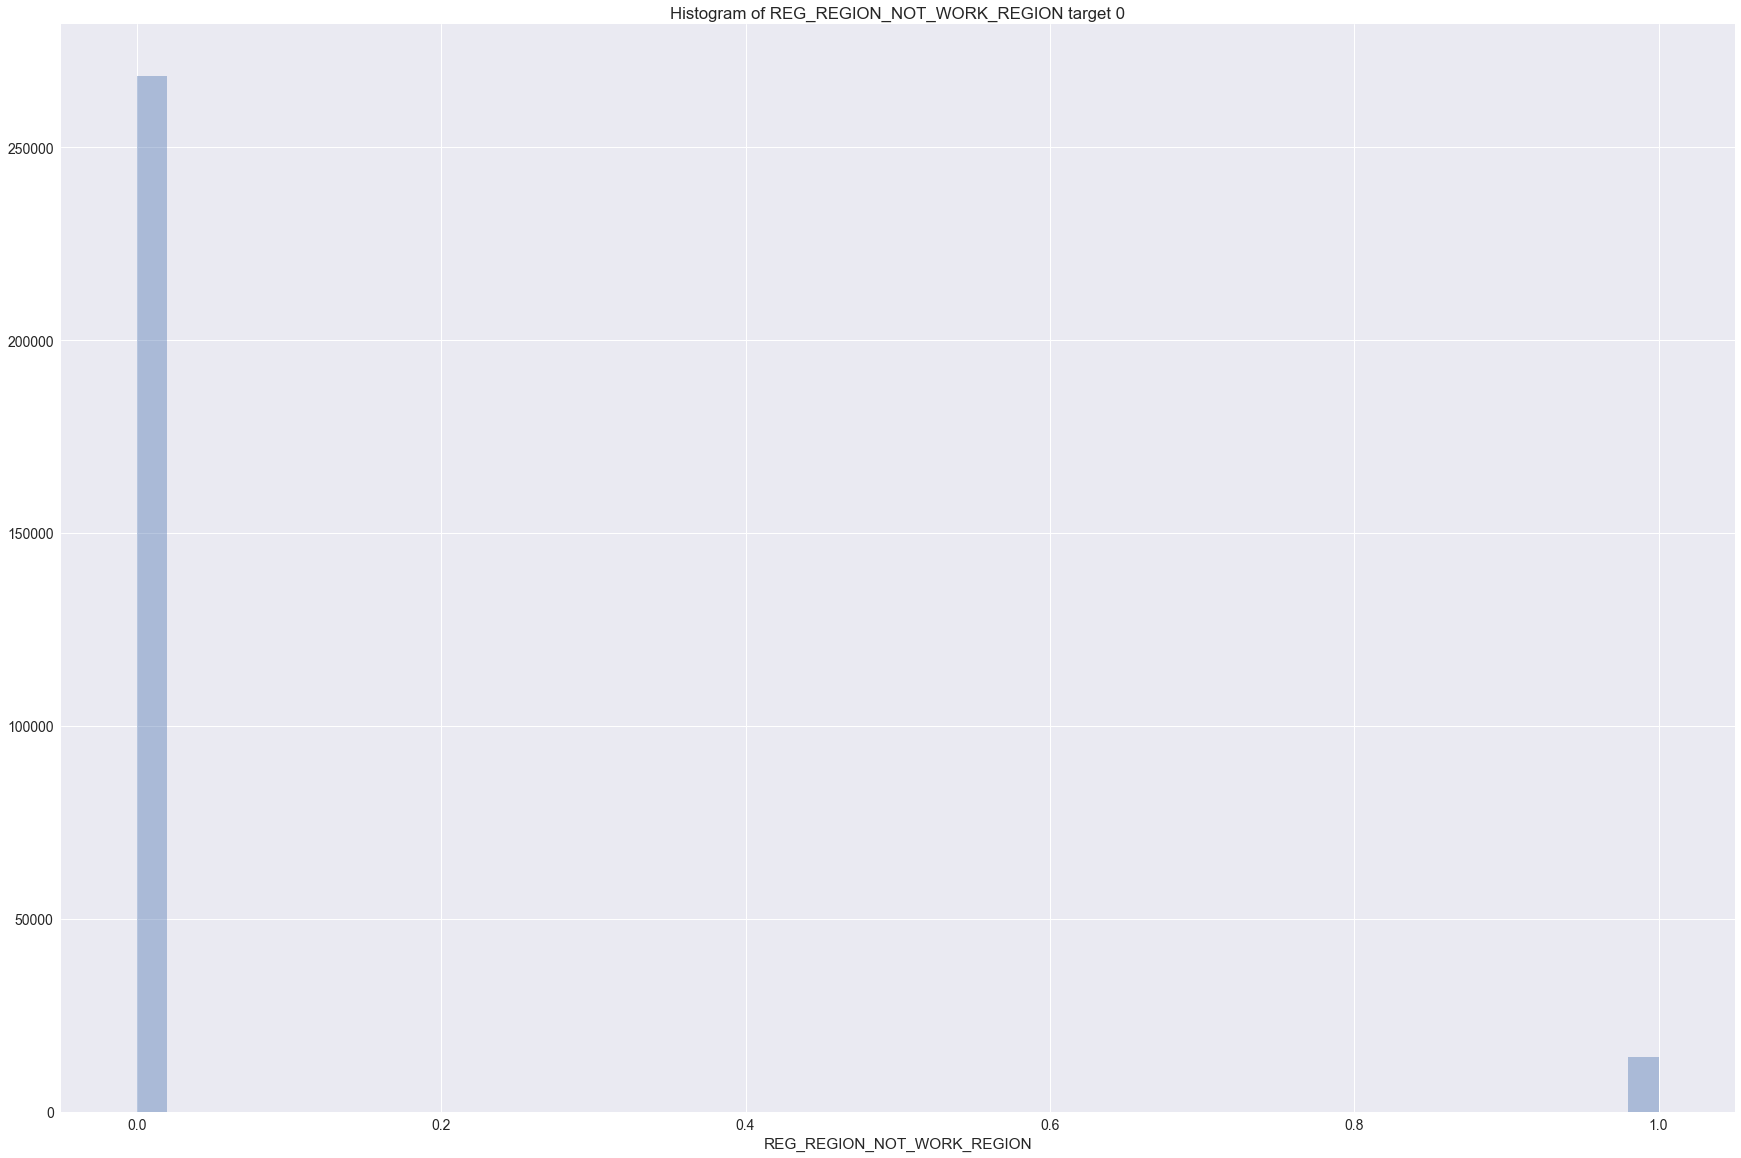

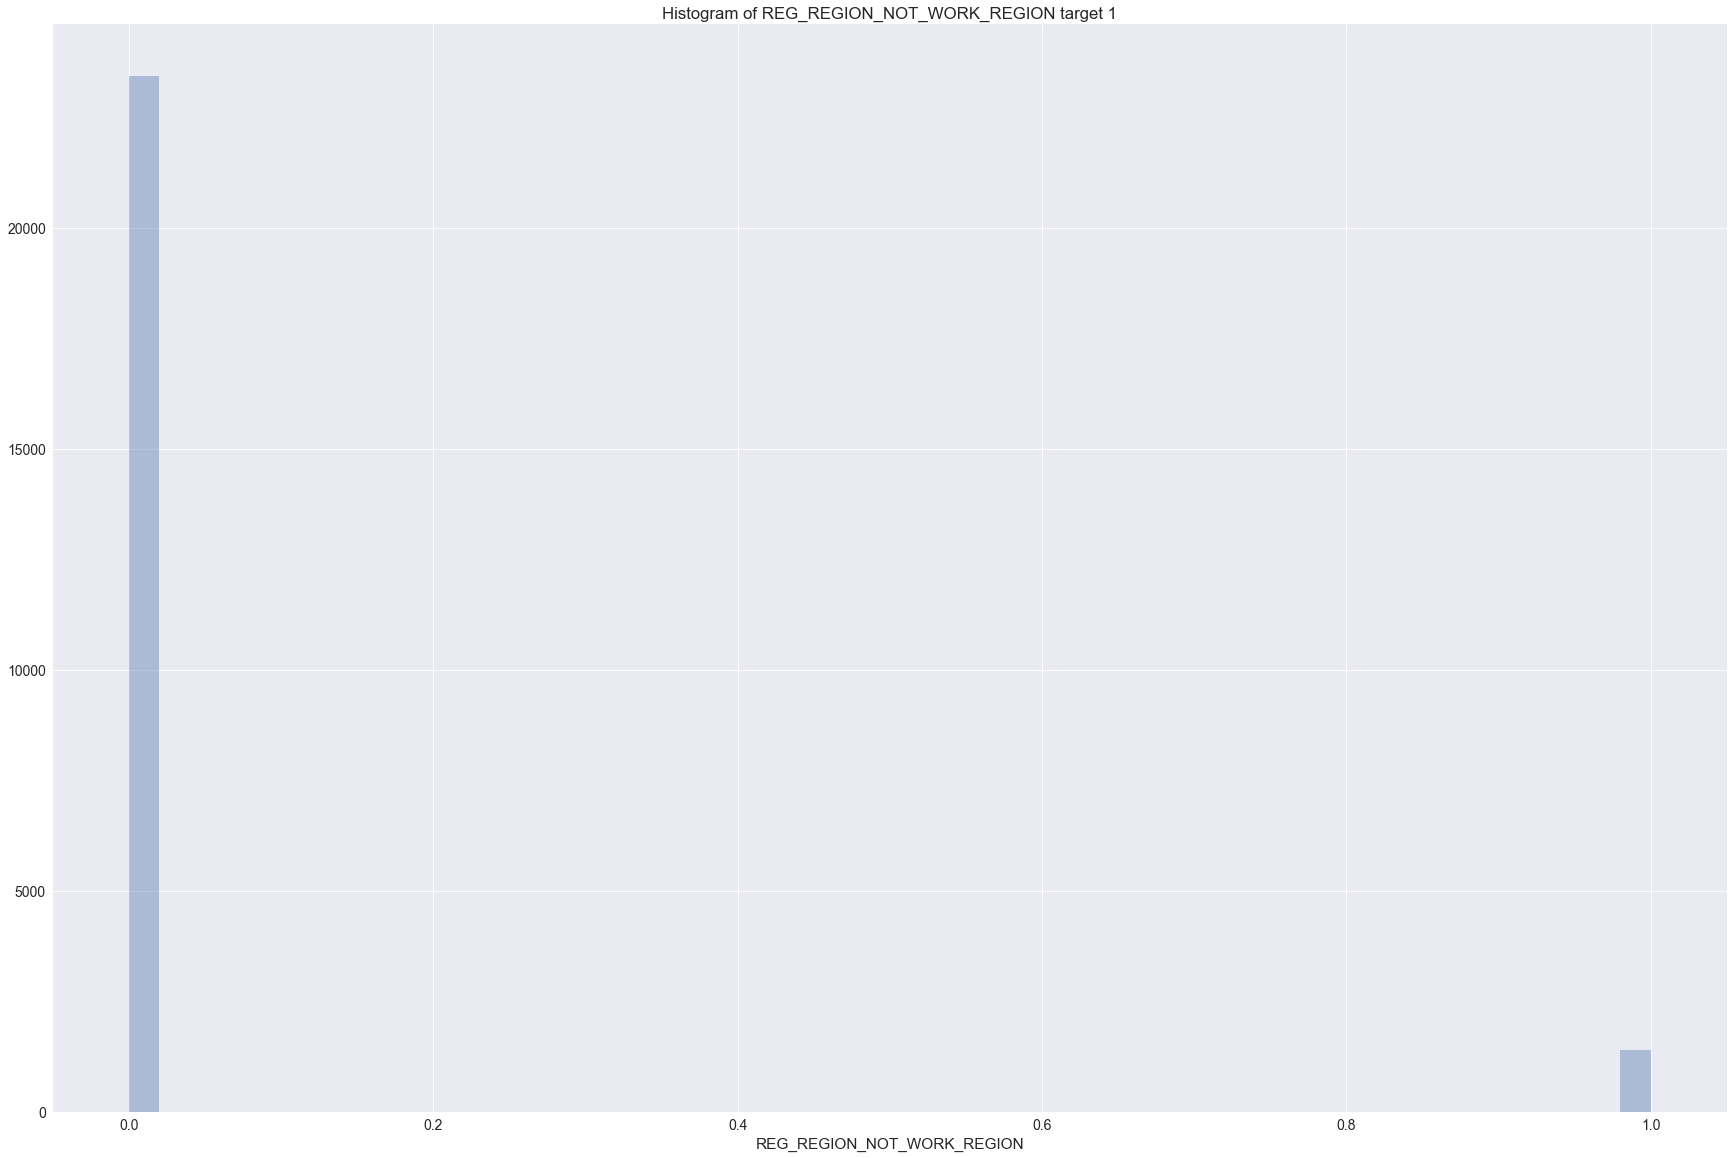

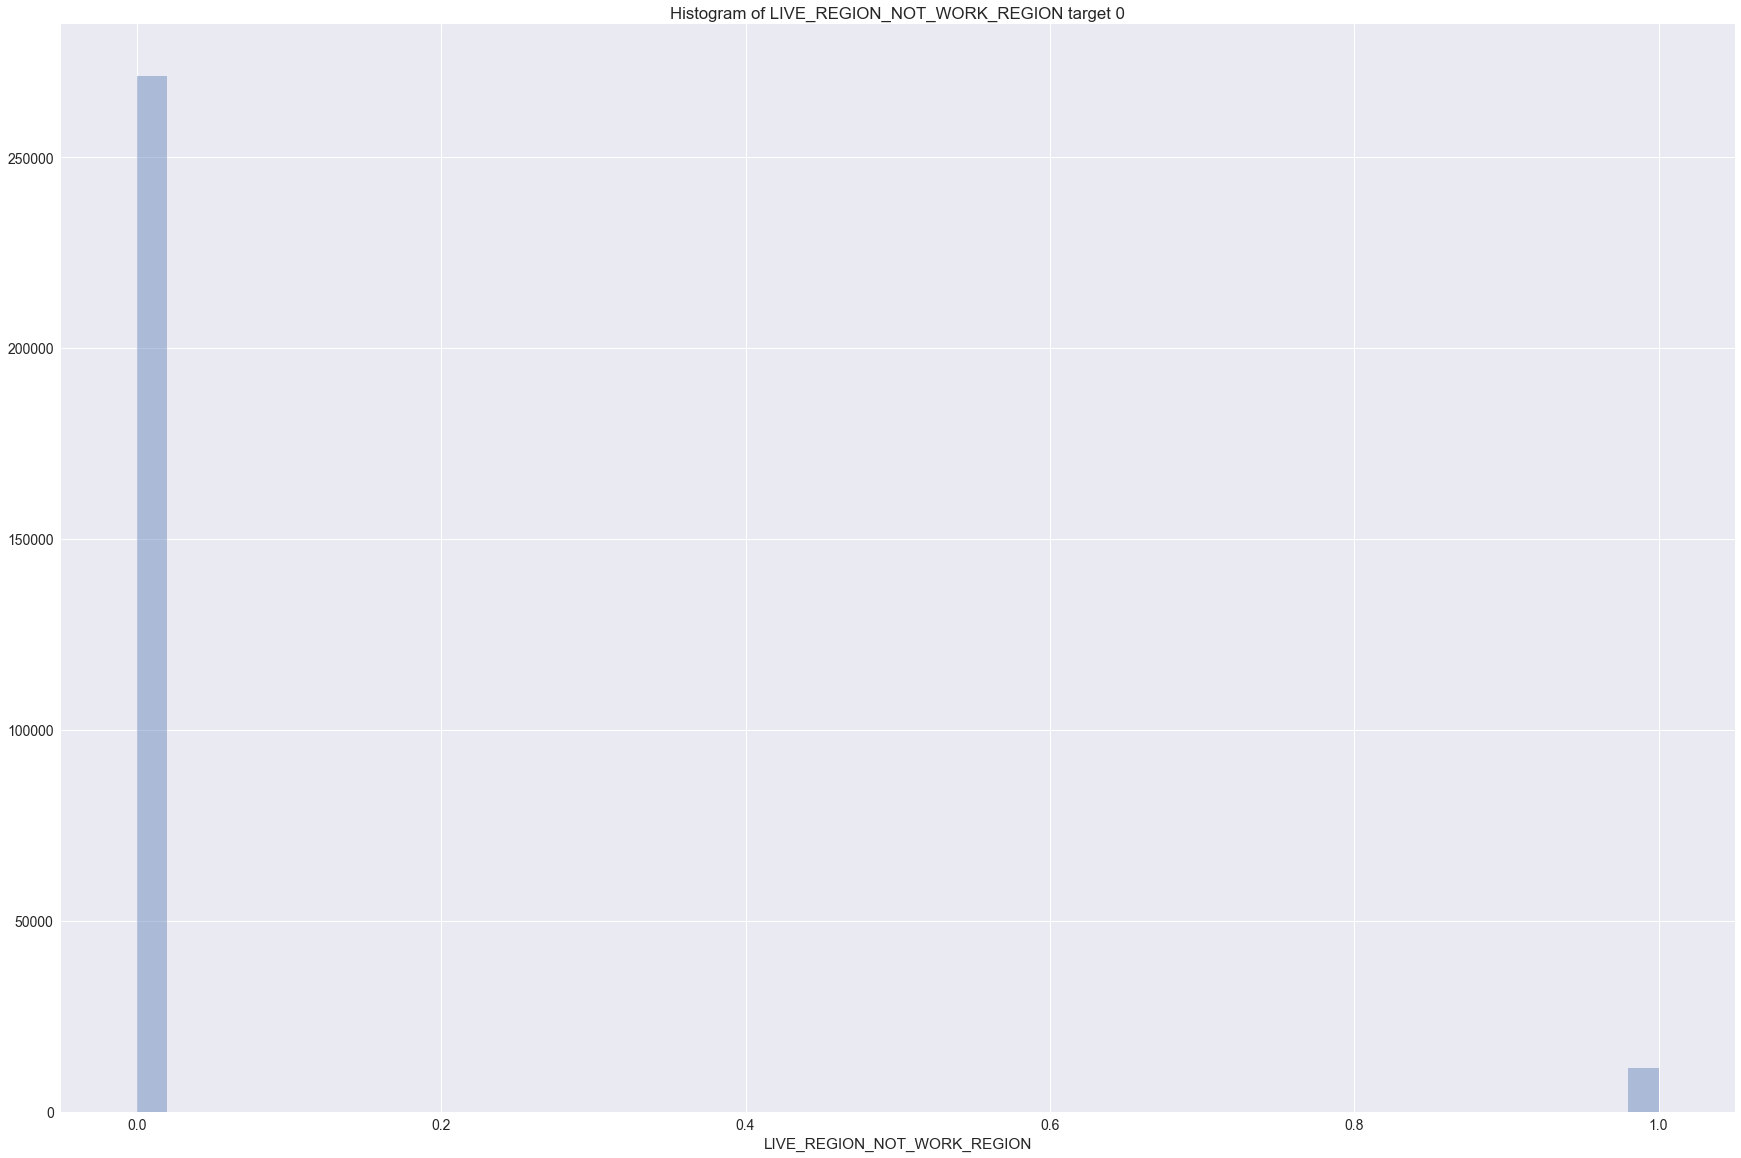

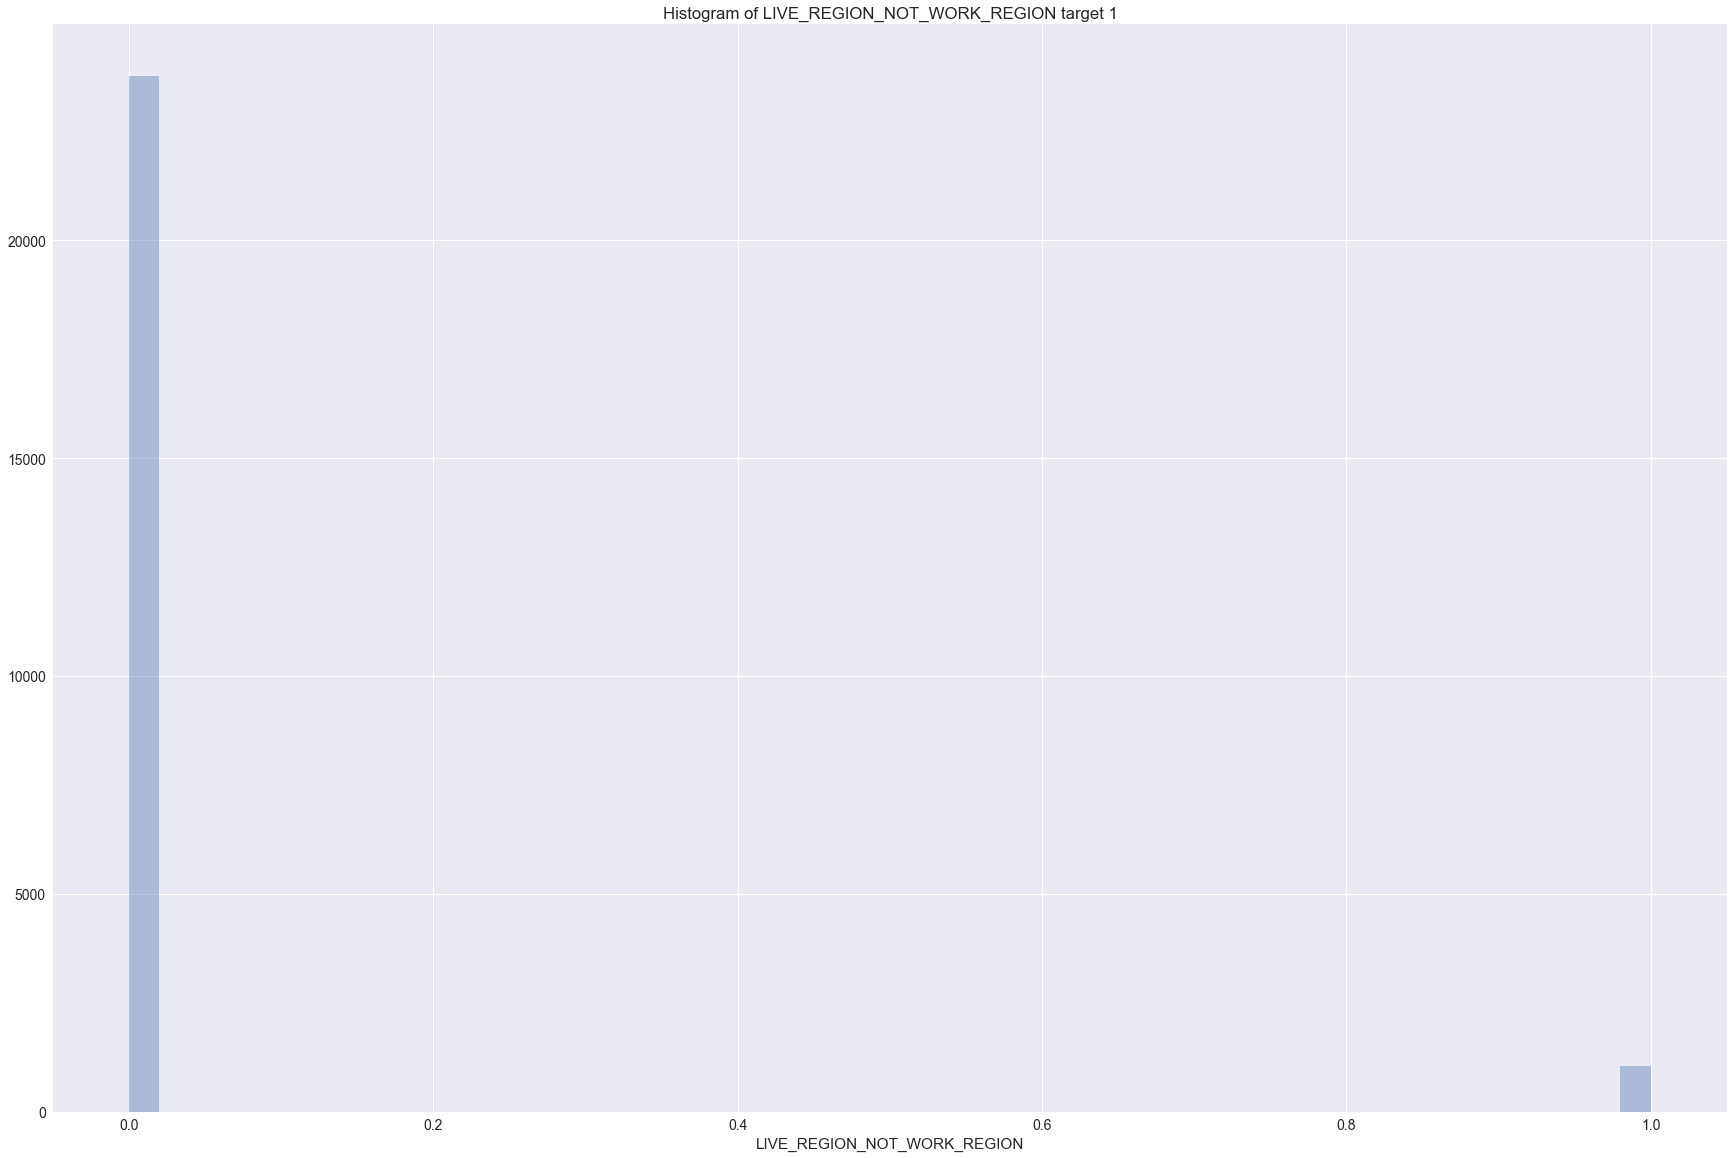

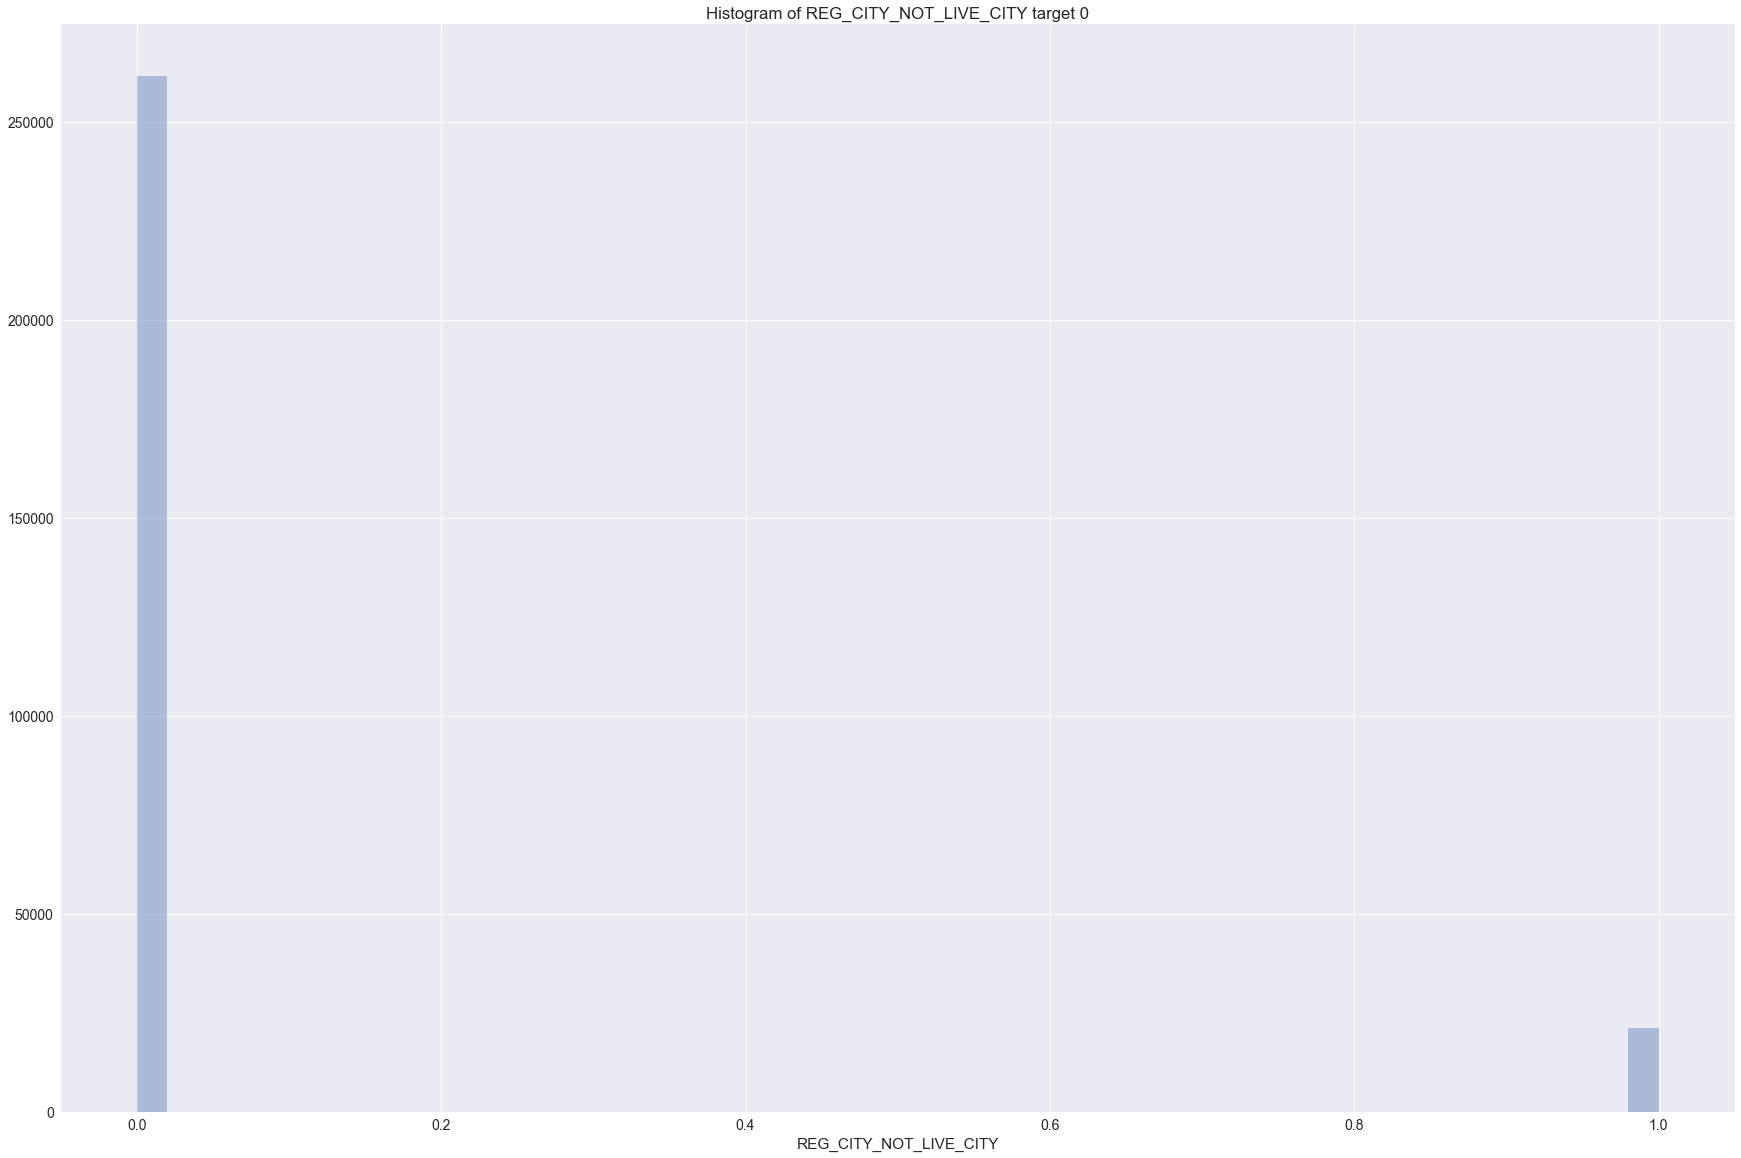

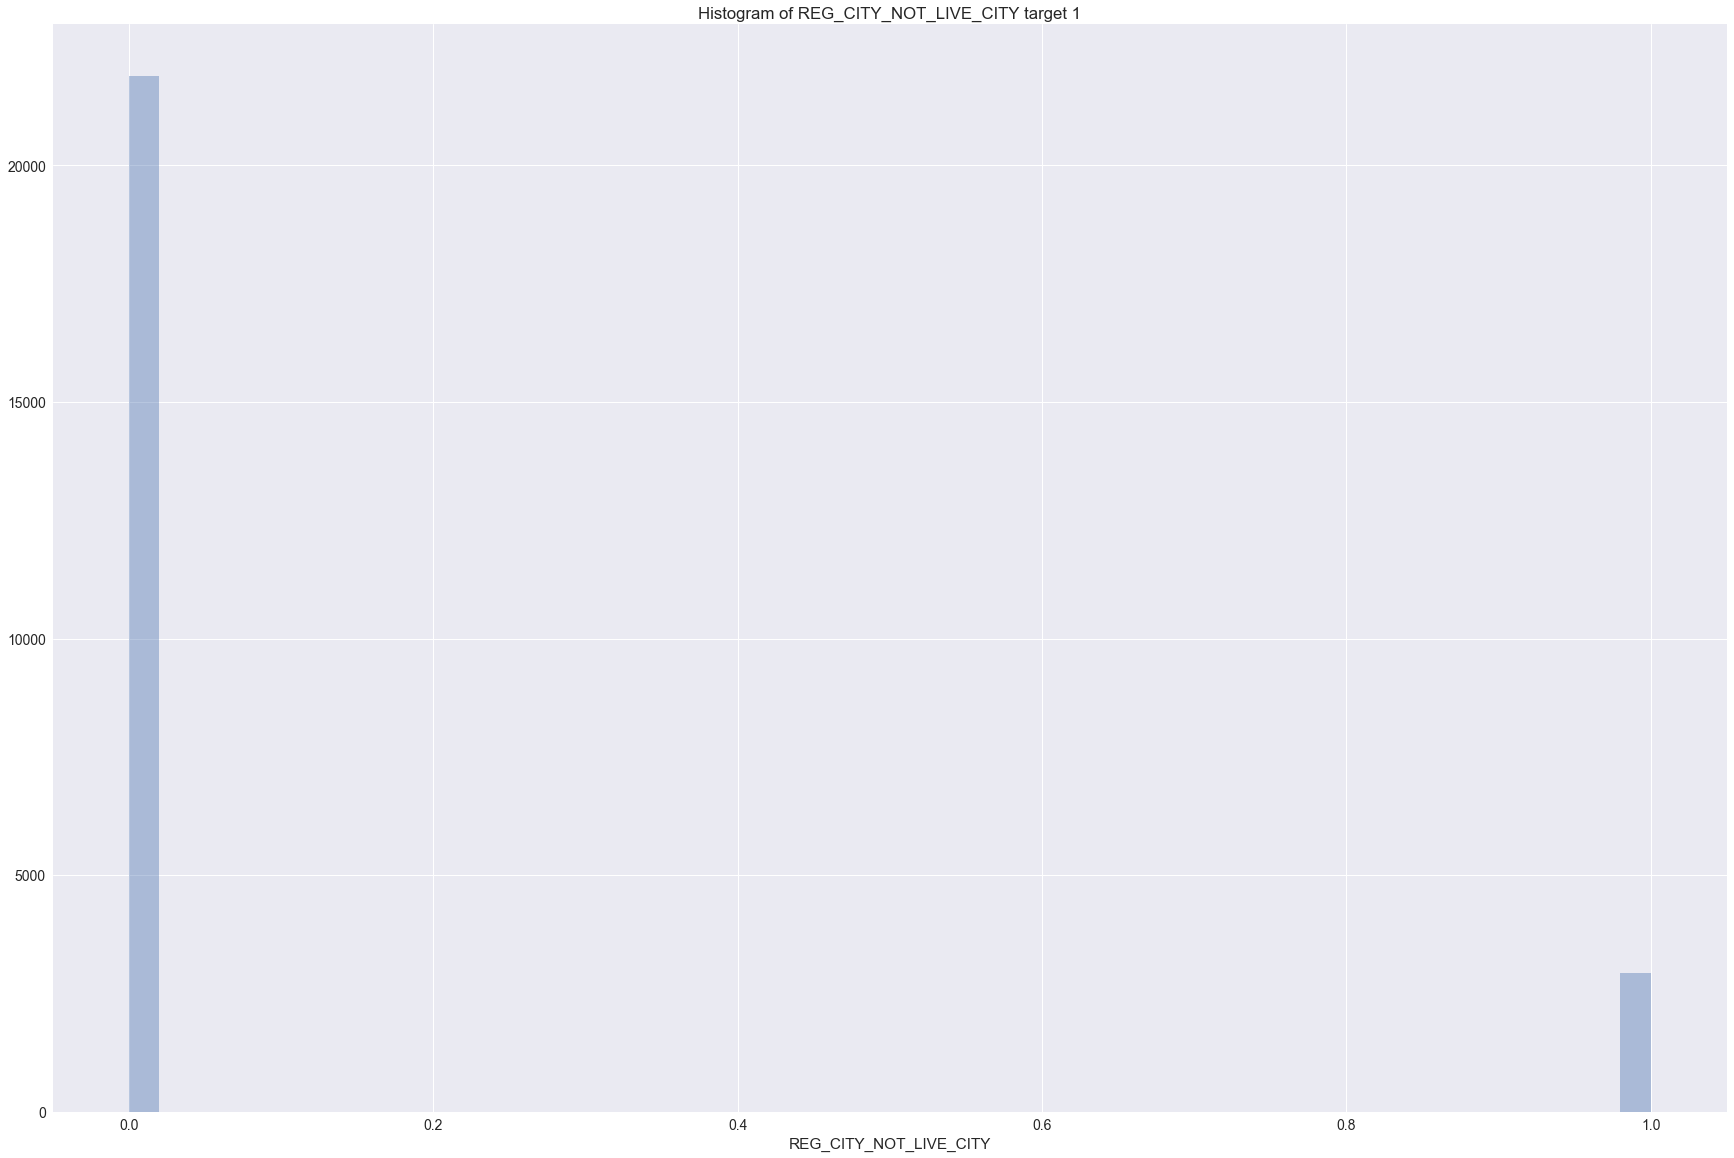

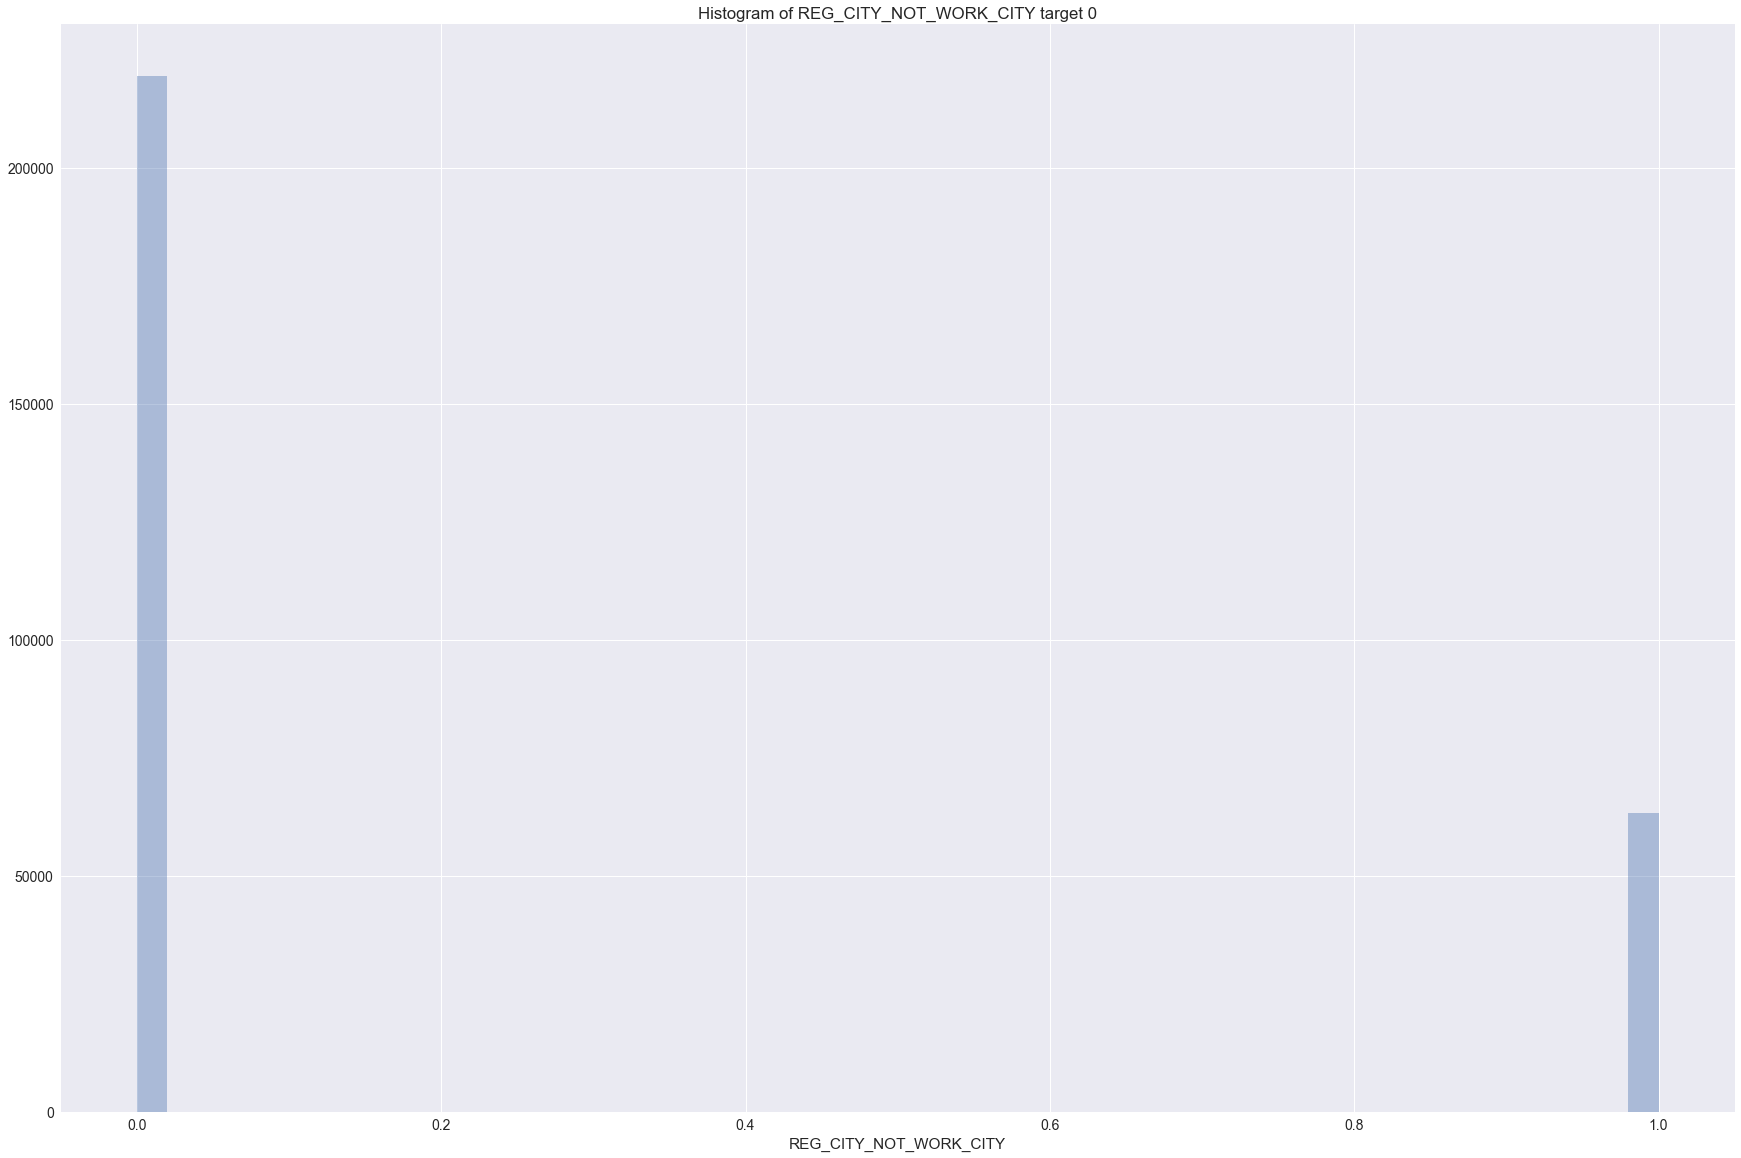

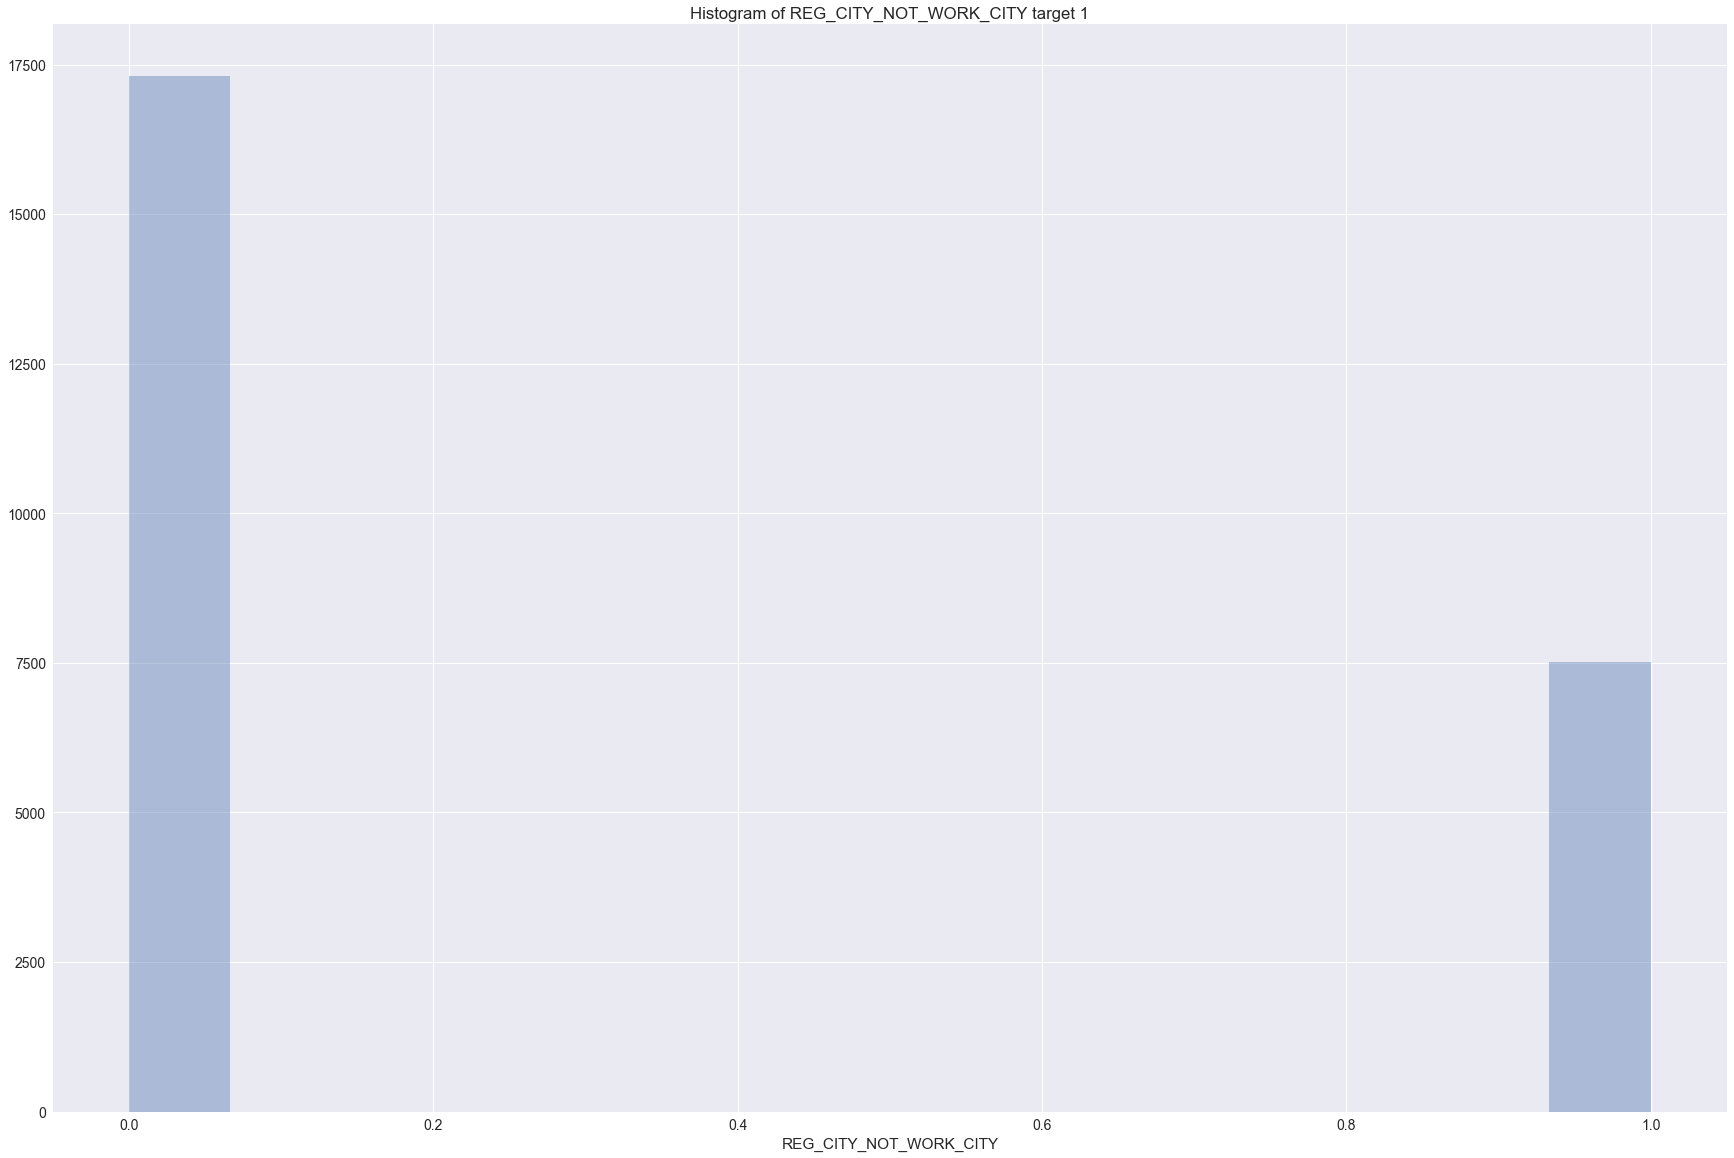

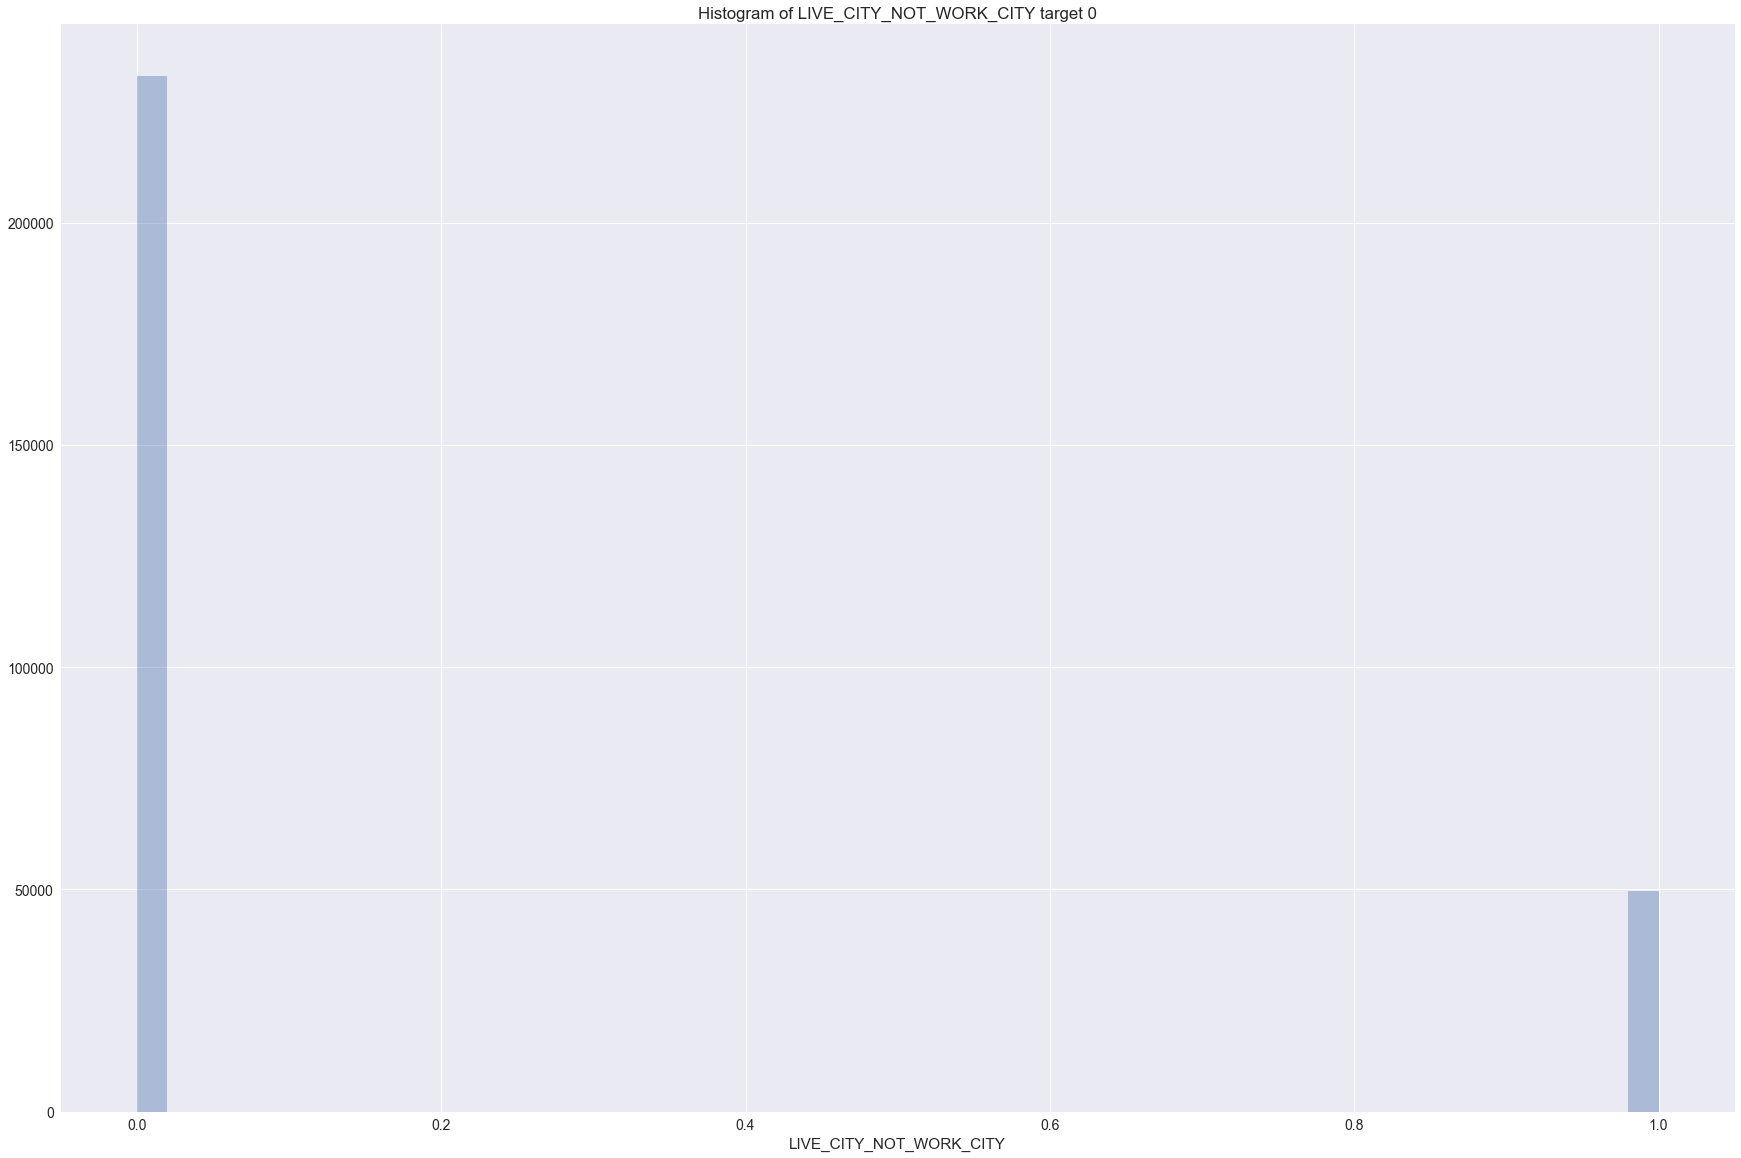

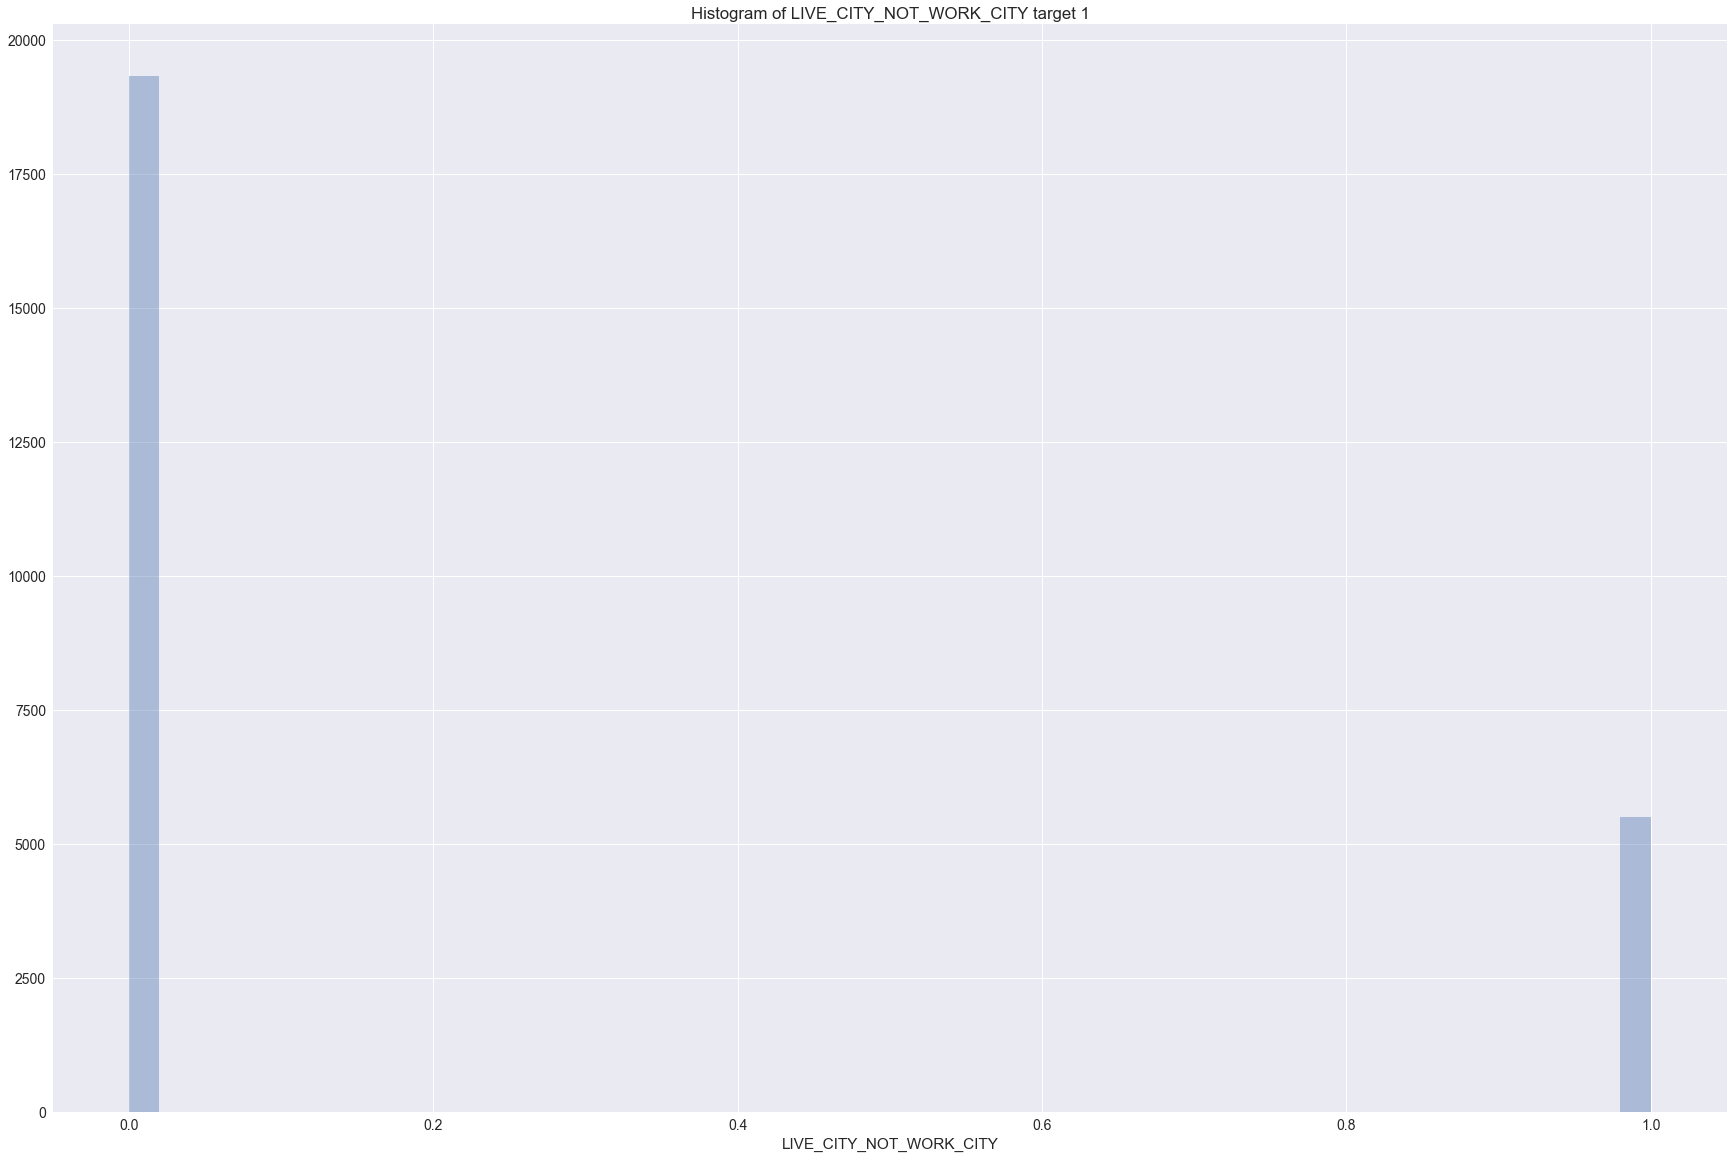

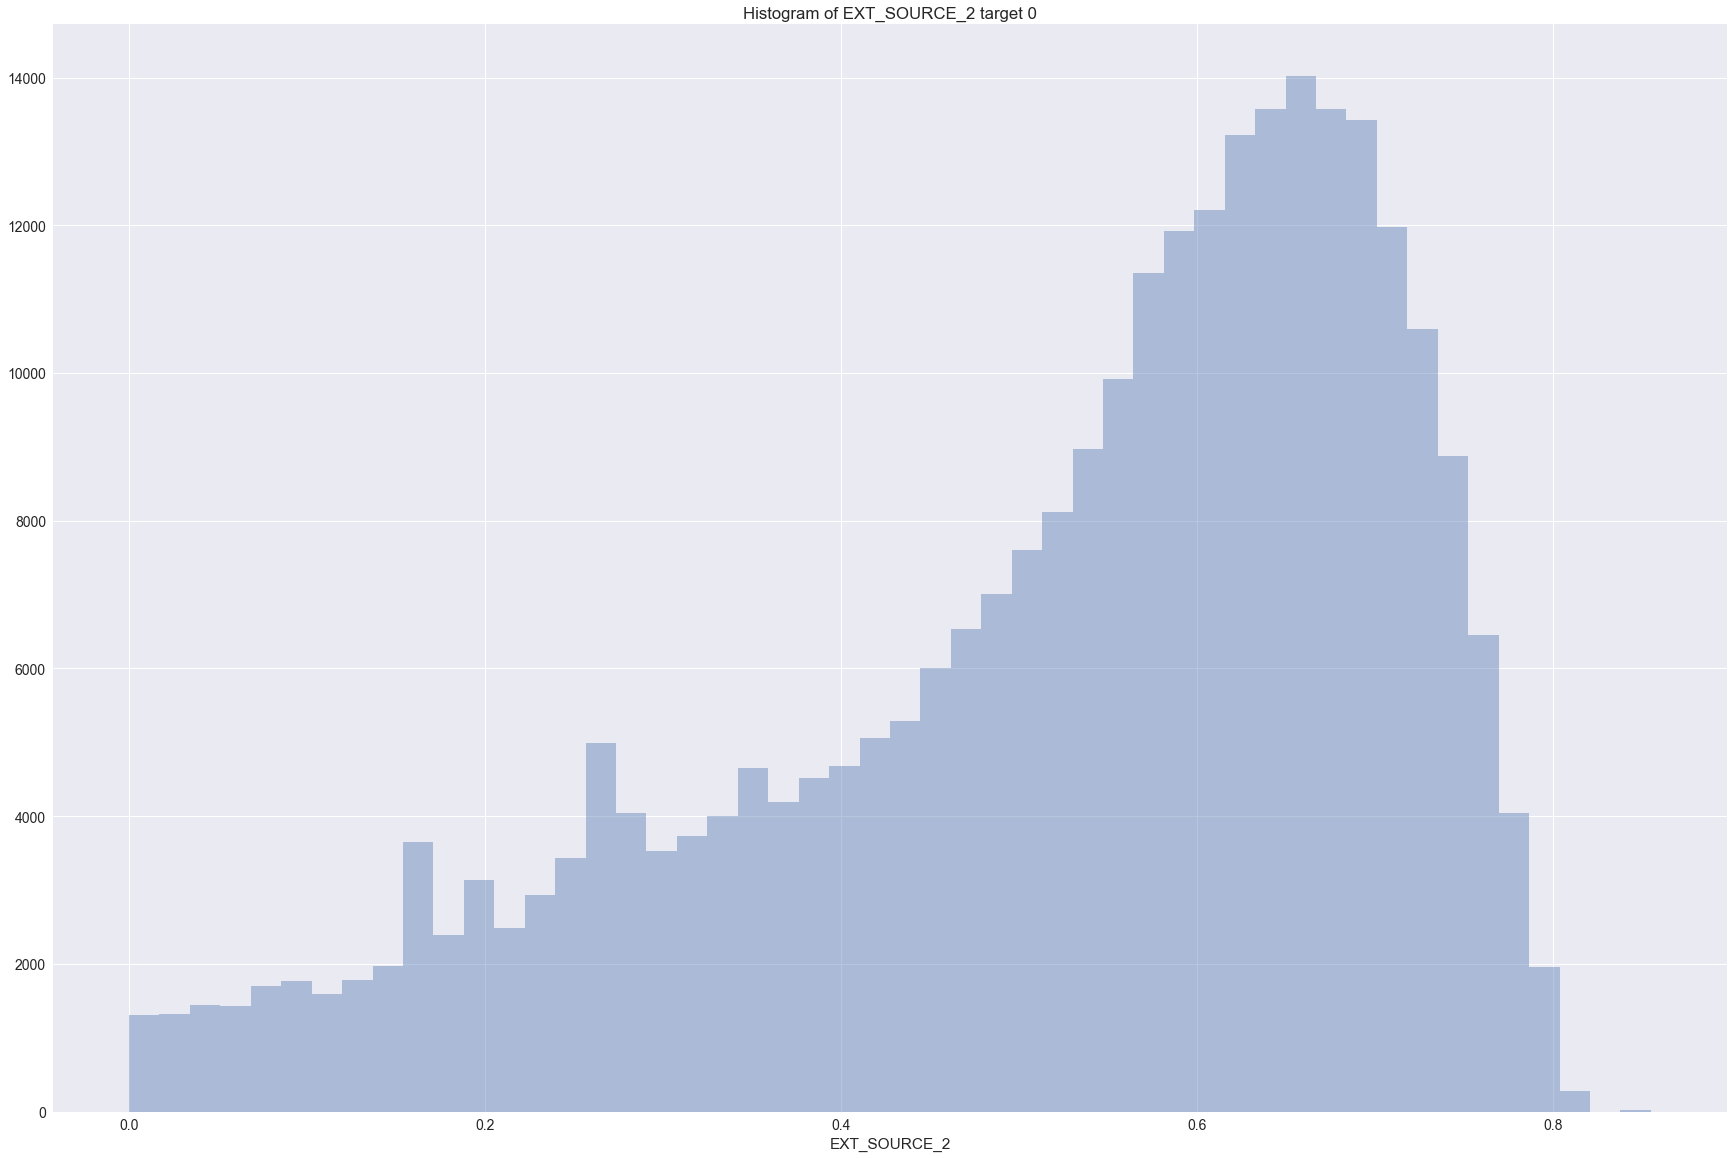

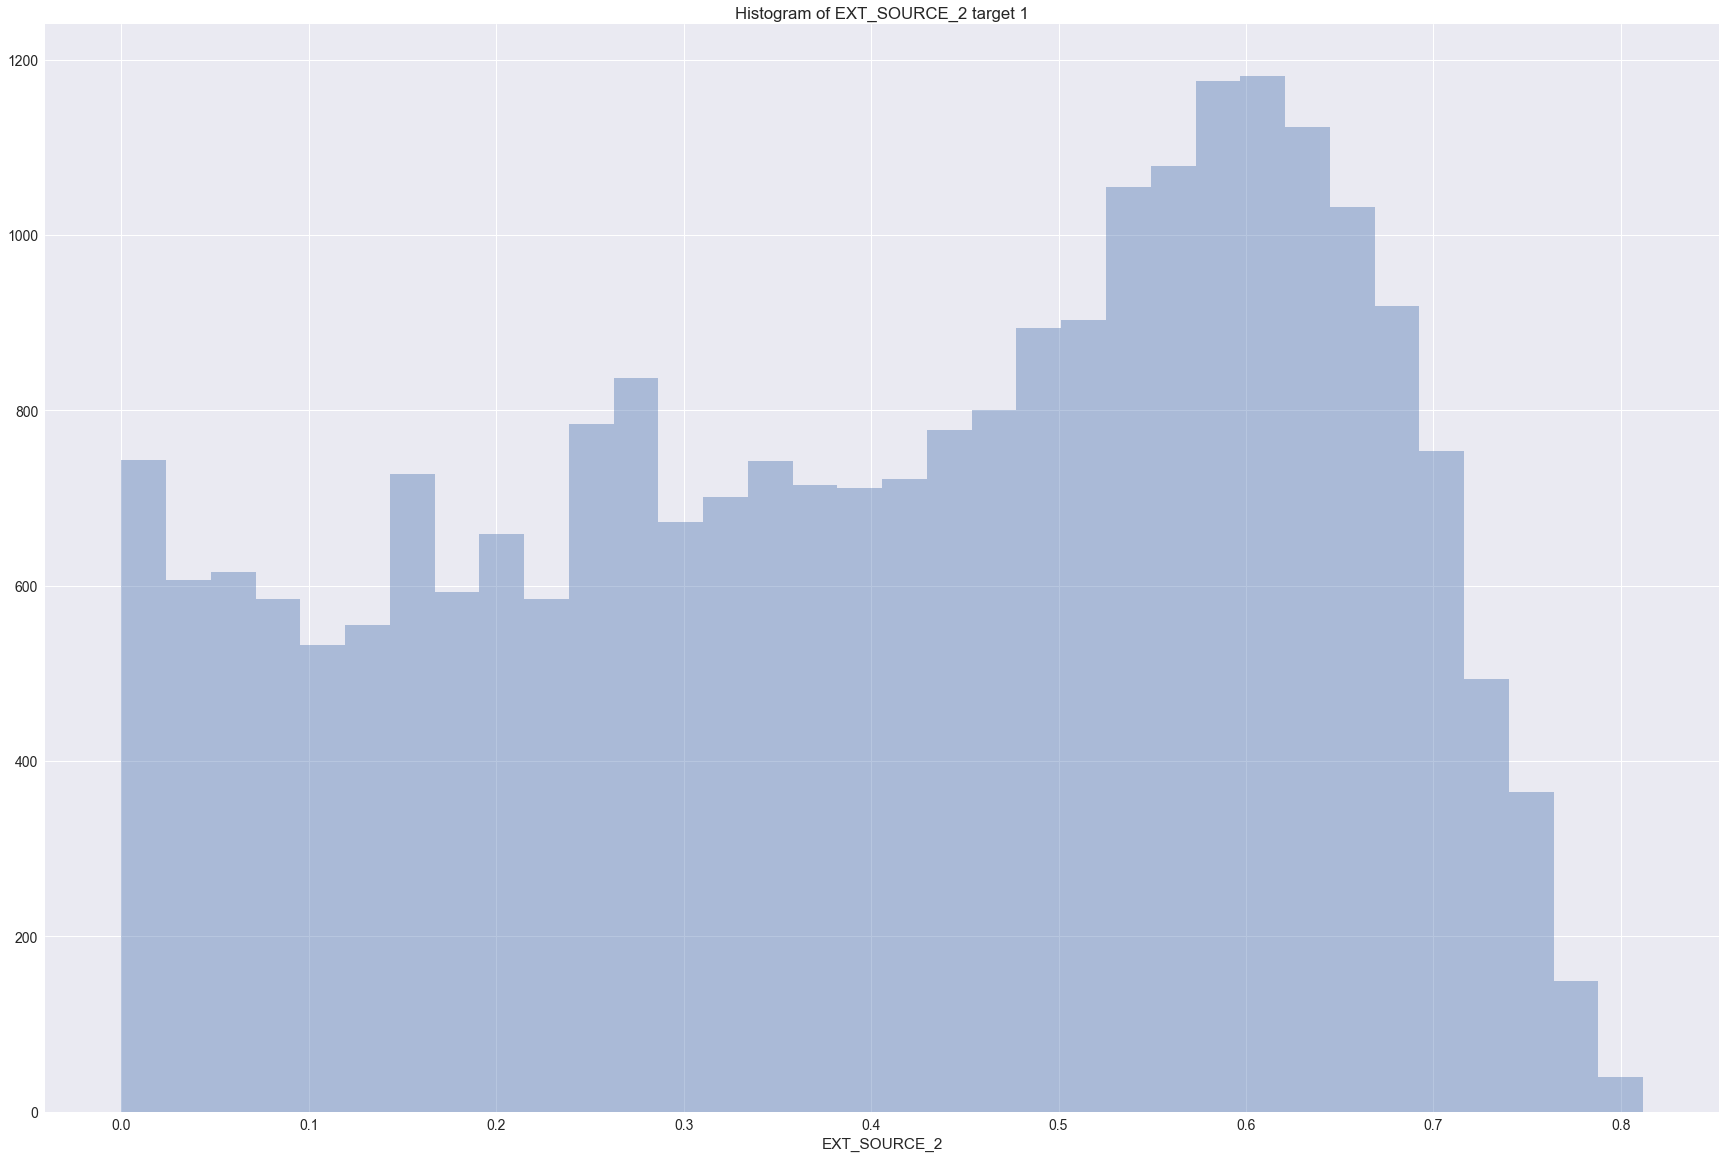

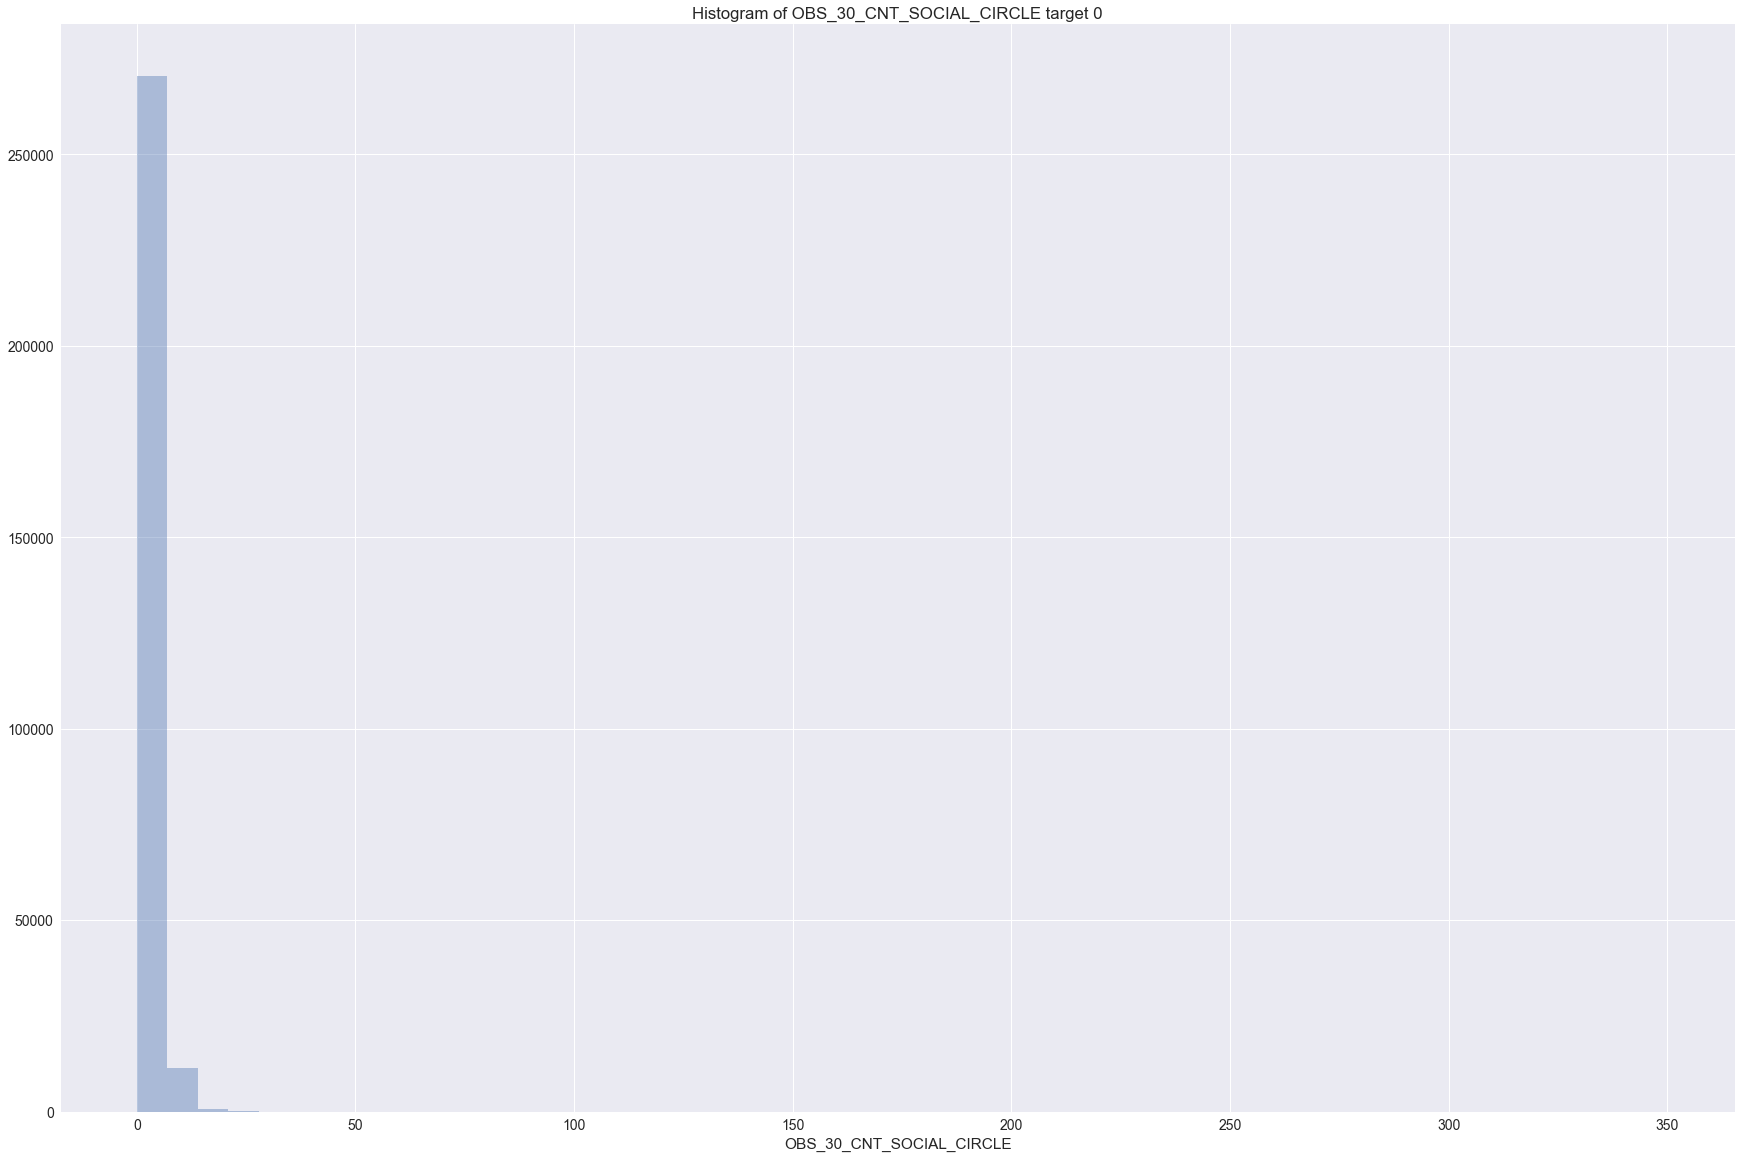

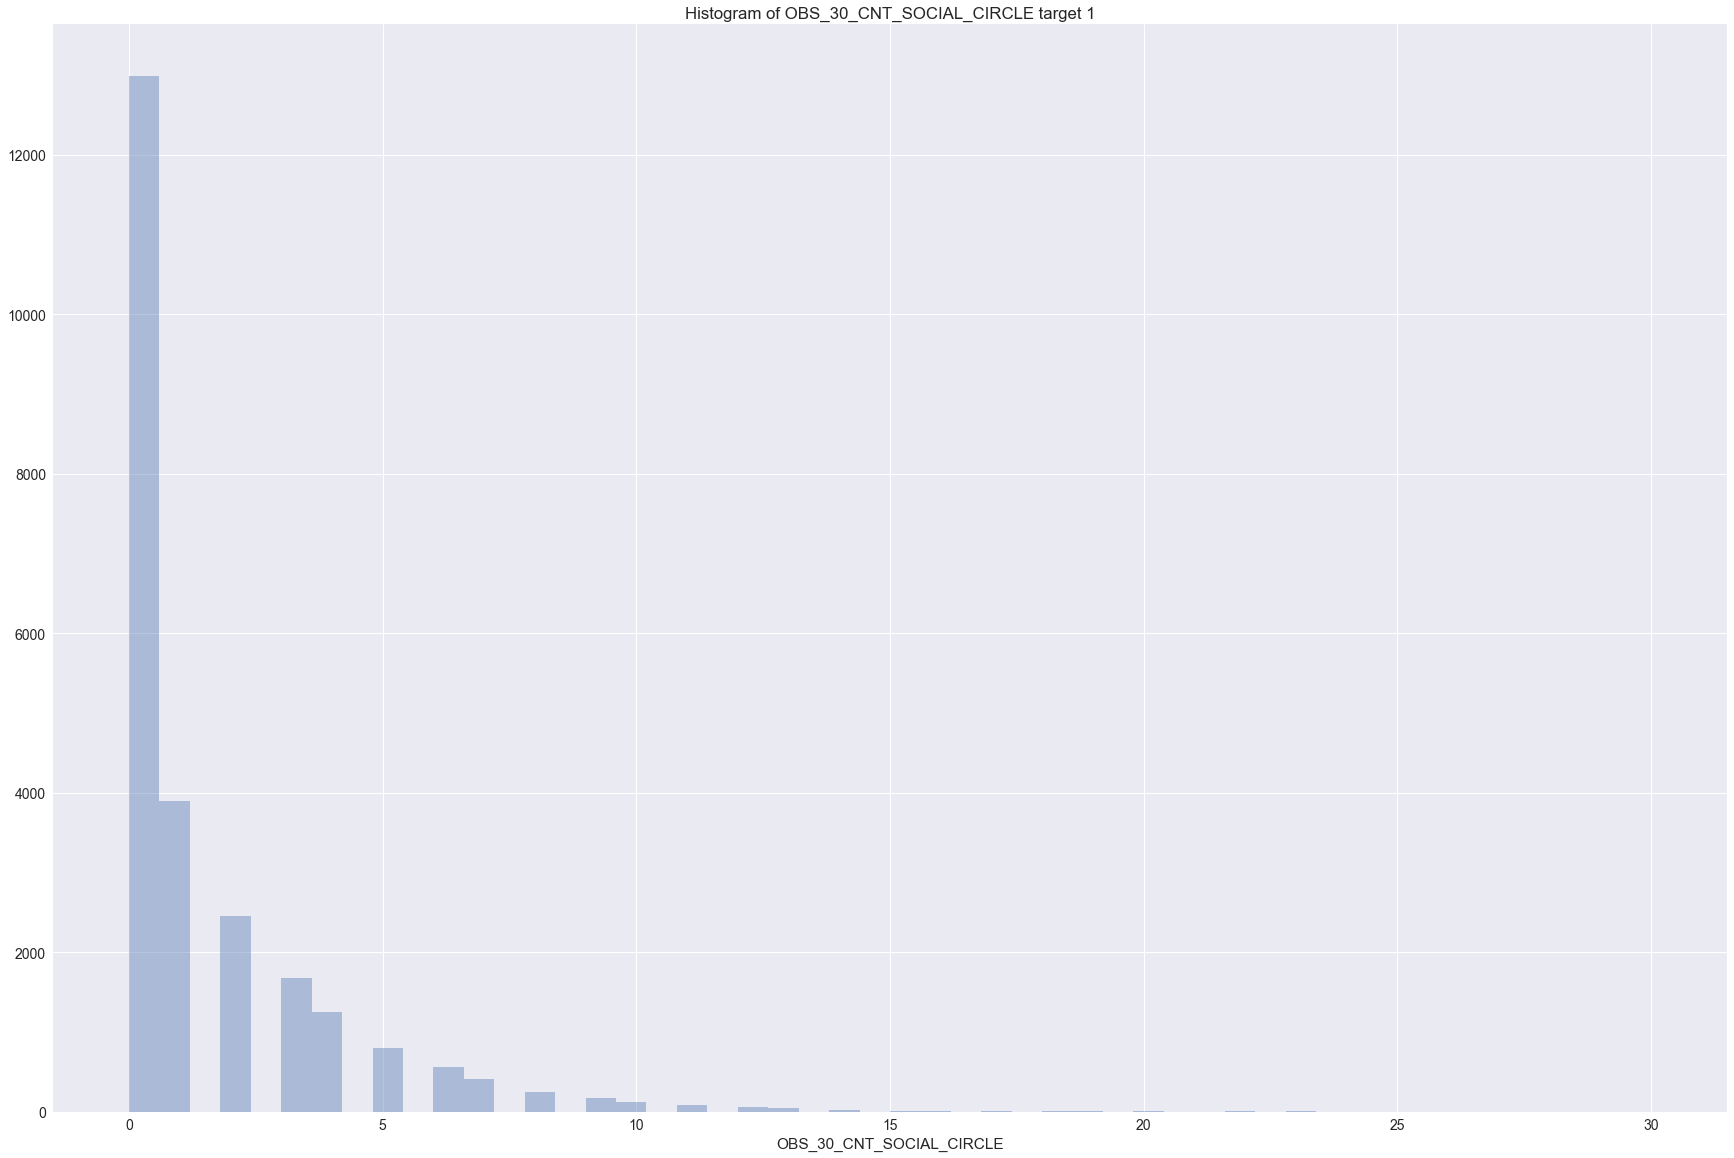

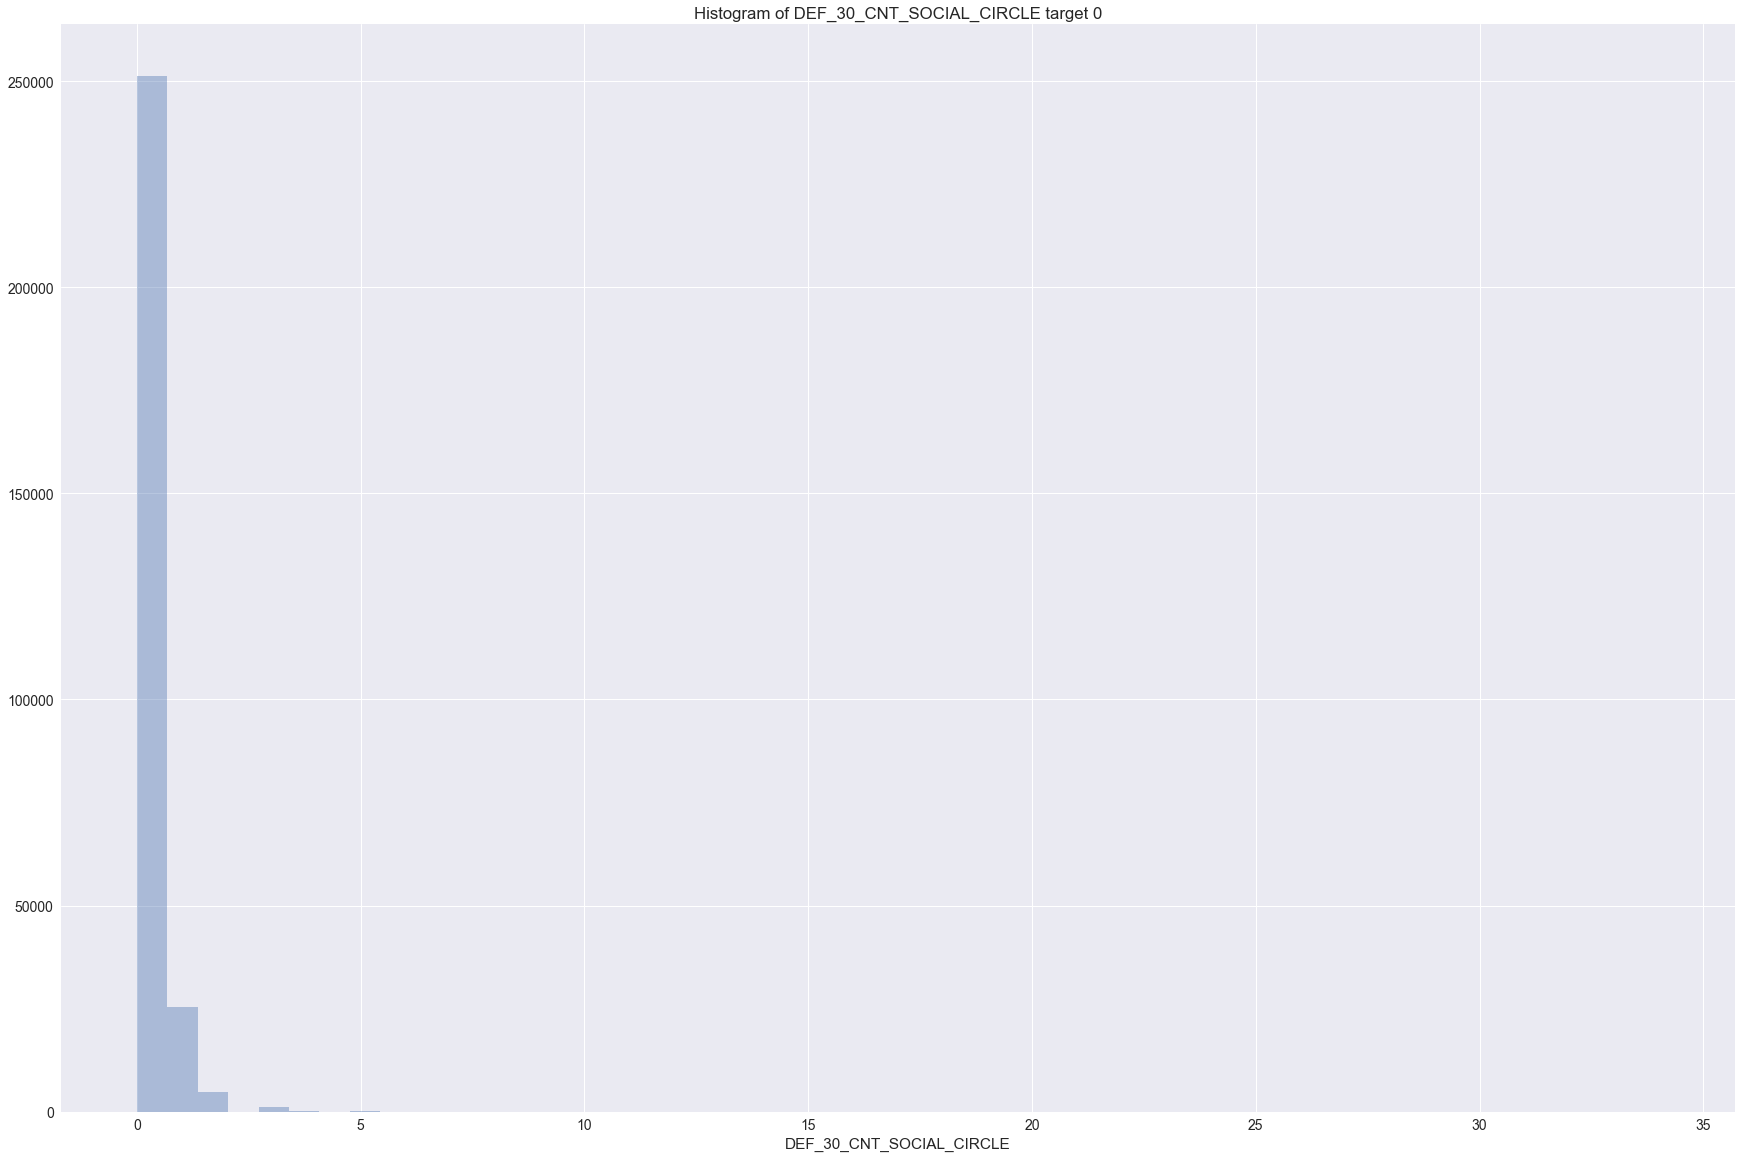

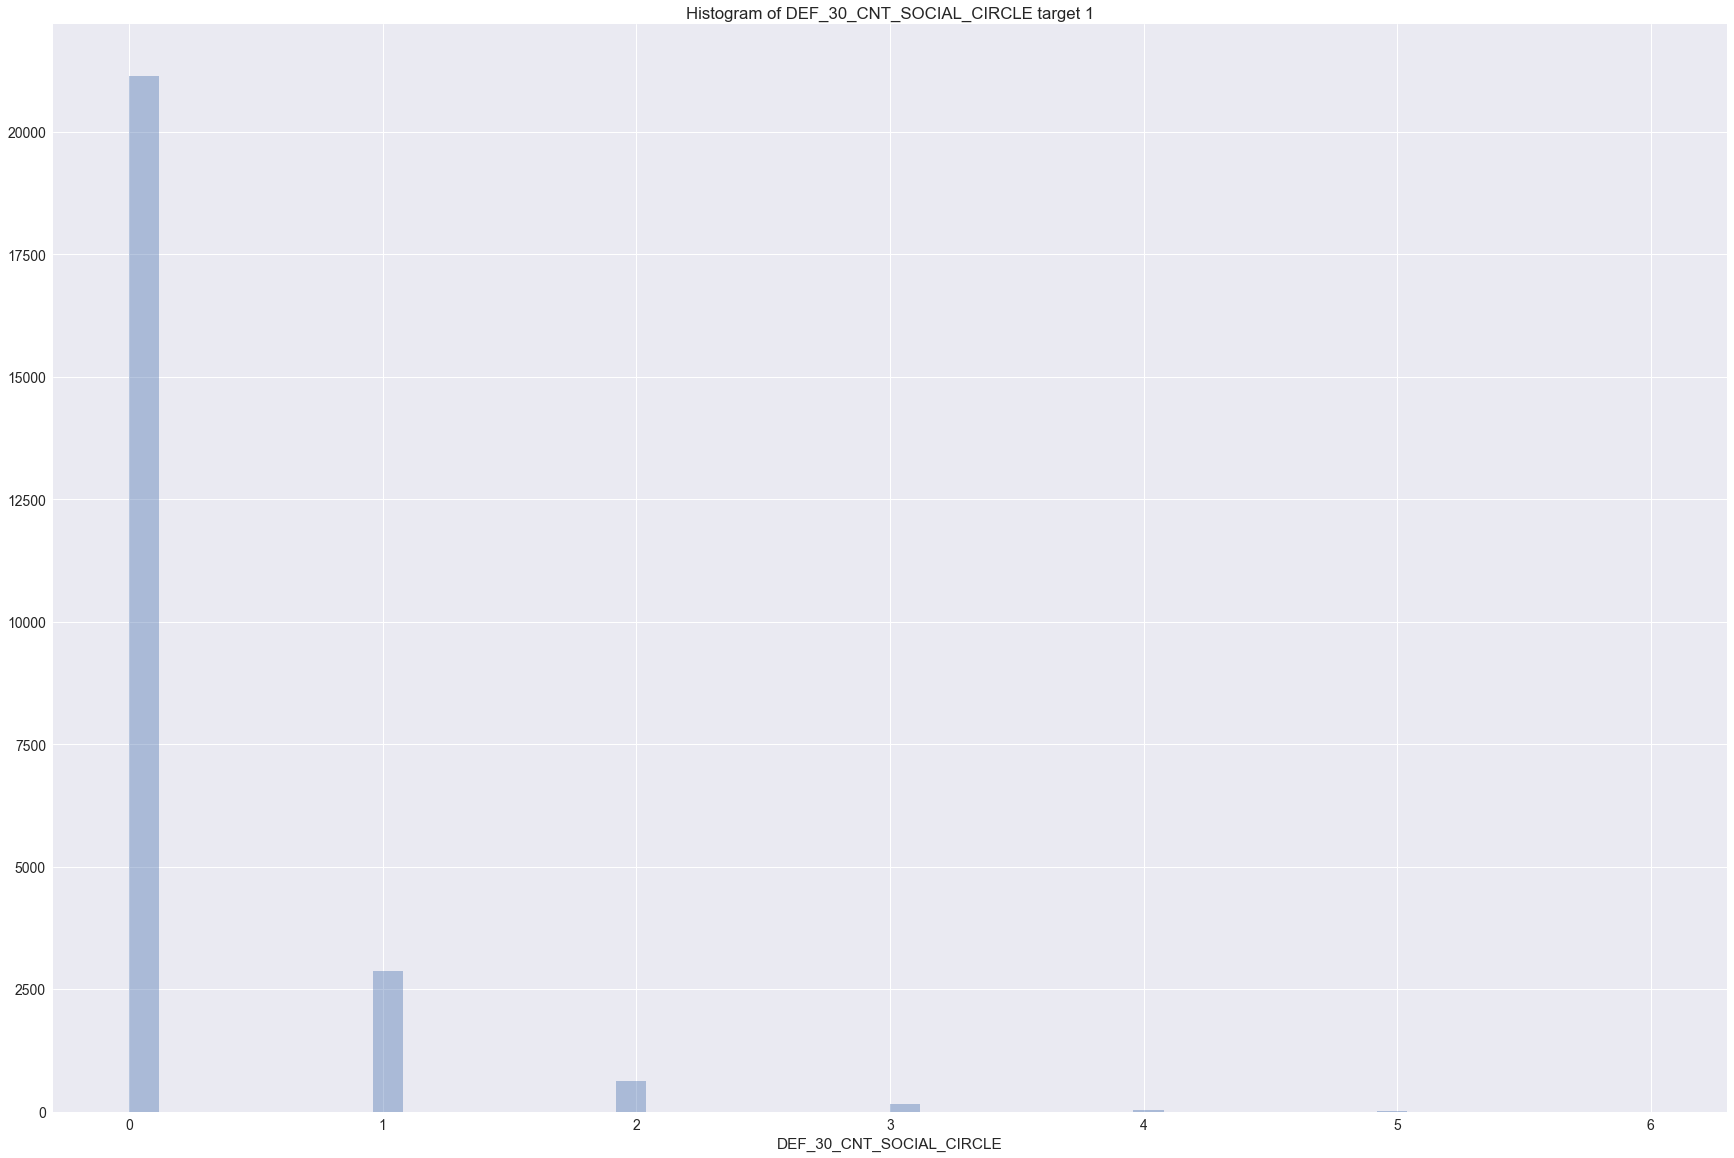

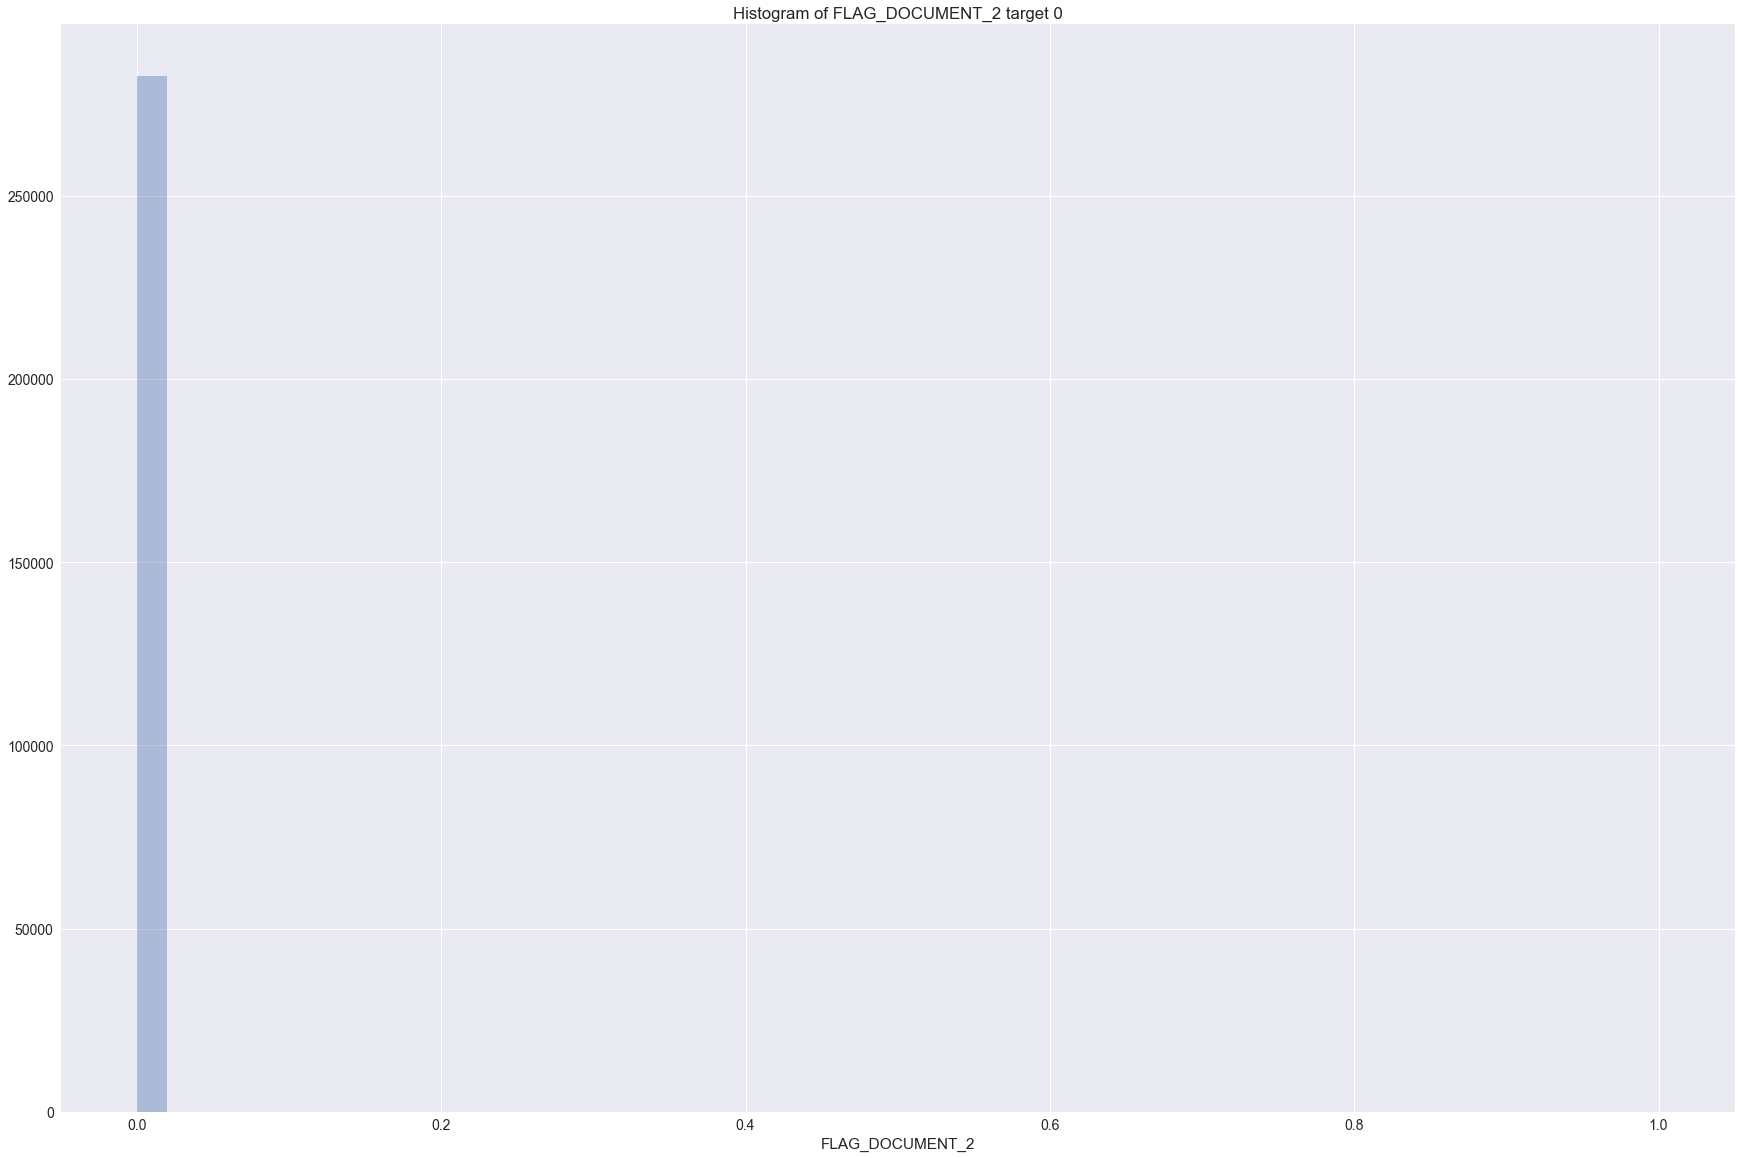

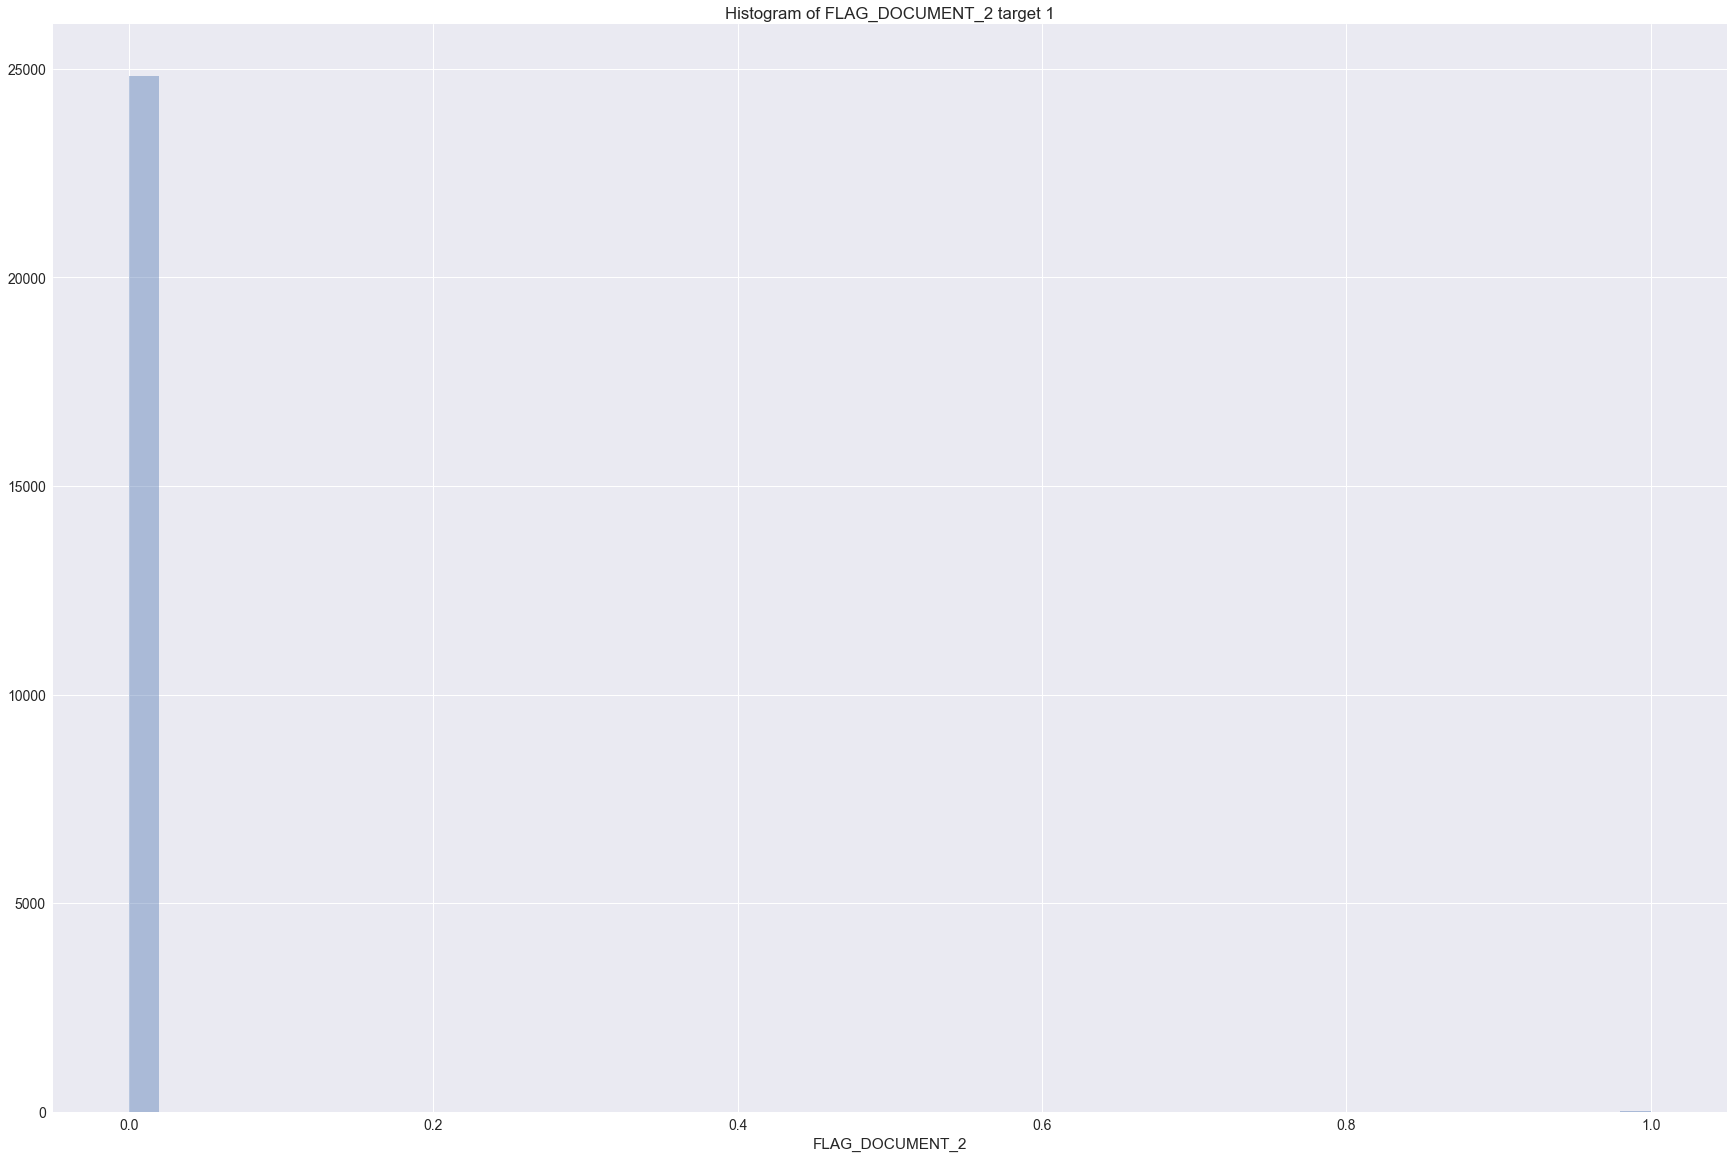

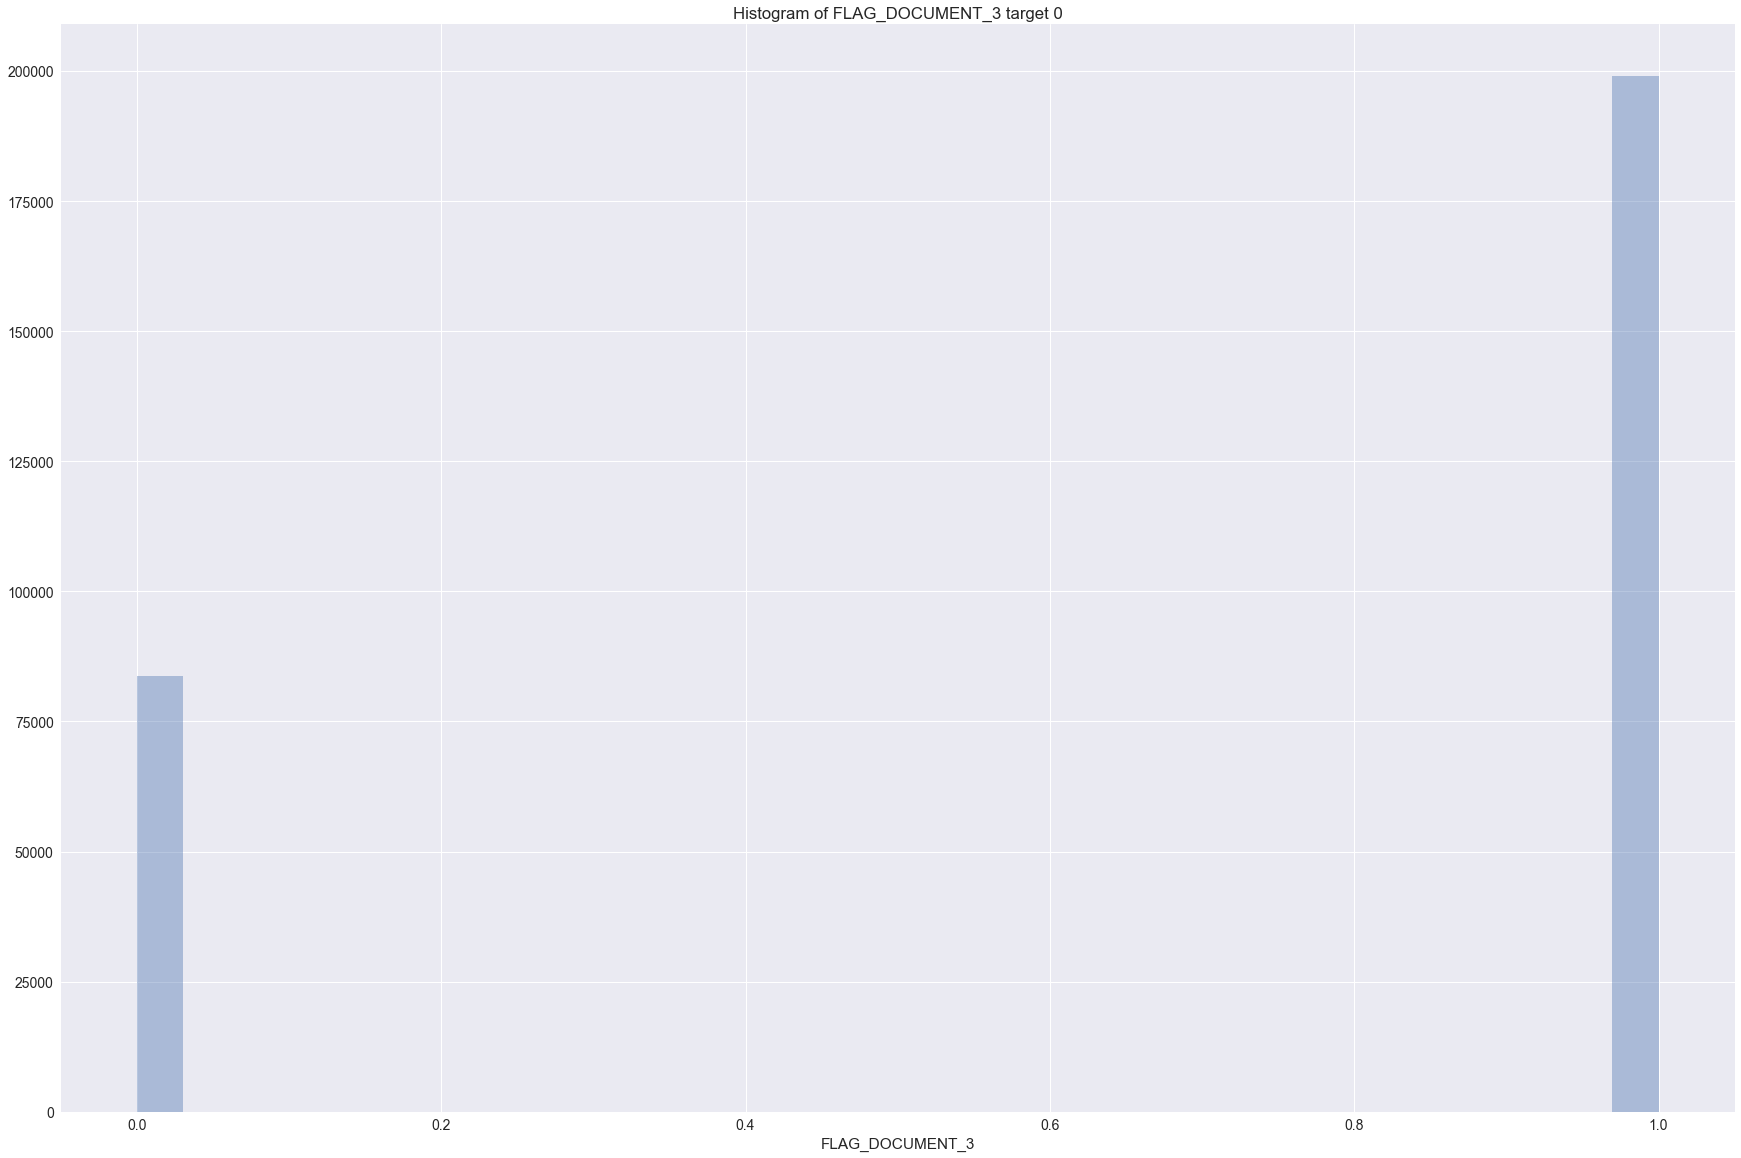

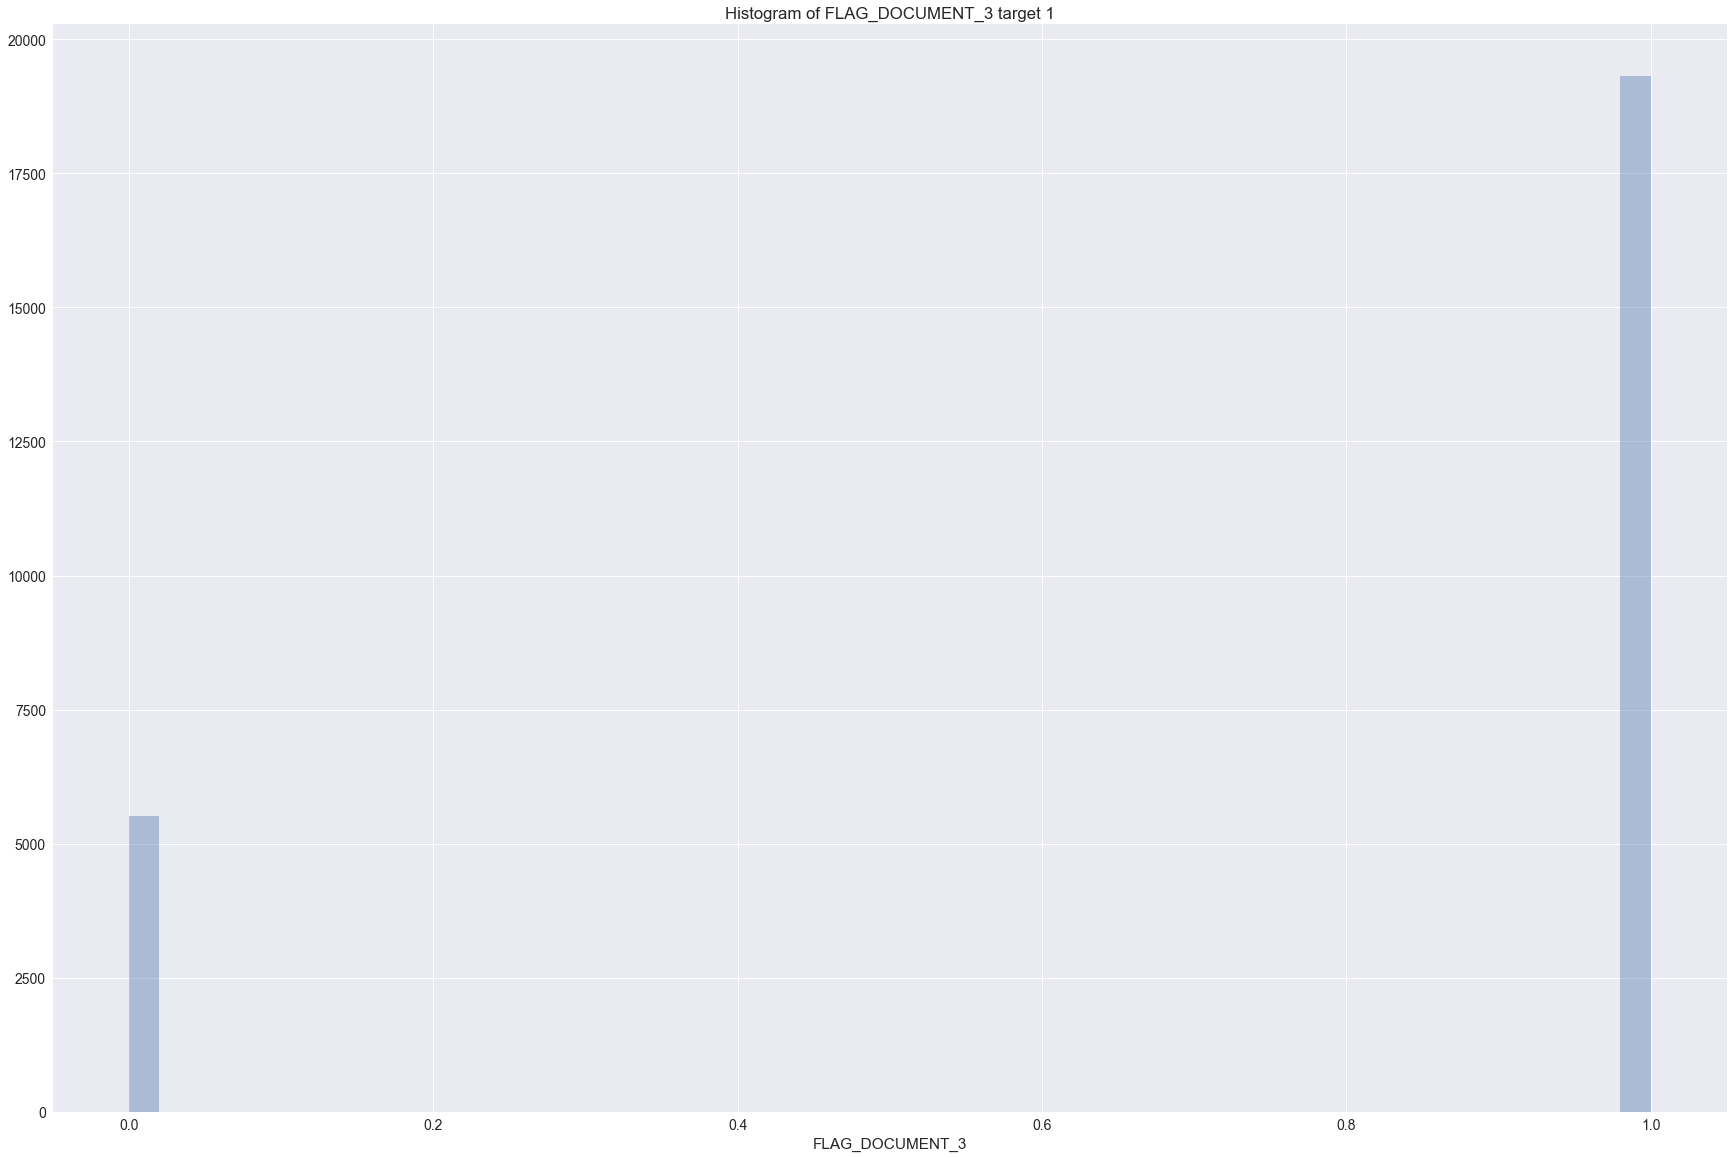

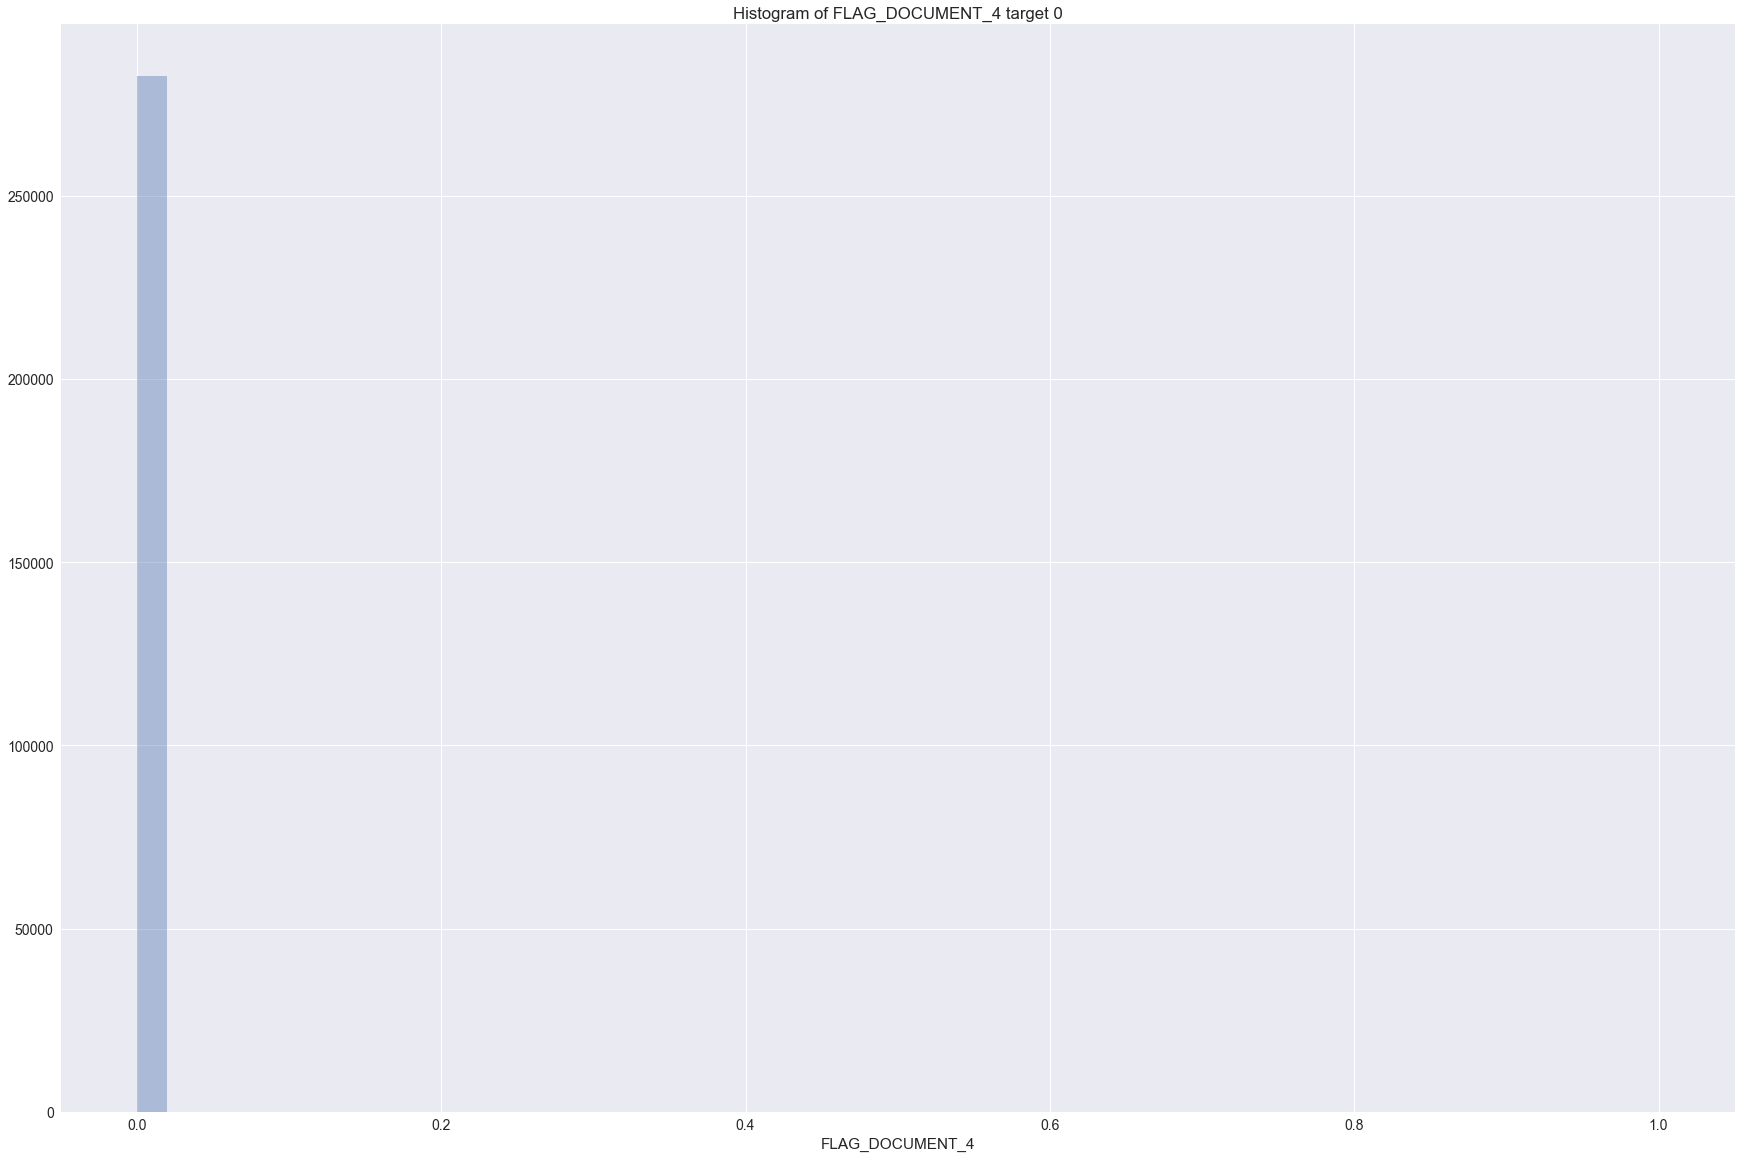

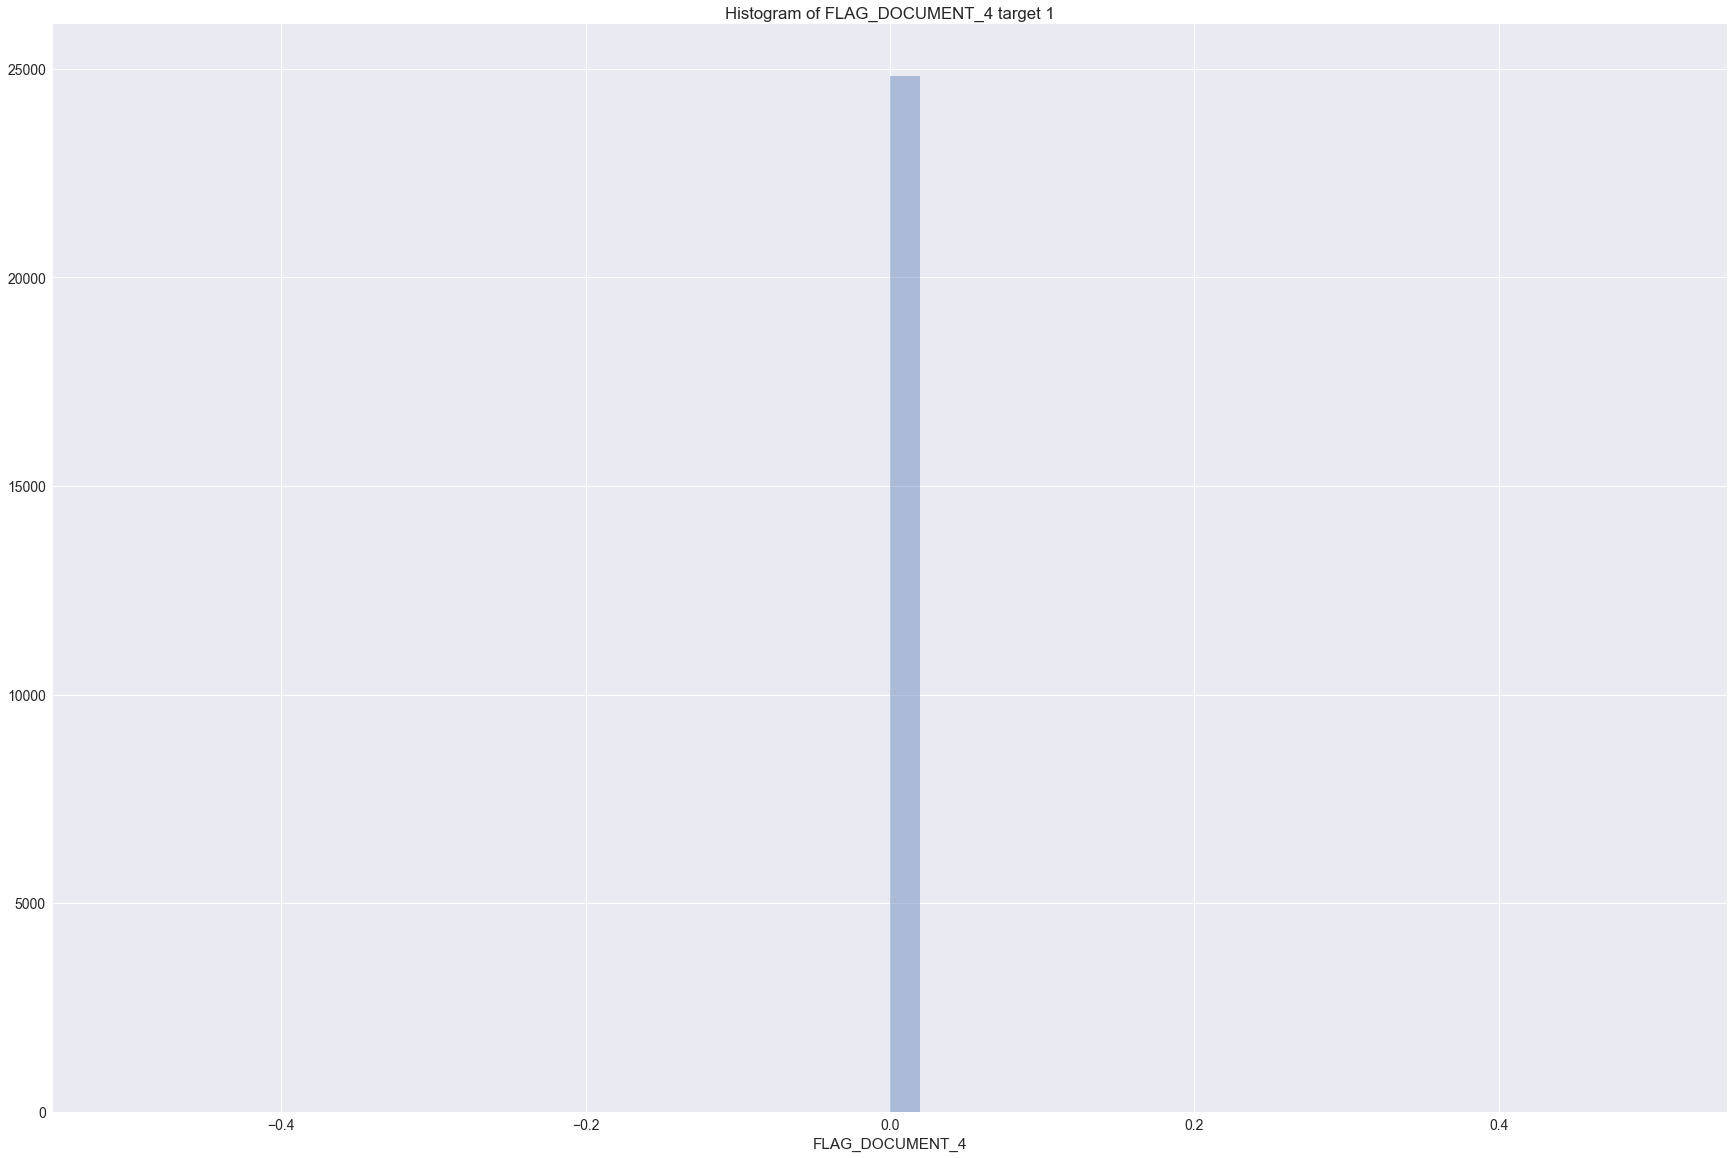

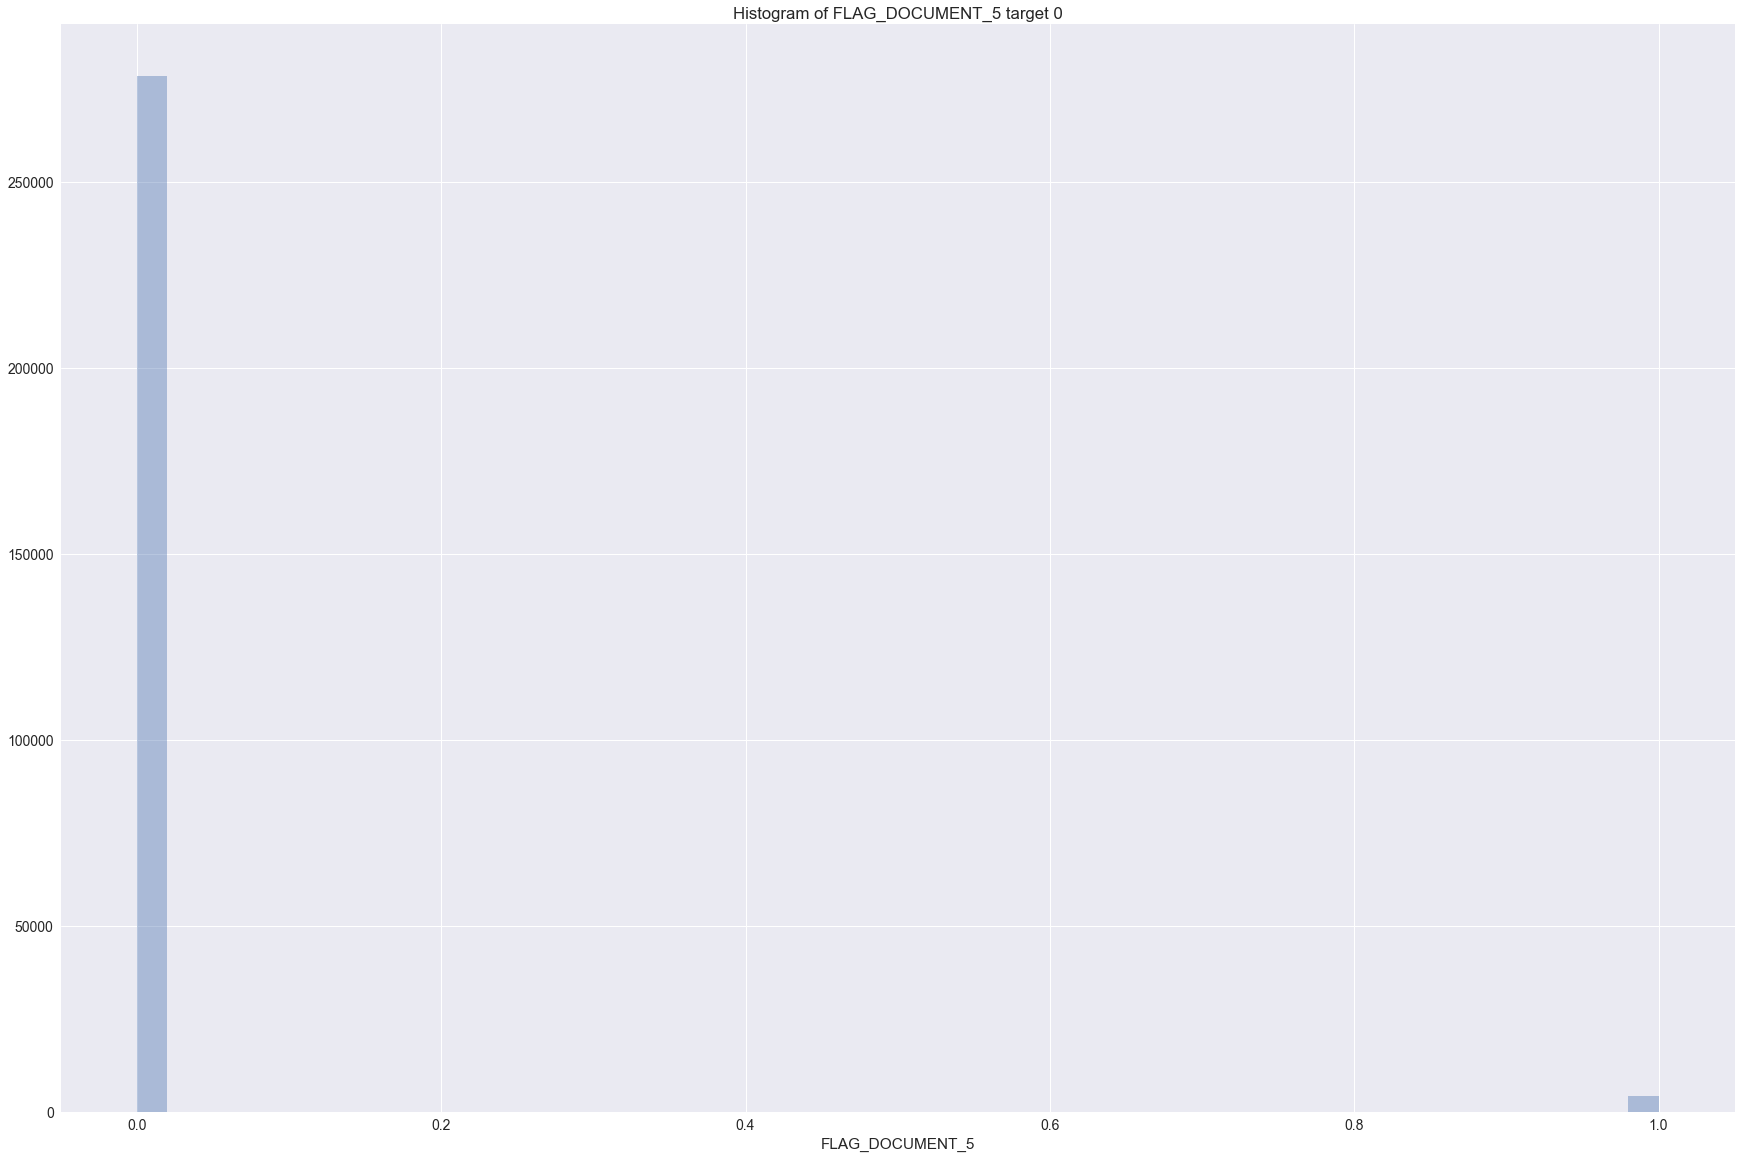

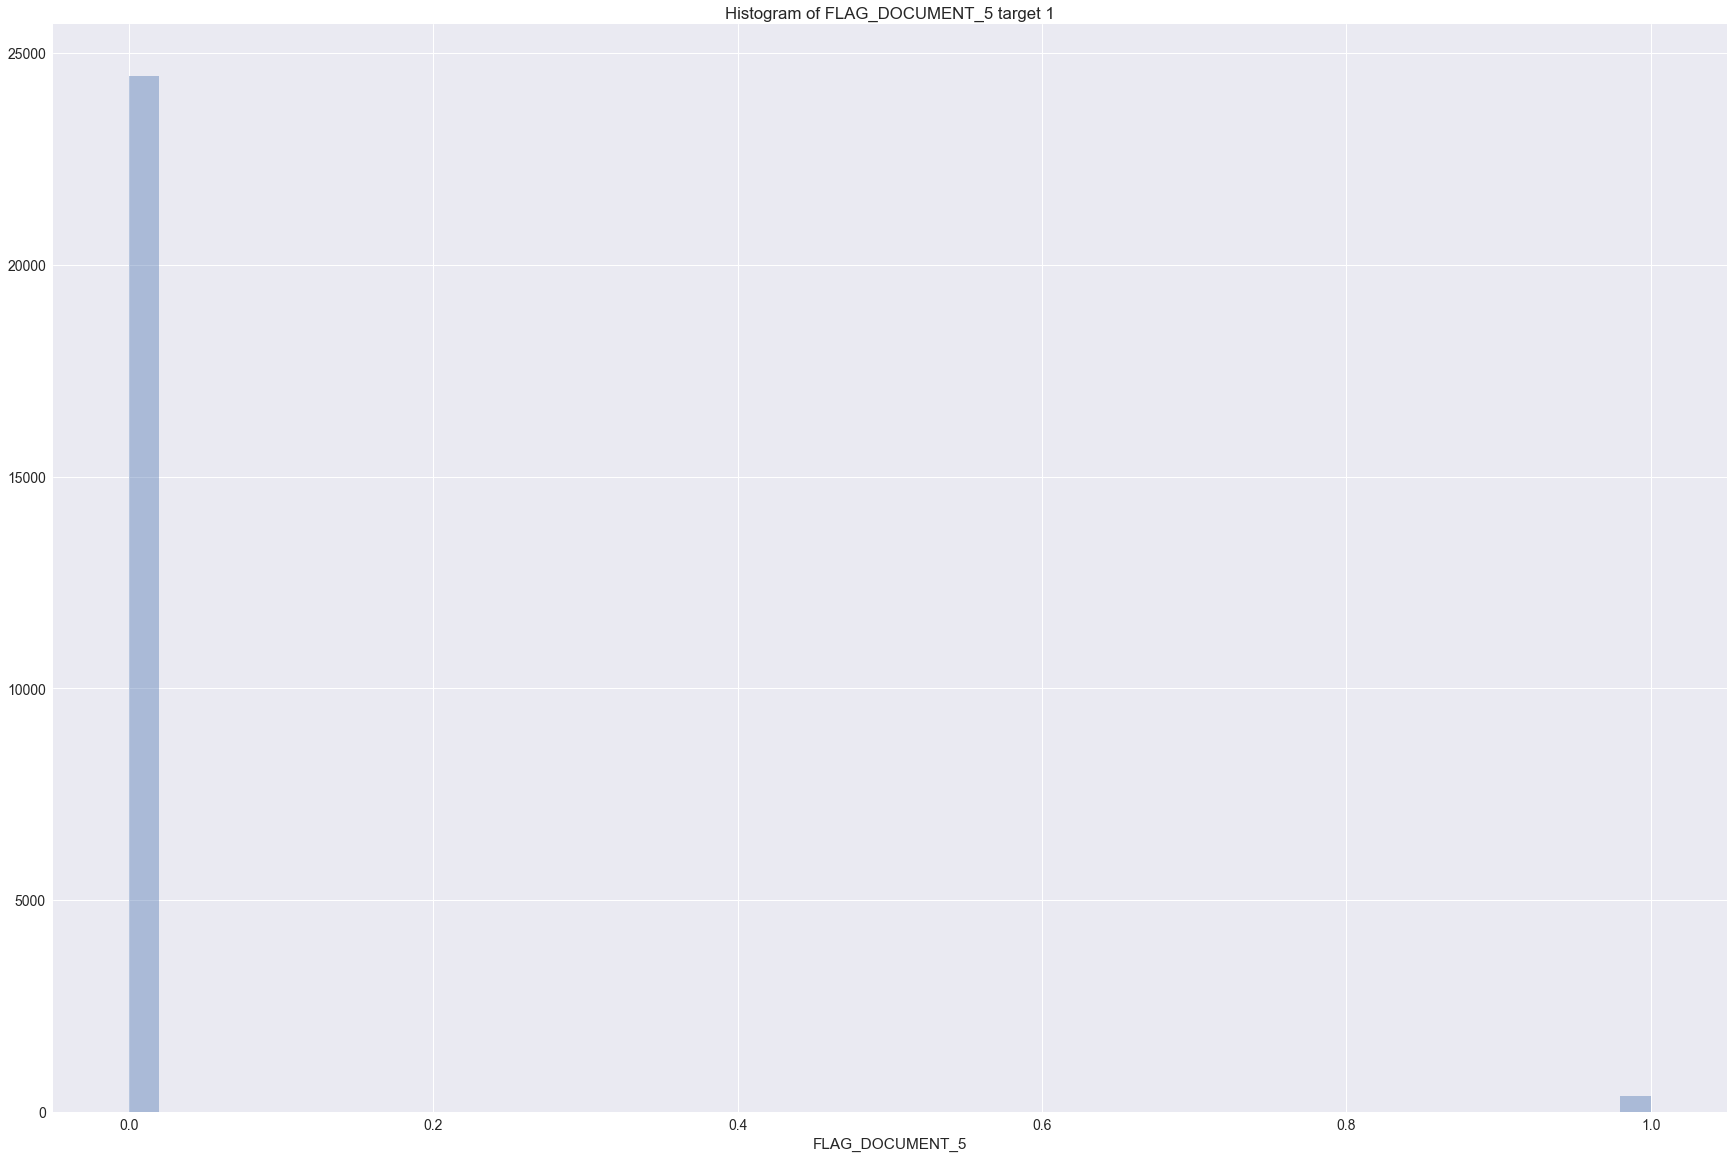

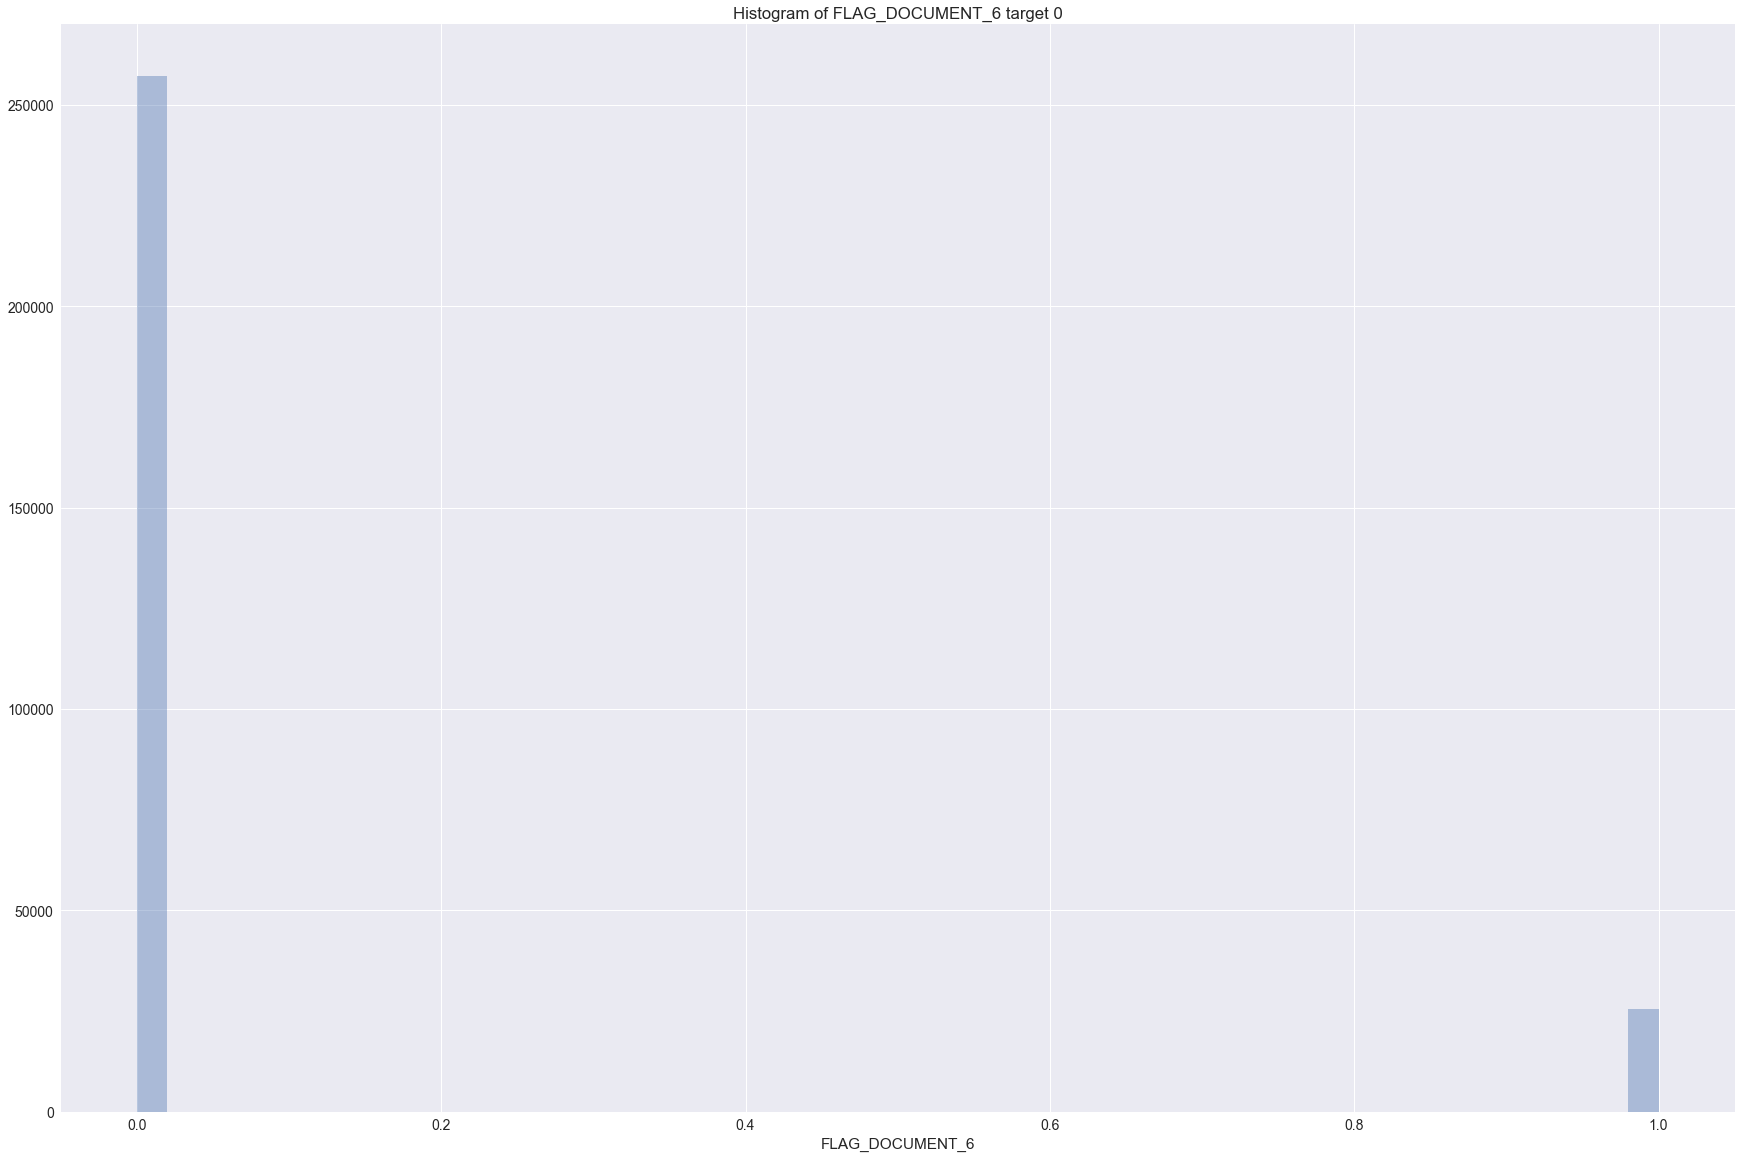

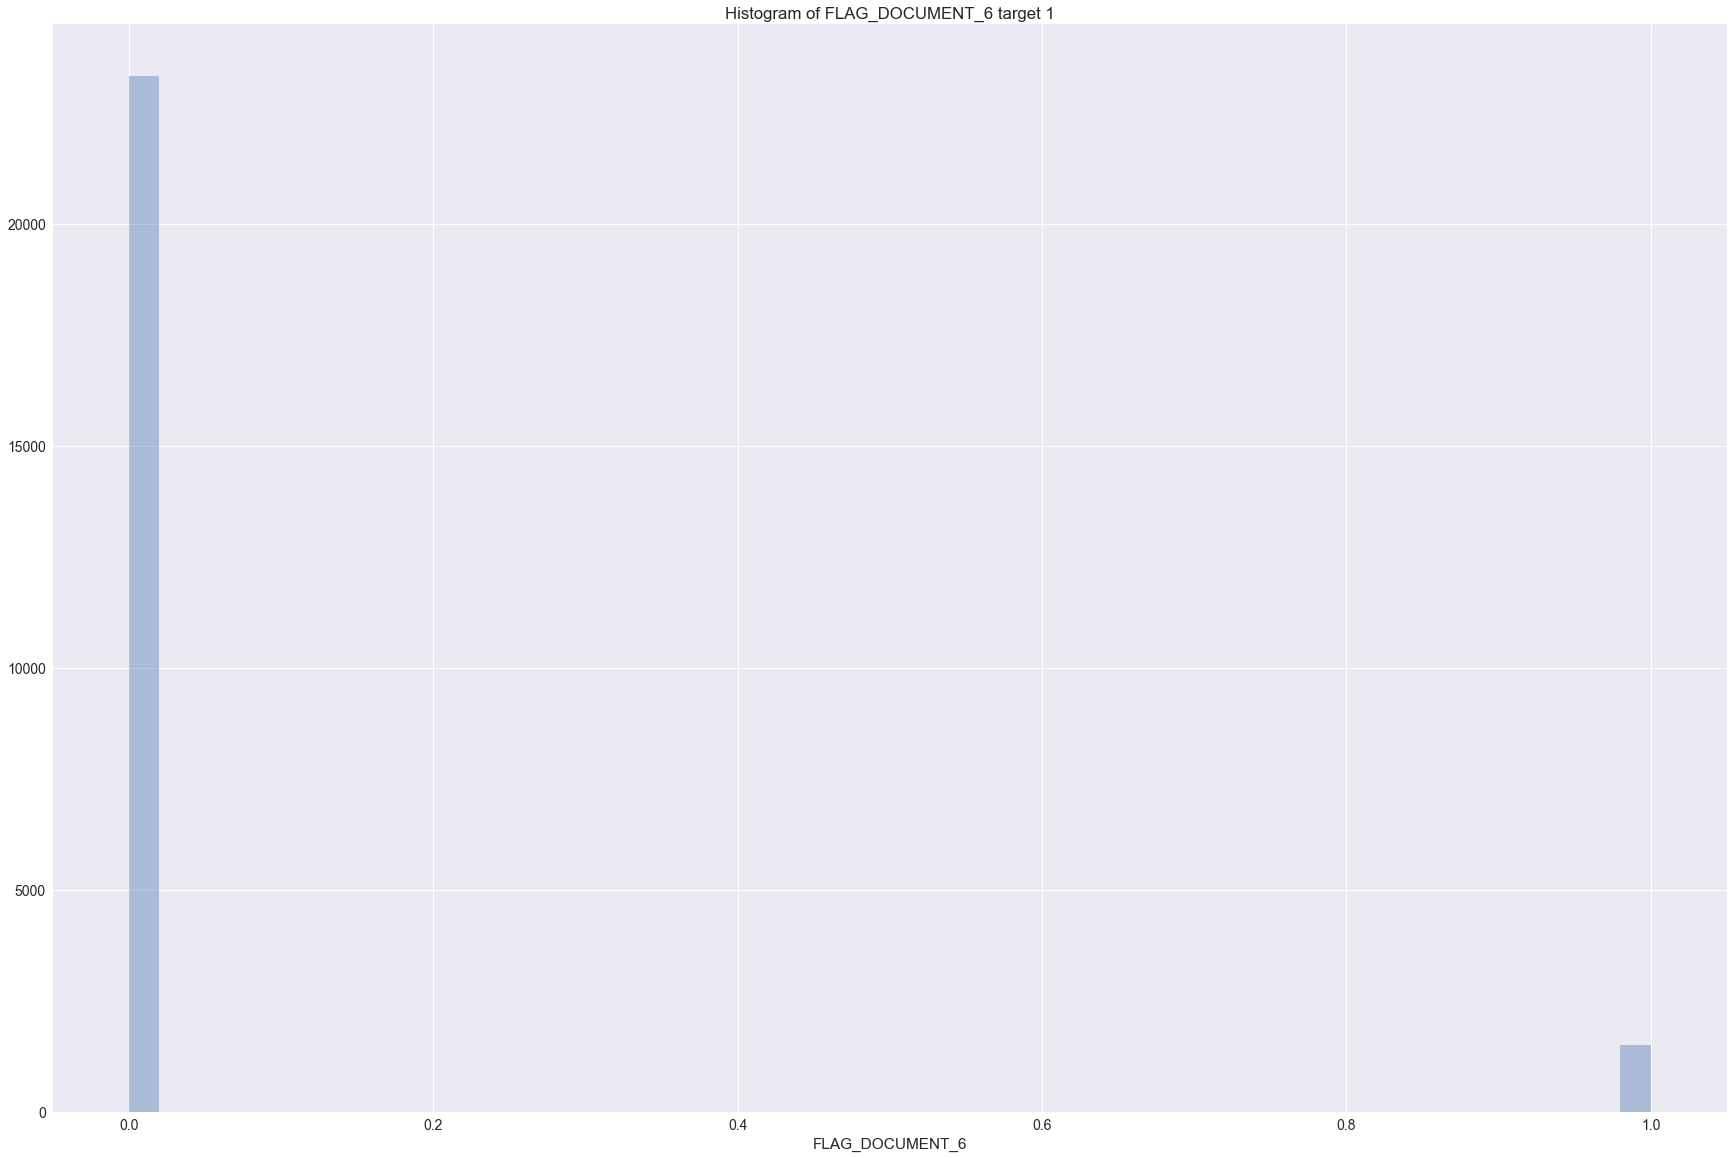

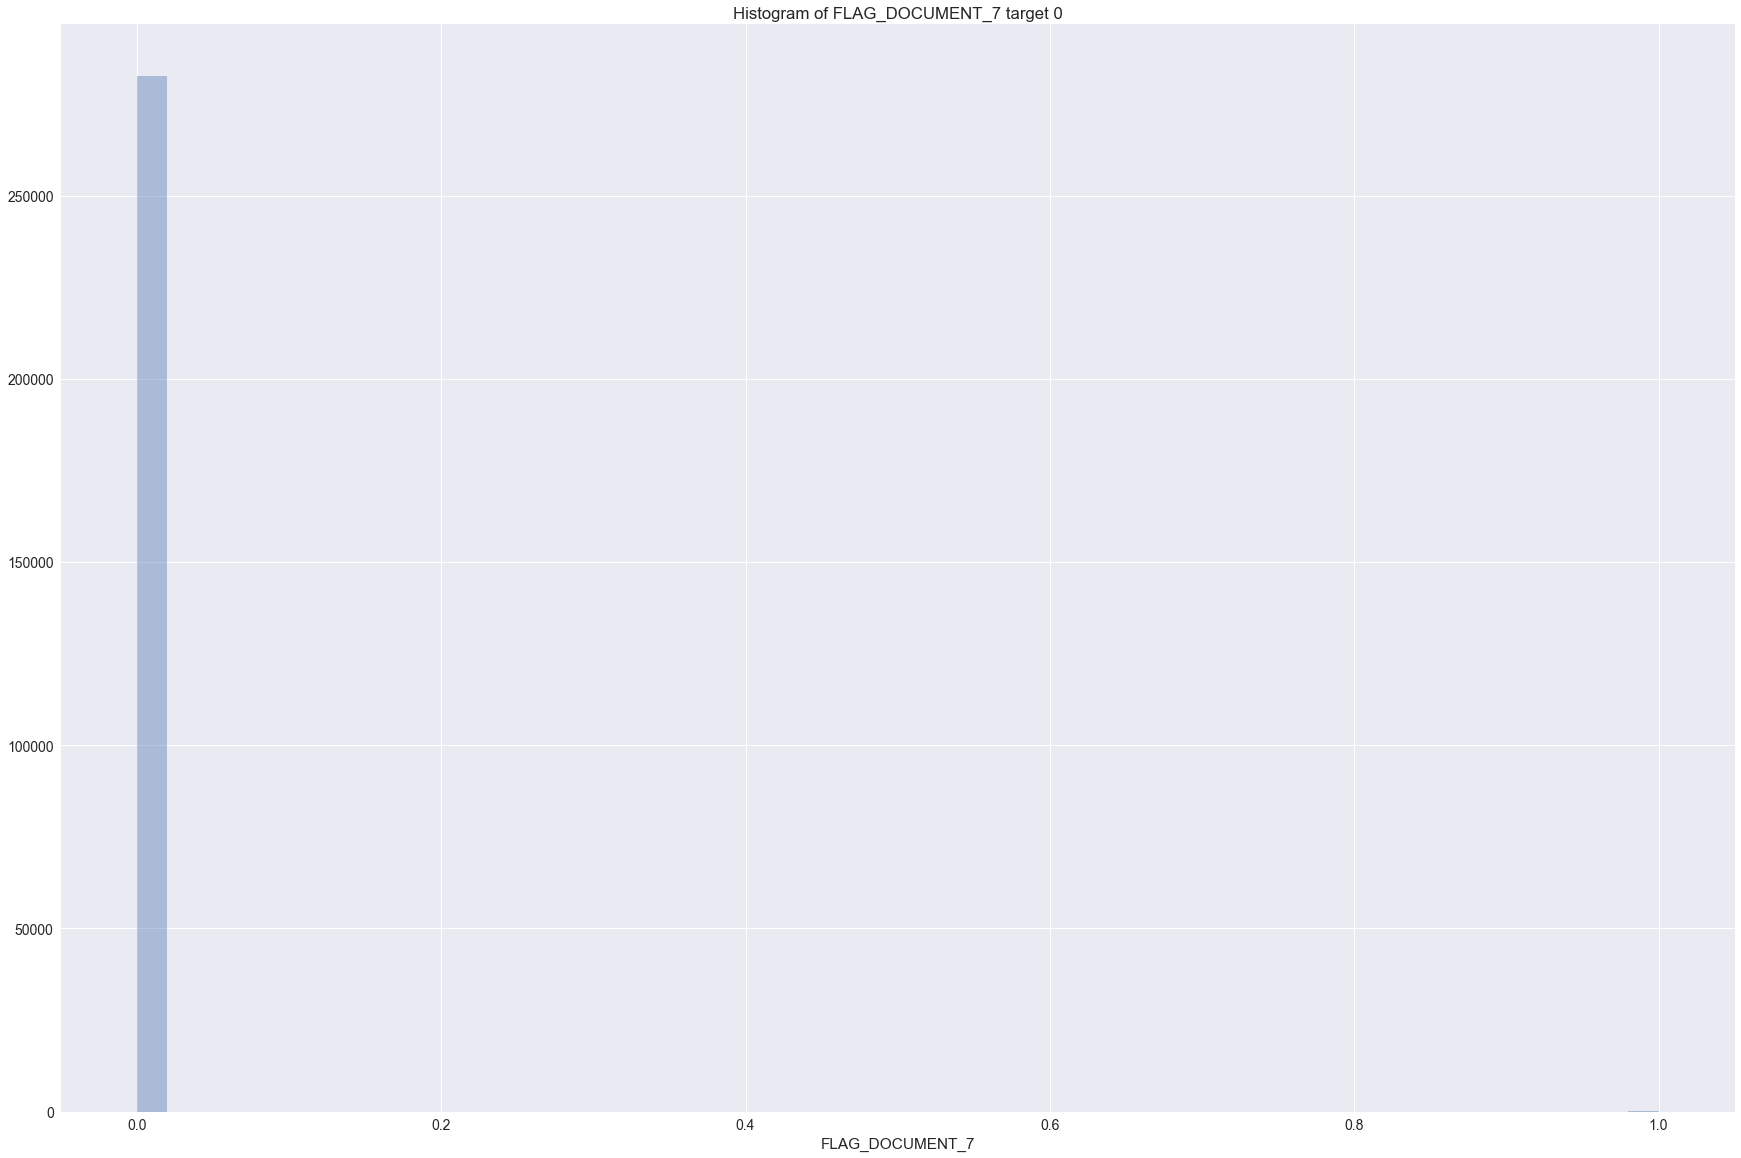

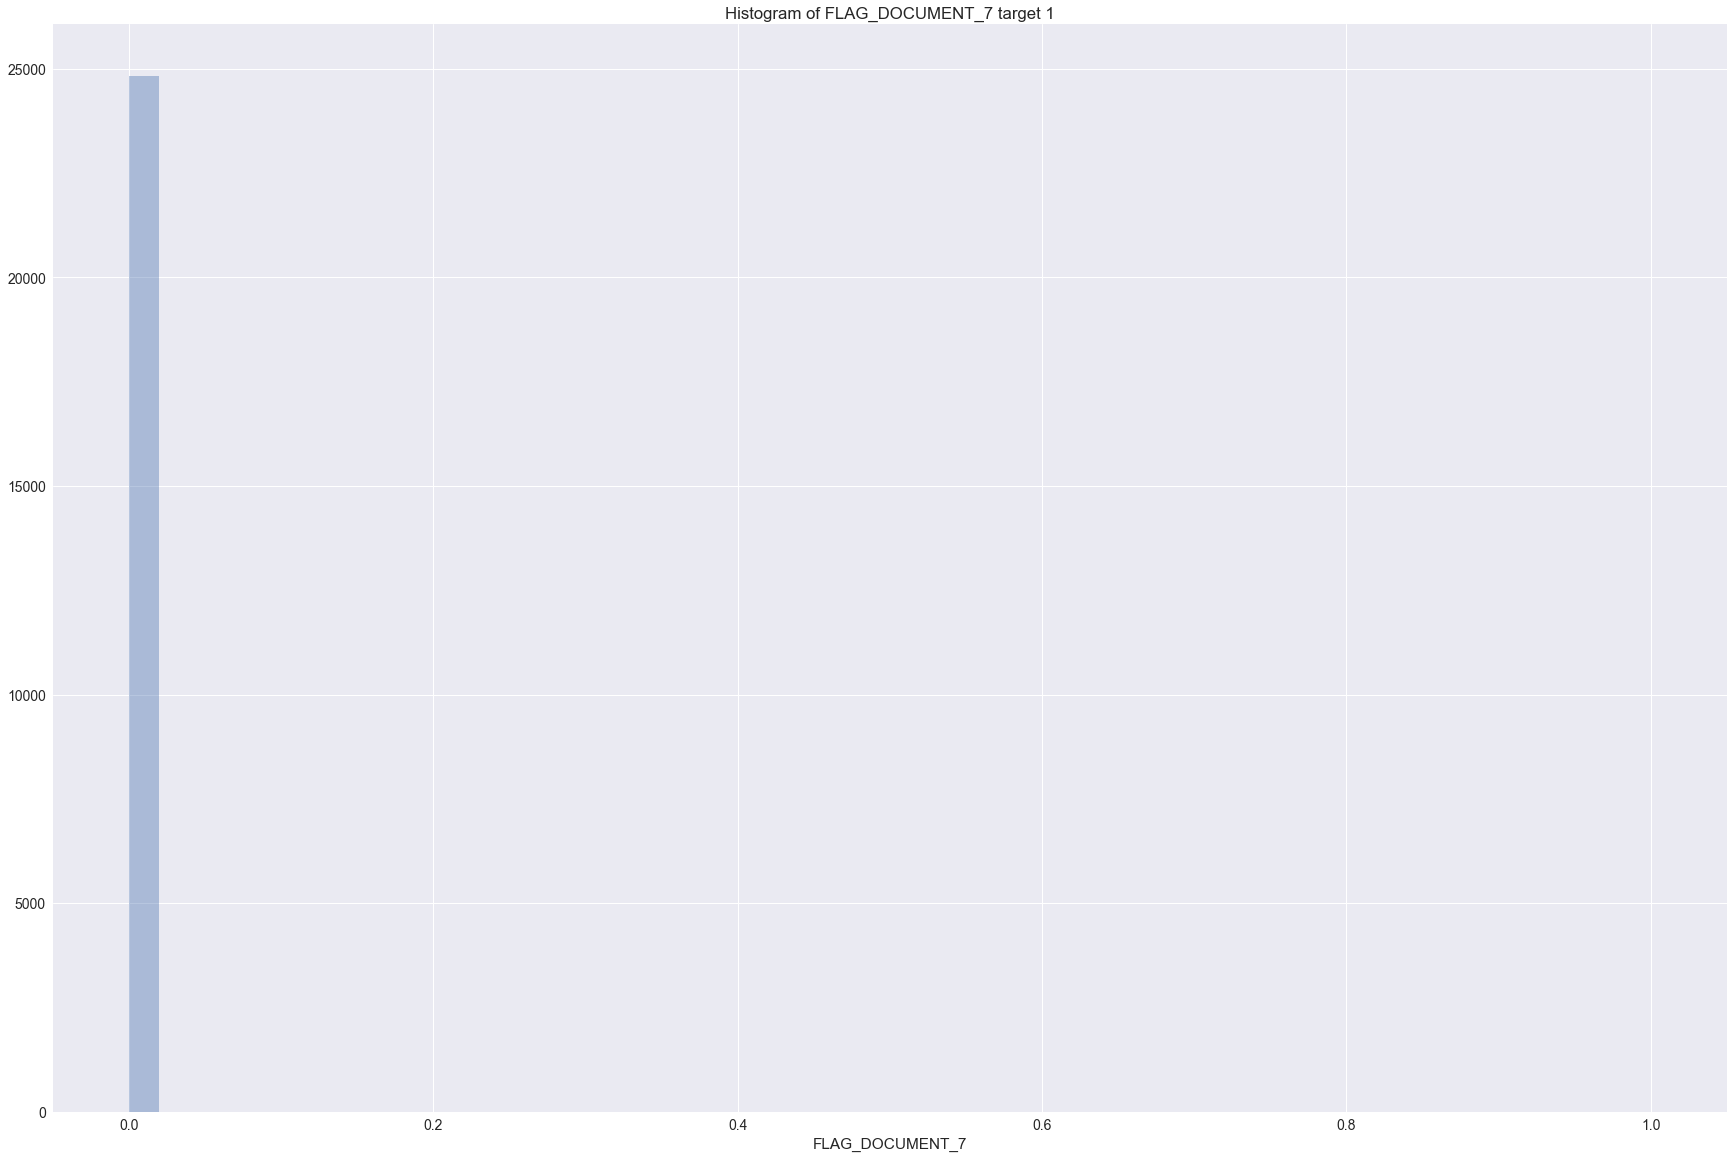

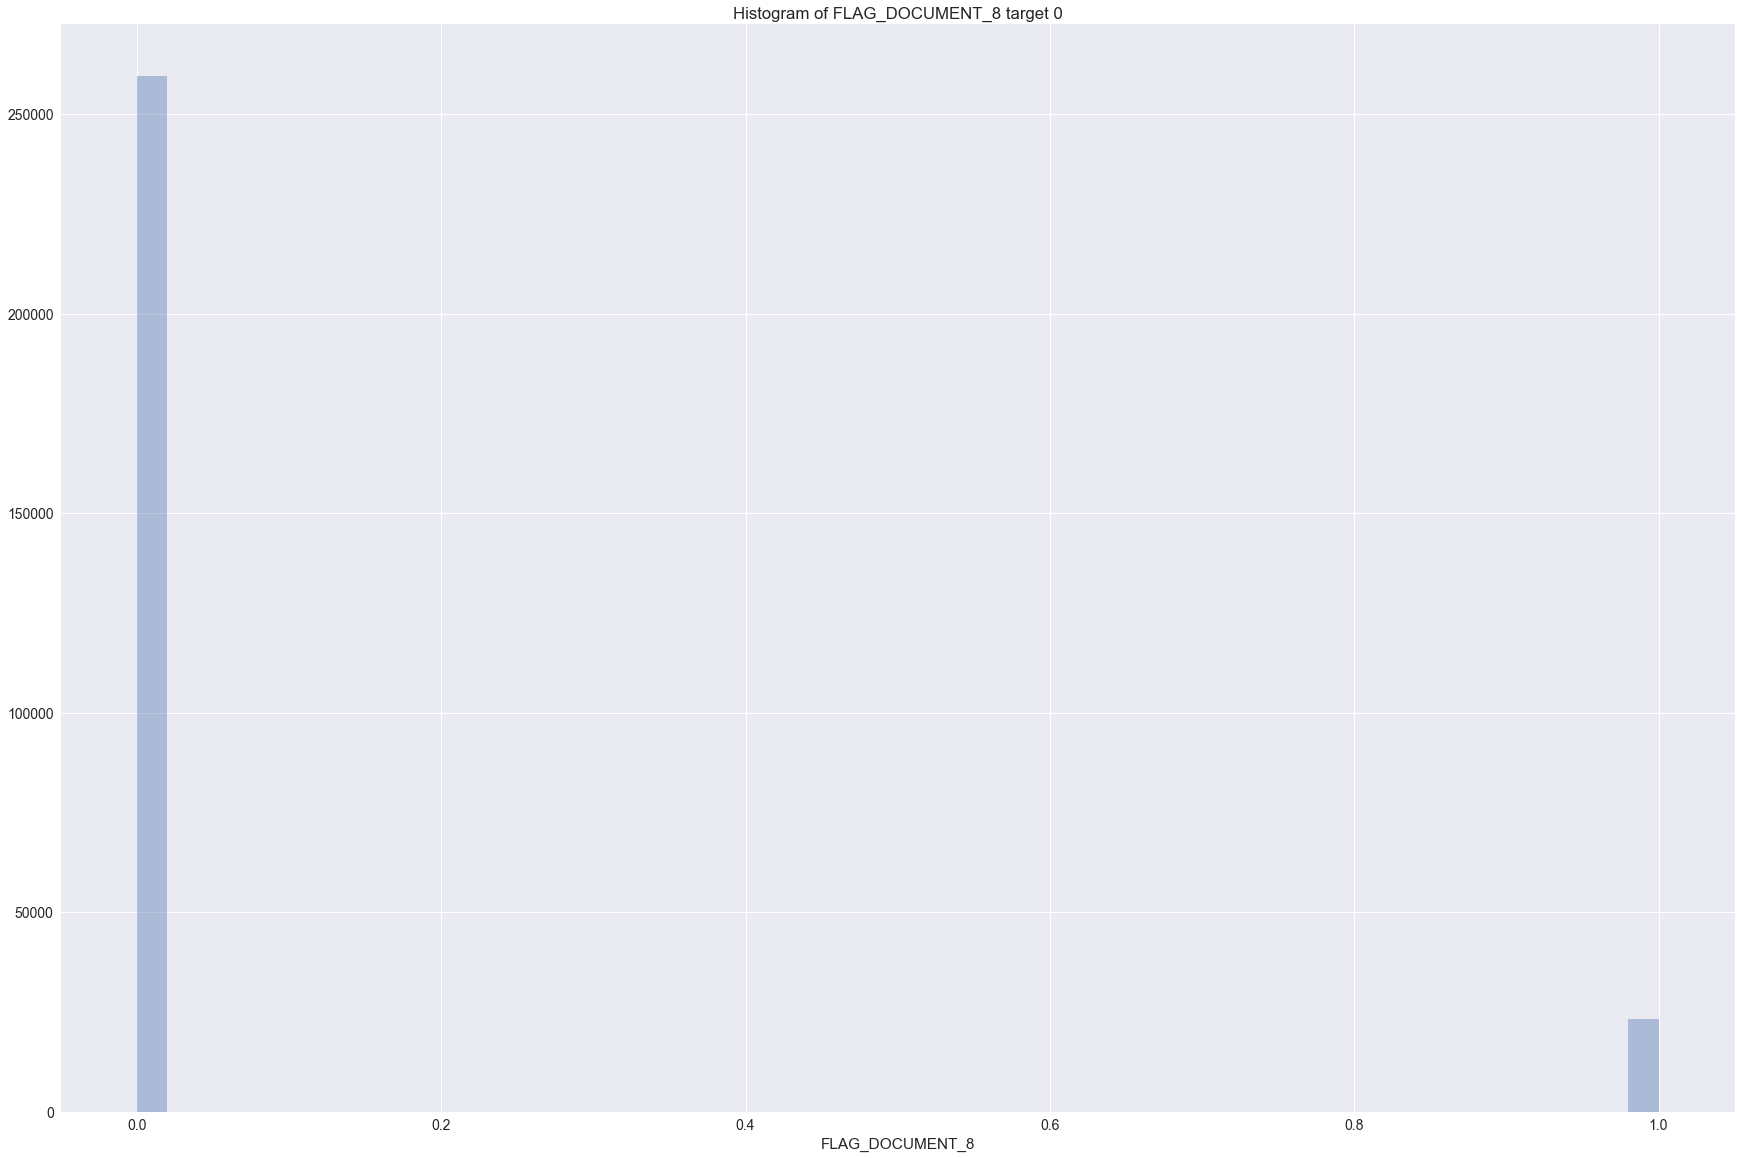

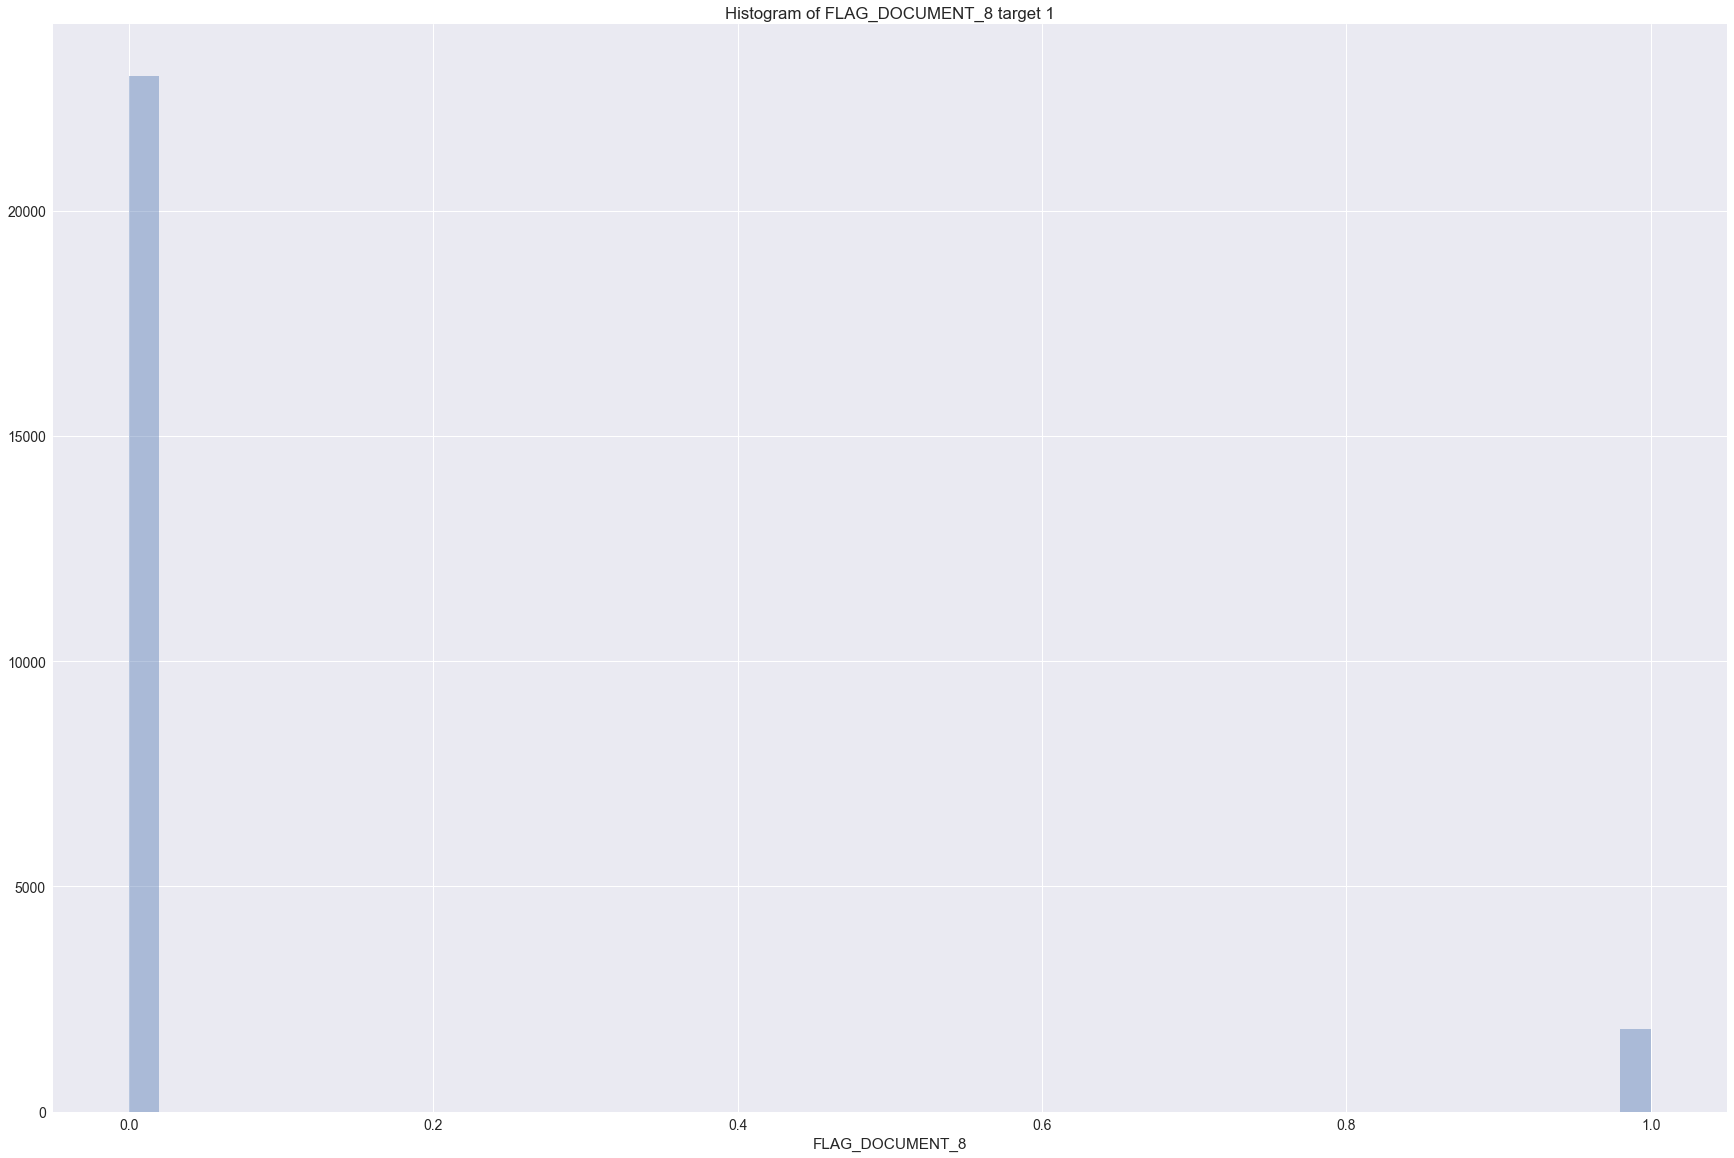

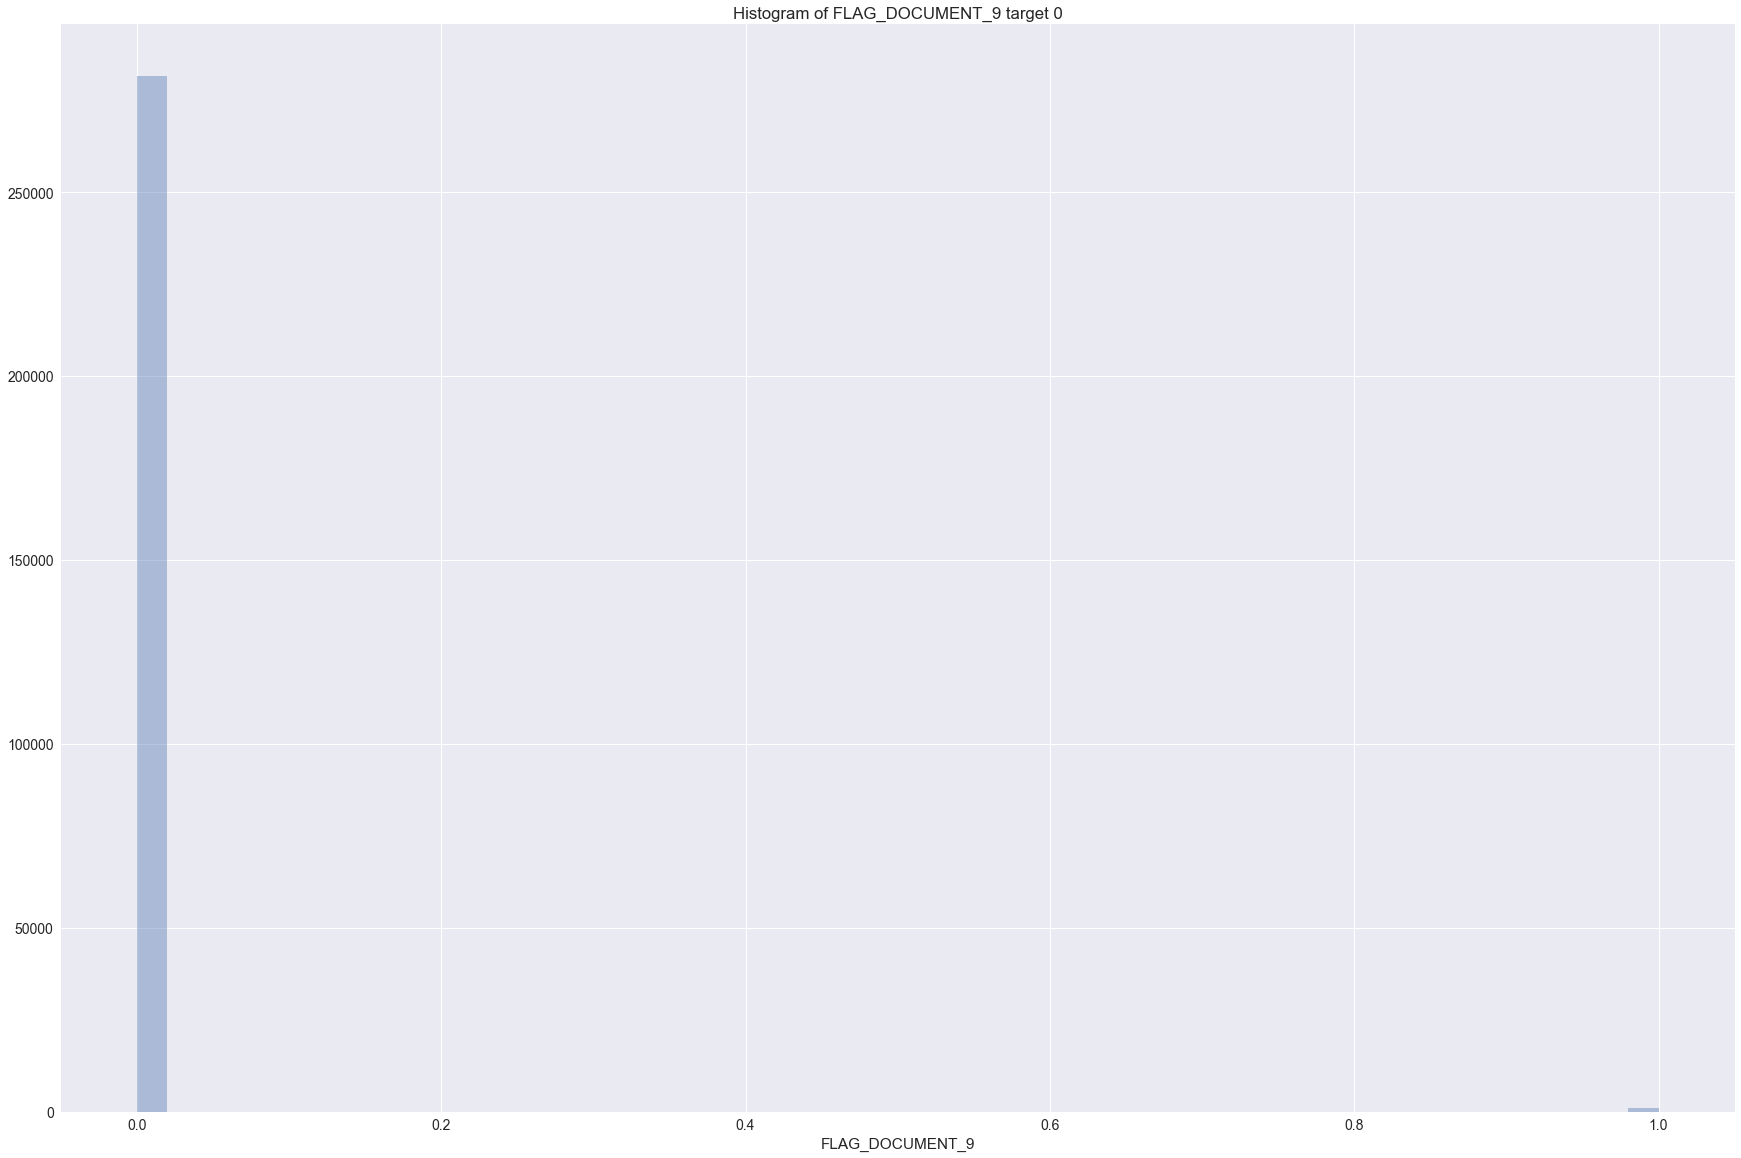

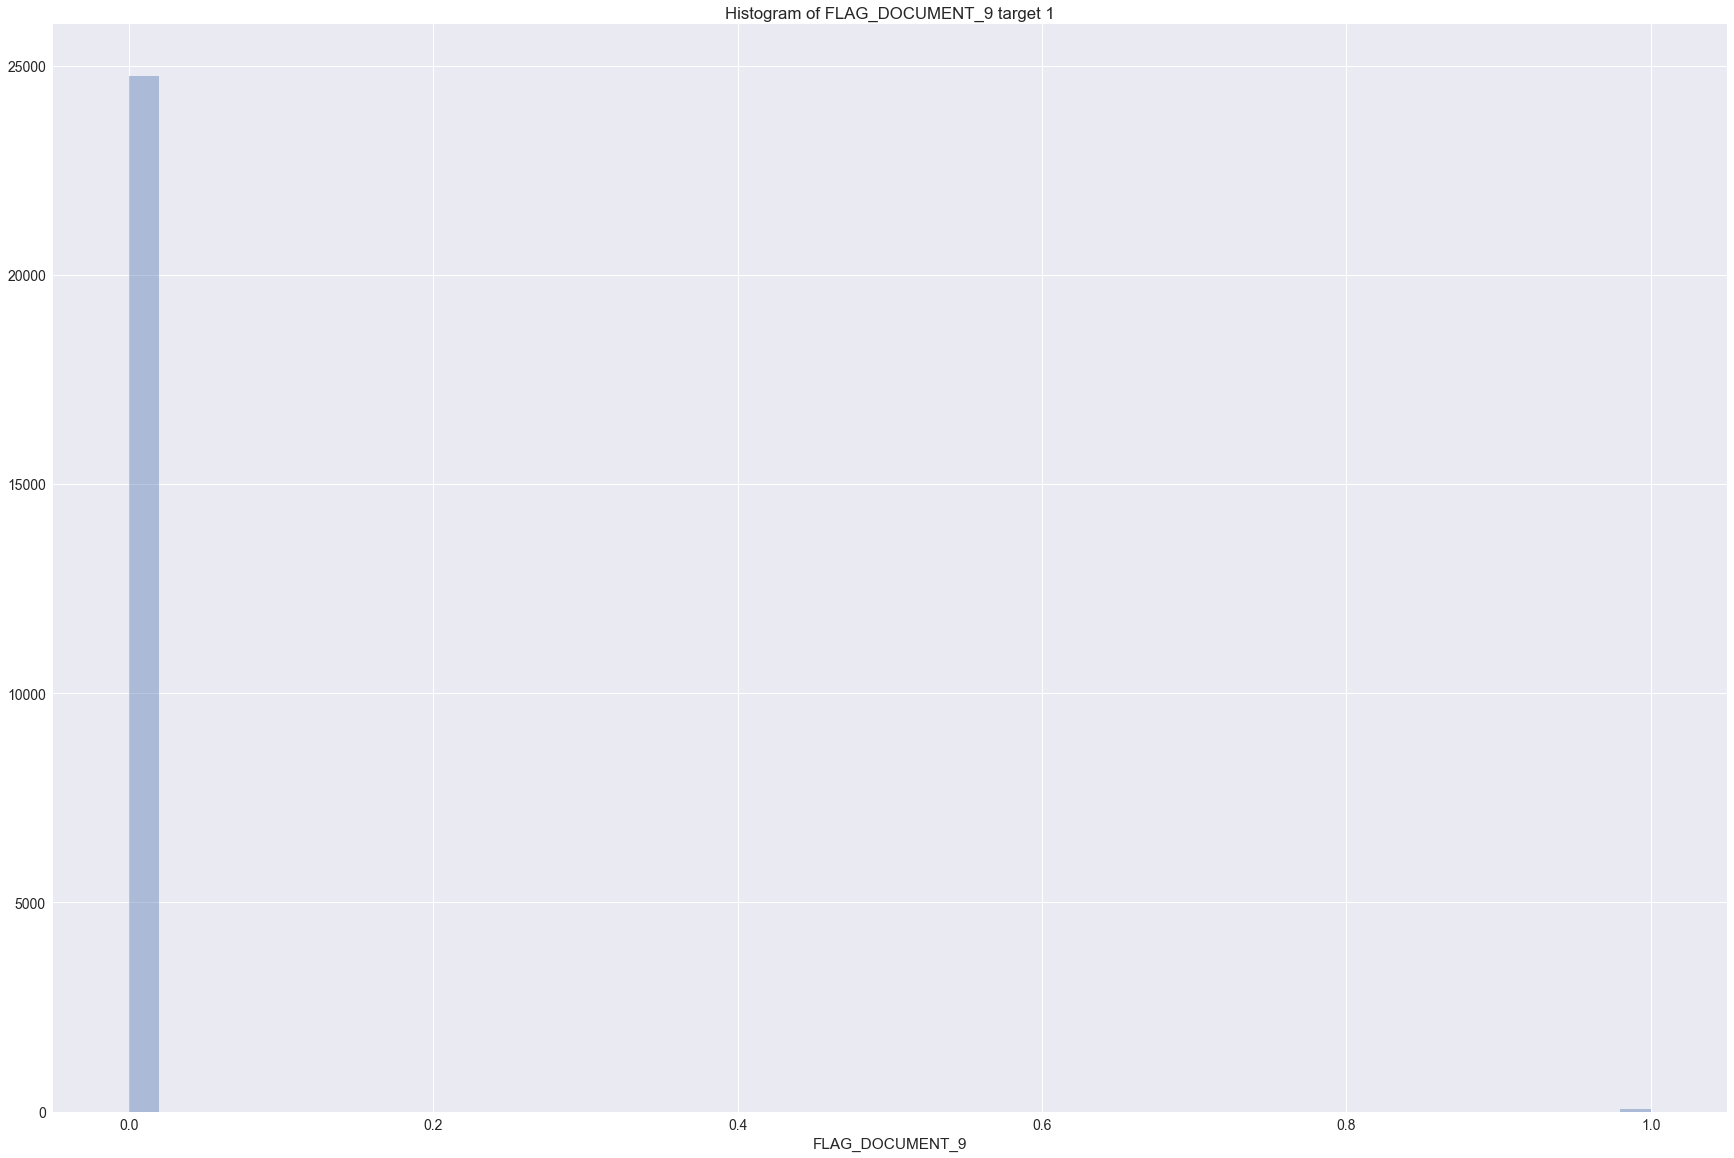

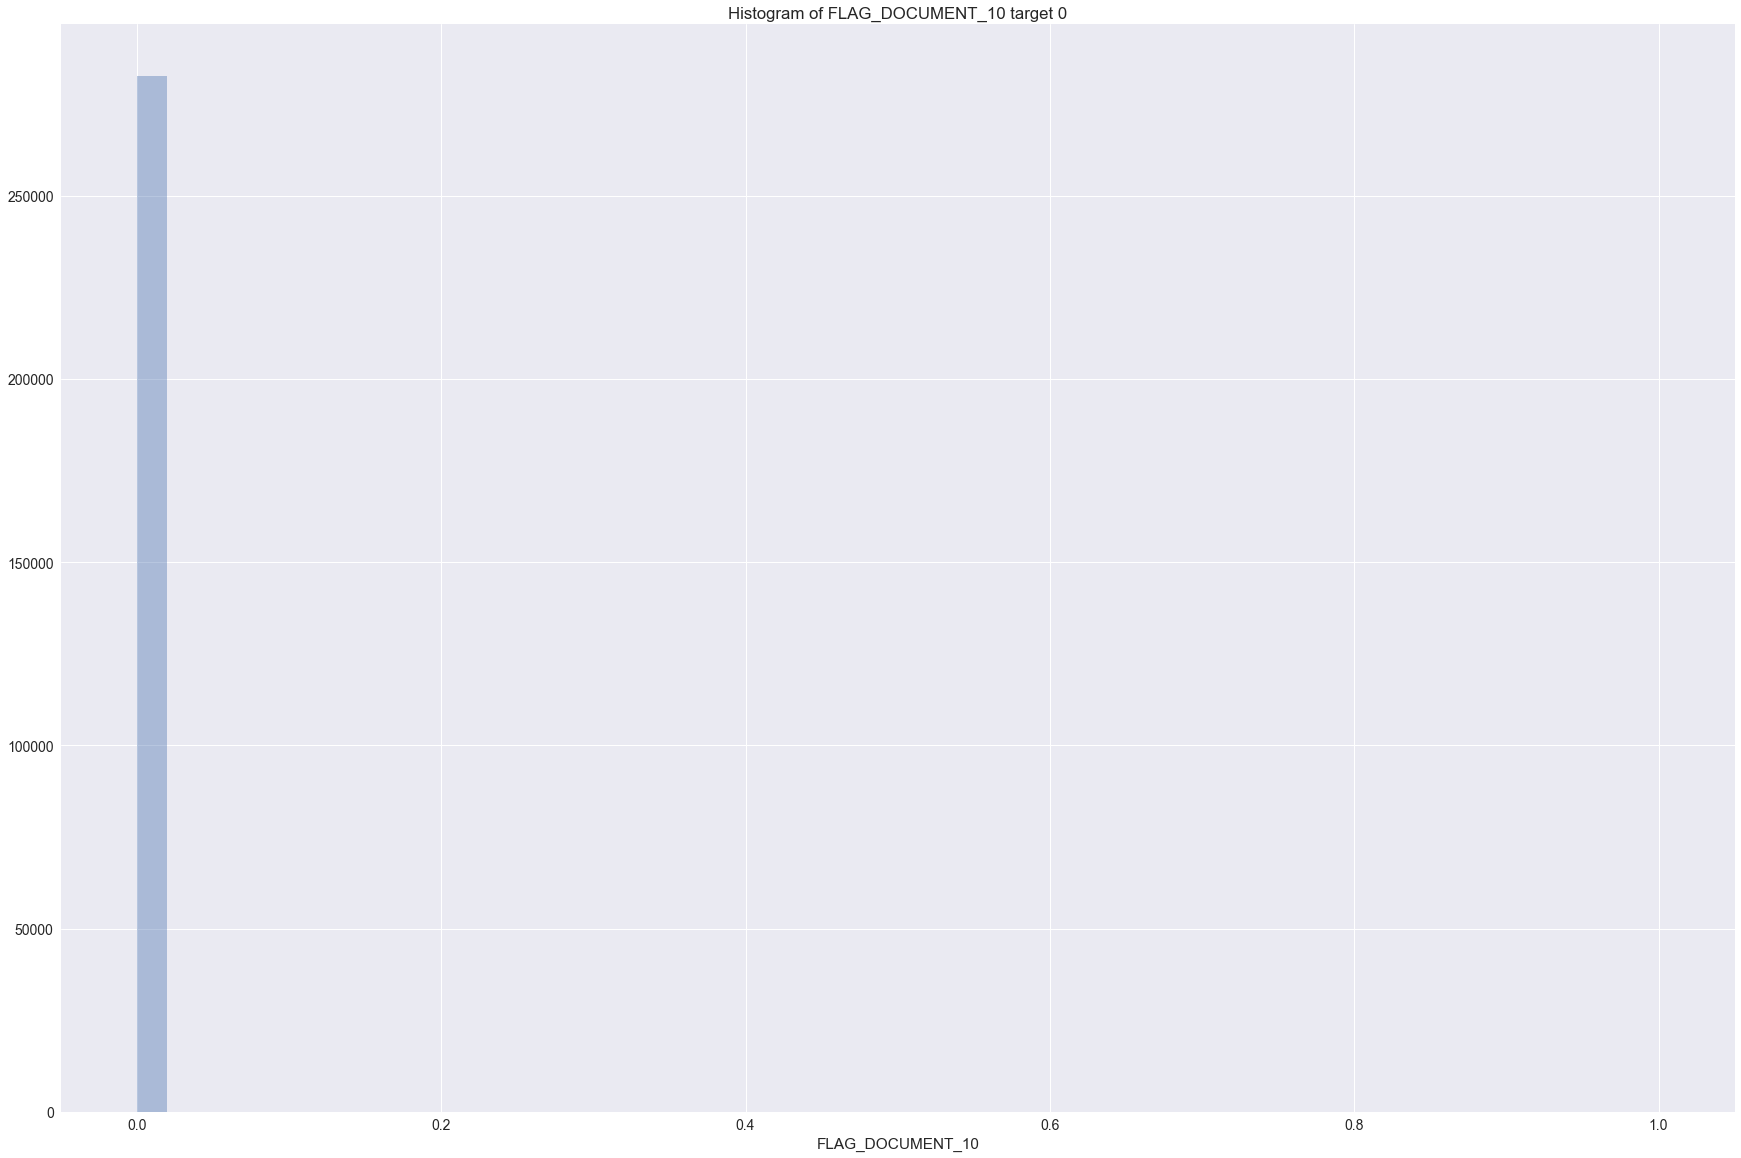

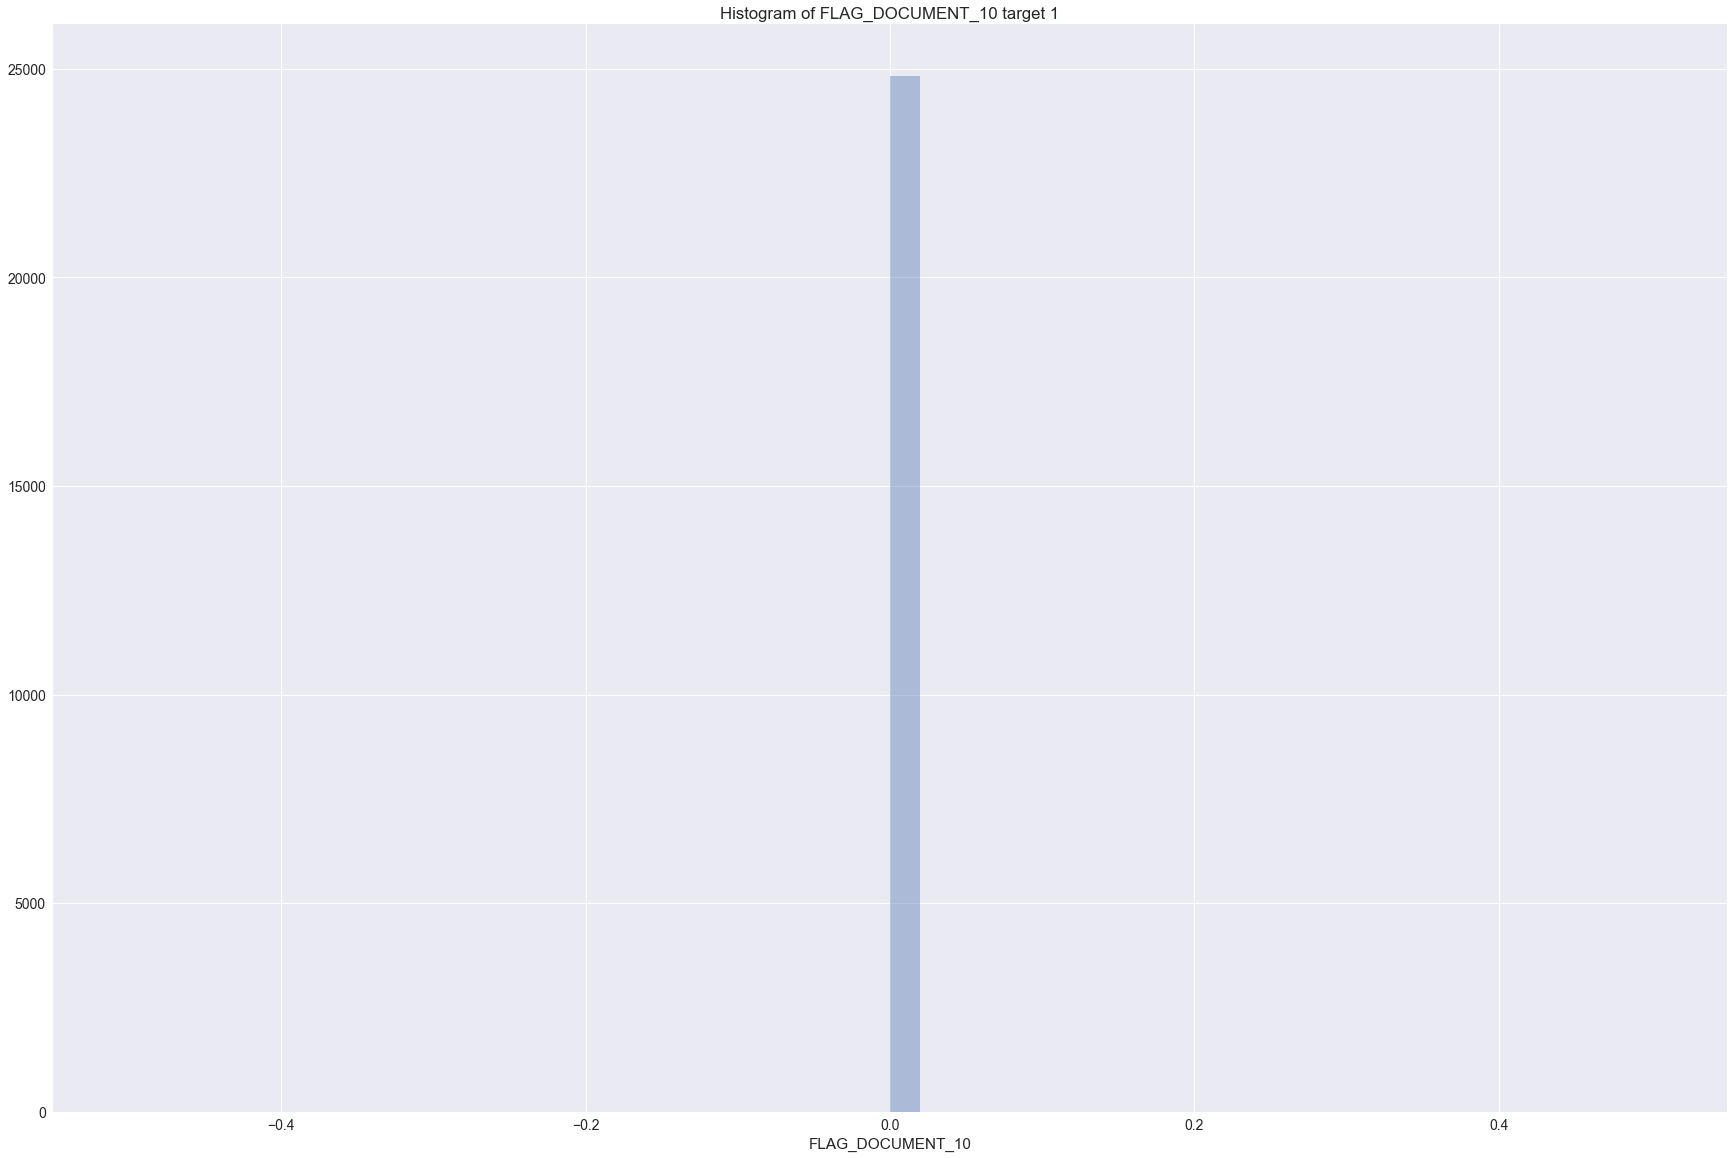

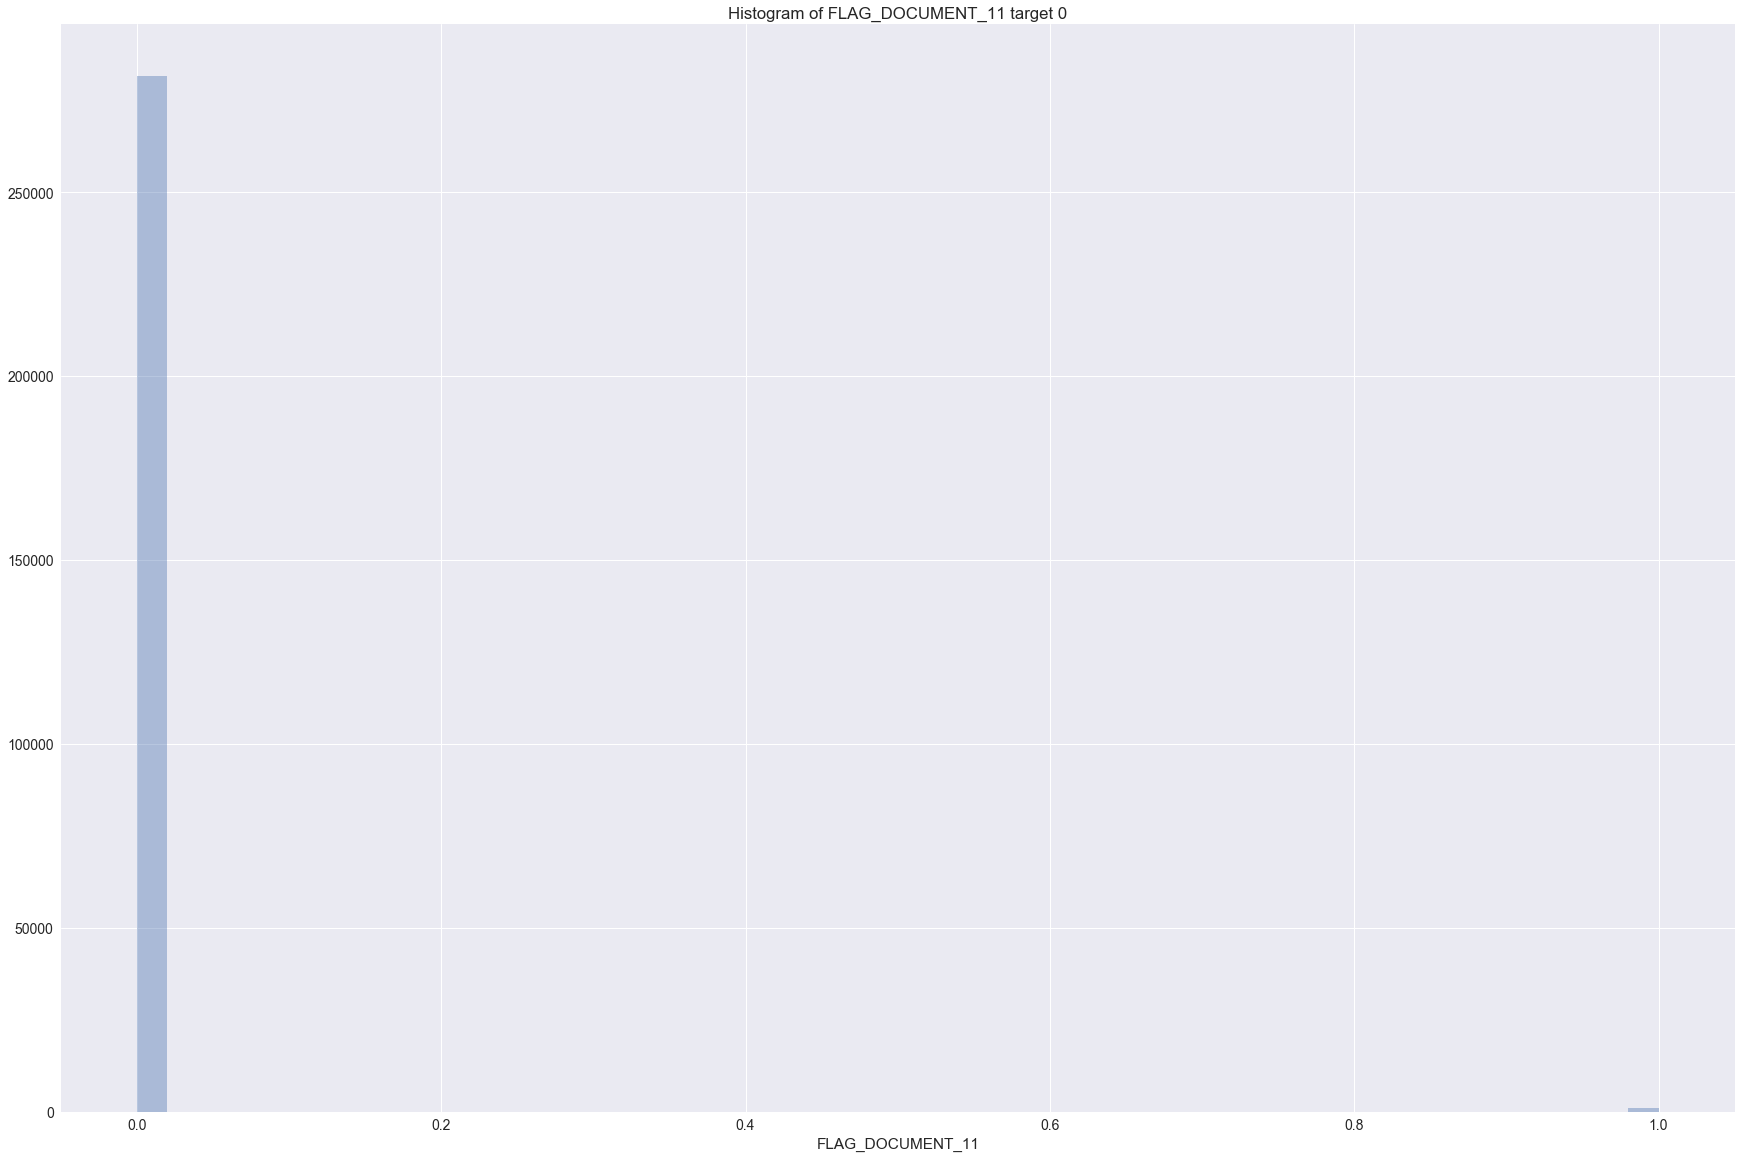

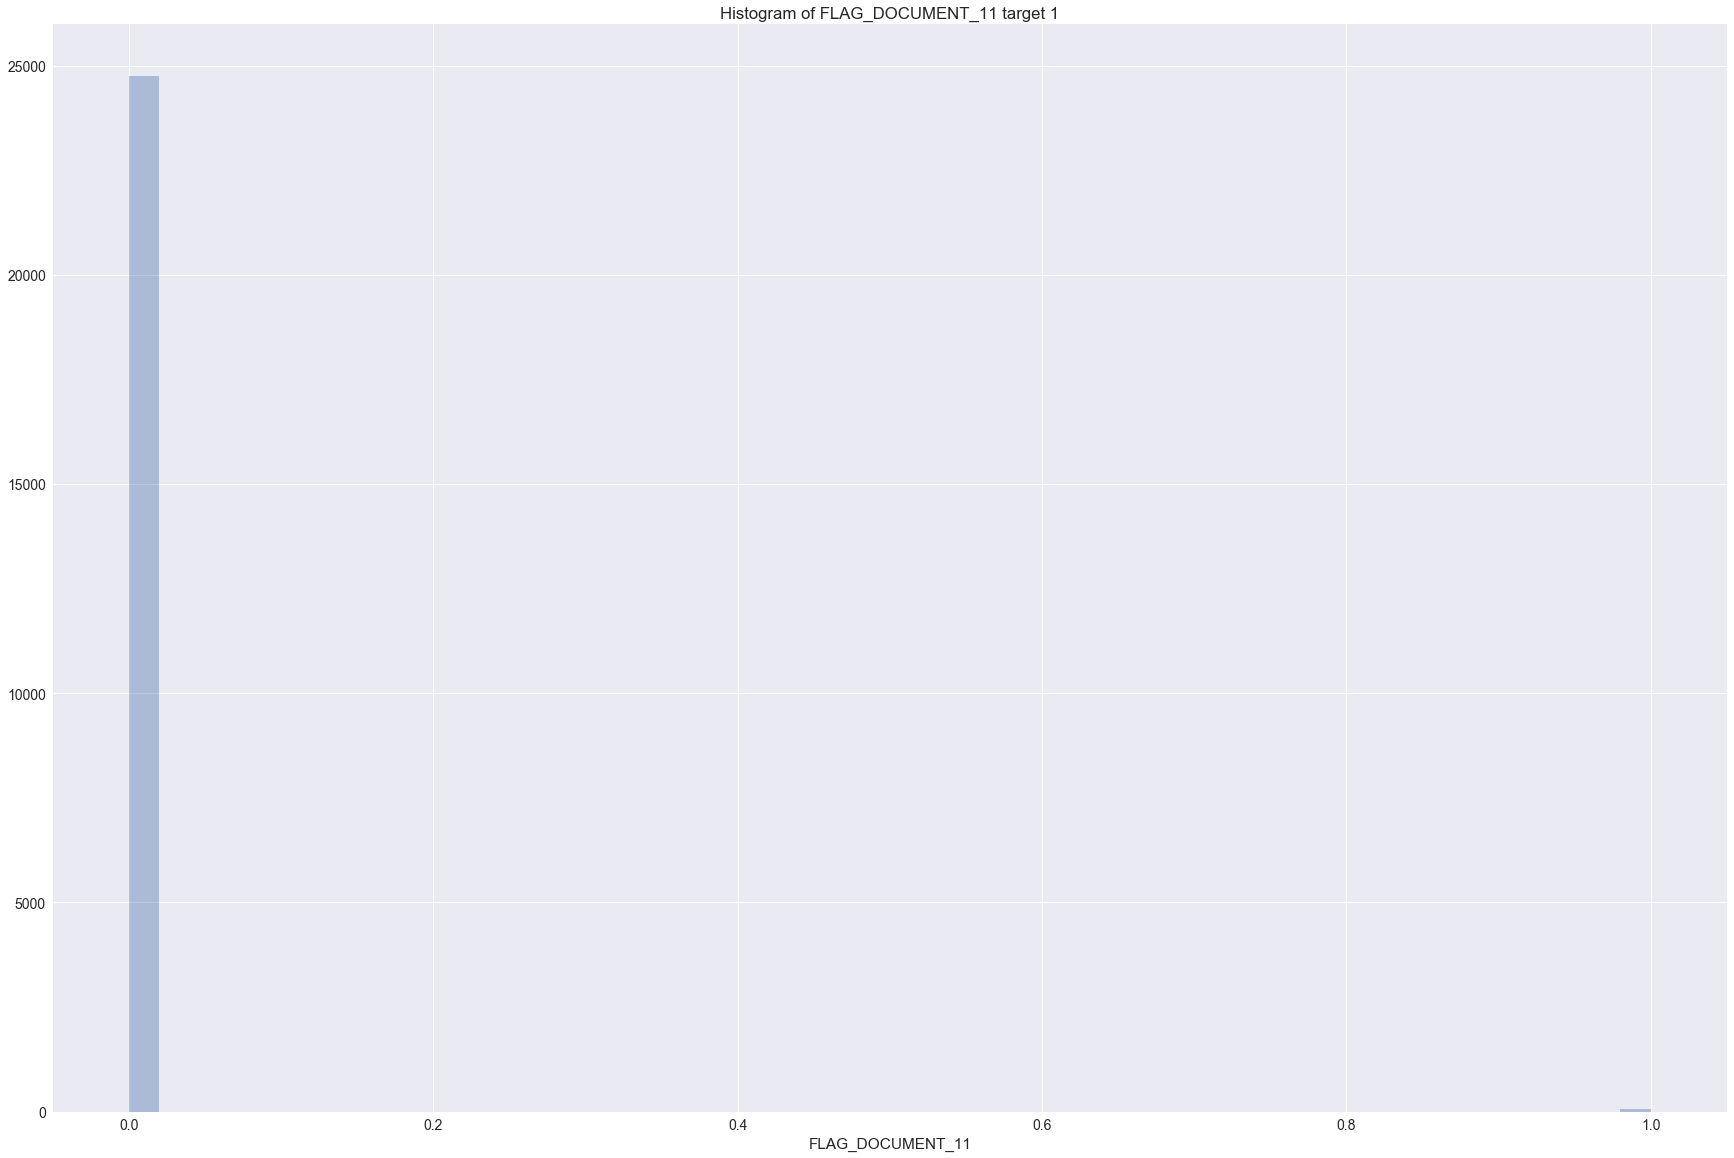

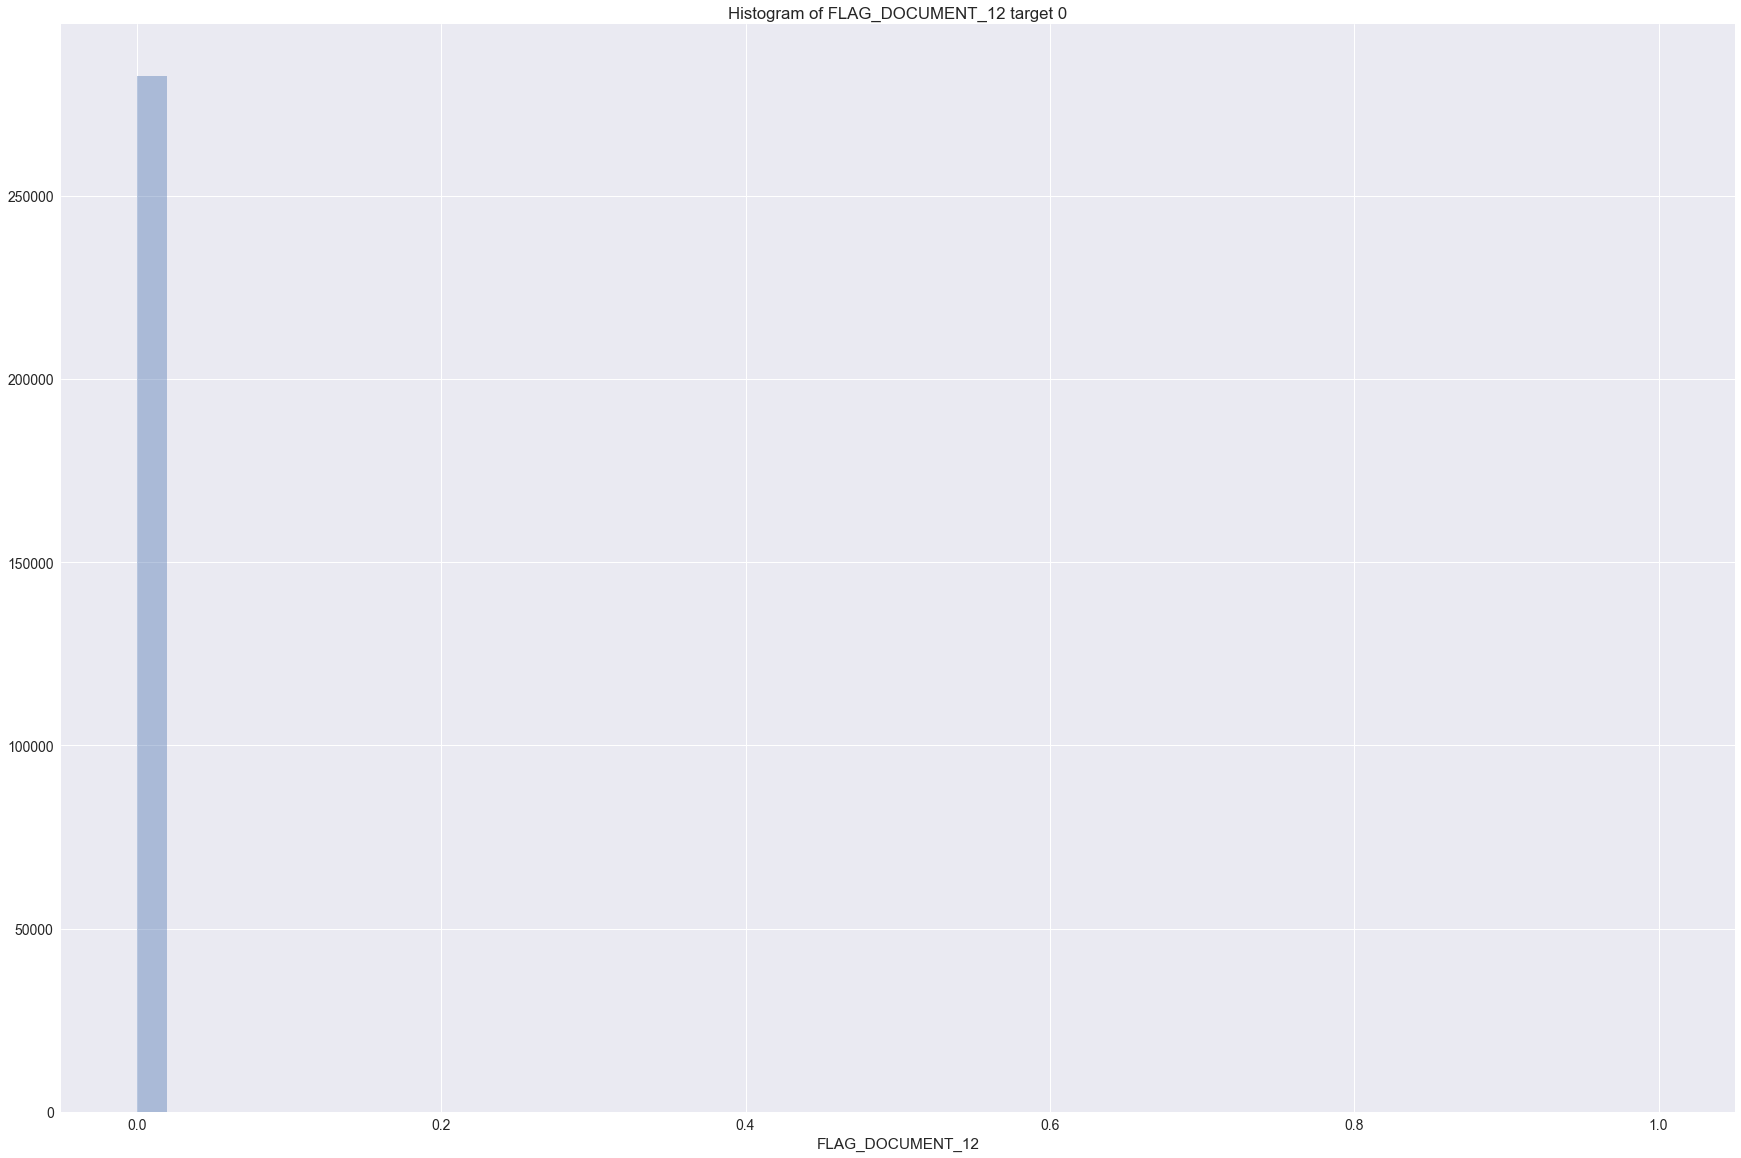

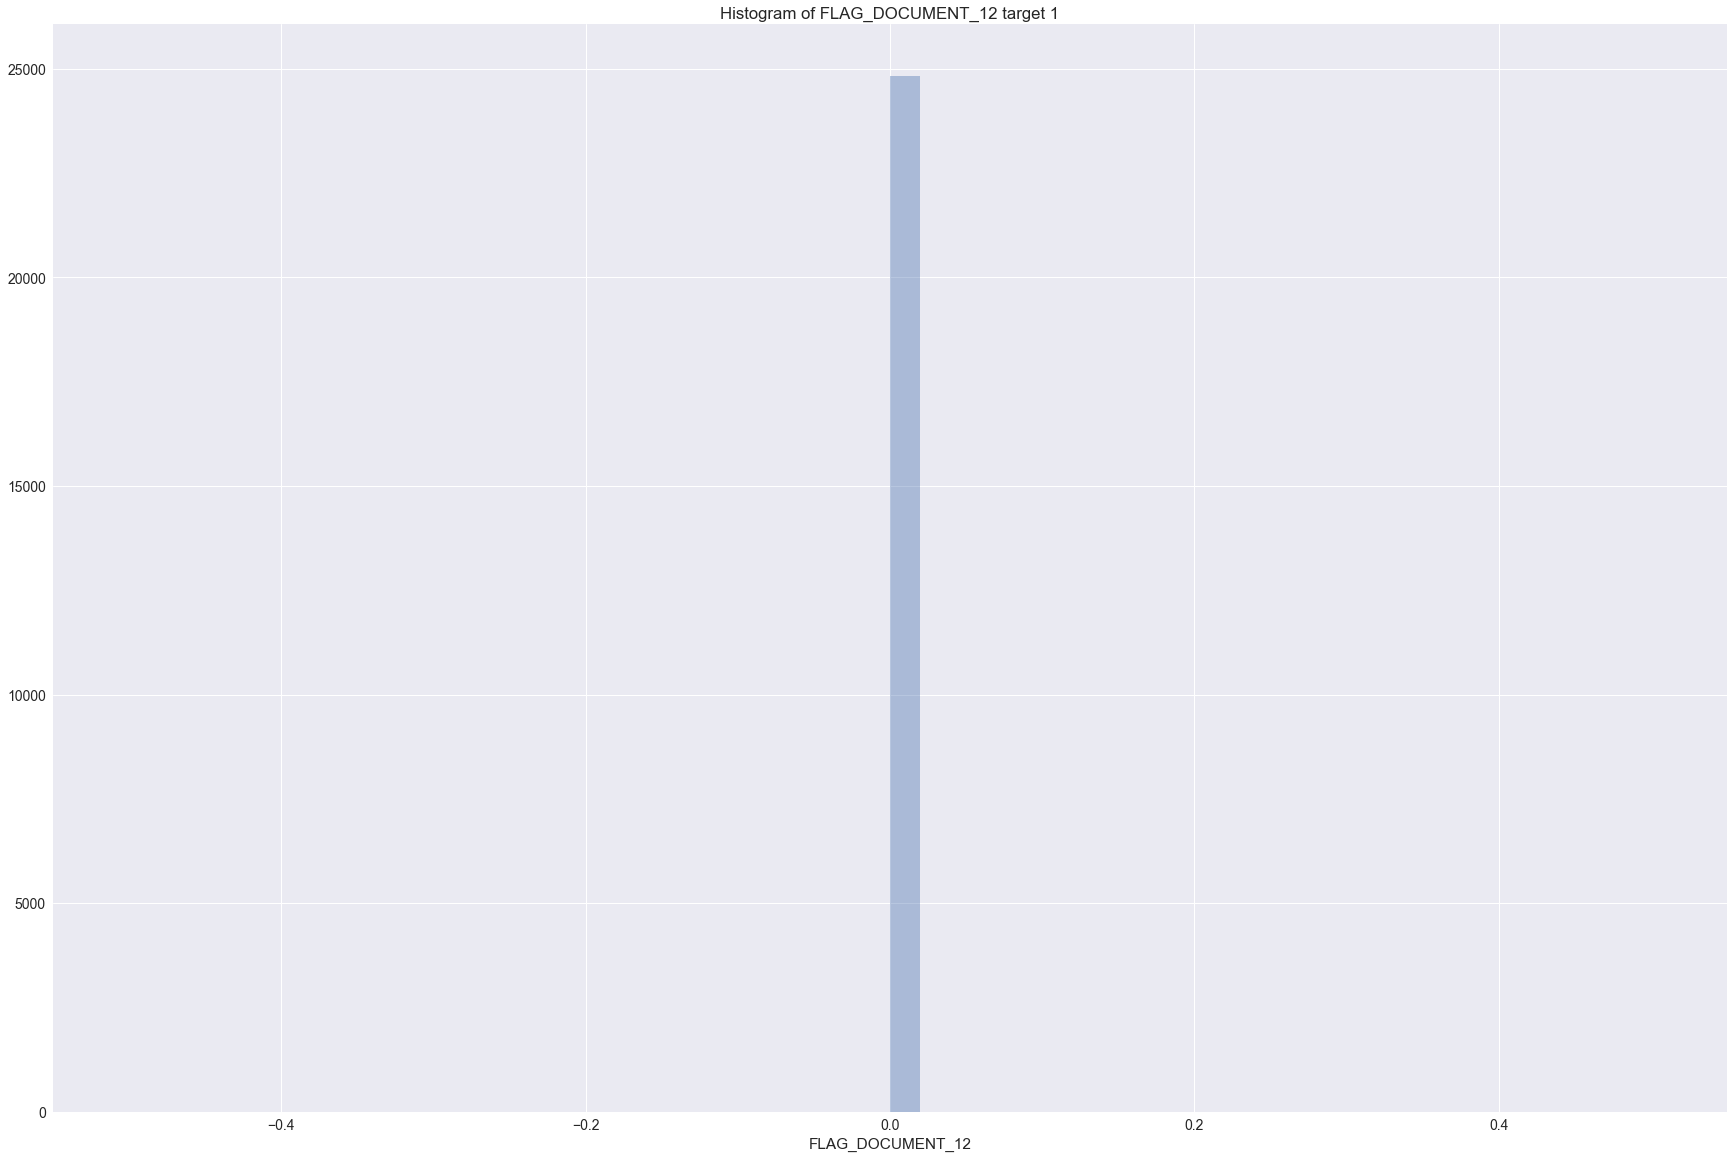

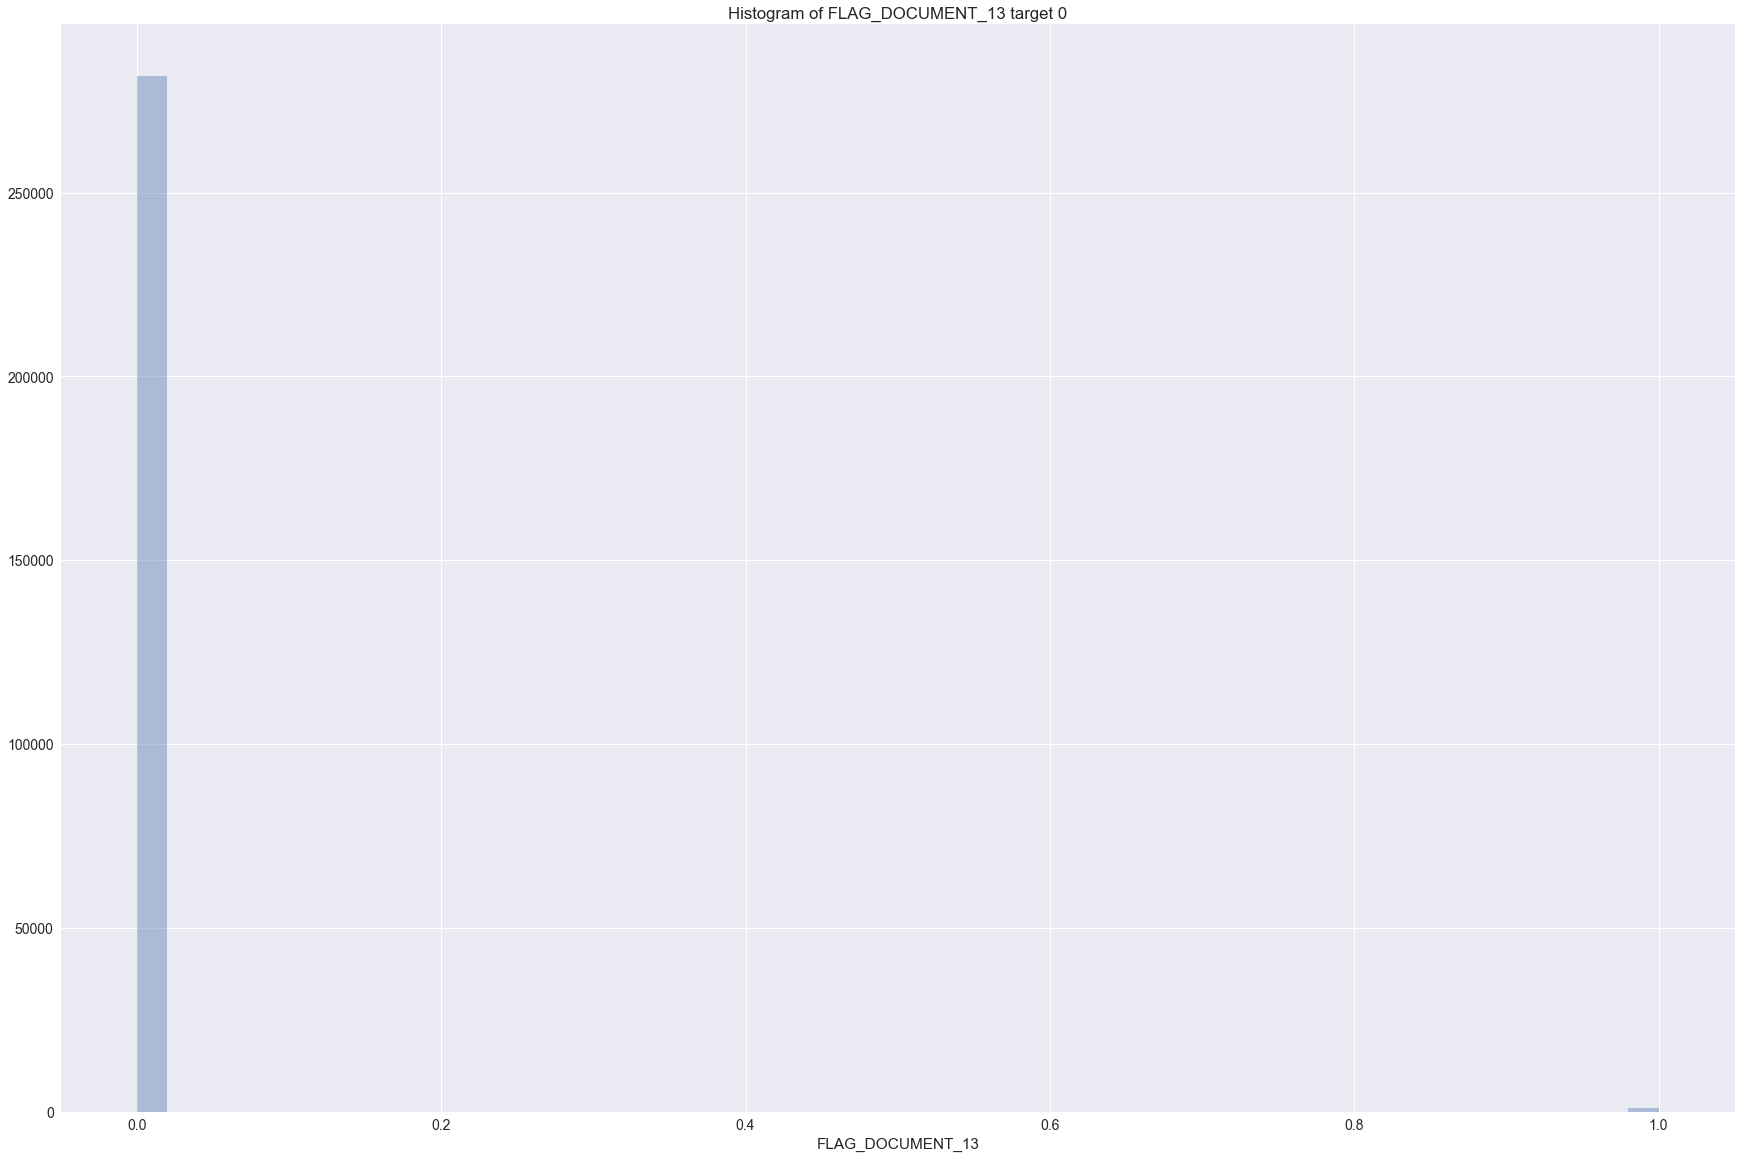

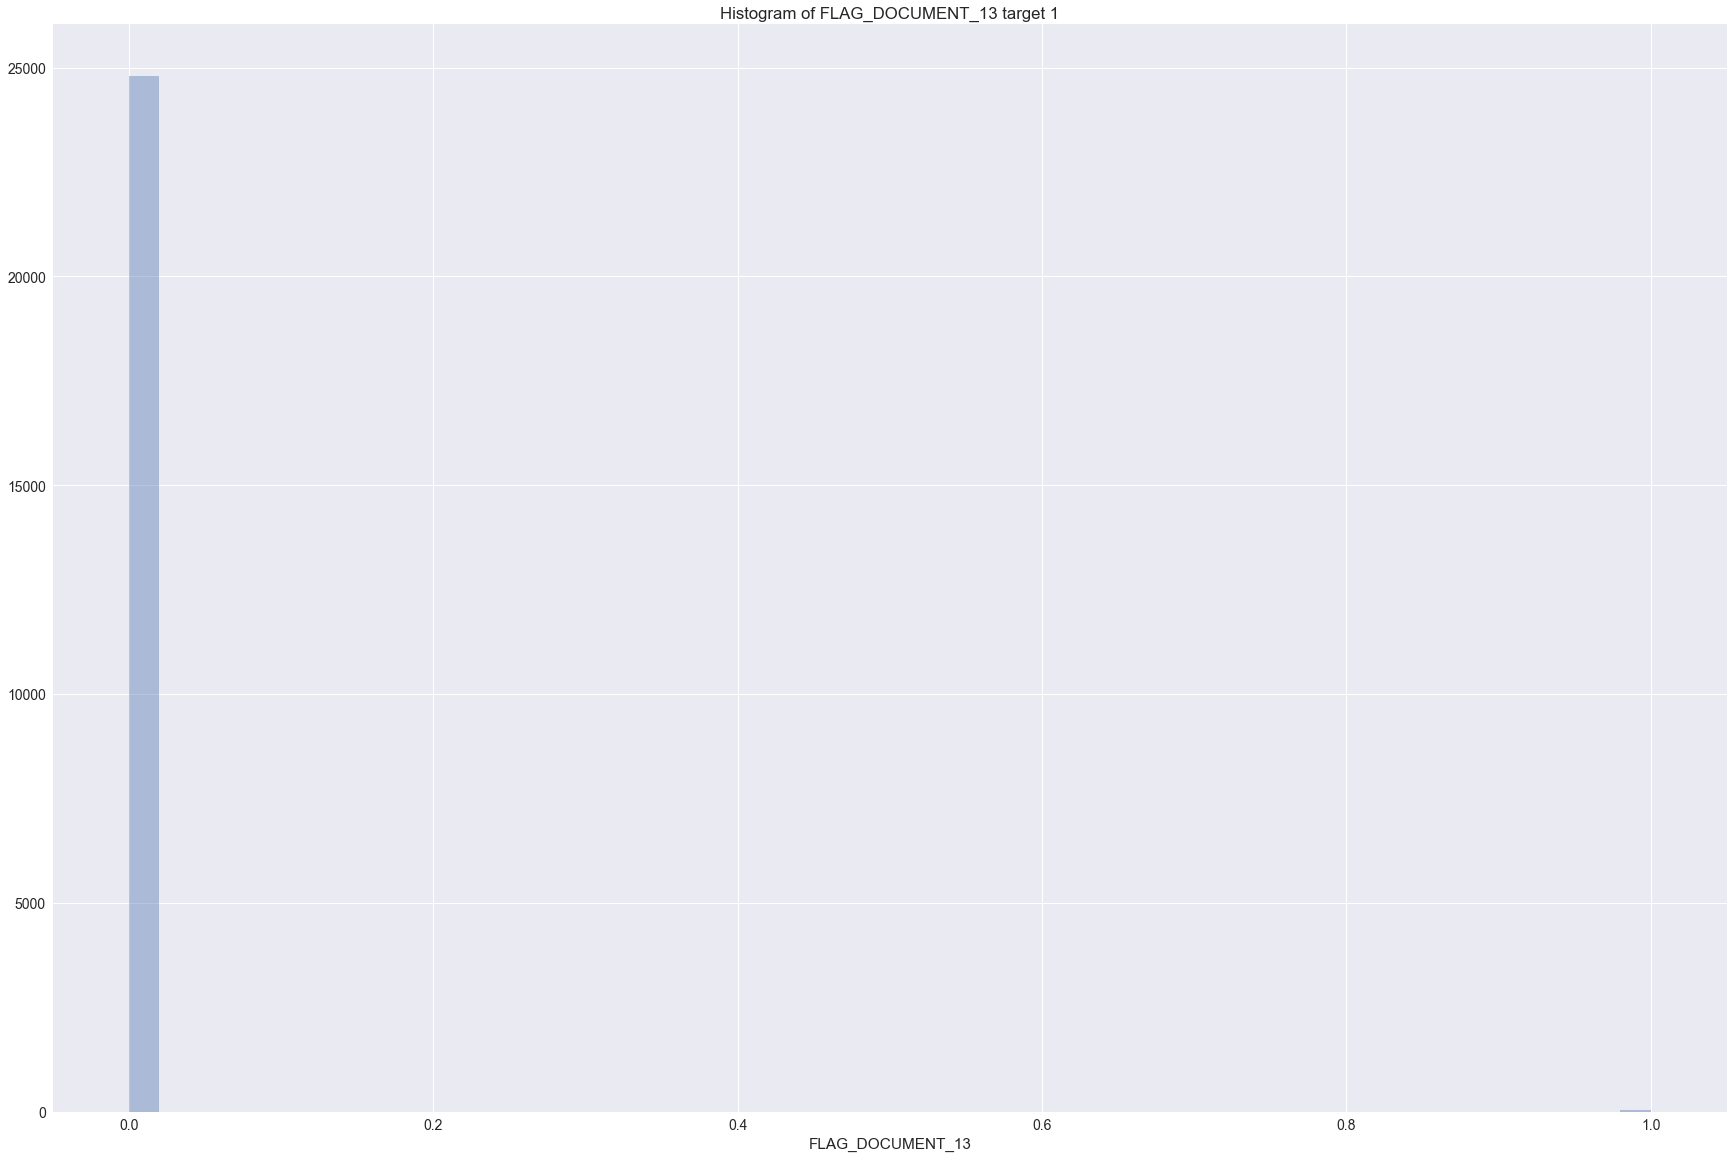

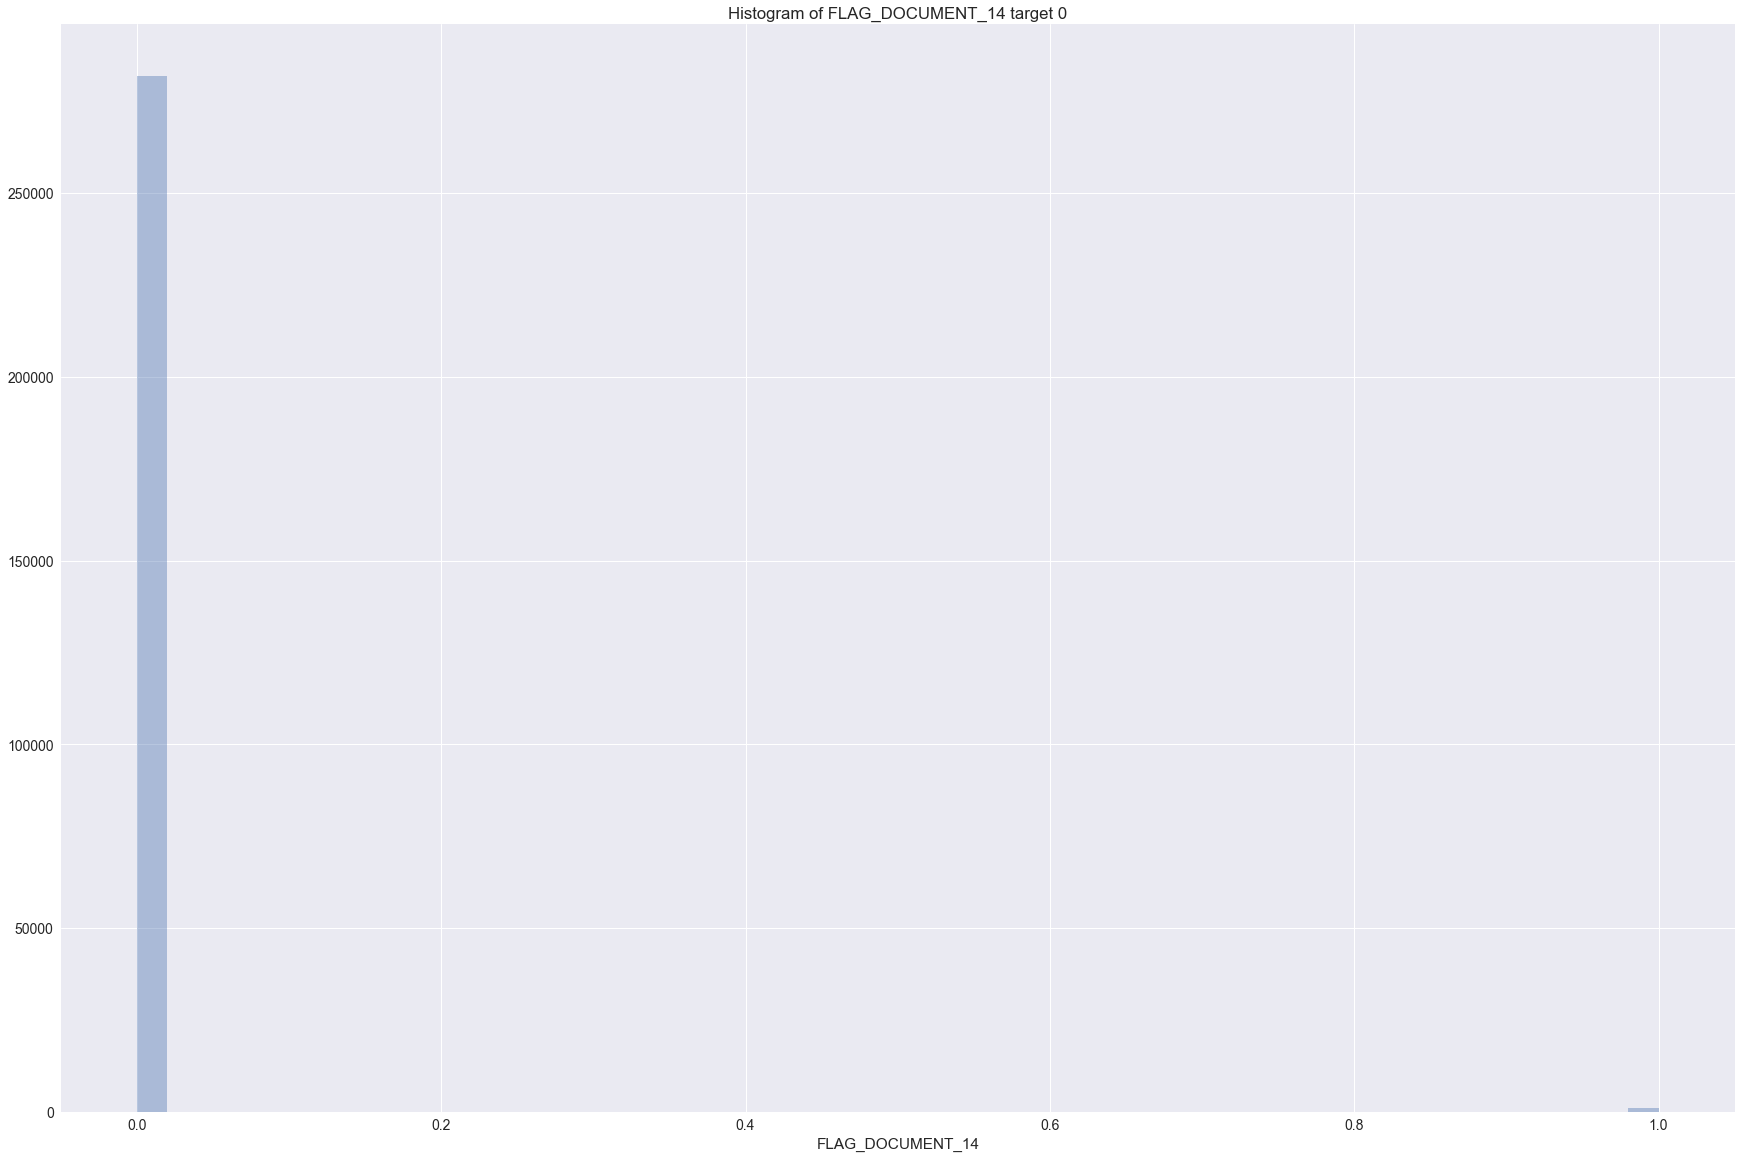

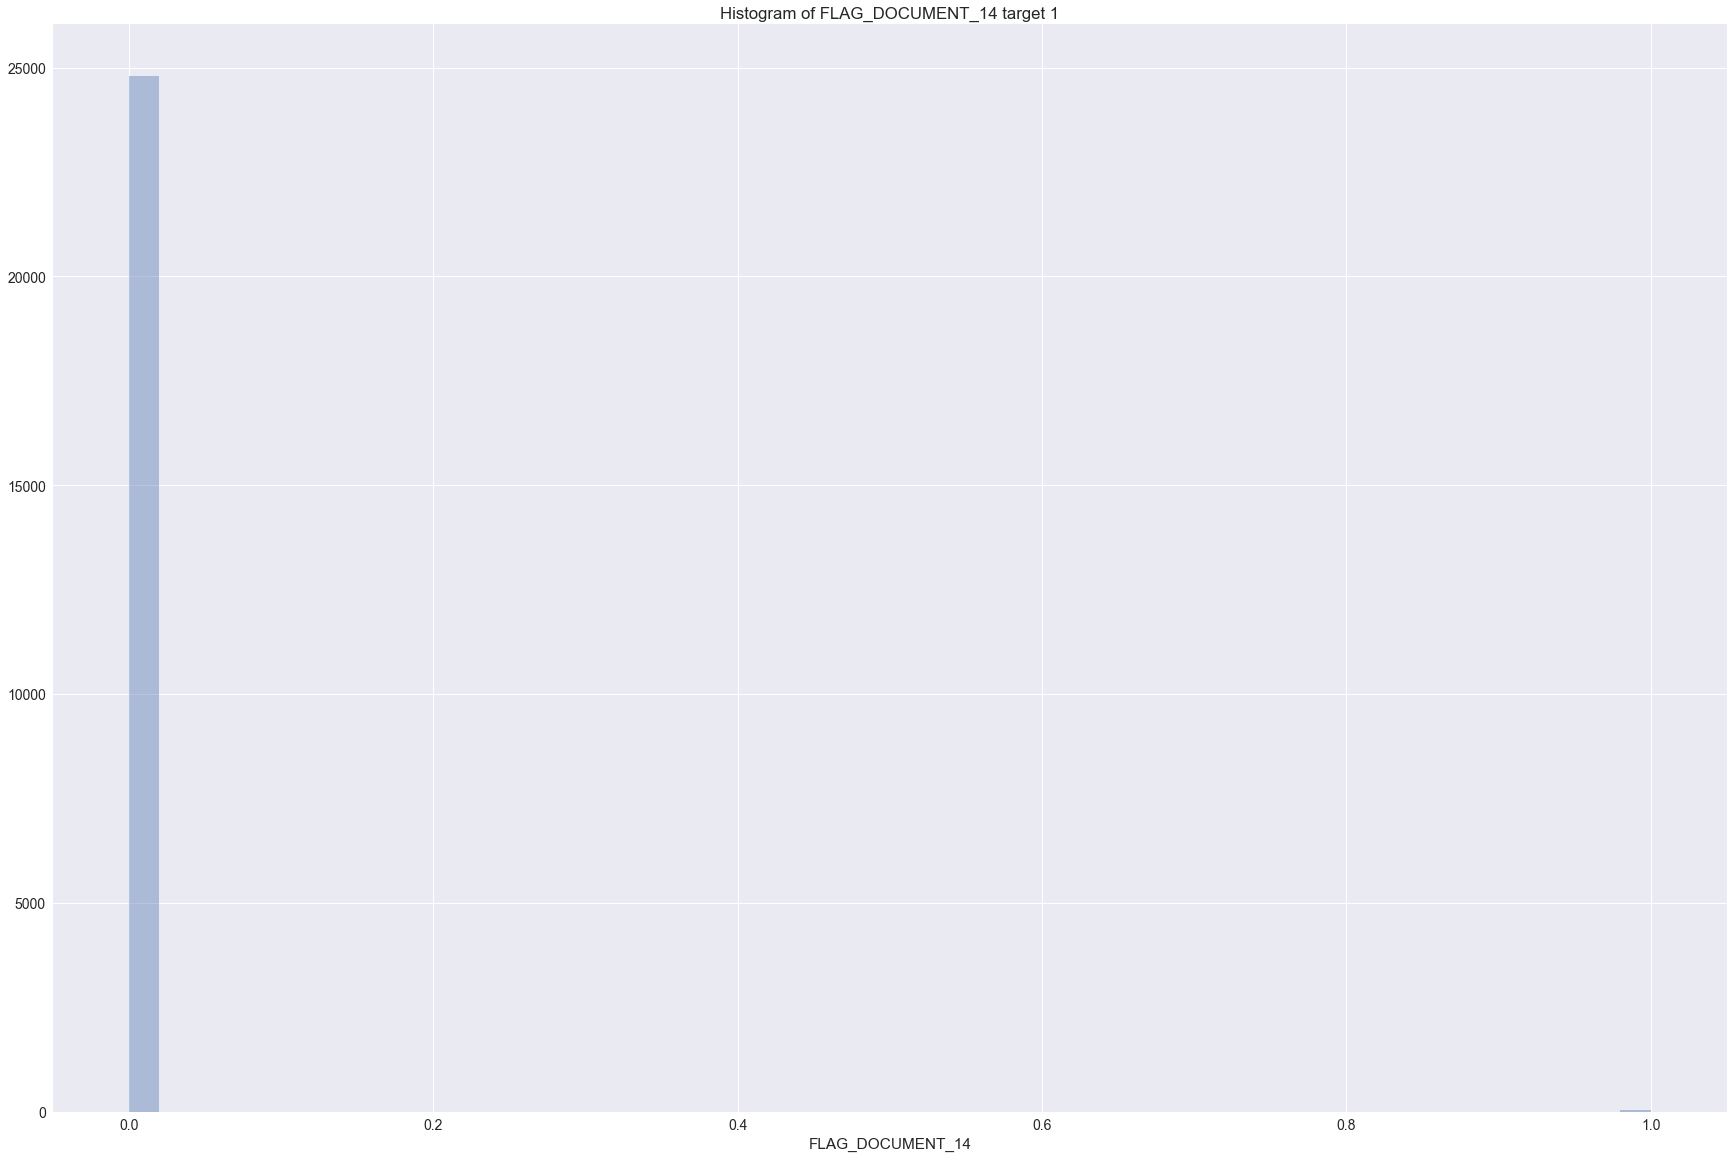

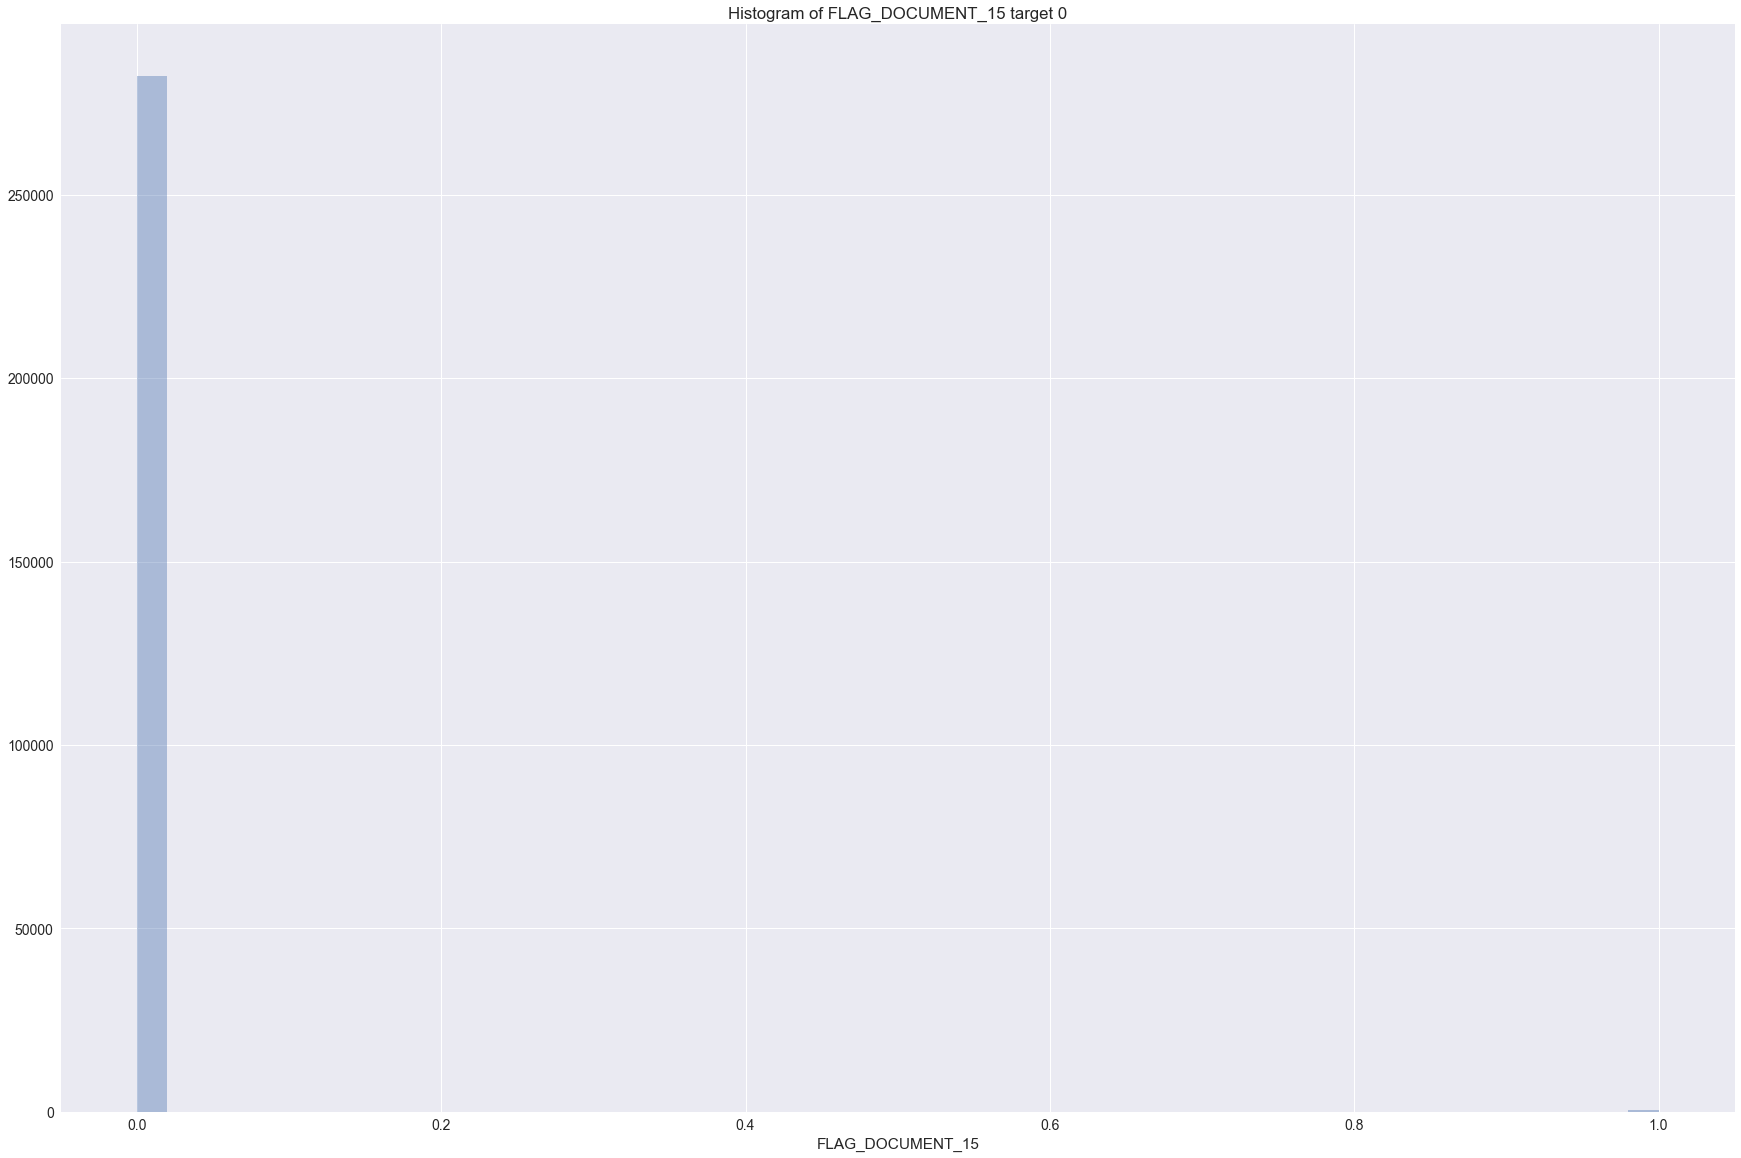

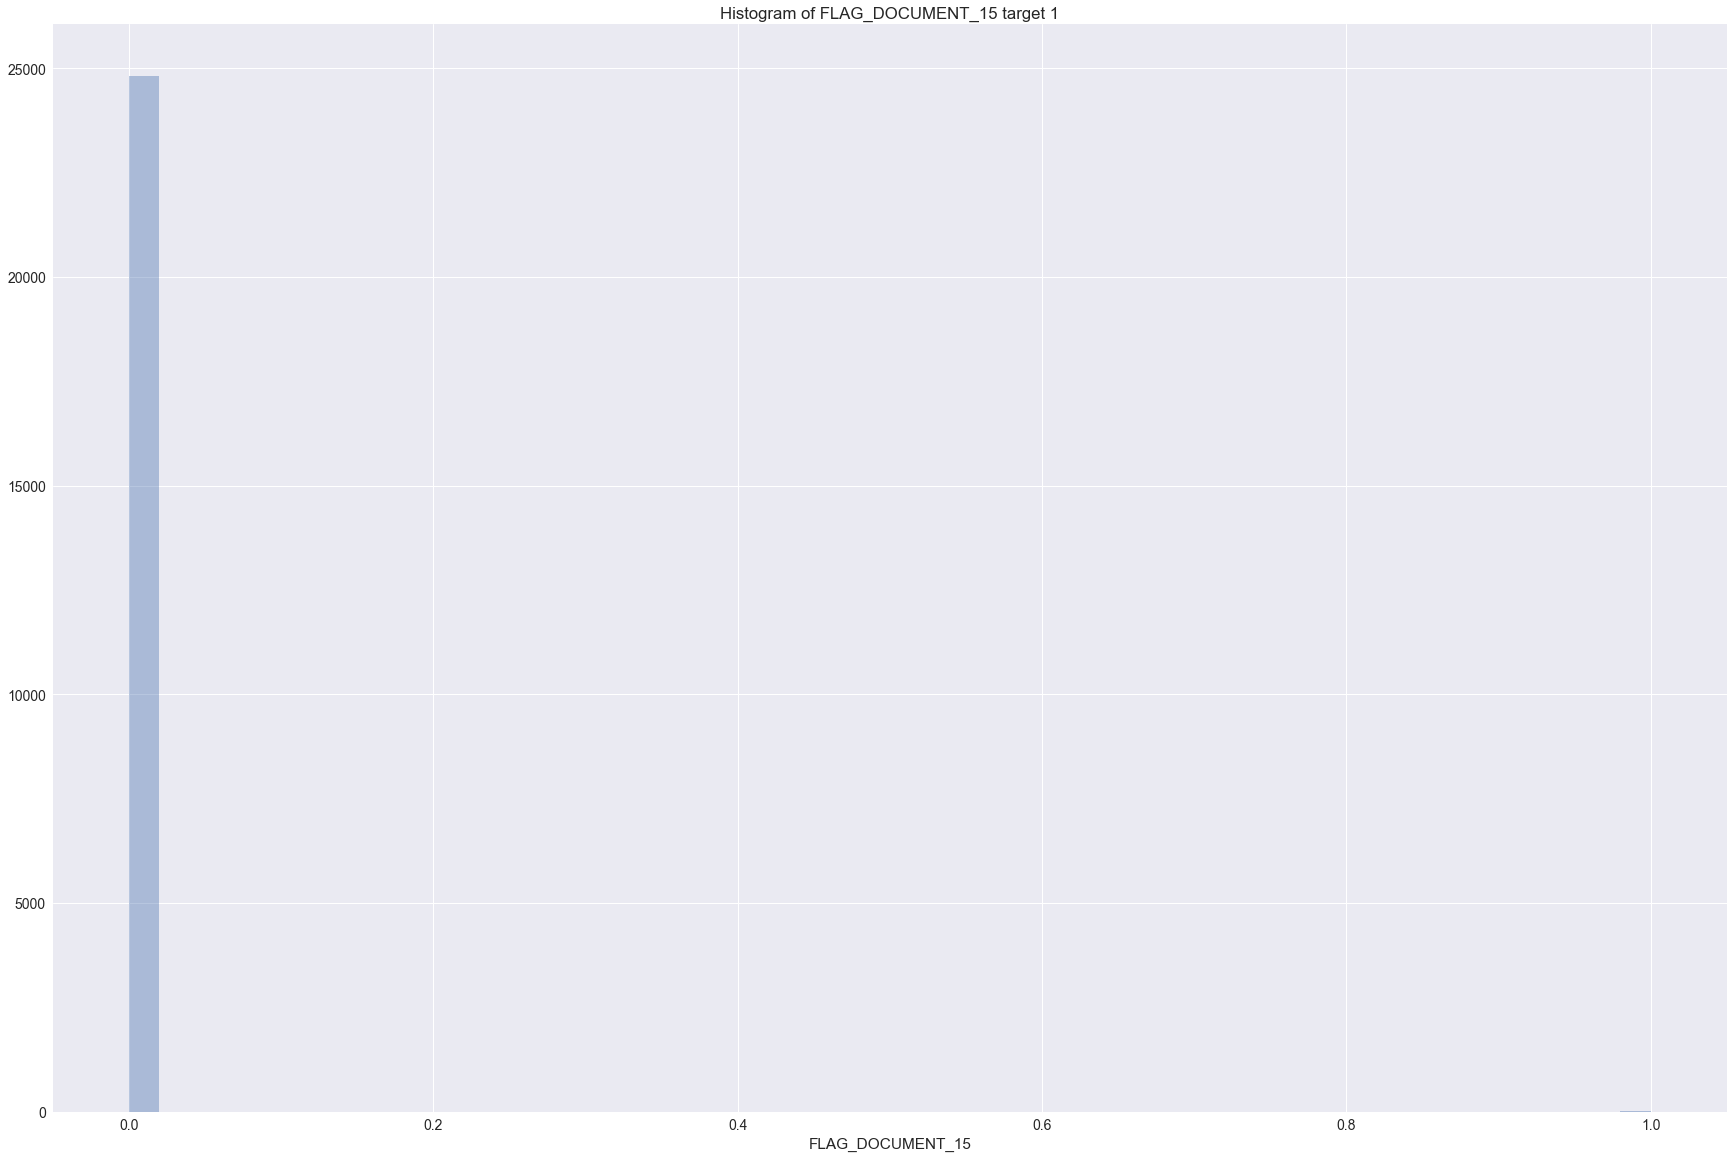

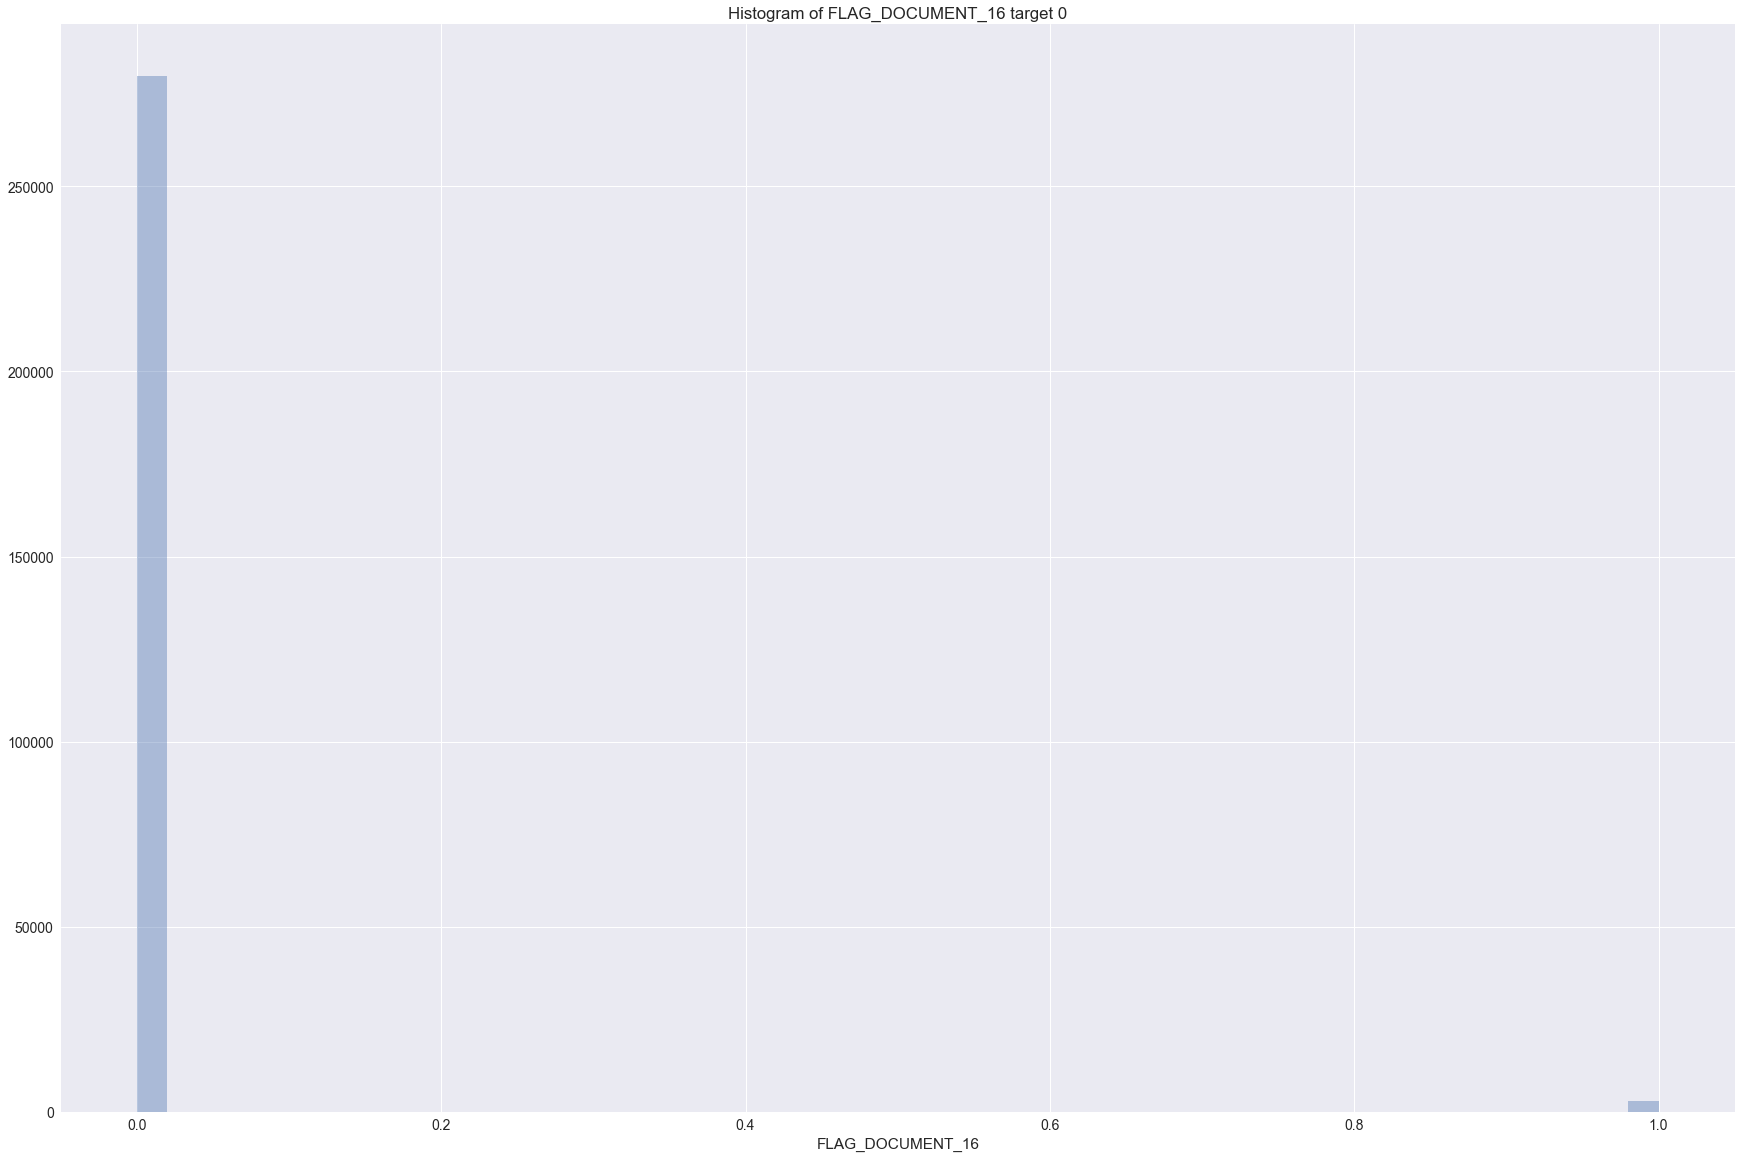

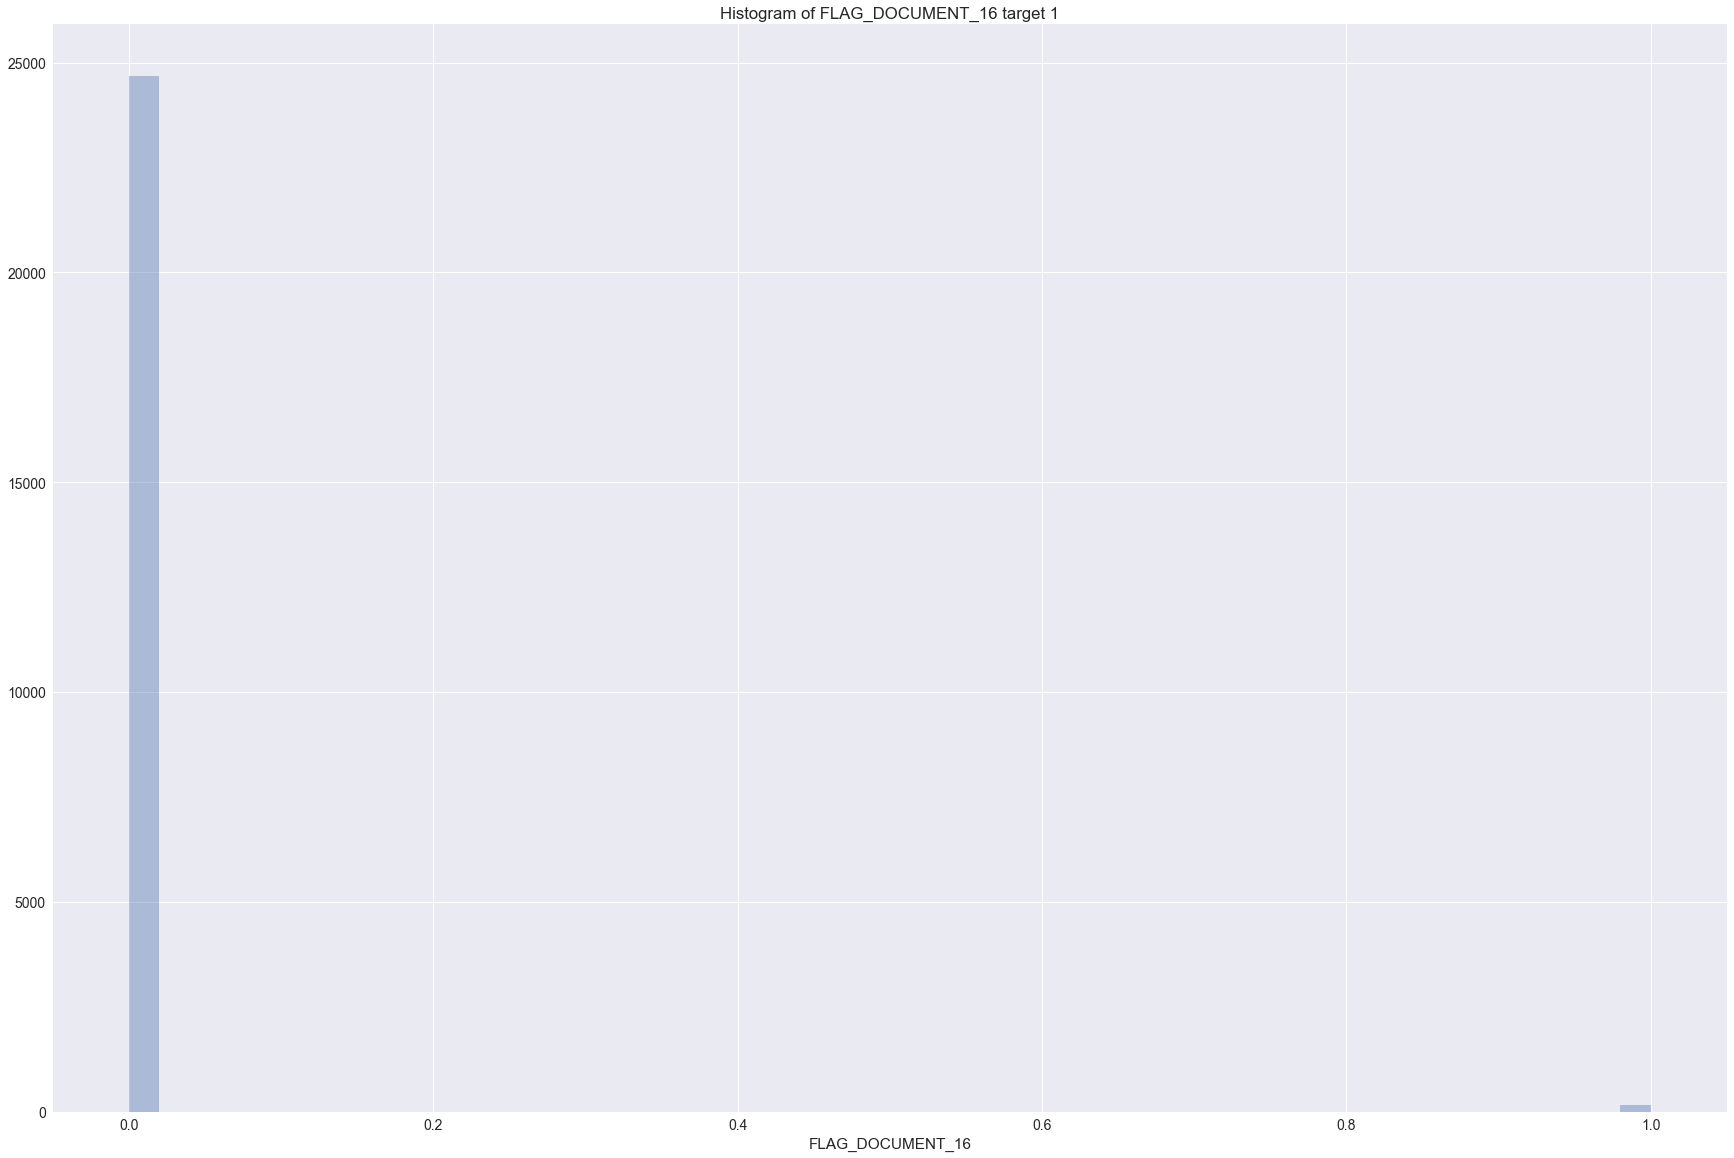

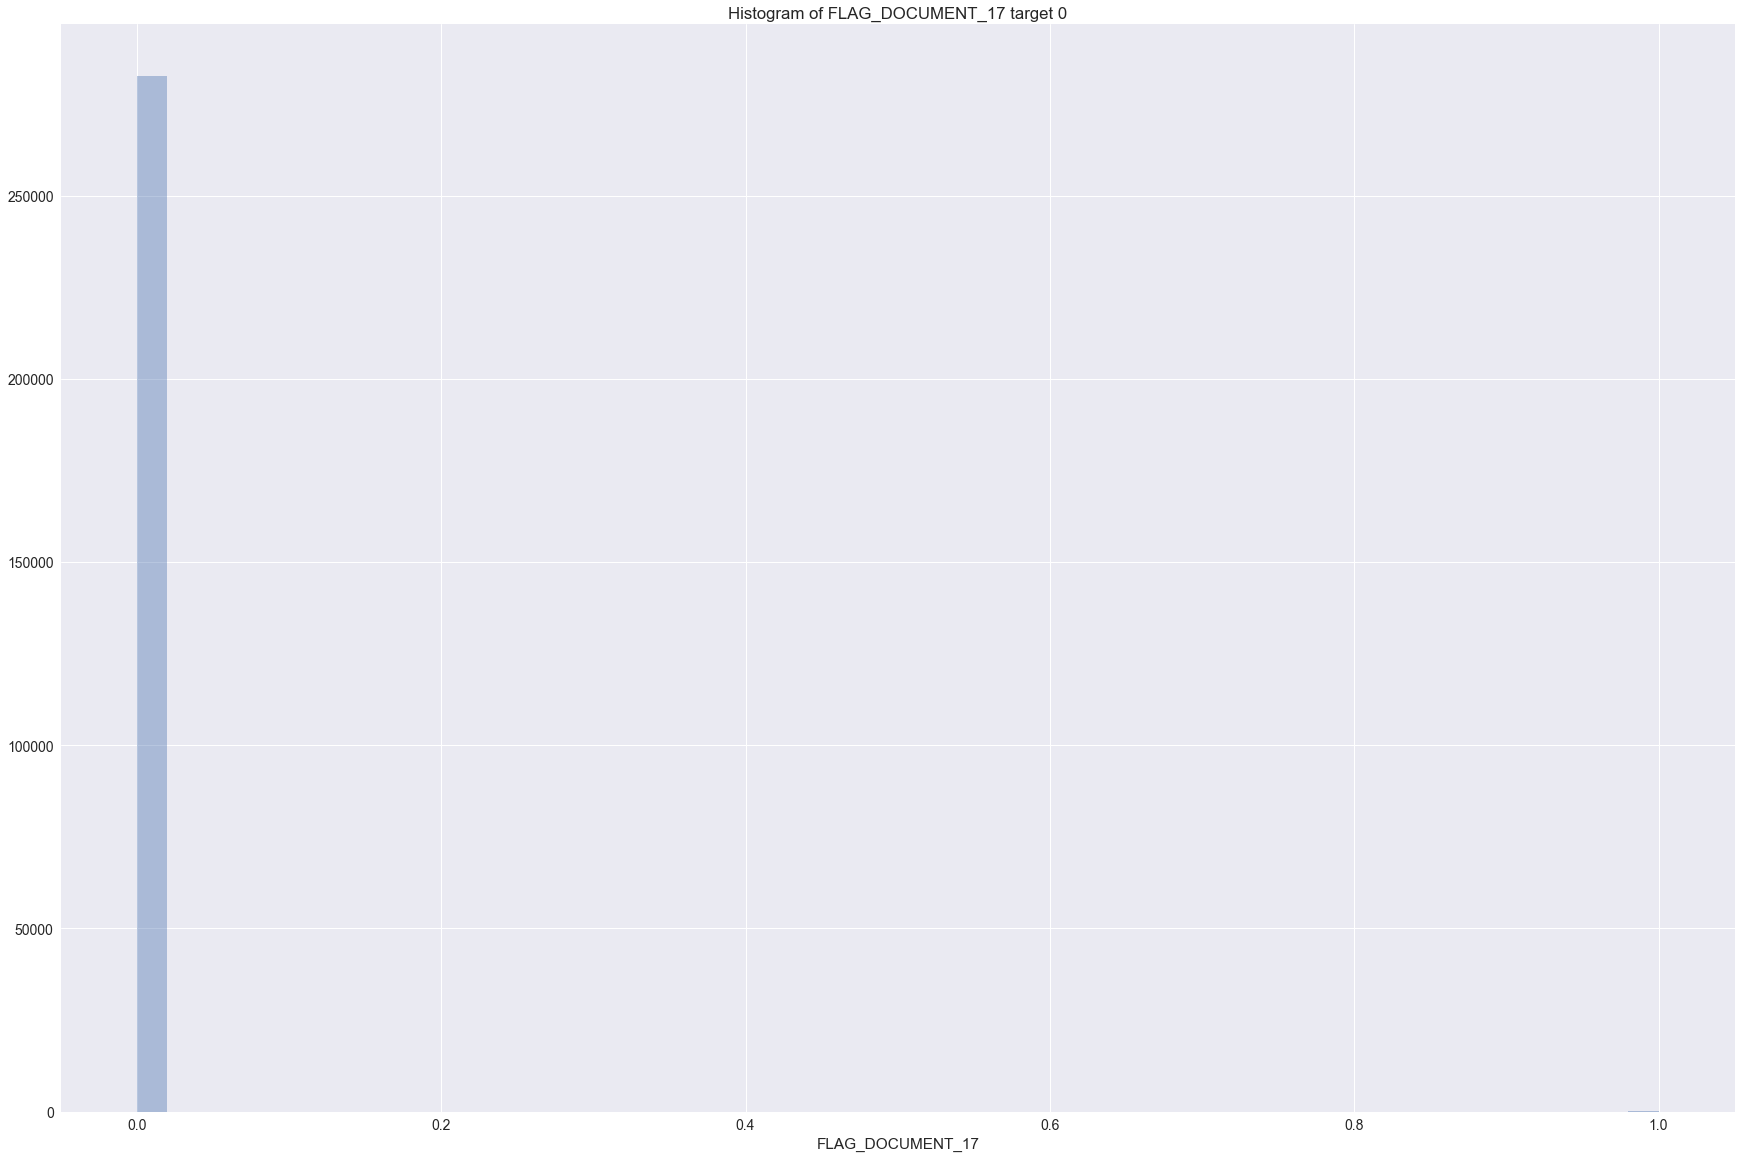

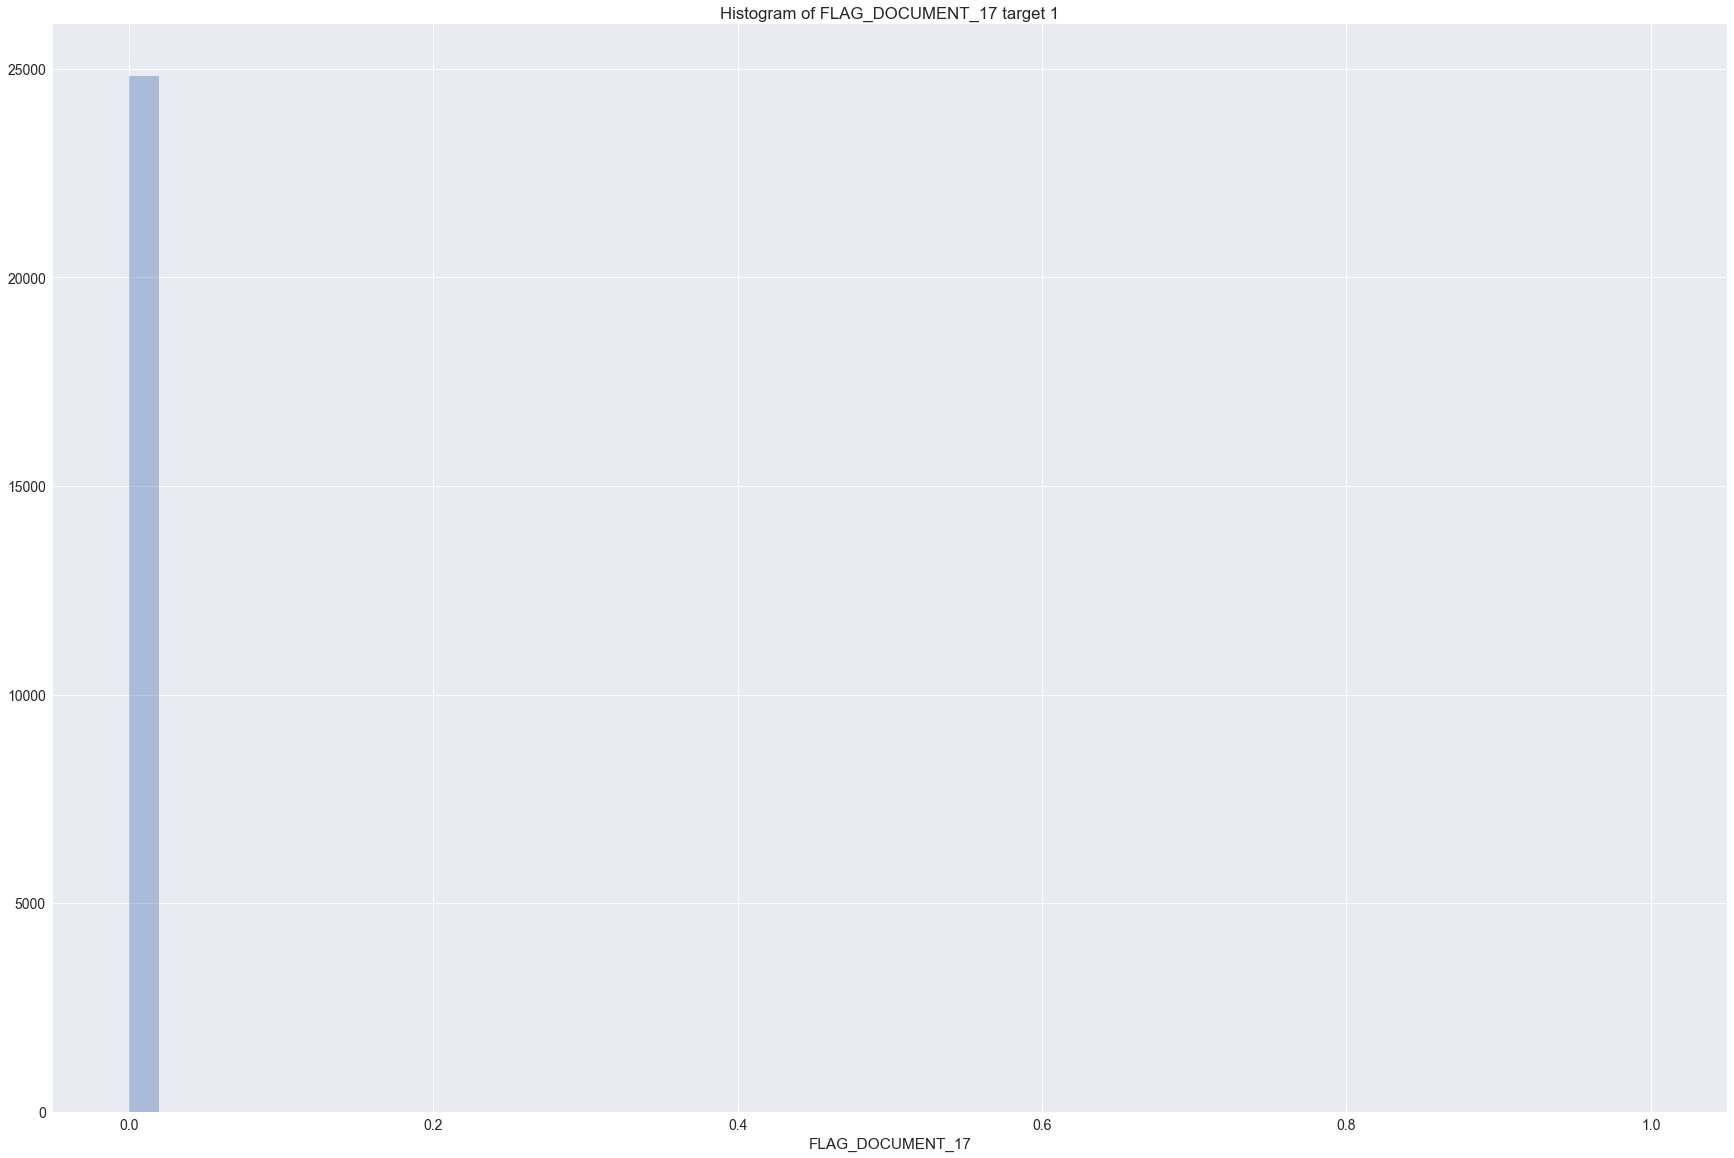

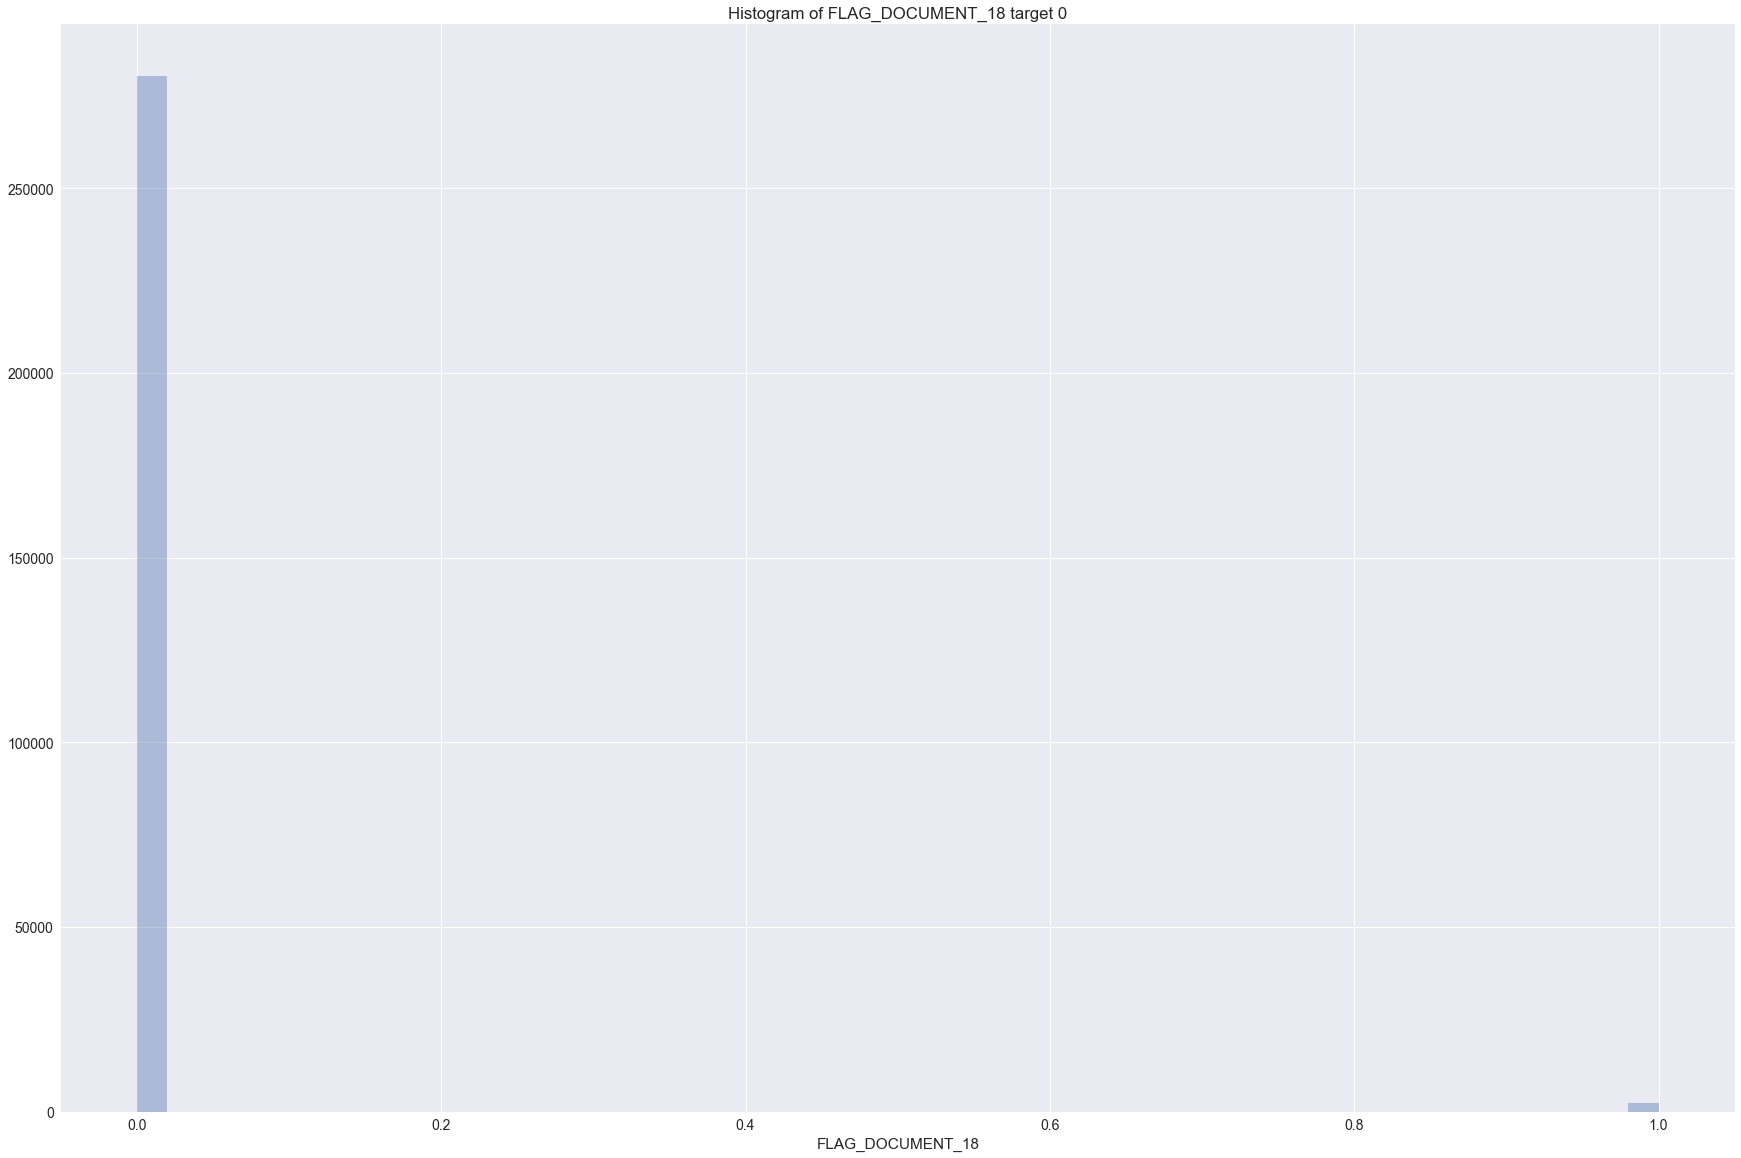

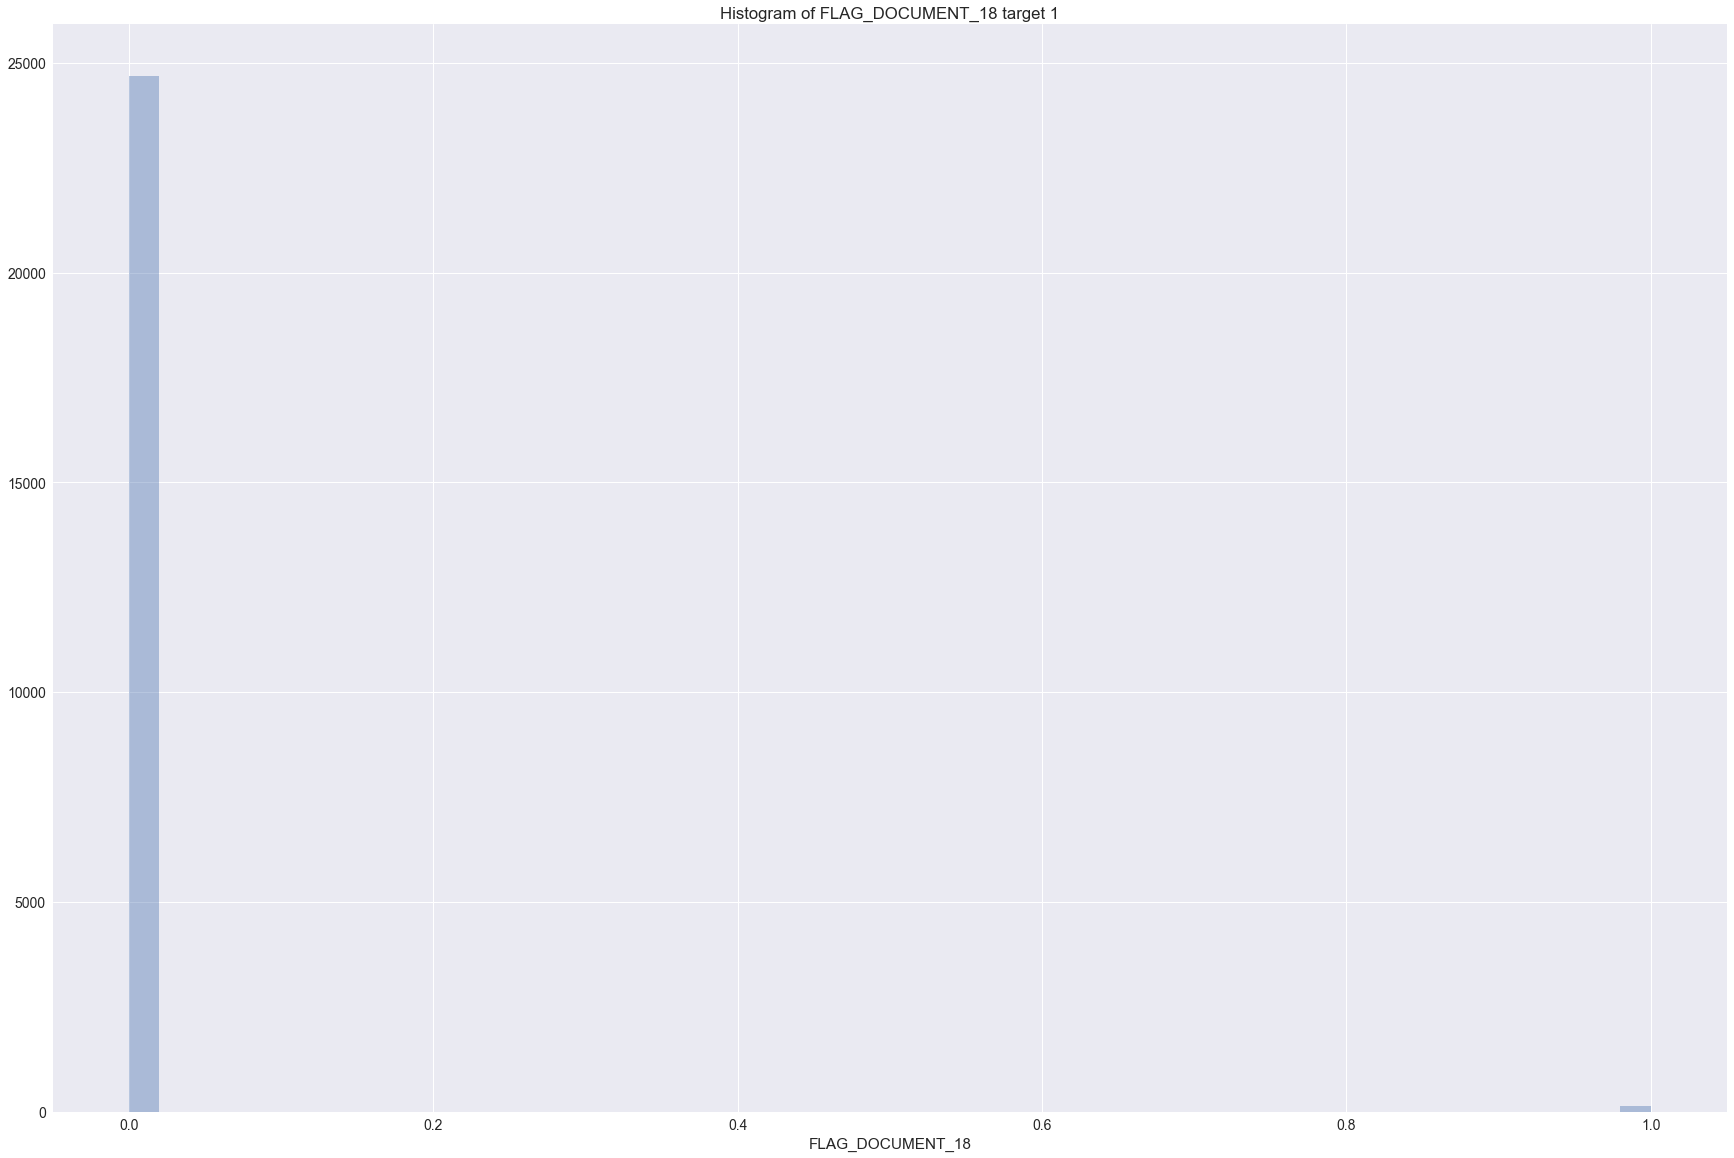

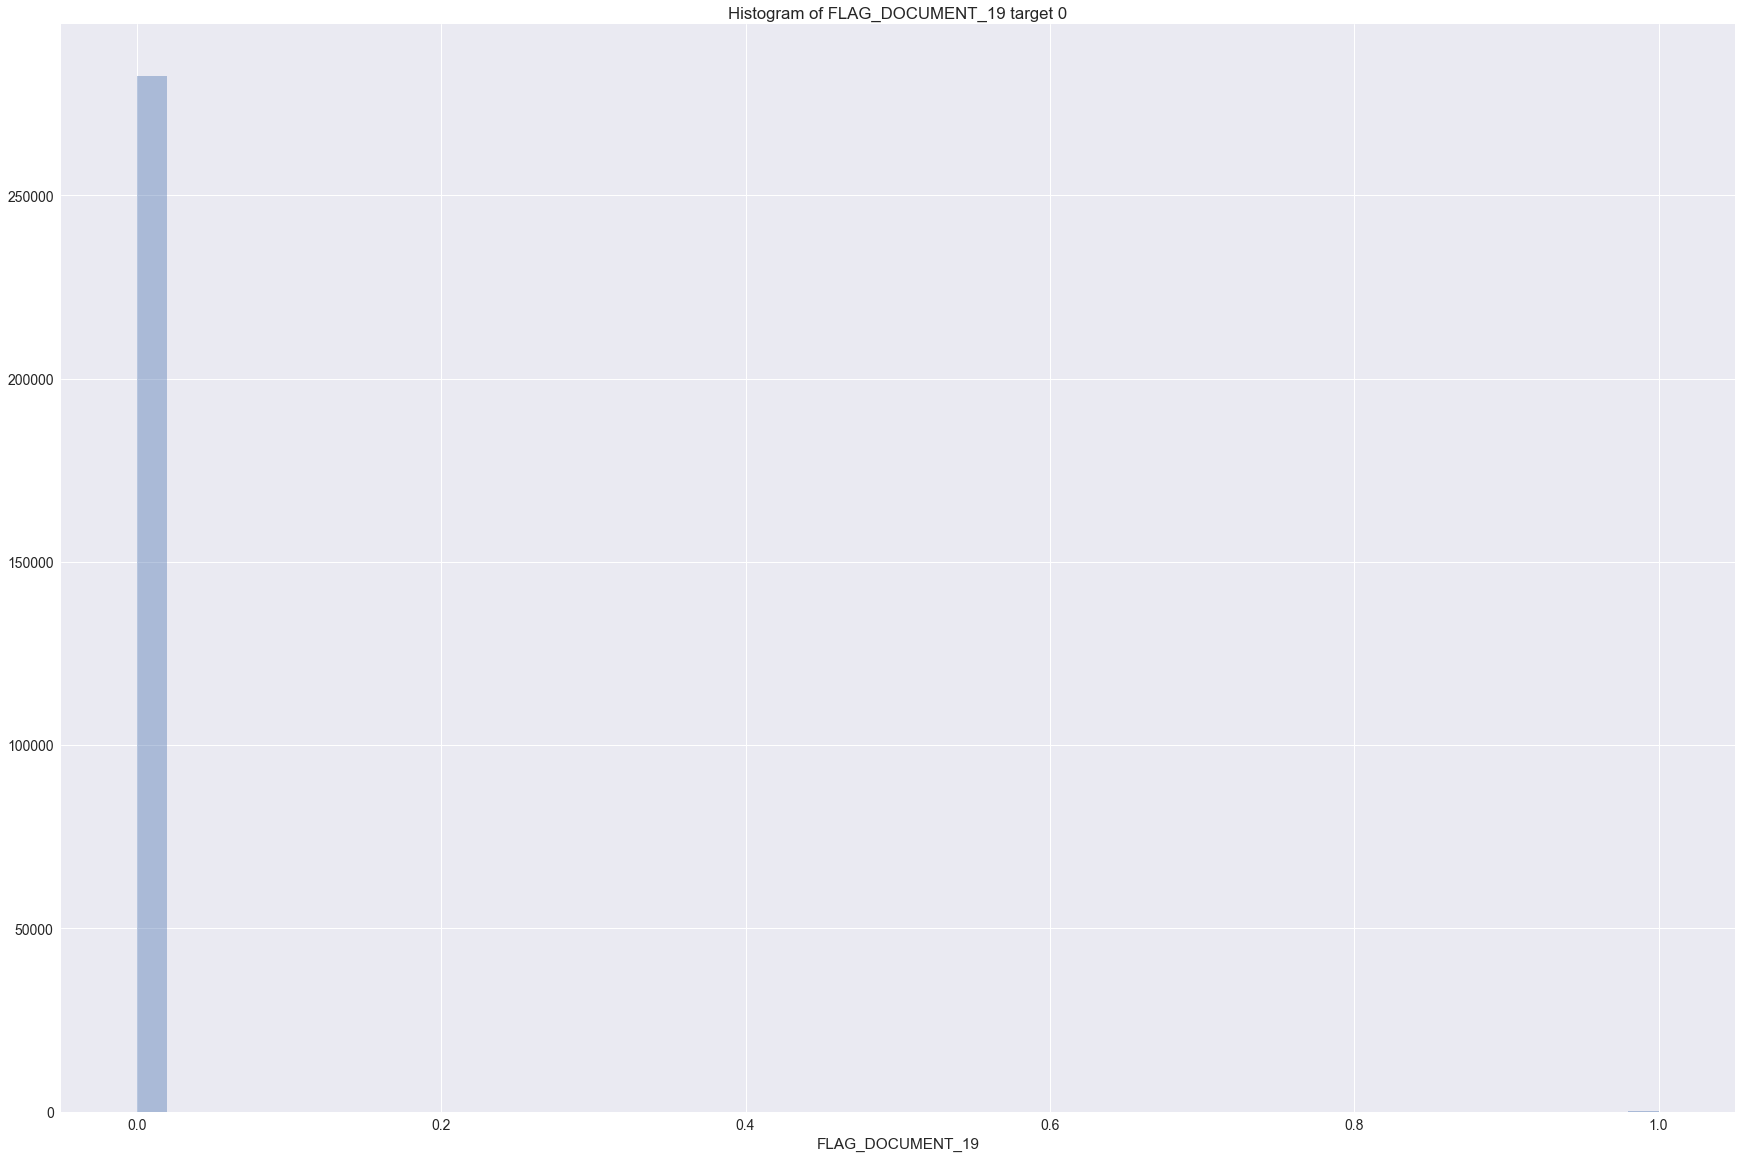

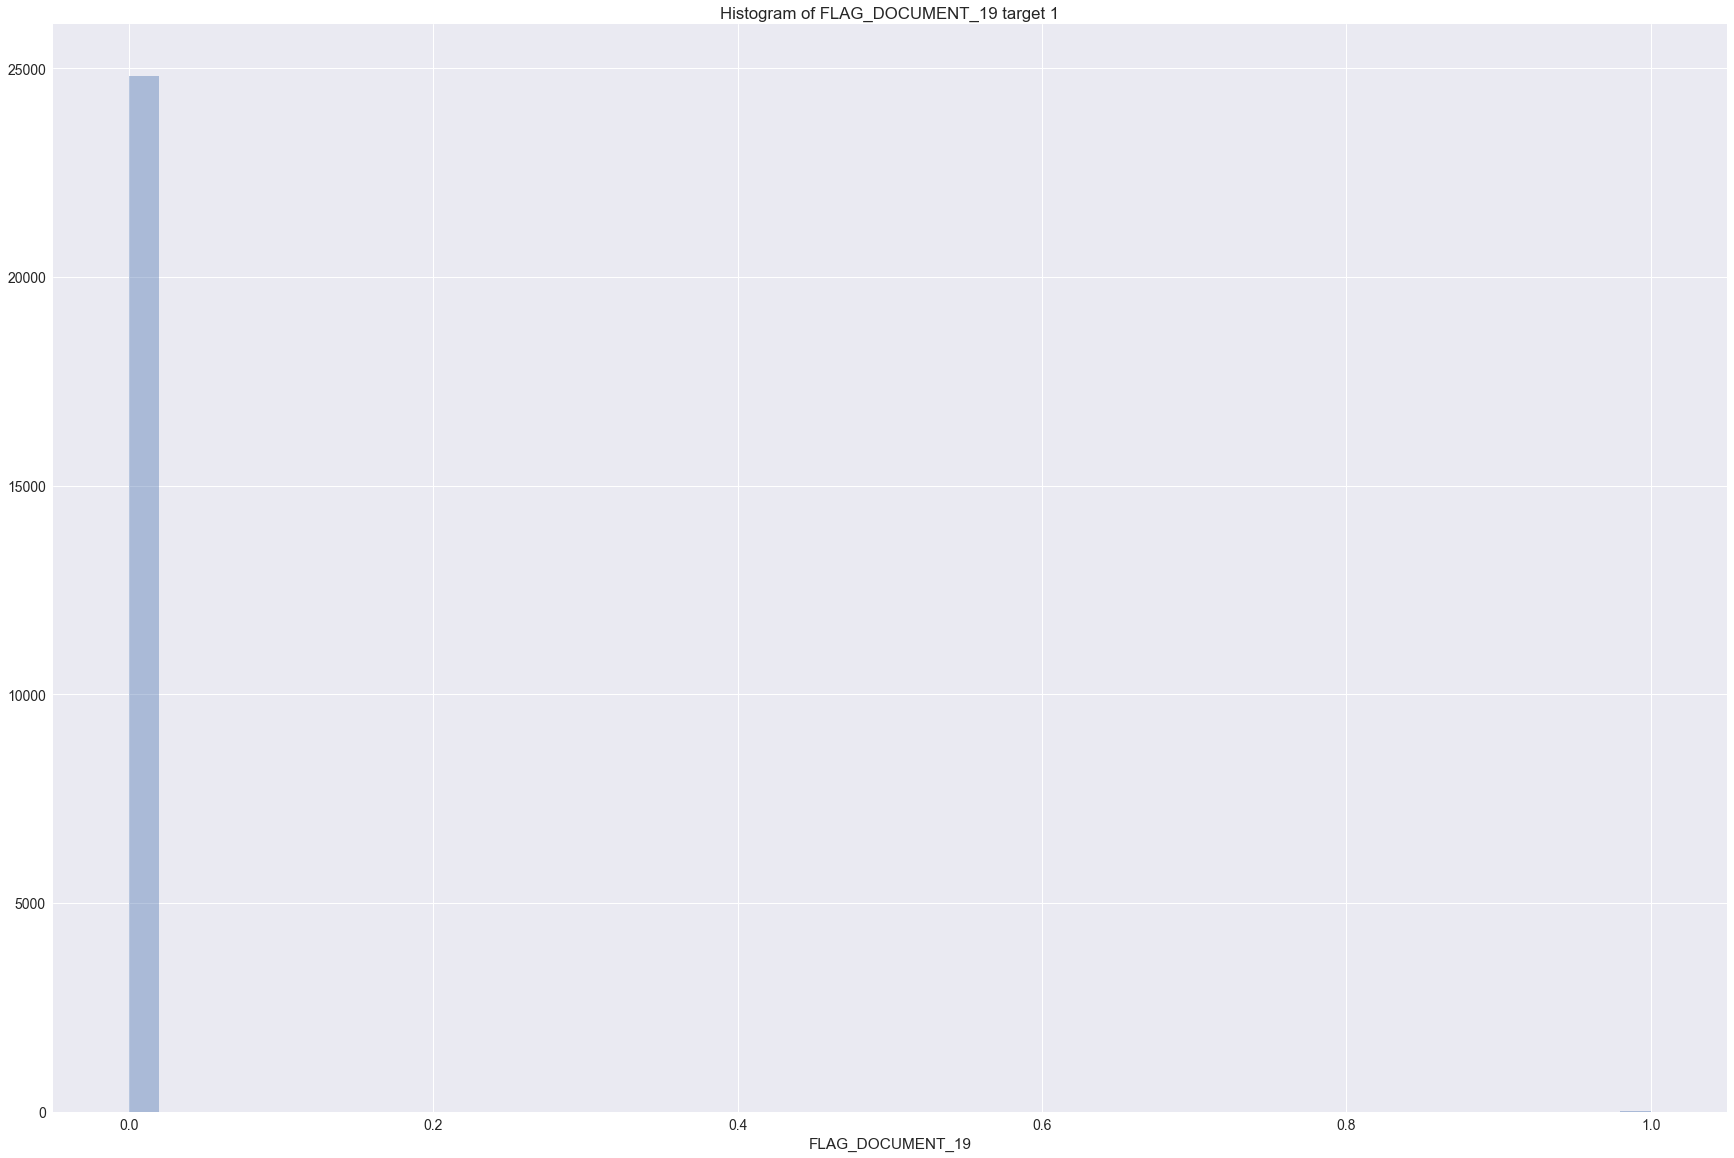

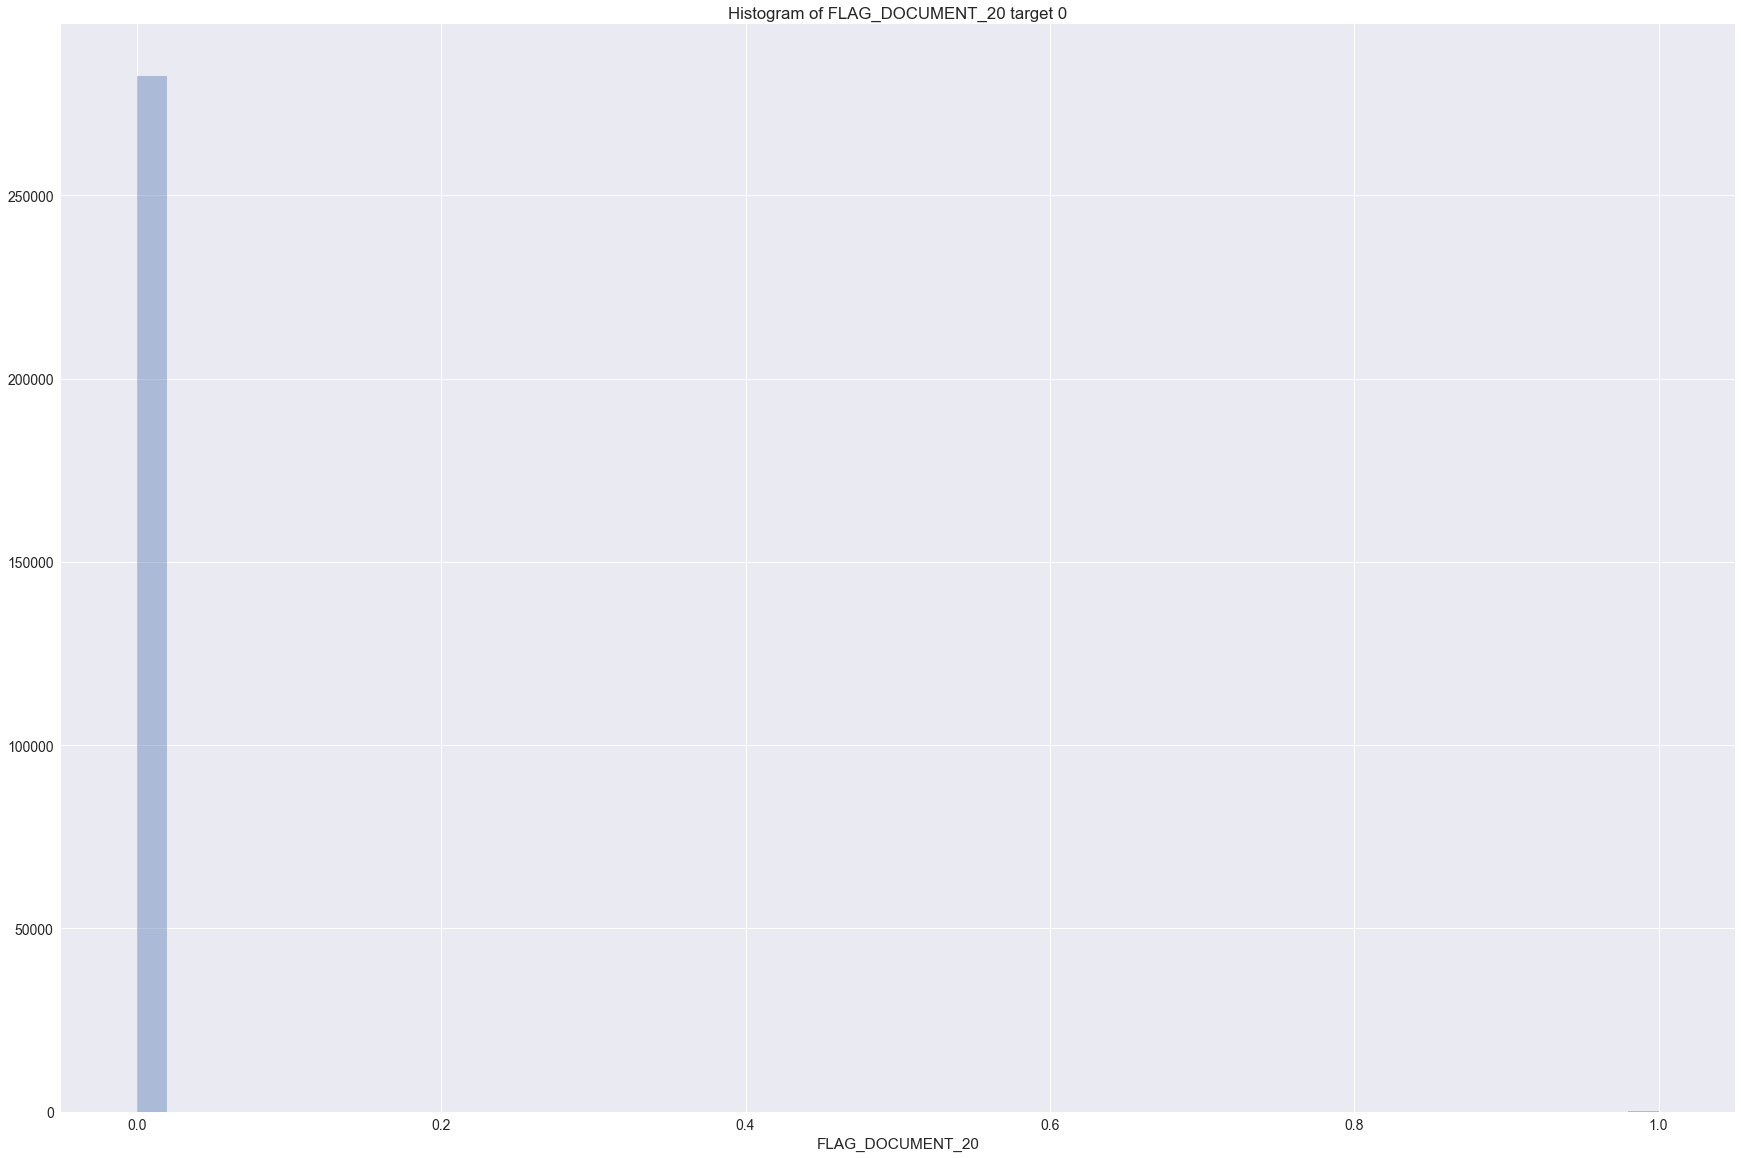

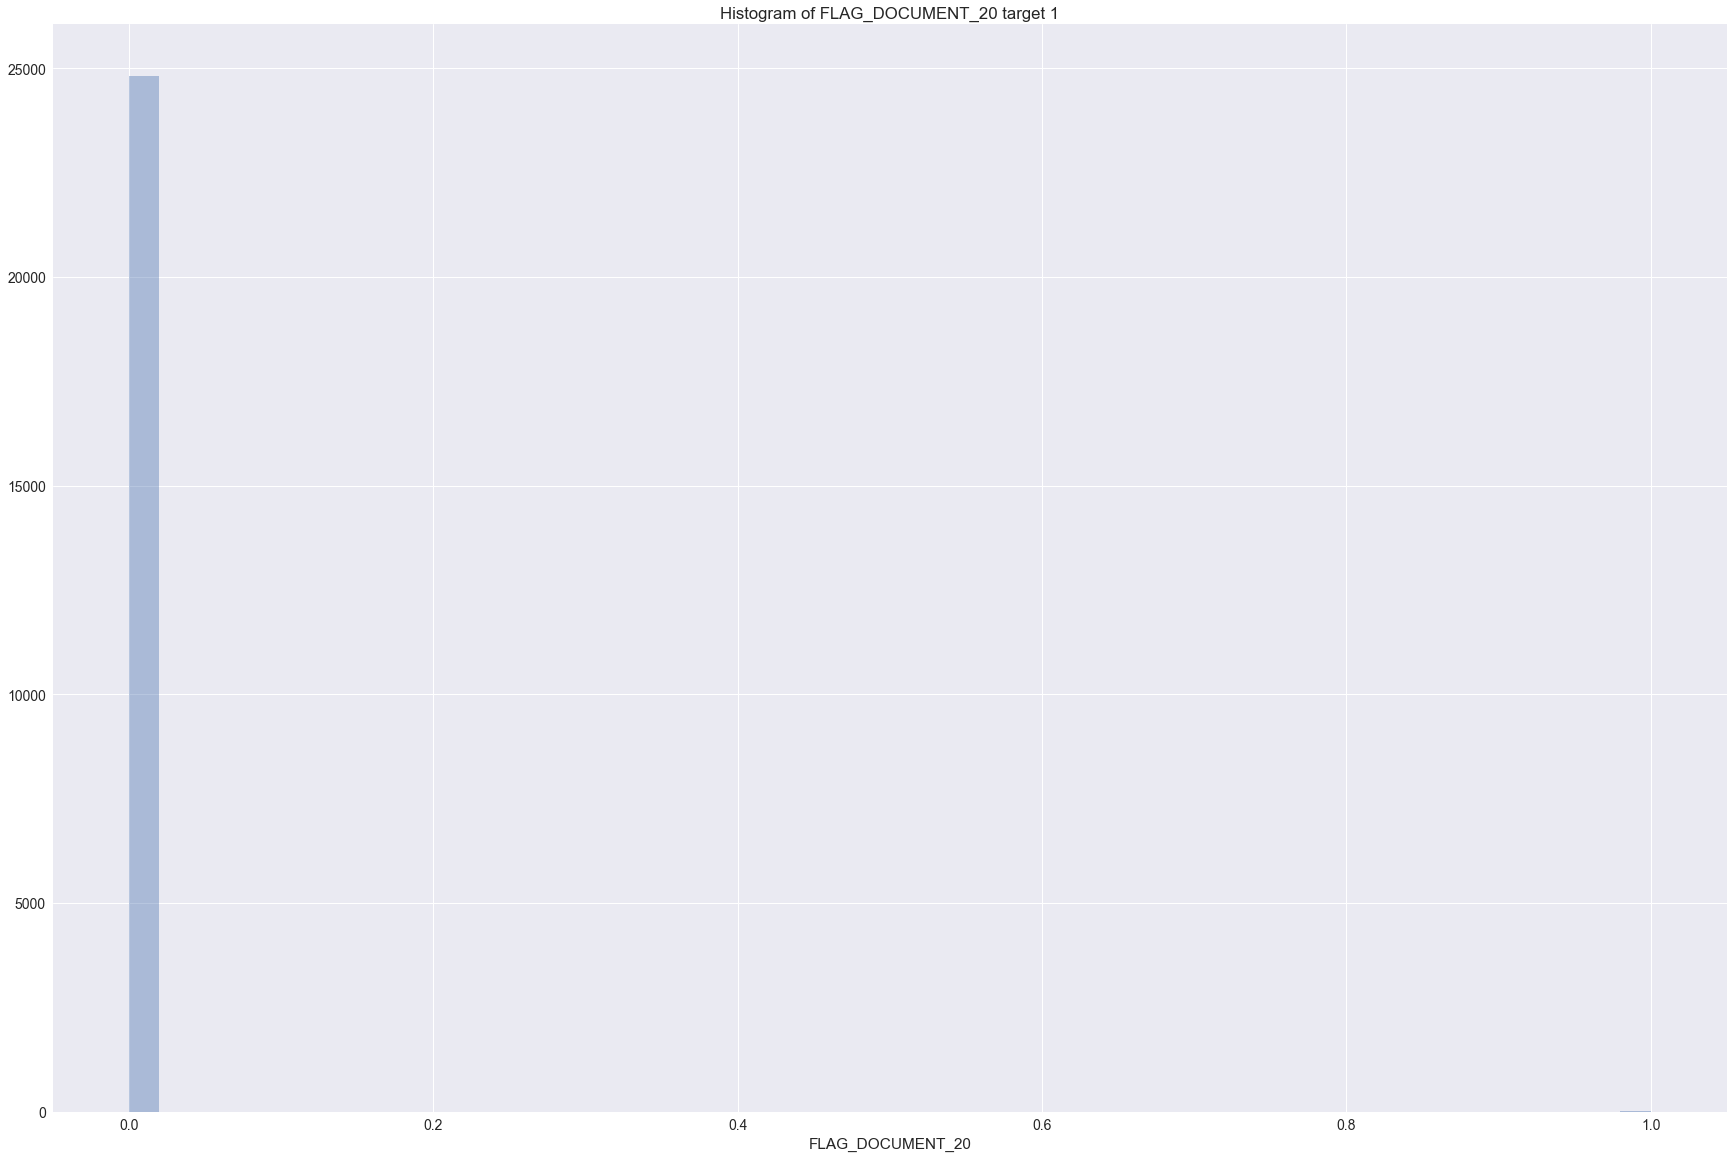

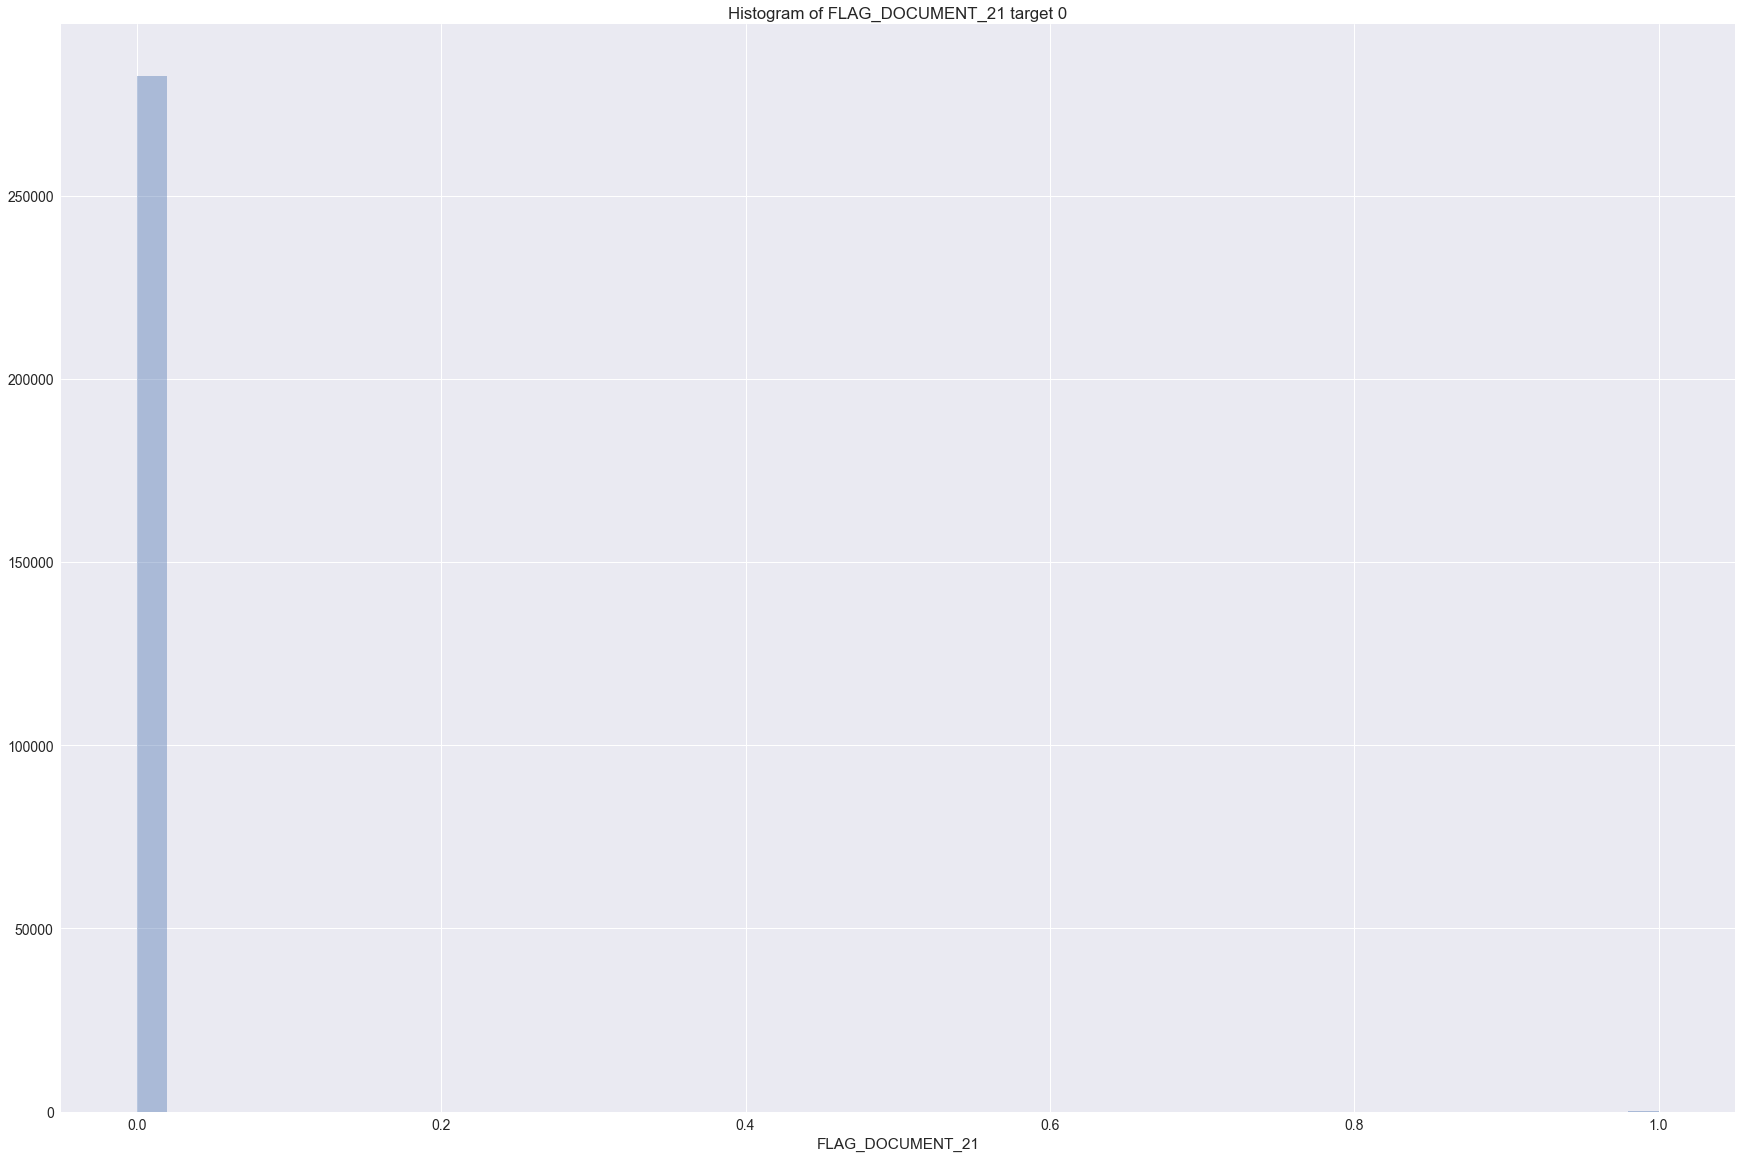

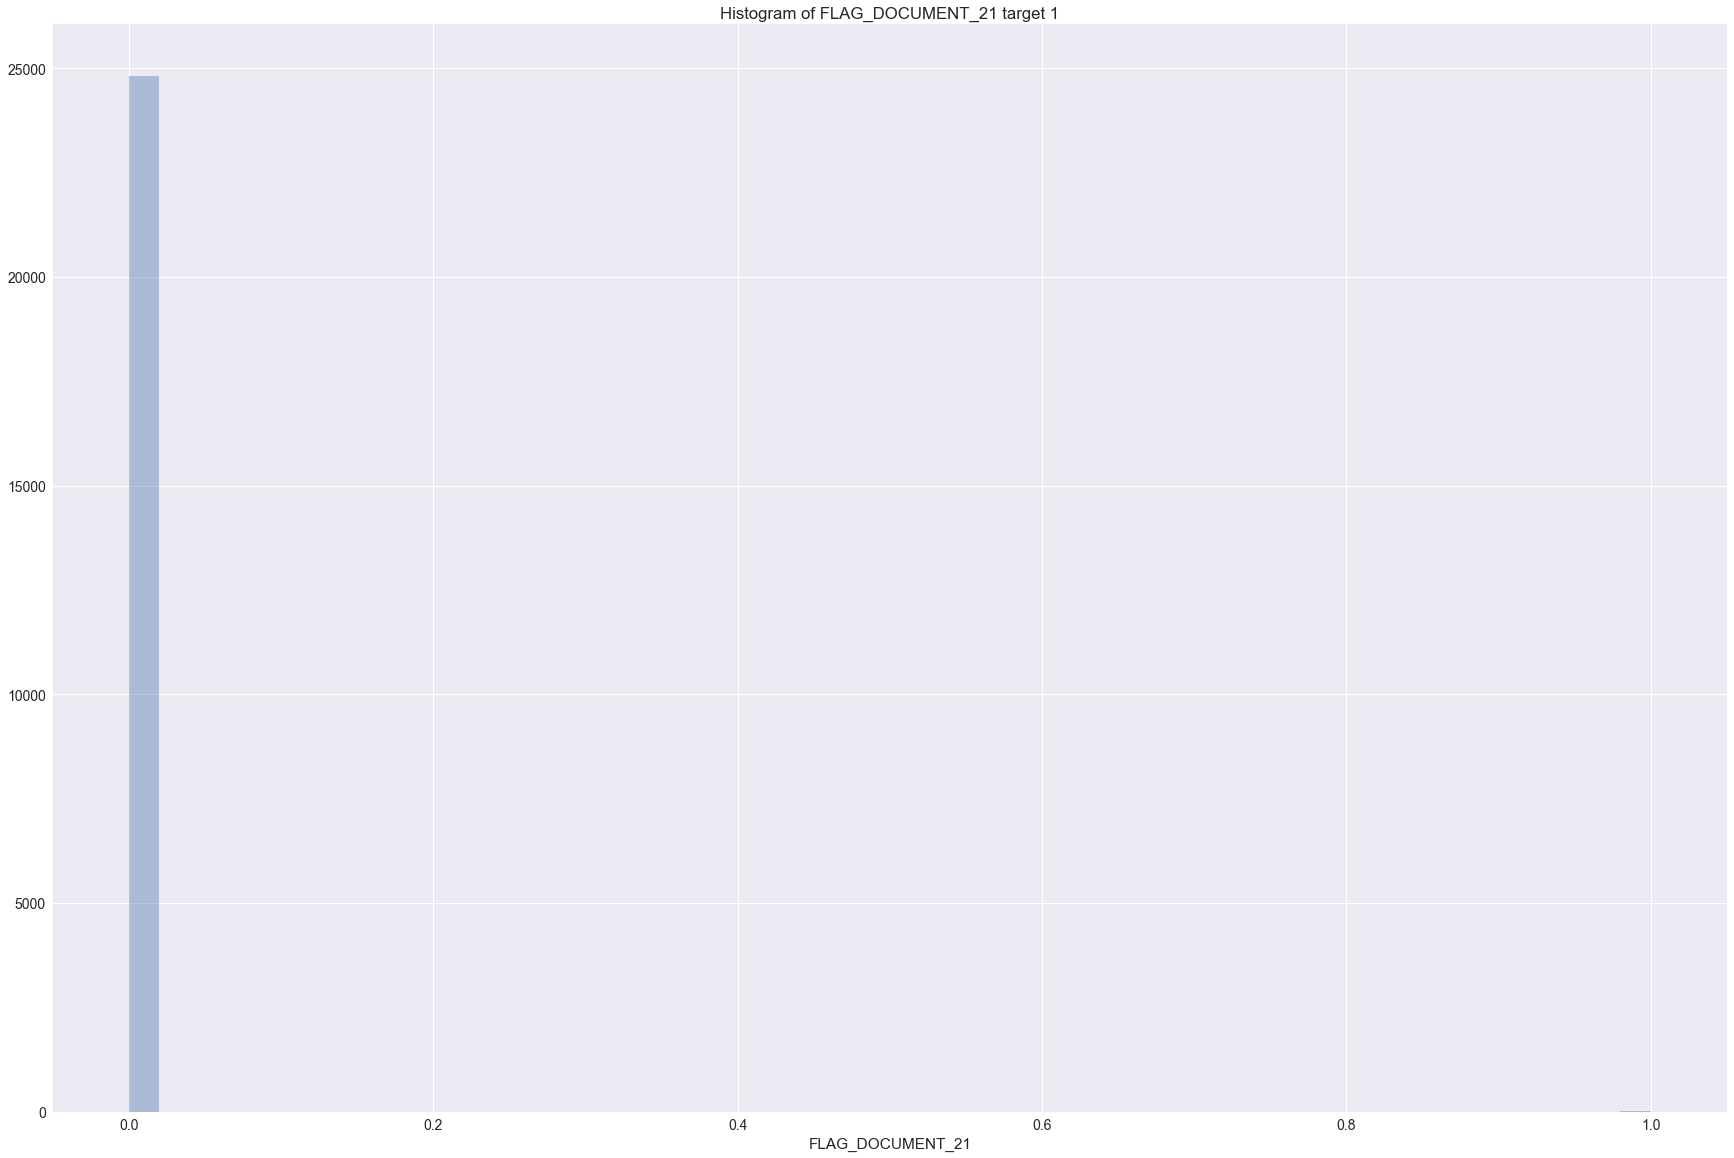

In [656]:
#plt.subplots(figsize=(30, 20))
for i in cont_name:
    plt.subplots(figsize=(30, 20))
    sns.distplot(application_data_new_Tar0.loc[:,i], kde=False)
    plt.title('Histogram of '+ i +' target 0')
    plt.show();
    plt.subplots(figsize=(30, 20))
    sns.distplot(application_data_new_Tar1.loc[:,i], kde=False)
    plt.title('Histogram of '+ i +' target 1')
    plt.show();

<li> Outlier can be seen for CNT_Childrenfor target 0 after 2. Mostly people have children between 0 and 2</li>
<li>  While CNT_Children for target 1 is o. There's no variation. Thus it's acting as constant and can be ingnored.
</li>
<li> Outlier can be seen for AMT_Credit for target 0 and target 1 after 1200000 value. Mostly people have Credit amount of the loan between 10 and 12 lakhs. </li>


In [658]:
#Univariate analysis

# Bivariate analysis

 <p> From the above heatmap in 4 Correlations for numerical columns, bivariate analysis can be done</p>

<p> correlation value lies between -1 to +1. Highly correlated variables will have correlation value close to +1 and less correlated variables will have correlation value close to -1. </p>

<p> CONCLUSION , HIGHLY CORRELATED VARIABLES</p>
<p>#For target=1 - client with payment difficulties:
<li>AMT_CREDIT</li>,
<li>AMT_ANNUITY</li>
AMT_GOODS_PRICE,
DAYS_BIRTH,
FLAG_EMP_PHONE,,
FLAG_work_PHONE,
REG_REGION_NOT_LIVE_REGION,
REG_REGION_NOT_WORK_REGION , 
LIVE_REGION_NOT_WORK_REGION,
<li>REG_CITY_NOT_LIVE_CITY </li> </p>
<p> Here , AMT_CREDIT is highly correlated with AMT_ANNUITY
AMT_GOODS_PRICE and AMT_ANNUITY is highly correlated with AMT_GOODS_PRICE </p>

<p> HIGHLY CORRELATED VARIABLES</p>
<p># for target=0  - other client 
AMT_INCOME_TOTAL,
AMT_CREDIT,
AMT_ANNUITY,,
AMT_GOODS_PRICE,
DAYS_BIRTH,
FLAG_EMP_PHONE,
FLAG_work_PHONE,
REG_REGION_NOT_LIVE_REGION,
REG_REGION_NOT_WORK_REGION,
LIVE_CITY_NOT_WORK_CITY</p>
<p> Here , AMT_INCOME_TOTAL is highly correlated with AMT_CREDIT , and
AMT_GOODS_PRICE </p>


# 5 PREVIOUS APPLICATION DATA

MERGING TWO FILES


In [669]:
#loading previous_application file
previous_data=pd.read_csv('previous_application.csv')#,low_memory=False)

In [672]:
#previous_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [671]:
#application_data_new.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

In [675]:
#merging the files on columnSK_ID_CURR
merge_data=pd.merge(left=application_data_new,right=previous_data, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')